# Data Fetching

In [1]:
import sklearn.datasets
import numpy as np
import pandas as pd
import plotly.offline as of
import plotly.graph_objs as go

of.init_notebook_mode(connected=True)

In [2]:
print("Downloading the data...")
price = sklearn.datasets.fetch_california_housing(as_frame=True)
print("Finish!")

Finish!


### How the data looks like

In [3]:
for item in price:
    print(item)
    print(price[item])
    print()

data
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.2

In [4]:
house = price['frame']
print(house.info())
print(house.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.

### Pearson correlation coefficient between House median price and other factors

In [5]:
corr_matrix=house.corr()
corr_matrix["MedHouseVal"].sort_values(ascending=False)

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64

# Data Visualization

### Visualizarion of Pearson correlation coefficient between House median price and some relevant factors

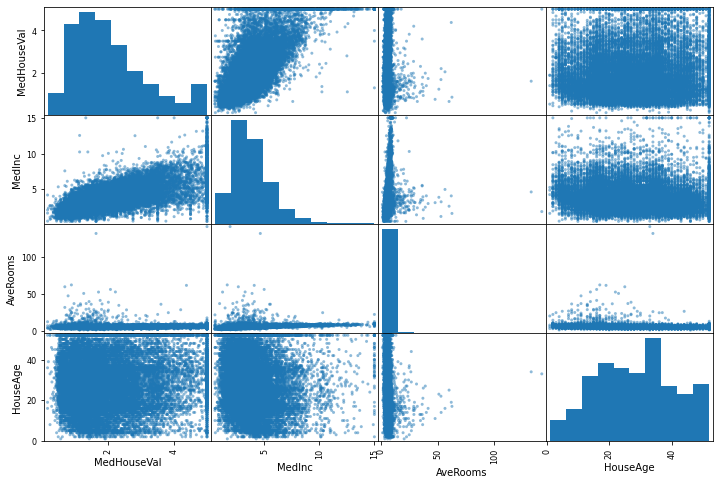

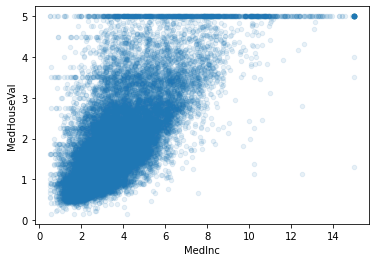

In [6]:
from pandas.plotting import scatter_matrix

attributes=["MedHouseVal","MedInc","AveRooms","HouseAge"]
scatter_matrix(house[attributes],figsize=(12,8))

house.plot(kind="scatter",x="MedInc",y="MedHouseVal",alpha=0.1)

### 3D: 2D + Hotmap

In [7]:
def show_by_position2d(item, house, inpage=False):
    aes = go.Scatter(x=house['Latitude'], 
                     y=house['Longitude'], 
                     mode='markers', 
                     marker=dict(color=house[item], 
                             size=5, 
                             colorscale='Viridis', 
                             showscale=True)
                     )
    layout = go.Layout(title=item, 
                       autosize=False,
                       width=1000, 
                       height=1000,
                       xaxis=dict(title='Latitude'),
                       yaxis=dict(title='Logitude'))

    figure = go.Figure(data=[aes], layout=layout)
    if inpage:
        of.iplot(figure)
    else:
        of.plot(figure)

In [8]:
item = 'MedInc'
show_by_position2d(item, house, False)

In [9]:
item = 'MedHouseVal'
show_by_position2d(item, house, False)

### 3D

In [10]:
item = 'MedHouseVal'


fig = go.Figure(data=[go.Mesh3d(x=house['Latitude'],
                                y=house['Longitude'],
                                z=house[item],
                      opacity=0.5,
                      color='rgb(0,100,0)'
                               )])
 
fig.layout.update(
    scene = dict(
                 xaxis=dict(title='Latitude'),
                 yaxis=dict(title='Logitude'),
                 zaxis=dict(title=item)),
    width=700,
    margin=dict(r=20, l=10, b=10, t=10))
    
fig.show()

### 4D: 3D + Hotmap

In [11]:
def show_by_position3d(item1, item2, house, inpage=False):
    aes = go.Scatter3d(x=house['Latitude'], 
                     y=house['Longitude'],
                     z=house[item1],
                     marker=dict(color=house[item2], 
                             size=5, 
                             colorscale='Viridis', 
                             showscale=True)
                     )
    layout = go.Layout(title=item2, 
                       autosize=False,
                       width=1000, 
                       height=1000)

    figure = go.Figure(data=[aes], layout=layout)
    figure.layout.update(scene=dict(
                                    xaxis=dict(title='Latitude'),
                                    yaxis=dict(title='Logitude'),
                                    zaxis=dict(title=item1)))
    if inpage:
        of.iplot(figure)
    else:
        of.plot(figure)

In [12]:
item1 = 'MedInc'
item2 = 'MedHouseVal'
show_by_position3d(item1, item2, house, False)

# Data Modeling

### Fetching data

In [3]:
import sklearn.datasets
import numpy as np
import pandas as pd
import copy
from tqdm import tqdm

print("Downloading the data...")
price = sklearn.datasets.fetch_california_housing(as_frame=True)
print("Finish!")

house = price['frame']
print(house.info())
print(house.describe())

Finish!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333

### Function for seperating data randomly

In [4]:
def seperate_random_pandas(percent, data):
    rand_data = data.sample(frac=1.0)
    rand_data = rand_data.reset_index(drop=True)
    wall = int(len(rand_data) * percent)
    data1 = rand_data.loc[0: wall]
    data2 = rand_data.loc[wall+1:]
    return data2, data1

In [4]:
train, test = seperate_random_pandas(0.1, house)

In [22]:
a = np.ones(shape=(20640, 1))

print(house['MedHouseVal'])
test000 = house['MedHouseVal'].values.reshape((house['MedHouseVal'].values.size, 1))
print(test000.shape)
print(a)
print(a.shape)
print(house['MedHouseVal'].values.size)
print(a-test000)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64
(20640, 1)
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
(20640, 1)
20640
[[-3.526]
 [-2.585]
 [-2.521]
 ...
 [ 0.077]
 [ 0.153]
 [ 0.106]]


### Data preperation

In [5]:
## transform x into \xi
def trans_xi(data, factors, max_grade=4, show=False):
    ret = np.ones(shape=(len(data), pow(max_grade+1, len(factors))), dtype=np.float64)
    if show:
        with tqdm(total=pow(max_grade+1, len(factors))-max_grade-1) as pbar:
            for i in range(len(factors)):
                for grade in range(max_grade+1):
                    if i == 0:
                        if grade != 0:
                            ret[:, grade] = data[factors[i]] * ret[:, grade-1]
                    else:
                        now_vec = ret[:, 0:pow(max_grade+1, i)]
                        if grade != 0:
                            for j in range(pow(max_grade+1, i)):
                                ret[:, grade * pow(max_grade+1, i) + j] = now_vec[:, j] * pow(data[factors[i]], grade)
                                pbar.update(1)
    else:
        for i in range(len(factors)):
            for grade in range(max_grade+1):
                if i == 0:
                    if grade != 0:
                        ret[:, grade] = data[factors[i]] * ret[:, grade-1]
                else:
                    now_vec = ret[:, 0:pow(max_grade+1, i)]
                    if grade != 0:
                        for j in range(pow(max_grade+1, i)):
                            ret[:, grade * pow(max_grade+1, i) + j] = now_vec[:, j] * pow(data[factors[i]], grade)
    return ret

In [13]:
xi = trans_xi(house, ['MedInc', 'Latitude', 'Longitude', 'AveOccup', 'AveBedrms', 'AveRooms'], 4, show=True)
print(xi.shape)
print(xi[0])
print(house['MedInc'][0])
print(house['MedHouseVal'][0])

100%|███████████████████████████████████████████████████████████████████████████| 15620/15620 [00:32<00:00, 482.70it/s]


(20640, 15625)
[1.00000000e+00 8.32520000e+00 6.93089550e+01 ... 3.55146022e+21
 2.95666166e+22 2.46147997e+23]
8.3252
4.526


In [20]:
def seperate_random_np(percent, X, Y):
    new_X = copy.deepcopy(X)
    new_Y = copy.deepcopy(Y)
    
    state = np.random.get_state()
    np.random.shuffle(new_X)
    np.random.set_state(state)
    np.random.shuffle(Y)
    
    wall = int(len(new_X) * percent)
    X1 = new_X[0: wall]
    X2 = new_X[wall+1:]
    Y1 = new_Y[0: wall]
    Y2 = new_Y[wall+1:]
    
    return X2, X1, Y2, Y1

### Linear regression

In [36]:
## define a class for linear regretion
class LinearRegression():
    """
    n_iters:            iteration times
    learning_rate:      learning rate
    alpha:              alpha for L2 regularization
    tolerant:           minimum tolerant error
    """
    def __init__(self, n_iters, learning_rate, alpha, tolerant):
        self.n_iters = n_iters
        self.learning_rate = learning_rate
        self.alpha = alpha
        self.tolerant = tolerant
        
    def init_weights(self, n_features):
        limit = np.sqrt(1 / n_features)
        self.w = np.random.uniform(-limit, limit, (n_features, 1))
    
    def prediction(self, X):
        return X.dot(self.w)
    
    ## L2 regularization
    def regularization(self):
        loss = self.w.T.dot(self.w)
        return 0.5 * self.alpha * float(loss)
        
    def fit(self, X, y):
        m_samples, n_features = X.shape
        self.init_weights(n_features)
        self.training_errors = []
        
        for i in range(self.n_iters):
            y_pred = self.prediction(X)
            # Calculate the loss
            error = np.mean(0.5 * (y_pred - y) ** 2)
            loss = error + self.regularization()
            print(error, loss)
            self.training_errors.append(loss)
            if error < self.tolerant:
                print('break')
                break
            # Calculate the gradient
            w_grad = X.T.dot(y_pred - y) + self.alpha * self.w
            # Update the weight
            self.w -= self.learning_rate * w_grad

In [91]:
## standarization of the xi
def standardization(X):
    mu = np.mean(X, axis=0)
    divid = X.max(axis=0) - X.min(axis=0)
#     sigma = X.std(axis=0)
    mu[0] = 0
    divid[0] = 1
    return ((X - mu) / divid).astype(np.float16)

features = ['Latitude', 'Longitude']
X = trans_xi(house, features)
Y = house['MedHouseVal'].values.reshape((house['MedHouseVal'].values.size, 1))

X_Stand = standardization(X)

Train_x, Test_x, Train_y, Test_y = seperate_random_np(0.2, X_Stand, Y)

x_train, x_valid, y_train, y_valid = seperate_random_np(0.2, Train_x, Train_y)
print(abs(x_train).max(axis=0))
print(abs(x_train).min(axis=0))

model = LinearRegression(1000, 0.0001, 0.5, 0.0001)
model.fit(x_train, y_train)

[1.     0.6714 0.693  0.7134 0.734  0.524  0.649  0.689  0.716  0.7373
 0.515  0.6294 0.6777 0.71   0.7354 0.5063 0.619  0.671  0.7056 0.7334
 0.4976 0.6143 0.6665 0.703  0.732 ]
[1.000e+00 1.978e-04 4.256e-04 6.050e-05 5.689e-04 2.944e-05 4.679e-05
 3.517e-06 9.675e-04 1.274e-04 3.505e-04 9.537e-06 3.314e-04 9.704e-05
 5.474e-04 3.321e-04 1.848e-05 1.866e-05 1.439e-04 4.476e-05 1.991e-05
 1.222e-04 9.661e-04 2.563e-05 7.617e-05]
3.1730613512033647 3.249152093837467
0.9233502609892451 2.933163771227663
0.6914616030614733 1.6034309419216917
0.6674817516531679 1.8825084915494794
0.6650054682840815 1.777414167721191
0.6647393978901146 1.809387936975593
0.6647069216263154 1.7987510852153035
0.6646976089667105 1.801966143564487
0.6646914209771128 1.800752748631627
0.6646856685124017 1.8009750332991645
0.6646802476022803 1.800744454449903
0.6646750748929554 1.8006683434804103
0.6646701504505079 1.8005506156349547
0.6646654576448252 1.8004540649906522
0.6646609869625019 1.8003580376448043
0.6

0.6645691242514613 1.7989326479562533
0.6645691147479763 1.798932436435749
0.6645691052546779 1.7989322284293539
0.664569095771273 1.7989320240293374
0.664569086297482 1.7989318233258111
0.6645690768330386 1.7989316264067678
0.6645690673776883 1.798931433358127
0.6645690579311881 1.7989312442637733
0.6645690484933067 1.7989310592055994
0.6645690390638231 1.798930878263549
0.6645690296425258 1.7989307015156508
0.6645690202292144 1.7989305290380648
0.6645690108236961 1.7989303609051164
0.6645690014257879 1.7989301971893357
0.6645689920353143 1.7989300379614939
0.6645689826521085 1.798929883290643
0.6645689732760112 1.7989297332441505
0.6645689639068694 1.798929587887732
0.664568954544538 1.7989294472854929
0.6645689451888783 1.7989293114999543
0.6645689358397574 1.798929180592094
0.6645689264970486 1.7989290546213774
0.6645689171606309 1.7989289336457879
0.6645689078303887 1.798928817721859
0.6645688985062114 1.7989287069047095
0.6645688891879936 1.7989286012480723
0.6645688798756345 1.7

0.6645671395289343 1.799032542843377
0.6645671309327402 1.7990337360858115
0.6645671223396115 1.7990349359197804
0.6645671137495446 1.7990361423411456
0.6645671051625363 1.7990373553457606
0.6645670965785831 1.7990385749294733
0.664567087997682 1.7990398010881261
0.6645670794198293 1.7990410338175535
0.6645670708450219 1.7990422731135873
0.6645670622732561 1.7990435189720495
0.664567053704529 1.7990447713887612
0.664567045138837 1.7990460303595364
0.6645670365761768 1.7990472958801837
0.6645670280165449 1.7990485679465085
0.6645670194599386 1.799049846554312
0.664567010906354 1.7990511316993902
0.6645670023557881 1.7990524233775365
0.6645669938082374 1.7990537215845395
0.6645669852636987 1.799055026316184
0.6645669767221689 1.7990563375682538
0.6645669681836444 1.799057655336527
0.6645669596481221 1.7990589796167802
0.6645669511155987 1.799060310404787
0.6645669425860711 1.7990616476963188
0.6645669340595357 1.7990629914871448
0.6645669255359895 1.7990643417730299
0.6645669170154294 1.

0.6645651335178032 1.7995064776044618
0.6645651255786601 1.7995091516201054
0.6645651176418979 1.7995118312567289
0.664565109707514 1.7995145165107567
0.6645651017755062 1.7995172073786172
0.6645650938458721 1.7995199038567415
0.6645650859186096 1.799522605941567
0.6645650779937161 1.7995253136295304
0.6645650700711894 1.799528026917077
0.6645650621510271 1.7995307458006526
0.6645650542332271 1.7995334702767072
0.6645650463177866 1.7995362003416935
0.6645650384047038 1.7995389359920702
0.6645650304939761 1.7995416772242974
0.6645650225856012 1.7995444240348408
0.6645650146795771 1.7995471764201674
0.6645650067759012 1.7995499343767487
0.6645649988745711 1.7995526979010603
0.6645649909755849 1.7995554669895817
0.66456498307894 1.7995582416387945
0.6645649751846342 1.799561021845185
0.6645649672926652 1.7995638076052434
0.6645649594030307 1.7995665989154617
0.6645649515157284 1.7995693957723364
0.6645649436307564 1.7995721981723696
0.6645649357481118 1.799575006112064
0.6645649278677928 

0.6645634553943723 1.8002165933397207
0.6645634479240895 1.800220413962419
0.6645634404557483 1.8002242395053951
0.6645634329893467 1.8002280699657645
0.6645634255248831 1.8002319053406484
0.6645634180623559 1.800235745627169
0.6645634106017629 1.800239590822449
0.6645634031431029 1.8002434409236197
0.6645633956863739 1.8002472959278082
0.6645633882315745 1.8002511558321517
0.6645633807787027 1.800255020633783
0.664563373327757 1.8002588903298415
0.6645633658787354 1.8002627649174694
0.6645633584316366 1.8002666443938113
0.6645633509864586 1.8002705287560121
0.6645633435431999 1.800274418001222
0.6645633361018589 1.800278312126594
0.6645633286624335 1.8002822111292822
0.6645633212249226 1.8002861150064455
0.664563313789324 1.8002900237552417
0.6645633063556362 1.8002939373728355
0.6645632989238576 1.8002978558563925
0.6645632914939866 1.80030177920308
0.6645632840660213 1.80030570741007
0.6645632766399602 1.8003096404745351
0.6645632692158014 1.8003135783936524
0.6645632617935435 1.800

In [93]:
## standarization of x
new_house = (house - house.mean())/(house.max()- house.min())
# print(abs(new_house).max())
# print(abs(new_house).min())
new_house['MedHouseVal'] = house['MedHouseVal']
Train, Test = seperate_random_pandas(0.2, new_house)
Train, Test = seperate_random_pandas(0.2, new_house)
train, valid = seperate_random_pandas(0.2, Train)

features = ['Latitude', 'Longitude']
x_train = trans_xi(train, features)
# x_train = (x_train - x_train.mean(axis=0)) / (x_train.max(axis=0) - x_train.min(axis=0))
y_train = train['MedHouseVal'].values.reshape((train['MedHouseVal'].values.size, 1))

x_valid = trans_xi(valid, features)
y_valid = valid['MedHouseVal'].values.reshape((valid['MedHouseVal'].values.size, 1))

model = LinearRegression(3000, 0.0001, 0.5, 0.0001)
model.fit(x_train, y_train)
# print(model.training_errors)

2.7347285437876088 2.815311498950213
0.890932050881842 2.8373806643936827
0.6915859287241206 1.623532293608707
0.6699842857514786 1.8918522135660731
0.667649349759143 1.7890866378192465
0.6673862568266402 1.820964331047218
0.6673525291870352 1.8099364485961251
0.6673429018848527 1.8131787720965942
0.6673369213766764 1.8117544023048169
0.6673316300623373 1.811875690685318
0.6673268205411343 1.8114969122398223
0.6673223301541719 1.8112898387392398
0.6673181070574299 1.8110328428270286
0.6673140943172499 1.8107982707478283
0.6673102538899747 1.8105618969004467
0.6673065541326334 1.810331340368935
0.6673029710224734 1.8101038129389302
0.6672994855850168 1.8098800004594908
0.6672960830599483 1.8096594863817166
0.6672927518699714 1.809442248144157
0.6672894829448964 1.809228158258378
0.6672862691546514 1.8090171431030635
0.6672831048820018 1.8088091265785522
0.6672799856858173 1.8086040454239187
0.6672769080406925 1.8084018416726608
0.6672738691339859 1.808202463177419
0.6672708667081484 1.8

0.6669782633758554 1.7967513279334617
0.6669778715226358 1.796762644005348
0.6669774820724614 1.7967740763205295
0.6669770950040066 1.7967856233564738
0.6669767102961619 1.7967972836102475
0.6669763279280313 1.7968090555982754
0.6669759478789299 1.796820937856109
0.6669755701283819 1.7968329289381904
0.6669751946561188 1.7968450274176209
0.6669748214420758 1.7968572318859404
0.6669744504663905 1.7968695409528932
0.6669740817094008 1.7968819532462126
0.6669737151516426 1.796894467411402
0.6669733507738471 1.796907082111514
0.6669729885569399 1.796919796026938
0.6669726284820371 1.7969326078551924
0.666972270530445 1.7969455163107082
0.6669719146836572 1.7969585201246292
0.6669715609233526 1.7969716180446045
0.6669712092313937 1.7969848088345886
0.6669708595898239 1.796998091274642
0.6669705119808665 1.7970114641607302
0.6669701663869223 1.7970249263045373
0.6669698227905674 1.7970384765332672
0.6669694811745518 1.797052113689456
0.6669691415217976 1.7970658366307863
0.6669688038153962 1

0.6669169887059745 1.8020018373681896
0.6669168692360954 1.802022440723509
0.6669167500657139 1.8020430530583464
0.6669166311932192 1.8020636743732914
0.6669165126170131 1.8020843046692765
0.6669163943355091 1.8021049439475676
0.6669162763471326 1.8021255922097572
0.6669161586503206 1.8021462494577607
0.6669160412435214 1.8021669156938076
0.6669159241251957 1.8021875909204357
0.6669158072938144 1.8022082751404844
0.6669156907478604 1.8022289683570933
0.6669155744858277 1.8022496705736892
0.6669154585062211 1.802270381793984
0.6669153428075569 1.8022911020219707
0.6669152273883618 1.8023118312619137
0.6669151122471736 1.8023325695183443
0.6669149973825407 1.8023533167960584
0.666914882793022 1.8023740731001066
0.6669147684771874 1.8023948384357902
0.6669146544336169 1.8024156128086577
0.6669145406609003 1.8024363962244978
0.6669144271576388 1.802457188689334
0.6669143139224428 1.80247799020942
0.6669142009539334 1.8024988007912346
0.6669140882507413 1.802519620441477
0.6669139758115075 

0.666890631376054 1.8084143165106283
0.6668905604576374 1.8084379304548854
0.6668904896324073 1.8084615557626416
0.6668904189000935 1.8084851924343508
0.6668903482604271 1.8085088404703962
0.6668902777131411 1.8085324998710937
0.6668902072579689 1.8085561706366904
0.6668901368946459 1.8085798527673678
0.6668900666229083 1.808603546263237
0.6668899964424938 1.808627251124344
0.6668899263531413 1.8086509673506646
0.6668898563545911 1.8086746949421113
0.6668897864465844 1.8086984338985275
0.6668897166288641 1.8087221842196912
0.6668896469011737 1.8087459459053123
0.6668895772632587 1.8087697189550385
0.6668895077148651 1.8087935033684468
0.6668894382557404 1.8088172991450542
0.6668893688856334 1.808841106284306
0.6668892996042942 1.808864924785588
0.6668892304114734 1.8088887546482173
0.6668891613069236 1.8089125958714494
0.666889092290398 1.8089364484544737
0.6668890233616511 1.8089603123964149
0.6668889545204388 1.808984187696335
0.666888885766518 1.8090080743532329
0.6668888170996462 1

0.6668740961137593 1.8152452125914547
0.6668740435855394 1.8152717602922637
0.6668739911068217 1.8152983177421387
0.6668739386775119 1.8153248849314076
0.6668738862975161 1.8153514618503923
0.6668738339667407 1.8153780484894004
0.6668737816850919 1.81540464483873
0.6668737294524771 1.8154312508886696
0.666873677268803 1.815457866629496
0.6668736251339772 1.8154844920514766
0.6668735730479074 1.8155111271448694
0.6668735210105016 1.8155377718999217
0.6668734690216677 1.8155644263068704
0.6668734170813148 1.815591090355944
0.6668733651893513 1.8156177640373623
0.6668733133456864 1.8156444473413336
0.6668732615502295 1.8156711402580588
0.6668732098028901 1.8156978427777268
0.6668731581035781 1.8157245548905234
0.6668731064522034 1.815751276586619
0.6668730548486768 1.8157780078561794
0.6668730032929088 1.8158047486893607
0.6668729517848102 1.81583149907631
0.6668729003242921 1.8158582590071666
0.6668728489112665 1.8158850284720631
0.6668727975456445 1.8159118074611211
0.6668727462273384 1

0.6668608715012982 1.8231388012248715
0.6668608300573136 1.8231677166776332
0.6668607886440223 1.8231966390784624
0.666860747261378 1.82322556841824
0.6668607059093341 1.823254504687851
0.6668606645878448 1.8232834478781936
0.6668606232968634 1.8233123979801729
0.666860582036344 1.823341354984707
0.6668605408062406 1.823370318882719
0.666860499606507 1.8233992896651445
0.6668604584370977 1.823428267322928
0.6668604172979669 1.823457251847023
0.6668603761890687 1.8234862432283916
0.6668603351103579 1.8235152414580096
0.6668602940617889 1.8235442465268563
0.6668602530433163 1.8235732584259257
0.6668602120548948 1.8236022771462193
0.6668601710964794 1.8236313026787483
0.6668601301680249 1.8236603350145333
0.6668600892694865 1.8236893741446065
0.666860048400819 1.8237184200600072
0.666860007561978 1.8237474727517866
0.6668599667529184 1.8237765322110042
0.6668599259735957 1.8238055984287291
0.6668598852239657 1.823834671396042
0.6668598445039834 1.8238637511040308
0.6668598038136049 1.8238

0.6668497032513964 1.832026549069666
0.6668496692469718 1.832057176609562
0.666849635262734 1.8320878088435741
0.6668496012986573 1.8321184457657418
0.6668495673547152 1.832149087370113
0.6668495334308809 1.8321797336507482
0.6668494995271289 1.8322103846017144
0.6668494656434324 1.8322410402170934
0.6668494317797654 1.8322717004909745
0.6668493979361017 1.8323023654174573
0.6668493641124151 1.8323330349906513
0.6668493303086799 1.8323637092046794
0.6668492965248698 1.8323943880536688
0.666849262760959 1.8324250715317647
0.6668492290169216 1.8324557596331141
0.6668491952927316 1.8324864523518816
0.6668491615883635 1.8325171496822366
0.6668491279037913 1.8325478516183606
0.666849094238989 1.8325785581544474
0.6668490605939315 1.8326092692846974
0.6668490269685929 1.8326399850033224
0.6668489933629475 1.8326707053045457
0.6668489597769697 1.8327014301825981
0.6668489262106343 1.832732159631723
0.6668488926639157 1.8327628936461728
0.6668488591367884 1.8327936322202105
0.6668488256292273 

0.6668404773233209 1.8412111884906919
0.6668404482849385 1.8412429792542566
0.6668404192606319 1.8412747733573476
0.6668403902503851 1.841306570796554
0.6668403612541821 1.8413383715684692
0.6668403322720068 1.8413701756696947
0.666840303303843 1.8414019830968382
0.6668402743496749 1.8414337938465164
0.6668402454094864 1.8414656079153495
0.6668402164832615 1.841497425299969
0.6668401875709843 1.8415292459970072
0.6668401586726389 1.8415610700031093
0.6668401297882096 1.841592897314924
0.6668401009176804 1.8416247279291071
0.6668400720610352 1.841656561842321
0.6668400432182586 1.8416883990512372
0.6668400143893346 1.8417202395525312
0.6668399855742475 1.8417520833428869
0.6668399567729815 1.8417839304189927
0.666839927985521 1.841815780777548
0.6668398992118502 1.8418476344152546
0.6668398704519535 1.8418794913288234
0.6668398417058153 1.841911351514971
0.6668398129734201 1.8419432149704213
0.6668397842547519 1.841975081691904
0.6668397555497958 1.8420069516761575
0.6668397268585357 1.

0.6668316749925017 1.851735222146437
0.666831649818189 1.851767955186659
0.6668316246538397 1.8518006907568485
0.6668315994994441 1.8518334288552767
0.6668315743549929 1.8518661694802165
0.6668315492204757 1.8518989126299454
0.6668315240958833 1.8519316583027448
0.6668314989812061 1.8519644064968985
0.6668314738764342 1.8519971572106955
0.6668314487815582 1.8520299104424267
0.6668314236965681 1.852062666190387
0.6668313986214548 1.8520954244528758
0.6668313735562086 1.8521281852281952
0.6668313485008196 1.8521609485146509
0.6668313234552785 1.852193714310552
0.6668312984195759 1.8522264826142105
0.6668312733937021 1.852259253423945
0.6668312483776475 1.8522920267380734
0.6668312233714025 1.8523248025549197
0.6668311983749582 1.8523575808728097
0.6668311733883044 1.852390361690075
0.6668311484114322 1.8524231450050495
0.6668311234443319 1.8524559308160686
0.6668310984869941 1.8524887191214745
0.6668310735394093 1.85252150991961
0.6668310486015683 1.852554303208824
0.6668310236734617 1.8

0.6668243053335751 1.8619963160565347
0.6668242828454786 1.862029765442025
0.6668242603649205 1.862063216958128
0.6668242378918949 1.8620966706039
0.6668242154263954 1.8621301263783954
0.6668241929684157 1.8621635842806734
0.6668241705179496 1.862197044309792
0.6668241480749911 1.8622305064648144
0.6668241256395339 1.862263970744801
0.6668241032115719 1.862297437148818
0.6668240807910988 1.8623309056759305
0.6668240583781087 1.8623643763252056
0.666824035972595 1.8623978490957118
0.666824013574552 1.8624313239865216
0.6668239911839733 1.8624648009967066
0.6668239688008528 1.8624982801253402
0.6668239464251846 1.8625317613714976
0.6668239240569622 1.8625652447342564
0.6668239016961801 1.8625987302126956
0.6668238793428316 1.8626322178058945
0.6668238569969109 1.8626657075129351
0.6668238346584122 1.8626991993329014
0.6668238123273288 1.862732693264877
0.666823790003655 1.8627661893079486
0.6668237676873848 1.8627996874612047
0.6668237453785121 1.8628331877237345
0.6668237230770307 1.862

0.6668179742919172 1.8719527036843537
0.6668179537899208 1.871986746239354
0.6668179332939435 1.8720207906998476
0.6668179128039814 1.872054837065205
0.6668178923200302 1.8720888853347963
0.6668178718420857 1.8721229355079934
0.6668178513701436 1.8721569875841686
0.6668178309041999 1.872191041562694
0.6668178104442503 1.8722250974429415
0.6668177899902905 1.8722591552242875
0.6668177695423164 1.872293214906104
0.666817749100324 1.872327276487767
0.6668177286643089 1.8723613399686527
0.6668177082342669 1.872395405348136
0.6668176878101939 1.8724294726255941
0.6668176673920856 1.8724635418004043
0.6668176469799381 1.872497612871945
0.666817626573747 1.8725316858395935
0.6668176061735085 1.872565760702731
0.6668175857792179 1.8725998374607342
0.6668175653908717 1.8726339161129861
0.6668175450084654 1.872667996658865
0.6668175246319947 1.8727020790977542
0.666817504261456 1.8727361634290345
0.6668174838968447 1.8727702496520888
0.666817463538157 1.8728043377663
0.6668174431853886 1.8728384

0.6668120952973431 1.8822136989392526
0.6668120764276539 1.8822482851800642
0.6668120575629228 1.882282873156251
0.666812038703147 1.8823174628672823
0.6668120198483236 1.8823520543126255
0.6668120009984493 1.882386647491746
0.6668119821535216 1.8824212424041122
0.6668119633135372 1.8824558390491917
0.6668119444784932 1.882490437426452
0.666811925648387 1.8825250375353613
0.6668119068232151 1.882559639375386
0.666811888002975 1.8825942429459952
0.6668118691876637 1.8826288482466567
0.666811850377278 1.882663455276838
0.6668118315718152 1.8826980640360083
0.6668118127712723 1.8827326745236341
0.6668117939756466 1.8827672867391858
0.666811775184935 1.8828019006821302
0.6668117563991341 1.882836516351937
0.666811737618242 1.8828711337480737
0.666811718842255 1.8829057528700095
0.6668117000711704 1.882940373717214
0.6668116813049855 1.8829749962891542
0.6668116625436972 1.8830096205853009
0.6668116437873026 1.8830442466051225
0.6668116250357988 1.883078874348087
0.6668116062891831 1.883113

0.6668067671979859 1.892419506515243
0.6668067496666445 1.8924545785731572
0.6668067321395165 1.892489652211038
0.6668067146165996 1.8925247274283459
0.6668066970978915 1.892559804224545
0.66680667958339 1.892594882599095
0.6668066620730931 1.8926299625514598
0.6668066445669986 1.8926650440810997
0.6668066270651042 1.8927001271874775
0.6668066095674079 1.892735211870054
0.6668065920739075 1.8927702981282906
0.6668065745846008 1.8928053859616492
0.6668065570994856 1.8928404753695904
0.6668065396185598 1.8928755663515757
0.6668065221418213 1.8929106589070661
0.6668065046692679 1.8929457530355231
0.6668064872008974 1.892980848736406
0.666806469736708 1.8930159460091769
0.6668064522766971 1.893051044853296
0.6668064348208627 1.8930861452682235
0.6668064173692028 1.8931212472534198
0.6668063999217149 1.8931563508083458
0.6668063824783975 1.8931914559324623
0.6668063650392478 1.8932265626252267
0.6668063476042642 1.8932616708861012
0.6668063301734443 1.8932967807145453
0.6668063127467857 1.8

0.6668017368220962 1.902902993968432
0.6668017204549722 1.9029385111026391
0.666801704091499 1.9029740296514297
0.666801687731675 1.9030095496142279
0.6668016713754985 1.9030450709904523
0.6668016550229677 1.9030805937795252
0.6668016386740813 1.9031161179808667
0.6668016223288374 1.9031516435938993
0.6668016059872345 1.9031871706180419
0.6668015896492708 1.9032226990527161
0.6668015733149449 1.903258228897342
0.6668015569842549 1.9032937601513398
0.6668015406571994 1.9033292928141294
0.6668015243337765 1.9033648268851309
0.666801508013985 1.9034003623637643
0.6668014916978228 1.9034358992494487
0.6668014753852884 1.9034714375416038
0.6668014590763804 1.903506977239649
0.666801442771097 1.903542518343004
0.6668014264694365 1.9035780608510864
0.6668014101713975 1.9036136047633159
0.6668013938769783 1.9036491500791115
0.6668013775861772 1.9036846967978902
0.6668013612989924 1.903720244919072
0.6668013450154227 1.9037557944420749
0.6668013287354663 1.903791345366317
0.6668013124591216 1.9

0.666797060278205 1.9134393941580974
0.6667970449222419 1.9134753028576403
0.6667970295694995 1.9135112127945155
0.6667970142199763 1.9135471239681001
0.666796998873671 1.9135830363777726
0.6667969835305825 1.91361895002291
0.6667969681907091 1.9136548649028893
0.6667969528540498 1.9136907810170871
0.6667969375206034 1.9137266983648829
0.6667969221903686 1.9137626169456508
0.6667969068633439 1.9137985367587682
0.6667968915395279 1.9138344578036126
0.6667968762189197 1.913870380079561
0.666796860901518 1.9139063035859876
0.6667968455873213 1.9139422283222705
0.6667968302763284 1.913978154287785
0.666796814968538 1.9140140814819069
0.6667967996639489 1.9140500099040128
0.66679678436256 1.914085939553478
0.6667967690643694 1.9141218704296774
0.6667967537693764 1.9141578025319879
0.6667967384775795 1.9141937358597834
0.6667967231889775 1.9142296704124402
0.6667967079035692 1.914265606189332
0.6667966926213531 1.9143015431898347
0.6667966773423283 1.9143374814133227
0.666796662066493 1.9143

0.6667926792076982 1.924047197655896
0.6667926647468041 1.9240834428088582
0.6667926502887892 1.924119689011031
0.6667926358336529 1.9241559362617597
0.6667926213813938 1.924192184560388
0.666792606932011 1.924228433906261
0.6667925924855033 1.924264684298722
0.6667925780418699 1.9243009357371172
0.6667925636011096 1.9243371882207903
0.6667925491632214 1.9243734417490854
0.6667925347282043 1.9244096963213466
0.6667925202960573 1.924445951936919
0.6667925058667792 1.9244822085951445
0.6667924914403689 1.9245184662953698
0.6667924770168258 1.924554725036936
0.6667924625961485 1.9245909848191893
0.6667924481783362 1.9246272456414717
0.6667924337633875 1.9246635075031275
0.6667924193513017 1.9246997704035003
0.6667924049420778 1.9247360343419326
0.6667923905357145 1.92477229931777
0.6667923761322109 1.9248085653303528
0.666792361731566 1.9248448323790264
0.6667923473337787 1.924881100463133
0.666792332938848 1.9249173695820159
0.666792318546773 1.9249536397350175
0.6667923041575525 1.92498

0.6667885339009798 1.9347822182071692
0.6667885202470982 1.9348187441525009
0.6667885065958165 1.934855270950759
0.6667884929471338 1.9348917986012695
0.6667884793010491 1.9349283271033606
0.6667884656575618 1.9349648564563597
0.6667884520166706 1.935001386659592
0.6667884383783751 1.935037917712385
0.6667884247426741 1.9350744496140666
0.6667884111095672 1.935110982363963
0.6667883974790528 1.9351475159614
0.6667883838511308 1.935184050405706
0.6667883702258 1.9352205856962066
0.6667883566030595 1.9352571218322288
0.6667883429829085 1.9352936588130996
0.6667883293653462 1.9353301966381449
0.6667883157503715 1.9353667353066912
0.6667883021379838 1.935403274818066
0.6667882885281824 1.9354398151715957
0.666788274920966 1.9354763563666064
0.6667882613163342 1.9355128984024246
0.6667882477142858 1.9355494412783765
0.66678823411482 1.9355859849937889
0.6667882205179362 1.9356225295479876
0.6667882069236334 1.9356590749403004
0.6667881933319105 1.9356956211700518
0.666788179742767 1.9357321

0.6667846411028434 1.9455180069916036
0.6667846281758842 1.9455547539669515
0.6667846152512931 1.9455915015973029
0.666784602329069 1.9456282498819815
0.6667845894092114 1.945664998820313
0.6667845764917194 1.9457017484116208
0.6667845635765923 1.9457384986552284
0.6667845506638296 1.9457752495504628
0.6667845377534305 1.945812001096645
0.666784524845394 1.9458487532931024
0.6667845119397197 1.9458855061391573
0.6667844990364066 1.945922259634136
0.6667844861354542 1.945959013777361
0.6667844732368617 1.9459957685681588
0.6667844603406282 1.9460325240058514
0.6667844474467535 1.9460692800897648
0.6667844345552363 1.9461060368192231
0.6667844216660762 1.9461427941935523
0.6667844087792723 1.946179552212074
0.666784395894824 1.9462163108741155
0.6667843830127306 1.946253070178999
0.6667843701329912 1.9462898301260518
0.6667843572556053 1.946326590714596
0.6667843443805721 1.9463633519439578
0.6667843315078906 1.9464001138134615
0.6667843186375606 1.9464368763224307
0.6667843057695811 1.9

0.6667808660995176 1.9565684736797602
0.6667808538519694 1.9566053869611273
0.6667808416065875 1.9566423006960485
0.6667808293633708 1.9566792148838612
0.6667808171223191 1.956716129523898
0.6667808048834316 1.9567530446154944
0.6667807926467079 1.9567899601579866
0.6667807804121471 1.9568268761507062
0.6667807681797487 1.9568637925929915
0.6667807559495121 1.9569007094841768
0.6667807437214368 1.9569376268235956
0.666780731495522 1.9569745446105848
0.666780719271767 1.9570114628444795
0.6667807070501713 1.9570483815246145
0.6667806948307343 1.9570853006503257
0.6667806826134554 1.9571222202209468
0.666780670398334 1.9571591402358162
0.6667806581853695 1.9571960606942662
0.6667806459745611 1.9572329815956346
0.6667806337659082 1.9572699029392564
0.6667806215594104 1.9573068247244665
0.666780609355067 1.9573437469506025
0.6667805971528773 1.9573806696169982
0.6667805849528408 1.9574175927229904
0.6667805727549568 1.9574545162679153
0.6667805605592245 1.9574914402511077
0.666780548365643

0.666777158555527 1.9680670879887785
0.6667771469531163 1.9681041105672437
0.6667771353526919 1.9681411333955106
0.6667771237542537 1.9681781564729341
0.6667771121578009 1.968215179798872
0.6667771005633328 1.9682522033726806
0.6667770889708492 1.9682892271937171
0.6667770773803495 1.9683262512613382
0.6667770657918332 1.9683632755749016
0.6667770542052993 1.9684003001337635
0.6667770426207479 1.9684373249372804
0.6667770310381782 1.9684743499848127
0.6667770194575895 1.9685113752757148
0.6667770078789814 1.9685484008093452
0.6667769963023535 1.9685854265850617
0.6667769847277053 1.9686224526022218
0.666776973155036 1.9686594788601828
0.6667769615843451 1.9686965053583023
0.6667769500156323 1.9687335320959392
0.6667769384488968 1.9687705590724514
0.6667769268841381 1.9688075862871963
0.6667769153213561 1.968844613739532
0.6667769037605498 1.9688816414288177
0.6667768922017187 1.968918669354411
0.6667768806448623 1.9689556975156703
0.6667768690899801 1.968992725911955
0.6667768575370718

0.6667735004128361 1.9800719016815842
0.6667734894272789 1.980108972042958
0.6667734784435462 1.9801460424505586
0.6667734674616375 1.9801831129037744
0.6667734564815525 1.980220183401992
0.6667734455032905 1.9802572539446008
0.6667734345268513 1.9802943245309885
0.6667734235522343 1.9803313951605452
0.6667734125794391 1.9803684658326566
0.6667734016084651 1.980405536546714
0.6667733906393118 1.9804426073021046
0.666773379671979 1.9804796780982181
0.666773368706466 1.9805167489344435
0.6667733577427725 1.98055381981017
0.6667733467808977 1.9805908907247862
0.6667733358208416 1.9806279616776823
0.6667733248626037 1.9806650326682478
0.666773313906183 1.9807021036958705
0.6667733029515797 1.9807391747599425
0.6667732919987929 1.980776245859853
0.6667732810478221 1.9808133169949889
0.6667732700986673 1.9808503881647446
0.6667732591513276 1.9808874593685073
0.6667732482058027 1.9809245306056686
0.6667732372620921 1.980961601875618
0.6667732263201955 1.9809986731777458
0.6667732153801121 1.9

0.6667702845619529 1.9911923935786744
0.6667702741036828 1.9912294508571553
0.6667702636471058 1.9912665080033143
0.6667702531922213 1.9913035650165731
0.6667702427390287 1.991340621896355
0.666770232287528 1.9913776786420812
0.6667702218377184 1.9914147352531764
0.6667702113895998 1.9914517917290615
0.6667702009431716 1.991488848069161
0.6667701904984336 1.9915259042728966
0.6667701800553849 1.9915629603396934
0.6667701696140258 1.9916000162689733
0.6667701591743552 1.99163707206016
0.666770148736373 1.9916741277126775
0.6667701383000788 1.9917111832259493
0.6667701278654723 1.9917482385993988
0.666770117432553 1.991785293832451
0.6667701070013201 1.9918223489245293
0.6667700965717739 1.9918594038750577
0.6667700861439135 1.991896458683461
0.6667700757177388 1.9919335133491638
0.6667700652932488 1.99197056787159
0.6667700548704437 1.9920076222501648
0.6667700444493231 1.9920446764843134
0.6667700340298861 1.9920817305734597
0.6667700236121326 1.9921187845170292
0.6667700131960622 1.99

0.6667670022823715 2.0031148683914424
0.6667669923487234 2.003151853888223
0.666766982416643 2.003188839073077
0.6667669724861298 2.0032258239454688
0.6667669625571838 2.003262808504861
0.6667669526298045 2.003299792750715
0.6667669427039914 2.0033367766824957
0.6667669327797441 2.003373760299664
0.6667669228570624 2.003410743601685
0.6667669129359458 2.0034477265880213
0.6667669030163941 2.003484709258136
0.6667668930984066 2.003521691611494
0.6667668831819835 2.003558673647558
0.6667668732671238 2.0035956553657917
0.6667668633538275 2.0036326367656603
0.6667668534420944 2.0036696178466267
0.6667668435319237 2.0037065986081557
0.6667668336233155 2.0037435790497113
0.6667668237162689 2.00378055917076
0.666766813810784 2.0038175389707633
0.6667668039068602 2.003854518449188
0.6667667940044972 2.0038914976054985
0.6667667841036946 2.0039284764391607
0.6667667742044521 2.0039654549496375
0.6667667643067694 2.004002433136396
0.6667667544106459 2.004039410998903
0.6667667445160814 2.0040763

0.6667642332757625 2.013641094451771
0.6667642237745903 2.0136779697943163
0.6667642142748865 2.013714844677015
0.6667642047766509 2.013751719099366
0.6667641952798832 2.01378859306087
0.666764185784583 2.013825466561027
0.6667641762907499 2.013862339599336
0.6667641667983837 2.0138992121752977
0.666764157307484 2.013936084288413
0.6667641478180504 2.0139729559381805
0.666764138330083 2.0140098271241027
0.6667641288435808 2.0140466978456795
0.6667641193585437 2.014083568102411
0.6667641098749718 2.0141204378938
0.6667641003928643 2.014157307219345
0.666764090912221 2.01419417607855
0.6667640814330414 2.0142310444709137
0.6667640719553257 2.0142679123959395
0.6667640624790729 2.014304779853127
0.6667640530042832 2.0143416468419804
0.6667640435309561 2.014378513362
0.666764034059091 2.0144153794126876
0.6667640245886879 2.014452244993545
0.6667640151197466 2.0144891101040763
0.6667640056522662 2.0145259747437825
0.666763996186247 2.0145628389121666
0.6667639867216884 2.014599702608731
0.

0.666761429199365 2.024754317653597
0.6667614201271297 2.0247910319753846
0.6667614110562677 2.0248277456921677
0.6667614019867791 2.0248644588034876
0.666761392918663 2.0249011713088807
0.6667613838519197 2.0249378832078895
0.6667613747865486 2.0249745945000504
0.6667613657225492 2.025011305184906
0.6667613566599216 2.0250480152619947
0.6667613475986653 2.0250847247308563
0.66676133853878 2.025121433591032
0.6667613294802655 2.0251581418420606
0.6667613204231213 2.0251948494834844
0.6667613113673473 2.025231556514842
0.6667613023129432 2.025268262935674
0.6667612932599085 2.025304968745524
0.666761284208243 2.025341673943929
0.6667612751579465 2.025378378530433
0.6667612661090188 2.025415082504576
0.6667612570614593 2.0254517858658985
0.6667612480152678 2.0254884886139433
0.6667612389704443 2.0255251907482514
0.6667612299269879 2.0255618922683647
0.6667612208848989 2.0255985931738234
0.6667612118441766 2.025635293464172
0.666761202804821 2.025671993138952
0.6667611937668315 2.02570869

0.6667586119029678 2.0363965859790305
0.6667586032528868 2.0364330853746835
0.666758594604089 2.0364695840253475
0.6667585859565736 2.0365060819306002
0.6667585773103405 2.0365425790900242
0.6667585686653896 2.0365790755032
0.6667585600217204 2.0366155711697065
0.6667585513793328 2.0366520660891254
0.6667585427382264 2.036688560261039
0.6667585340984009 2.0367250536850277
0.6667585254598564 2.036761546360671
0.666758516822592 2.0367980382875537
0.6667585081866079 2.036834529465254
0.6667584995519038 2.0368710198933555
0.666758490918479 2.0369075095714386
0.666758482286334 2.036943998499087
0.6667584736554678 2.0369804866758816
0.6667584650258804 2.0370169741014044
0.6667584563975717 2.037053460775238
0.6667584477705413 2.0370899466969656
0.6667584391447888 2.0371264318661684
0.6667584305203142 2.03716291628243
0.6667584218971169 2.0371993999453317
0.6667584132751969 2.037235882854459
0.6667584046545537 2.037272365009392
0.6667583960351873 2.037308846409716
0.6667583874170973 2.03734532

0.6667558996719392 2.048072392711363
0.6667558914201942 2.0481086321054947
0.6667558831696494 2.0481448706264302
0.6667558749203044 2.048181108273789
0.666755866672159 2.048217345047193
0.6667558584252128 2.0482535809462616
0.6667558501794657 2.0482898159706187
0.6667558419349177 2.048326050119883
0.6667558336915679 2.048362283393676
0.6667558254494165 2.0483985157916202
0.6667558172084632 2.048434747313337
0.6667558089687078 2.0484709779584476
0.66675580073015 2.048507207726574
0.6667557924927894 2.048543436617339
0.666755784256626 2.048579664630363
0.6667557760216594 2.0486158917652695
0.6667557677878896 2.0486521180216806
0.666755759555316 2.0486883433992187
0.6667557513239385 2.0487245678975055
0.6667557430937568 2.0487607915161643
0.6667557348647708 2.04879701425482
0.6667557266369804 2.048833236113091
0.6667557184103848 2.0488694570906048
0.6667557101849843 2.048905677186982
0.6667557019607784 2.048941896401846
0.666755693737767 2.048978114734822
0.6667556855159497 2.049014332185

0.6667532560561854 2.0599099337399727
0.6667532481852773 2.059945867095694
0.6667532403154921 2.0599817994603224
0.6667532324468299 2.06001773083352
0.6667532245792903 2.0600536612149476
0.6667532167128735 2.060089590604266
0.6667532088475784 2.0601255190011334
0.6667532009834055 2.0601614464052127
0.6667531931203543 2.0601973728161638
0.6667531852584248 2.0602332982336478
0.6667531773976163 2.060269222657326
0.6667531695379292 2.0603051460868578
0.6667531616793628 2.060341068521907
0.6667531538219171 2.060376989962134
0.6667531459655918 2.0604129104071998
0.6667531381103868 2.060448829856767
0.6667531302563017 2.060484748310496
0.6667531224033362 2.0605206657680495
0.6667531145514903 2.060556582229089
0.6667531067007639 2.0605924976932775
0.6667530988511564 2.0606284121602765
0.6667530910026679 2.0606643256297486
0.6667530831552979 2.060700238101356
0.6667530753090464 2.0607361495747614
0.6667530674639132 2.060772060049627
0.6667530596198978 2.0608079695256167
0.6667530517770002 2.060

0.6667508236053085 2.071213824836587
0.6667508160784809 2.0712494286995886
0.6667508085527085 2.0712850314698636
0.6667508010279914 2.071320633147109
0.6667507935043292 2.0713562337310214
0.6667507859817219 2.0713918332212966
0.6667507784601691 2.0714274316176318
0.6667507709396706 2.0714630289197236
0.6667507634202264 2.0714986251272682
0.6667507559018361 2.071534220239964
0.6667507483844994 2.071569814257506
0.6667507408682165 2.071605407179594
0.666750733352987 2.071640999005923
0.6667507258388102 2.071676589736192
0.6667507183256867 2.071712179370097
0.6667507108136157 2.0717477679073375
0.6667507033025974 2.07178335534761
0.6667506957926312 2.0718189416906125
0.6667506882837173 2.071854526936043
0.6667506807758554 2.0718901110836
0.666750673269045 2.071925694132981
0.6667506657632862 2.0719612760838846
0.6667506582585787 2.0719968569360097
0.6667506507549222 2.0720324366890543
0.6667506432523167 2.072068015342717
0.6667506357507619 2.0721035928966973
0.6667506282502573 2.072139169

0.6667486408818687 2.081703594861955
0.6667486336587104 2.0817388624871245
0.6667486264365492 2.081774128934431
0.6667486192153846 2.081809394203602
0.6667486119952166 2.0818446582943664
0.6667486047760453 2.081879921206453
0.66674859755787 2.0819151829395888
0.6667485903406909 2.081950443493505
0.6667485831245075 2.0819857028679274
0.6667485759093198 2.082020961062588
0.6667485686951277 2.0820562180772133
0.6667485614819307 2.0820914739115337
0.6667485542697289 2.0821267285652776
0.6667485470585222 2.0821619820381745
0.6667485398483102 2.0821972343299544
0.6667485326390925 2.082232485440346
0.6667485254308692 2.0822677353690784
0.6667485182236401 2.0823029841158833
0.666748511017405 2.082338231680488
0.6667485038121638 2.082373478062626
0.6667484966079159 2.082408723262023
0.6667484894046615 2.082443967278412
0.6667484822024006 2.082479210111522
0.6667484750011323 2.0825144517610834
0.6667484678008571 2.082549692226828
0.6667484606015744 2.082584931508485
0.6667484534032843 2.08262016

0.6667465386235596 2.092125163600625
0.6667465316883818 2.092160069900622
0.6667465247541469 2.092194974946553
0.6667465178208545 2.0922298787381743
0.6667465108885043 2.092264781275246
0.6667465039570966 2.0922996825575266
0.666746497026631 2.0923345825847743
0.6667464900971073 2.0923694813567484
0.6667464831685251 2.0924043788732063
0.6667464762408846 2.092439275133909
0.6667464693141855 2.0924741701386154
0.6667464623884276 2.092509063887082
0.6667464554636106 2.0925439563790715
0.6667464485397344 2.0925788476143414
0.6667464416167991 2.092613737592652
0.6667464346948041 2.0926486263137623
0.6667464277737496 2.0926835137774313
0.666746420853635 2.0927183999834207
0.6667464139344604 2.0927532849314883
0.6667464070162258 2.092788168621395
0.6667464000989307 2.092823051052901
0.6667463931825749 2.092857932225767
0.6667463862671585 2.092892812139752
0.6667463793526813 2.0929276907946175
0.6667463724391429 2.092962568190122
0.6667463655265432 2.092997444326028
0.6667463586148821 2.093032

0.6667445262341725 2.1024016724754655
0.6667445195705687 2.102436197436738
0.6667445129078576 2.102470721076626
0.666744506246039 2.102505243394916
0.6667444995851127 2.1025397643913943
0.6667444929250785 2.102574284065849
0.6667444862659363 2.1026088024180654
0.666744479607686 2.102643319447831
0.6667444729503273 2.1026778351549322
0.6667444662938601 2.102712349539157
0.6667444596382842 2.1027468626002928
0.6667444529835993 2.102781374338126
0.6667444463298058 2.1028158847524434
0.6667444396769029 2.102850393843034
0.6667444330248907 2.1028849016096856
0.6667444263737692 2.1029194080521836
0.6667444197235377 2.1029539131703174
0.6667444130741964 2.102988416963875
0.6667444064257455 2.103022919432643
0.6667443997781843 2.103057420576411
0.6667443931315128 2.1030919203949665
0.6667443864857309 2.1031264188880967
0.6667443798408381 2.1031609160555913
0.6667443731968348 2.1031954118972376
0.6667443665537204 2.1032299064128246
0.6667443599114949 2.103264399602142
0.6667443532701584 2.10329

0.6667425920938889 2.112562484475126
0.6667425856875465 2.1125966093737483
0.6667425792820503 2.1126307328917253
0.6667425728773996 2.11266485502887
0.666742566473595 2.112698975784996
0.6667425600706357 2.112733095159915
0.6667425536685219 2.112767213153442
0.6667425472672533 2.1128013297653885
0.66674254086683 2.112835444995569
0.6667425344672516 2.112869558843796
0.6667425280685179 2.1129036713098834
0.6667425216706289 2.1129377823936446
0.6667425152735844 2.1129718920948926
0.6667425088773843 2.113006000413443
0.6667425024820285 2.1130401073491067
0.6667424960875165 2.1130742129016995
0.6667424896938485 2.1131083170710343
0.6667424833010241 2.113142419856926
0.6667424769090434 2.113176521259189
0.6667424705179062 2.113210621277637
0.6667424641276123 2.1132447199120827
0.6667424577381615 2.1132788171623433
0.6667424513495537 2.1133129130282313
0.6667424449617887 2.113347007509563
0.6667424385748664 2.1133811006061505
0.6667424321887867 2.113415192317811
0.6667424258035493 2.11344928

0.6667407567725386 2.1224675531653285
0.6667407506069255 2.122501267309343
0.6667407444421154 2.122534980021614
0.6667407382781083 2.12256869130198
0.6667407321149041 2.122602401150276
0.6667407259525027 2.1226361095663417
0.6667407197909035 2.122669816550013
0.6667407136301072 2.122703522101127
0.6667407074701133 2.1227372262195225
0.6667407013109212 2.1227709289050347
0.6667406951525312 2.1228046301575025
0.6667406889949432 2.122838329976764
0.666740682838157 2.1228720283626563
0.6667406766821721 2.122905725315016
0.666740670526989 2.1229394208336827
0.6667406643726072 2.122973114918494
0.6667406582190264 2.1230068075692863
0.6667406520662466 2.1230404987859006
0.6667406459142678 2.123074188568173
0.6667406397630897 2.1231078769159417
0.6667406336127123 2.1231415638290456
0.6667406274631353 2.123175249307324
0.6667406213143585 2.123208933350613
0.6667406151663822 2.1232426159587545
0.6667406090192057 2.123276297131584
0.6667406028728292 2.1233099768689407
0.6667405967272526 2.1233436

0.6667389543534146 2.132450322663299
0.6667389484210101 2.1324836032754373
0.666738942489368 2.1325168824106955
0.6667389365584881 2.13255016006893
0.6667389306283702 2.1325834362500014
0.6667389246990143 2.132616710953771
0.6667389187704201 2.1326499841800985
0.6667389128425878 2.1326832559288427
0.6667389069155168 2.1327165261998657
0.6667389009892074 2.1327497949930274
0.6667388950636591 2.1327830623081874
0.666738889138872 2.132816328145206
0.666738883214846 2.132849592503945
0.6667388772915808 2.1328828553842634
0.6667388713690762 2.1329161167860224
0.6667388654473325 2.132949376709085
0.666738859526349 2.1329826351533074
0.6667388536061262 2.1330158921185554
0.6667388476866634 2.1330491476046864
0.6667388417679606 2.133082401611563
0.666738835850018 2.133115654139046
0.666738829932835 2.1331489051869967
0.6667388240164118 2.133182154755276
0.6667388181007481 2.1332154028437462
0.666738812185844 2.133248649452268
0.666738806271699 2.133281894580702
0.6667388003583132 2.13331513822

0.6667372596611438 2.1420721153969104
0.6667372539451146 2.1421049606176714
0.6667372482298105 2.142137804323808
0.6667372425152314 2.1421706465152015
0.6667372368013772 2.142203487191732
0.6667372310882476 2.14223632635328
0.6667372253758426 2.1422691639997273
0.6667372196641619 2.1423020001309525
0.6667372139532055 2.1423348347468387
0.6667372082429736 2.142367667847265
0.6667372025334655 2.1424004994321146
0.6667371968246814 2.1424333295012667
0.6667371911166213 2.1424661580546034
0.6667371854092846 2.142498985092005
0.6667371797026719 2.1425318106133555
0.6667371739967822 2.142564634618533
0.6667371682916161 2.14259745710742
0.6667371625871731 2.142630278079898
0.6667371568834533 2.14266309753585
0.6667371511804564 2.142695915475156
0.6667371454781823 2.142728731897698
0.6667371397766308 2.1427615468033574
0.6667371340758022 2.142794360192018
0.6667371283756959 2.142827172063559
0.6667371226763118 2.142859982417865
0.6667371169776501 2.142892791254816
0.6667371112797105 2.142925598

0.6667357367432368 2.1509173806783677
0.6667357312192561 2.150949811286419
0.6667357256959678 2.1509822403499195
0.666735720173372 2.1510146678687674
0.6667357146514684 2.1510470938428607
0.6667357091302569 2.151079518272099
0.6667357036097372 2.151111941156379
0.6667356980899096 2.151144362495602
0.6667356925707738 2.151176782289665
0.6667356870523297 2.1512092005384664
0.6667356815345769 2.1512416172419075
0.6667356760175156 2.151274032399885
0.6667356705011458 2.1513064460122986
0.6667356649854669 2.151338858079046
0.6667356594704793 2.1513712686000295
0.6667356539561825 2.1514036775751455
0.6667356484425768 2.1514360850042946
0.6667356429296617 2.1514684908873756
0.666735637417437 2.1515008952242884
0.6667356319059029 2.151533298014931
0.6667356263950595 2.1515656992592045
0.666735620884906 2.1515980989570083
0.6667356153754429 2.1516304971082416
0.6667356098666696 2.1516628937128037
0.6667356043585861 2.1516952887705947
0.6667355988511928 2.1517276822815155
0.666735593344489 2.151

0.6667341740027604 2.1601931799788963
0.6667341686734896 2.160225161804143
0.6667341633448783 2.160257142058144
0.6667341580169271 2.160289120740816
0.6667341526896355 2.1603210978520777
0.6667341473630035 2.1603530733918435
0.6667341420370311 2.1603850473600286
0.6667341367117178 2.16041701975655
0.6667341313870638 2.1604489905813256
0.6667341260630691 2.1604809598342696
0.6667341207397334 2.1605129275152994
0.6667341154170564 2.160544893624332
0.6667341100950384 2.1605768581612823
0.6667341047736792 2.1606088211260683
0.6667340994529783 2.1606407825186063
0.666734094132936 2.1606727423388126
0.6667340888135521 2.1607047005866056
0.6667340834948265 2.160736657261901
0.666734078176759 2.160768612364614
0.6667340728593498 2.1608005658946645
0.6667340675425981 2.1608325178519685
0.6667340622265044 2.160864468236442
0.6667340569110685 2.1608964170480034
0.6667340515962903 2.16092836428657
0.6667340462821693 2.160960309952058
0.6667340409687058 2.160992254044385
0.6667340356558997 2.161024

0.6667325068589274 2.170315261507189
0.6667325017347323 2.170346738153893
0.6667324966111636 2.1703782132054537
0.6667324914882207 2.1704096866618072
0.6667324863659039 2.170441158522885
0.6667324812442127 2.170472628788622
0.6667324761231472 2.1705040974589513
0.6667324710027075 2.1705355645338082
0.6667324658828933 2.1705670300131272
0.6667324607637043 2.1705984938968417
0.6667324556451407 2.170629956184887
0.6667324505272022 2.170661416877196
0.6667324454098887 2.1706928759737036
0.6667324402932004 2.170724333474345
0.6667324351771372 2.1707557893790543
0.6667324300616985 2.1707872436877658
0.6667324249468844 2.1708186964004135
0.6667324198326953 2.1708501475169335
0.6667324147191303 2.17088159703726
0.6667324096061898 2.170913044961327
0.6667324044938736 2.170944491289071
0.6667323993821814 2.1709759360204255
0.6667323942711135 2.1710073791553253
0.6667323891606695 2.171038820693706
0.6667323840508492 2.1710702606355037
0.666732378941653 2.1711016989806513
0.6667323738330803 2.1711

0.6667311606163023 2.1786626847148884
0.6667311556557131 2.178693733276887
0.6667311506957234 2.178724780227956
0.6667311457363331 2.1787558255680417
0.6667311407775424 2.1787868692970918
0.6667311358193506 2.178817911415054
0.6667311308617582 2.1788489519218777
0.6667311259047647 2.1788799908175083
0.6667311209483703 2.1789110281018957
0.6667311159925747 2.178942063774987
0.6667311110373779 2.1789730978367308
0.6667311060827799 2.1790041302870744
0.6667311011287802 2.179035161125966
0.6667310961753792 2.179066190353355
0.6667310912225765 2.1790972179691885
0.6667310862703721 2.179128243973415
0.666731081318766 2.1791592683659826
0.6667310763677577 2.1791902911468406
0.6667310714173477 2.1792213123159363
0.6667310664675354 2.1792523318732187
0.666731061518321 2.1792833498186366
0.6667310565697044 2.1793143661521377
0.6667310516216852 2.1793453808736714
0.6667310466742636 2.1793763939831865
0.6667310417274396 2.179407405480631
0.6667310367812127 2.179438415365955
0.6667310318355831 2.17

0.6667298187150276 2.1871401794718563
0.6667298139157359 2.187170783223586
0.666729809117018 2.1872013853518184
0.6667298043188736 2.1872319858565112
0.6667297995213027 2.1872625847376272
0.6667297947243052 2.187293181995128
0.666729789927881 2.187323777628972
0.6667297851320302 2.187354371639122
0.6667297803367525 2.1873849640255396
0.6667297755420476 2.1874155547881835
0.6667297707479157 2.187446143927017
0.6667297659543568 2.1874767314419996
0.6667297611613707 2.1875073173330937
0.6667297563689573 2.18753790160026
0.6667297515771162 2.1875684842434597
0.6667297467858478 2.187599065262654
0.6667297419951519 2.1876296446578047
0.6667297372050282 2.1876602224288733
0.6667297324154767 2.187690798575822
0.6667297276264974 2.1877213730986096
0.6667297228380901 2.1877519459972
0.6667297180502547 2.1877825172715553
0.6667297132629911 2.187813086921635
0.6667297084762995 2.1878436549474007
0.6667297036901795 2.1878742213488165
0.666729698904631 2.187904786125843
0.6667296941196538 2.18793534

0.666728548095274 2.195313951806158
0.6667285434470679 2.1953441175664645
0.6667285387994114 2.1953742816943245
0.6667285341523047 2.19540444418971
0.6667285295057476 2.1954346050525926
0.66672852485974 2.1954647642829466
0.6667285202142819 2.1954949218807434
0.6667285155693728 2.195525077845956
0.6667285109250133 2.1955552321785565
0.6667285062812028 2.1955853848785196
0.6667285016379413 2.195615535945817
0.666728496995229 2.1956456853804207
0.6667284923530655 2.1956758331823063
0.6667284877114508 2.1957059793514437
0.6667284830703847 2.195736123887808
0.6667284784298674 2.195766266791371
0.6667284737898985 2.1957964080621073
0.6667284691504782 2.1958265476999888
0.6667284645116063 2.1958566857049897
0.6667284598732827 2.1958868220770826
0.6667284552355072 2.19591695681624
0.6667284505982798 2.195947089922437
0.6667284459616005 2.1959772213956454
0.6667284413254692 2.1960073512358393
0.6667284366898857 2.1960374794429924
0.66672843205485 2.196067606017078
0.666728427420362 2.196097730

0.6667272587678524 2.203755926260926
0.6667272542713159 2.2037856307366877
0.6667272497753054 2.2038153335738873
0.6667272452798207 2.2038450347725096
0.6667272407848621 2.203874734332537
0.6667272362904292 2.203904432253954
0.6667272317965222 2.203934128536747
0.6667272273031405 2.2039638231808962
0.6667272228102846 2.203993516186389
0.6667272183179541 2.204023207553208
0.6667272138261491 2.204052897281338
0.6667272093348693 2.2040825853707617
0.6667272048441149 2.204112271821466
0.6667272003538854 2.2041419566334337
0.666727195864181 2.204171639806649
0.6667271913750018 2.204201321341096
0.6667271868863475 2.2042310012367605
0.6667271823982178 2.2042606794936264
0.666727177910613 2.2042903561116773
0.6667271734235328 2.2043200310908984
0.6667271689369774 2.2043497044312748
0.6667271644509462 2.204379376132791
0.6667271599654395 2.2044090461954307
0.6667271554804571 2.20443871461918
0.6667271509959991 2.204468381404023
0.6667271465120651 2.2044980465499426
0.6667271420286552 2.2045277

0.6667259591059641 2.2124184118317967
0.6667259547606342 2.212447634036366
0.6667259504158071 2.2124768545992617
0.6667259460714825 2.2125060735204762
0.6667259417276606 2.212535290800006
0.6667259373843412 2.2125645064378454
0.6667259330415242 2.2125937204339894
0.6667259286992093 2.212622932788431
0.666725924357397 2.212652143501168
0.6667259200160867 2.2126813525721936
0.6667259156752786 2.212710560001504
0.6667259113349724 2.212739765789092
0.666725906995168 2.2127689699349555
0.6667259026558657 2.2127981724390877
0.6667258983170651 2.2128273733014847
0.6667258939787662 2.212856572522141
0.666725889640969 2.212885770101052
0.6667258853036734 2.212914966038213
0.6667258809668792 2.2129441603336195
0.6667258766305865 2.212973352987267
0.666725872294795 2.2130025439991505
0.6667258679595048 2.213031733369265
0.6667258636247159 2.2130609210976058
0.6667258592904279 2.21309010718417
0.666725854956641 2.213119291628952
0.6667258506233552 2.213148474431947
0.6667258462905701 2.21317765559

0.6667247155181728 2.220852791650756
0.6667247113159419 2.220881536045991
0.6667247071141921 2.2209102787994612
0.6667247029129231 2.220939019911171
0.6667246987121348 2.220967759381123
0.6667246945118273 2.220996497209324
0.6667246903120003 2.2210252333957765
0.6667246861126539 2.221053967940487
0.6667246819137879 2.221082700843459
0.6667246777154023 2.221111432104698
0.6667246735174972 2.2211401617242075
0.6667246693200725 2.2211688897019934
0.6667246651231276 2.2211976160380607
0.666724660926663 2.2212263407324127
0.6667246567306785 2.221255063785056
0.6667246525351739 2.2212837851959946
0.6667246483401491 2.2213125049652334
0.6667246441456042 2.2213412230927774
0.6667246399515391 2.2213699395786315
0.6667246357579537 2.221398654422801
0.6667246315648478 2.2214273676252905
0.6667246273722216 2.2214560791861055
0.6667246231800747 2.221484789105252
0.6667246189884073 2.2215134973827326
0.6667246147972191 2.2215422040185544
0.6667246106065102 2.2215709090127223
0.6667246064162805 2.221

0.6667235126694795 2.2291481638261246
0.6667235086041807 2.2291764307841824
0.6667235045393419 2.2292046961030882
0.6667235004749638 2.2292329597828564
0.6667234964110456 2.2292612218235
0.6667234923475874 2.229289482225033
0.6667234882845893 2.2293177409874683
0.6667234842220514 2.229345998110819
0.6667234801599732 2.2293742535950996
0.6667234760983549 2.229402507440322
0.6667234720371964 2.229430759646502
0.6667234679764975 2.229459010213652
0.6667234639162584 2.2294872591417856
0.6667234598564787 2.2295155064309164
0.6667234557971584 2.229543752081058
0.6667234517382978 2.229571996092224
0.6667234476798964 2.229600238464429
0.6667234436219545 2.229628479197686
0.6667234395644717 2.2296567182920084
0.666723435507448 2.2296849557474117
0.6667234314508833 2.229713191563908
0.6667234273947777 2.2297414257415116
0.666723423339131 2.2297696582802367
0.6667234192839433 2.2297978891800967
0.6667234152292142 2.229826118441107
0.666723411174944 2.22985434606328
0.6667234071211325 2.2298825720

0.6667224236483997 2.236776414501183
0.6667224197058151 2.236804236196188
0.6667224157636726 2.23683205625671
0.6667224118219721 2.2368598746827697
0.6667224078807138 2.236887691474387
0.666722403939897 2.236915506631583
0.6667223999995222 2.2369433201543787
0.6667223960595892 2.236971132042796
0.6667223921200979 2.236998942296855
0.666722388181048 2.2370267509165775
0.6667223842424399 2.237054557901984
0.6667223803042733 2.237082363253095
0.666722376366548 2.237110166969933
0.6667223724292641 2.237137969052518
0.6667223684924216 2.2371657695008724
0.6667223645560202 2.2371935683150155
0.66672236062006 2.23722136549497
0.6667223566845408 2.2372491610407574
0.6667223527494629 2.237276954952398
0.6667223488148258 2.2373047472299135
0.6667223448806298 2.237332537873325
0.6667223409468742 2.237360326882653
0.6667223370135598 2.2373881142579215
0.666722333080686 2.2374158999991494
0.6667223291482529 2.23744368410636
0.6667223252162602 2.2374714665795734
0.6667223212847082 2.2374992474188105

0.6667213444030554 2.2444479934417645
0.6667213405808987 2.244475361645355
0.6667213367591663 2.2445027282212493
0.6667213329378582 2.244530093169475
0.6667213291169745 2.2445574564900603
0.6667213252965147 2.244584818183032
0.6667213214764794 2.244612178248421
0.666721317656868 2.244639536686252
0.6667213138376806 2.2446668934965537
0.6667213100189172 2.2446942486793553
0.6667213062005778 2.244721602234684
0.666721302382662 2.244748954162568
0.6667212985651702 2.2447763044630356
0.666721294748102 2.2448036531361146
0.6667212909314575 2.244831000181834
0.6667212871152366 2.24485834560022
0.6667212832994391 2.2448856893913014
0.6667212794840652 2.2449130315551082
0.6667212756691147 2.2449403720916674
0.6667212718545875 2.244967711001007
0.6667212680404837 2.2449950482831547
0.666721264226803 2.2450223839381405
0.6667212604135455 2.2450497179659914
0.666721256600711 2.245077050366736
0.6667212527882996 2.245104381140403
0.6667212489763112 2.2451317102870205
0.6667212451647457 2.245159037

0.6667203647543625 2.2515090068929977
0.6667203610404951 2.2515359529014134
0.6667203573270366 2.2515628972901585
0.6667203536139863 2.2515898400592658
0.6667203499013448 2.2516167812087704
0.6667203461891117 2.2516437207387057
0.6667203424772872 2.2516706586491058
0.6667203387658708 2.2516975949400035
0.6667203350548628 2.251724529611435
0.6667203313442632 2.251751462663431
0.6667203276340716 2.251778394096029
0.6667203239242883 2.2518053239092604
0.666720320214913 2.25183225210316
0.6667203165059457 2.251859178677763
0.6667203127973864 2.251886103633101
0.666720309089235 2.2519130269692096
0.6667203053814914 2.2519399486861236
0.6667203016741556 2.2519668687838745
0.6667202979672275 2.2519937872624993
0.6667202942607072 2.252020704122031
0.6667202905545944 2.2520476193625036
0.6667202868488891 2.2520745329839507
0.6667202831435913 2.2521014449864083
0.6667202794387009 2.2521283553699094
0.6667202757342181 2.2521552641344873
0.6667202720301423 2.252182171280178
0.666720268326474 2.252

0.6667193694509072 2.2587787434779196
0.6667193658460577 2.2588052502521103
0.6667193622416013 2.258831755416601
0.6667193586375378 2.2588582589714306
0.6667193550338671 2.258884760916638
0.6667193514305895 2.258911261252263
0.6667193478277044 2.2589377599783447
0.6667193442252122 2.2589642570949238
0.6667193406231126 2.2589907526020396
0.6667193370214055 2.2590172464997305
0.6667193334200912 2.2590437387880367
0.6667193298191691 2.259070229466998
0.6667193262186397 2.259096718536654
0.6667193226185025 2.2591232059970445
0.6667193190187579 2.259149691848209
0.6667193154194053 2.259176176090186
0.6667193118204452 2.259202658723017
0.6667193082218771 2.259229139746741
0.6667193046237012 2.2592556191613973
0.6667193010259173 2.2592820969670266
0.6667192974285254 2.2593085731636675
0.6667192938315255 2.2593350477513603
0.6667192902349173 2.2593615207301454
0.6667192866387012 2.2593879921000615
0.6667192830428765 2.2594144618611494
0.6667192794474438 2.2594409300134486
0.6667192758524028 2.

0.6667183857364902 2.2660597303165018
0.666718382238394 2.266085792778192
0.6667183787406755 2.266111853641832
0.6667183752433349 2.2661379129074644
0.6667183717463718 2.266163970575135
0.6667183682497867 2.26619002664489
0.666718364753579 2.266216081116771
0.666718361257749 2.2662421339908243
0.6667183577622964 2.2662681852670943
0.6667183542672213 2.2662942349456268
0.6667183507725237 2.2663202830264657
0.6667183472782033 2.266346329509654
0.6667183437842604 2.2663723743952398
0.6667183402906948 2.266398417683265
0.6667183367975061 2.266424459373777
0.666718333304695 2.266450499466818
0.6667183298122608 2.2664765379624336
0.6667183263202036 2.266502574860671
0.6667183228285234 2.266528610161572
0.66671831933722 2.2665546438651822
0.6667183158462937 2.2665806759715474
0.6667183123557442 2.2666067064807116
0.6667183088655715 2.266632735392721
0.6667183053757754 2.2666587627076193
0.666718301886356 2.2666847884254526
0.6667182983973133 2.2667108125462643
0.6667182949086471 2.26673683507

0.6667174208374291 2.2732949655060763
0.6667174174430798 2.273320582318064
0.6667174140490937 2.273346197545154
0.6667174106554711 2.2733718111874
0.6667174072622115 2.273397423244848
0.6667174038693151 2.2734230337175494
0.6667174004767817 2.273448642605552
0.6667173970846113 2.2734742499089062
0.6667173936928039 2.2734998556276604
0.6667173903013593 2.2735254597618657
0.6667173869102778 2.2735510623115704
0.666717383519559 2.273576663276823
0.6667173801292029 2.273602262657675
0.6667173767392096 2.273627860454174
0.666717373349579 2.273653456666371
0.666717369960311 2.2736790512943137
0.6667173665714055 2.2737046443380535
0.6667173631828626 2.273730235797638
0.666717359794682 2.2737558256731187
0.666717356406864 2.273781413964543
0.6667173530194084 2.273807000671963
0.666717349632315 2.273832585795427
0.6667173462455838 2.273858169334983
0.6667173428592149 2.273883751290683
0.6667173394732082 2.2739093316625762
0.6667173360875635 2.273934910450712
0.666717332702281 2.273960487655139


0.666716467958405 2.2805318085562774
0.6667164646655704 2.2805569757266975
0.6667164613730852 2.280582141326887
0.666716458080949 2.280607305356899
0.6667164547891619 2.280632467816788
0.6667164514977238 2.280657628706608
0.6667164482066348 2.280682788026411
0.6667164449158947 2.2807079457762516
0.6667164416255034 2.280733101956183
0.666716438335461 2.28075825656626
0.6667164350457674 2.2807834096065345
0.6667164317564226 2.280808561077061
0.6667164284674264 2.2808337109778933
0.6667164251787789 2.2808588593090855
0.66671642189048 2.2808840060706905
0.6667164186025296 2.2809091512627617
0.6667164153149278 2.280934294885354
0.6667164120276743 2.2809594369385198
0.6667164087407694 2.280984577422315
0.6667164054542127 2.281009716336791
0.6667164021680044 2.2810348536820024
0.6667163988821444 2.2810599894580035
0.6667163955966325 2.2810851236648477
0.666716392311469 2.28111025630259
0.6667163890266532 2.281135387371281
0.6667163857421858 2.2811605168709788
0.6667163824580664 2.281185644801

0.6667155530378082 2.2875669380804577
0.6667155498415634 2.287591664618064
0.6667155466456542 2.2876163896010766
0.6667155434500811 2.287641113029553
0.6667155402548439 2.2876658349035504
0.6667155370599424 2.2876905552231244
0.6667155338653765 2.2877152739883346
0.6667155306711465 2.2877399911992375
0.6667155274772519 2.28776470685589
0.6667155242836931 2.28778942095835
0.6667155210904697 2.287814133506675
0.6667155178975818 2.287838844500922
0.6667155147050295 2.2878635539411483
0.6667155115128126 2.287888261827412
0.666715508320931 2.2879129681597696
0.6667155051293847 2.287937672938279
0.6667155019381739 2.287962376162998
0.666715498747298 2.2879870778339835
0.6667154955567574 2.2880117779512927
0.666715492366552 2.2880364765149848
0.6667154891766816 2.288061173525115
0.6667154859871463 2.2880858689817423
0.6667154827979459 2.288110562884923
0.6667154796090805 2.2881352552347165
0.6667154764205503 2.288159946031179
0.6667154732323546 2.2881846352743676
0.6667154700444938 2.28820932

0.6667146617352129 2.294502732552516
0.6667146586322317 2.2945270214710587
0.6667146555295737 2.2945513088516956
0.666714652427239 2.294575594694489
0.6667146493252275 2.2945998789994975
0.666714646223539 2.2946241617667833
0.6667146431221738 2.2946484429964054
0.6667146400211315 2.294672722688426
0.666714636920412 2.294697000842905
0.6667146338200156 2.2947212774599035
0.6667146307199421 2.294745552539482
0.6667146276201915 2.2947698260817004
0.6667146245207636 2.29479409808662
0.6667146214216586 2.294818368554302
0.6667146183228762 2.2948426374848063
0.6667146152244167 2.294866904878195
0.6667146121262796 2.294891170734527
0.6667146090284651 2.2949154350538645
0.6667146059309734 2.2949396978362673
0.6667146028338041 2.294963959081796
0.6667145997369571 2.294988218790513
0.6667145966404328 2.2950124769624765
0.6667145935442306 2.29503673359775
0.6667145904483508 2.295060988696393
0.6667145873527934 2.295085242258466
0.6667145842575583 2.2951094942840307
0.6667145811626453 2.2951337447

0.666713850620153 2.3008856880160855
0.666713847601329 2.3009095715420305
0.6667138445828172 2.3009334535464974
0.6667138415646173 2.300957334029548
0.6667138385467293 2.300981212991246
0.6667138355291531 2.301005090431656
0.6667138325118884 2.3010289663508394
0.6667138294949359 2.301052840748861
0.6667138264782948 2.3010767136257844
0.6667138234619653 2.301100584981672
0.6667138204459475 2.301124454816587
0.6667138174302413 2.3011483231305943
0.6667138144148466 2.301172189923756
0.6667138113997633 2.3011960551961352
0.6667138083849915 2.301219918947797
0.6667138053705312 2.3012437811788033
0.6667138023563821 2.301267641889219
0.6667137993425445 2.3012915010791057
0.6667137963290181 2.3013153587485284
0.6667137933158027 2.30133921489755
0.6667137903028988 2.3013630695262344
0.6667137872903061 2.301386922634644
0.6667137842780243 2.3014107742228433
0.6667137812660536 2.301434624290896
0.6667137782543938 2.3014584728388643
0.6667137752430453 2.301482319866813
0.6667137722320075 2.3015061

0.6667130731705525 2.3070678517955345
0.6667130702317516 2.307091340391645
0.6667130672932521 2.3071148274831197
0.6667130643550538 2.3071383130700247
0.6667130614171568 2.307161797152425
0.6667130584795607 2.307185279730387
0.666713055542266 2.3072087608039746
0.6667130526052722 2.3072322403732564
0.6667130496685797 2.3072557184382965
0.6667130467321881 2.3072791949991602
0.6667130437960974 2.3073026700559143
0.6667130408603077 2.307326143608625
0.666713037924819 2.3073496156573556
0.666713034989631 2.3073730862021744
0.666713032054744 2.3073965552431464
0.6667130291201576 2.3074200227803368
0.666713026185872 2.3074434888138127
0.6667130232518871 2.307466953343639
0.6667130203182029 2.3074904163698813
0.6667130173848191 2.3075138778926054
0.6667130144517361 2.307537337911878
0.6667130115189537 2.307560796427764
0.6667130085864716 2.3075842534403304
0.6667130056542901 2.3076077089496425
0.6667130027224091 2.307631162955765
0.6667129997908284 2.3076546154587656
0.6667129968595479 2.3076

0.6667122933671958 2.313332260566143
0.6667122905080278 2.3133553468095878
0.6667122876491511 2.3133784315663624
0.6667122847905649 2.3134015148365323
0.6667122819322694 2.313424596620167
0.6667122790742646 2.313447676917333
0.6667122762165507 2.3134707557280993
0.6667122733591271 2.313493833052533
0.6667122705019941 2.313516908890702
0.666712267645152 2.3135399832426744
0.6667122647886 2.3135630561085185
0.6667122619323387 2.313586127488301
0.6667122590763678 2.3136091973820907
0.6667122562206872 2.313632265789956
0.666712253365297 2.313655332711963
0.6667122505101971 2.3136783981481814
0.6667122476553875 2.3137014620986784
0.6667122448008681 2.3137245245635216
0.6667122419466389 2.31374758554278
0.6667122390927 2.31377064503652
0.6667122362390511 2.3137937030448104
0.6667122333856923 2.31381675956772
0.6667122305326235 2.313839814605315
0.666712227679845 2.3138628681576647
0.6667122248273561 2.3138859202248367
0.6667122219751573 2.3139089708068994
0.6667122191232485 2.313932019903919

0.6667115318304442 2.31951177939809
0.6667115290484321 2.3195344667262696
0.6667115262667007 2.319557152586345
0.6667115234852501 2.3195798369783853
0.66671152070408 2.3196025199024604
0.6667115179231908 2.3196252013586394
0.666711515142582 2.3196478813469925
0.6667115123622538 2.31967055986759
0.666711509582206 2.319693236920501
0.6667115068024391 2.3197159125057953
0.6667115040229523 2.3197385866235436
0.6667115012437461 2.319761259273812
0.6667114984648203 2.319783930456674
0.6667114956861748 2.319806600172199
0.6667114929078095 2.319829268420455
0.6667114901297246 2.3198519352015126
0.6667114873519199 2.319874600515441
0.6667114845743954 2.3198972643623113
0.6667114817971512 2.319919926742193
0.6667114790201869 2.319942587655153
0.6667114762435029 2.3199652471012664
0.6667114734670989 2.3199879050805983
0.6667114706909748 2.3200105615932207
0.6667114679151309 2.320033216639203
0.6667114651395668 2.320055870218614
0.6667114623642828 2.3200785223315257
0.6667114595892785 2.3201011729

0.6667107609980759 2.325829419825221
0.6667107582935441 2.3258516973789227
0.666710755589283 2.325873973484331
0.6667107528852928 2.325896248141518
0.666710750181573 2.3259185213505544
0.666710747478124 2.3259407931115117
0.6667107447749454 2.325963063424462
0.6667107420720377 2.325985332289476
0.6667107393694004 2.3260075997066245
0.6667107366670336 2.326029865675979
0.6667107339649374 2.3260521301976125
0.6667107312631115 2.326074393271594
0.6667107285615561 2.326096654897996
0.6667107258602709 2.32611891507689
0.6667107231592562 2.3261411738083466
0.6667107204585117 2.326163431092438
0.6667107177580375 2.3261856869292354
0.6667107150578335 2.326207941318809
0.6667107123578997 2.326230194261232
0.6667107096582362 2.326252445756575
0.6667107069588427 2.3262746958049094
0.6667107042597192 2.3262969444063057
0.666710701560866 2.326319191560837
0.6667106988622827 2.326341437268573
0.6667106961639694 2.3263636815295876
0.666710693465926 2.3263859243439486
0.6667106907681526 2.326408165711

0.6667099826368752 2.332273227676425
0.6667099800099493 2.3322950853786226
0.6667099773832844 2.332316941653558
0.6667099747568802 2.3323387965013045
0.6667099721307367 2.332360649921934
0.666709969504854 2.3323825019155198
0.6667099668792319 2.332404352482136
0.6667099642538706 2.3324262016218524
0.6667099616287699 2.3324480493347437
0.6667099590039299 2.332469895620883
0.6667099563793506 2.332491740480342
0.6667099537550315 2.332513583913193
0.6667099511309731 2.332535425919511
0.6667099485071751 2.3325572664993652
0.6667099458836376 2.3325791056528318
0.6667099432603605 2.3326009433799815
0.6667099406373439 2.3326227796808885
0.6667099380145874 2.3326446145556243
0.6667099353920912 2.3326664480042623
0.6667099327698556 2.3326882800268742
0.66670993014788 2.332710110623535
0.6667099275261646 2.332731939794316
0.6667099249047095 2.3327537675392898
0.6667099222835146 2.3327755938585297
0.6667099196625795 2.332797418752108
0.6667099170419049 2.332819242220099
0.6667099144214901 2.332841

0.6667092086623608 2.338745416735072
0.6667092061119736 2.338766850943384
0.6667092035618376 2.3387882837463536
0.6667092010119527 2.3388097151440554
0.666709198462319 2.338831145136564
0.6667091959129362 2.3388525737239507
0.6667091933638046 2.338874000906293
0.666709190814924 2.3388954266836617
0.6667091882662943 2.3389168510561316
0.6667091857179157 2.3389382740237785
0.6667091831697879 2.3389596955866736
0.6667091806219109 2.3389811157448914
0.6667091780742849 2.3390025344985066
0.6667091755269097 2.3390239518475937
0.6667091729797853 2.3390453677922243
0.6667091704329116 2.3390667823324747
0.6667091678862885 2.3390881954684173
0.6667091653399163 2.3391096072001267
0.6667091627937948 2.339131017527677
0.6667091602479237 2.339152426451141
0.6667091577023034 2.3391738339705945
0.6667091551569337 2.3391952400861107
0.6667091526118144 2.3392166447977614
0.6667091500669456 2.339238048105624
0.6667091475223275 2.339259450009769
0.6667091449779596 2.339280850510274
0.6667091424338422 2.33

0.6667084645803267 2.34502890228533
0.666708462102929 2.3450499237517017
0.6667084596257733 2.345070943834738
0.6667084571488597 2.3450919625345117
0.666708454672188 2.3451129798510992
0.6667084521957582 2.3451339957845745
0.6667084497195702 2.345155010335013
0.6667084472436243 2.345176023502489
0.6667084447679202 2.3451970352870783
0.666708442292458 2.345218045688854
0.6667084398172376 2.3452390547078927
0.6667084373422588 2.345260062344267
0.666708434867522 2.3452810685980543
0.6667084323930267 2.345302073469327
0.6667084299187732 2.3453230769581626
0.6667084274447611 2.345344079064632
0.6667084249709909 2.345365079788814
0.6667084224974624 2.345386079130781
0.6667084200241752 2.3454070770906092
0.6667084175511295 2.345428073668373
0.6667084150783256 2.345449068864146
0.6667084126057629 2.3454700626780043
0.6667084101334417 2.345491055110022
0.666708407661362 2.345512046160275
0.6667084051895236 2.3455330358288373
0.6667084027179265 2.345554024115784
0.6667084002465711 2.345575011021

0.6667078261047678 2.3504687879291826
0.6667078236895357 2.350489450889256
0.6667078212745381 2.3505101124855923
0.6667078188597748 2.3505307727182667
0.666707816445246 2.3505514315873555
0.6667078140309513 2.3505720890929327
0.6667078116168907 2.3505927452350748
0.6667078092030646 2.3506134000138568
0.6667078067894725 2.3506340534293537
0.6667078043761145 2.350654705481641
0.6667078019629908 2.350675356170796
0.666707799550101 2.350696005496891
0.6667077971374453 2.3507166534600032
0.6667077947250237 2.350737300060208
0.6667077923128362 2.3507579452975804
0.6667077899008825 2.3507785891721955
0.6667077874891627 2.35079923168413
0.6667077850776769 2.350819872833457
0.6667077826664249 2.3508405126202545
0.6667077802554069 2.3508611510445965
0.6667077778446227 2.350881788106559
0.6667077754340722 2.3509024238062164
0.6667077730237555 2.350923058143645
0.6667077706136728 2.3509436911189203
0.6667077682038235 2.3509643227321173
0.6667077657942078 2.350984952983311
0.666707763384826 2.35100

0.6667072012418442 2.355836079672044
0.666707198887037 2.3558563879159093
0.6667071965324569 2.3558766948158487
0.6667071941781035 2.355897000371939
0.666707191823977 2.355917304584255
0.6667071894700773 2.3559376074528737
0.6667071871164045 2.3559579089778704
0.6667071847629585 2.3559782091593213
0.6667071824097393 2.3559985079973016
0.6667071800567469 2.356018805491887
0.6667071777039809 2.3560391016431543
0.666707175351442 2.3560593964511796
0.6667071729991294 2.3560796899160374
0.6667071706470437 2.356099982037804
0.6667071682951843 2.356120272816556
0.6667071659435517 2.3561405622523672
0.6667071635921455 2.356160850345316
0.666707161240966 2.3561811370954775
0.6667071588900129 2.3562014225029264
0.6667071565392861 2.356221706567739
0.6667071541887859 2.356241989289993
0.6667071518385123 2.356262270669762
0.6667071494884648 2.356282550707122
0.6667071471386439 2.35630282940215
0.6667071447890491 2.3563231067549206
0.6667071424396805 2.356343382765511
0.6667071400905383 2.356363657

0.6667065735959845 2.361270747145446
0.6667065713014565 2.3612906952872676
0.6667065690071483 2.361310642105681
0.6667065667130594 2.3613305876007615
0.6667065644191903 2.3613505317725876
0.6667065621255405 2.3613704746212343
0.6667065598321104 2.3613904161467776
0.6667065575388996 2.361410356349294
0.6667065552459083 2.361430295228859
0.6667065529531365 2.361450232785549
0.666706550660584 2.361470169019441
0.6667065483682509 2.3614901039306107
0.6667065460761371 2.3615100375191327
0.6667065437842427 2.3615299697850847
0.6667065414925677 2.3615499007285434
0.6667065392011116 2.361569830349584
0.666706536909875 2.3615897586482824
0.6667065346188575 2.361609685624714
0.6667065323280592 2.361629611278958
0.6667065300374801 2.361649535611087
0.66670652774712 2.3616694586211793
0.6667065254569792 2.3616893803093095
0.6667065231670573 2.3617093006755567
0.6667065208773545 2.3617292197199937
0.6667065185878708 2.3617491374426978
0.6667065162986059 2.3617690538437452
0.6667065140095602 2.36178

0.6667059798601764 2.3664521373954086
0.6667059776222881 2.3664717414094207
0.6667059753846125 2.366491344119993
0.6667059731471499 2.366510945527204
0.6667059709098997 2.366530545631127
0.6667059686728624 2.36655014443184
0.6667059664360377 2.3665697419294185
0.6667059641994258 2.3665893381239402
0.6667059619630262 2.3666089330154794
0.6667059597268397 2.3666285266041145
0.6667059574908654 2.3666481188899198
0.6667059552551036 2.3666677098729725
0.6667059530195545 2.3666872995533486
0.6667059507842178 2.3667068879311253
0.6667059485490938 2.366726475006378
0.6667059463141819 2.366746060779183
0.6667059440794827 2.366765645249617
0.6667059418449958 2.3667852284177555
0.6667059396107212 2.366804810283676
0.6667059373766591 2.3668243908474533
0.6667059351428092 2.3668439701091653
0.6667059329091718 2.3668635480688875
0.6667059306757463 2.3668831247266957
0.6667059284425334 2.366902700082667
0.6667059262095324 2.366922274136878
0.6667059239767439 2.3669418468894032
0.6667059217441674 2.36

0.6667053920029185 2.3716211020482083
0.6667053898207418 2.3716403620365996
0.6667053876387713 2.3716596207418488
0.6667053854570069 2.3716788781640323
0.6667053832754486 2.3716981343032257
0.6667053810940964 2.371717389159506
0.6667053789129501 2.3717366427329494
0.6667053767320098 2.371755895023632
0.6667053745512755 2.3717751460316303
0.6667053723707472 2.3717943957570213
0.6667053701904249 2.37181364419988
0.6667053680103083 2.371832891360283
0.6667053658303977 2.3718521372383075
0.666705363650693 2.371871381834029
0.666705361471194 2.3718906251475245
0.6667053592919009 2.3719098671788688
0.6667053571128135 2.3719291079281404
0.666705354933932 2.3719483473954135
0.6667053527552562 2.371967585580766
0.6667053505767859 2.3719868224842733
0.6667053483985216 2.3720060581060123
0.666705346220463 2.3720252924460583
0.6667053440426097 2.372044525504488
0.6667053418649622 2.3720637572813787
0.6667053396875202 2.372082987776807
0.6667053375102838 2.3721022169908466
0.666705335333253 2.37212

0.6667047677118378 2.3771530355198456
0.6667047655884253 2.377171926593667
0.6667047634652118 2.3771908164064635
0.6667047613421976 2.3772097049583114
0.6667047592193824 2.3772285922492866
0.6667047570967664 2.3772474782794646
0.6667047549743494 2.377266363048923
0.6667047528521314 2.3772852465577365
0.6667047507301125 2.3773041288059833
0.6667047486082927 2.377323009793737
0.6667047464866718 2.3773418895210767
0.6667047443652497 2.3773607679880753
0.6667047422440268 2.377379645194812
0.6667047401230027 2.3773985211413615
0.6667047380021773 2.3774173958278
0.6667047358815511 2.3774362692542046
0.6667047337611235 2.3774551414206497
0.6667047316408948 2.3774740123272133
0.6667047295208649 2.3774928819739705
0.6667047274010338 2.3775117503609984
0.6667047252814015 2.3775306174883726
0.6667047231619677 2.377549483356169
0.6667047210427328 2.3775683479644654
0.6667047189236966 2.3775872113133354
0.666704716804859 2.377606073402857
0.6667047146862201 2.377624934233106
0.6667047125677795 2.37

0.6667041477782122 2.3826900628410987
0.6667041457127447 2.382708583975421
0.6667041436474699 2.3827271038712423
0.666704141582387 2.3827456225286374
0.6667041395174966 2.3827641399476827
0.6667041374527984 2.3827826561284535
0.6667041353882928 2.3828011710710264
0.6667041333239792 2.3828196847754777
0.6667041312598578 2.3828381972418837
0.6667041291959288 2.3828567084703183
0.666704127132192 2.3828752184608595
0.6667041250686473 2.3828937272135824
0.6667041230052947 2.3829122347285625
0.6667041209421342 2.382930741005877
0.6667041188791659 2.382949246045601
0.6667041168163897 2.3829677498478112
0.6667041147538055 2.382986252412582
0.6667041126914134 2.3830047537399905
0.6667041106292133 2.383023253830113
0.6667041085672053 2.383041752683025
0.666704106505389 2.3830602502988016
0.6667041044437649 2.38307874667752
0.6667041023823327 2.3830972418192555
0.6667041003210924 2.3831157357240844
0.6667040982600438 2.383134228392082
0.6667040961991874 2.383152719823325
0.6667040941385226 2.3831

0.666703550733639 2.388064089439615
0.6667035487235917 2.388082250937786
0.6667035467137302 2.3881004112196633
0.6667035447040548 2.3881185702853216
0.6667035426945653 2.388136728134838
0.6667035406852617 2.388154884768287
0.666703538676144 2.3881730401857446
0.666703536667212 2.3881911943872858
0.666703534658466 2.388209347372987
0.6667035326499057 2.3882274991429226
0.6667035306415311 2.3882456496971707
0.6667035286333423 2.3882637990358035
0.6667035266253392 2.3882819471589
0.6667035246175218 2.388300094066533
0.6667035226098901 2.38831823975878
0.6667035206024441 2.388336384235715
0.6667035185951836 2.3883545274974147
0.666703516588109 2.388372669543954
0.6667035145812198 2.3883908103754097
0.6667035125745162 2.388408949991857
0.6667035105679981 2.38842708839337
0.6667035085616656 2.3884452255800253
0.6667035065555186 2.3884633615518984
0.6667035045495572 2.3884814963090655
0.6667035025437811 2.3884996298516015
0.6667035005381904 2.3885177621795823
0.6667034985327853 2.388535893293

0.6667029696557641 2.393333691072485
0.6667029676992914 2.393351499424736
0.6667029657429983 2.393369306582781
0.6667029637868851 2.3933871125466952
0.6667029618309515 2.3934049173165546
0.6667029598751977 2.3934227208924344
0.6667029579196234 2.3934405232744096
0.6667029559642291 2.3934583244625545
0.6667029540090142 2.393476124456946
0.6667029520539791 2.3934939232576564
0.6667029500991235 2.393511720864764
0.6667029481444475 2.393529517278342
0.6667029461899513 2.393547312498466
0.6667029442356344 2.393565106525211
0.6667029422814971 2.3935828993586528
0.6667029403275393 2.3936006909988654
0.6667029383737609 2.393618481445925
0.6667029364201622 2.393636270699906
0.6667029344667428 2.393654058760884
0.6667029325135028 2.3936718456289334
0.6667029305604423 2.393689631304131
0.6667029286075611 2.393707415786549
0.6667029266548592 2.3937251990762656
0.6667029247023368 2.3937429811733555
0.6667029227499937 2.393760762077891
0.6667029207978299 2.39377854178995
0.6667029188458453 2.3937963

0.666702449779406 2.398081332205969
0.6667024478705604 2.3980988220200317
0.6667024459618894 2.398116310660039
0.6667024440533927 2.3981337981260644
0.6667024421450702 2.398151284418184
0.6667024402369222 2.3981687695364706
0.666702438328948 2.398186253481
0.6667024364211485 2.398203736251847
0.666702434513523 2.3982212178490863
0.6667024326060716 2.3982386982727917
0.6667024306987948 2.3982561775230384
0.6667024287916918 2.398273655599901
0.666702426884763 2.3982911325034544
0.6667024249780084 2.3983086082337715
0.666702423071428 2.398326082790929
0.6667024211650215 2.398343556175002
0.6667024192587893 2.3983610283860624
0.6667024173527308 2.3983784994241866
0.6667024154468465 2.3983959692894494
0.6667024135411364 2.398413437981925
0.6667024116356002 2.398430905501688
0.6667024097302376 2.3984483718488123
0.6667024078250494 2.398465837023374
0.6667024059200349 2.398483301025447
0.6667024040151944 2.3985007638551057
0.6667024021105279 2.3985182255124244
0.6667024002060351 2.39853568599

0.6667018867154251 2.403258809802714
0.6667018848578389 2.4032759518904583
0.6667018830004211 2.403293092826372
0.6667018811431721 2.4033102326105285
0.6667018792860915 2.403327371243004
0.6667018774291793 2.4033445087238716
0.6667018755724357 2.403361645053203
0.6667018737158603 2.4033787802310753
0.6667018718594535 2.403395914257561
0.6667018700032151 2.403413047132734
0.6667018681471452 2.4034301788566697
0.6667018662912436 2.403447309429441
0.6667018644355103 2.4034644388511217
0.6667018625799453 2.4034815671217853
0.6667018607245488 2.4034986942415073
0.6667018588693205 2.4035158202103606
0.6667018570142605 2.4035329450284197
0.6667018551593689 2.4035500686957576
0.6667018533046453 2.40356719121245
0.6667018514500902 2.4035843125785696
0.666701849595703 2.403601432794191
0.6667018477414842 2.403618551859387
0.6667018458874335 2.4036356697742325
0.6667018440335509 2.403652786538802
0.6667018421798365 2.403669902153168
0.6667018403262902 2.403687016617406
0.666701838472912 2.4037041

0.6667013658632627 2.4080811542026526
0.6667013640527919 2.4080979721356943
0.6667013622424842 2.408114788937829
0.66670136043234 2.4081316046091286
0.6667013586223588 2.4081484191496667
0.6667013568125412 2.4081652325595178
0.6667013550028863 2.408182044838753
0.6667013531933949 2.408198855987448
0.6667013513840665 2.4082156660056744
0.6667013495749012 2.4082324748935062
0.6667013477658993 2.4082492826510173
0.6667013459570603 2.4082660892782792
0.6667013441483843 2.408282894775367
0.6667013423398714 2.4082996991423538
0.6667013405315219 2.4083165023793116
0.666701338723335 2.408333304486315
0.6667013369153113 2.4083501054634366
0.6667013351074507 2.4083669053107495
0.6667013332997528 2.408383704028328
0.666701331492218 2.4084005016162444
0.6667013296848463 2.4084172980745726
0.6667013278776374 2.4084340934033857
0.6667013260705912 2.408450887602756
0.6667013242637081 2.408467680672759
0.6667013224569878 2.4084844726134653
0.6667013206504304 2.4085012634249514
0.6667013188440357 2.408

0.6667008299642098 2.4130761387122477
0.6667008282019131 2.4130926206500214
0.6667008264397742 2.4131091014787684
0.6667008246777936 2.4131255811985617
0.6667008229159707 2.4131420598094726
0.6667008211543056 2.413158537311574
0.6667008193927983 2.413175013704939
0.666700817631449 2.4131914889896393
0.6667008158702573 2.4132079631657475
0.6667008141092235 2.413224436233337
0.6667008123483477 2.4132409081924804
0.6667008105876292 2.4132573790432486
0.6667008088270686 2.4132738487857144
0.6667008070666659 2.4132903174199525
0.6667008053064208 2.4133067849460335
0.6667008035463333 2.41332325136403
0.6667008017864037 2.413339716674015
0.6667008000266316 2.41335618087606
0.6667007982670171 2.4133726439702397
0.6667007965075602 2.4133891059566235
0.666700794748261 2.413405566835287
0.6667007929891193 2.413422026606301
0.6667007912301353 2.4134384852697375
0.6667007894713087 2.4134549428256706
0.6667007877126396 2.4134713992741714
0.6667007859541283 2.4134878546153136
0.6667007841957743 2.413

0.6667003065649377 2.4179874548977693
0.6667003048493952 2.4180036062809553
0.6667003031340055 2.418019756576821
0.6667003014187687 2.4180359057854397
0.6667002997036844 2.418052053906881
0.6667002979887529 2.418068200941219
0.6667002962739741 2.4180843468885245
0.6667002945593479 2.4181004917488673
0.6667002928448745 2.418116635522322
0.6667002911305537 2.4181327782089577
0.6667002894163855 2.418148919808848
0.66670028770237 2.418165060322064
0.6667002859885071 2.418181199748676
0.6667002842747966 2.418197338088758
0.6667002825612389 2.4182134753423803
0.6667002808478335 2.4182296115096147
0.6667002791345806 2.4182457465905323
0.6667002774214805 2.418261880585206
0.6667002757085327 2.4182780134937065
0.6667002739957376 2.4182941453161058
0.6667002722830947 2.418310276052476
0.6667002705706043 2.4183264057028873
0.6667002688582664 2.418342534267412
0.666700267146081 2.418358661746123
0.6667002654340478 2.4183747881390905
0.6667002637221673 2.4183909134463857
0.6667002620104389 2.418407

0.6666998455125962 2.4223407940045587
0.6666998438379955 2.422356652269106
0.6666998421635434 2.422372509465724
0.6666998404892392 2.4223883655944816
0.6666998388150835 2.4224042206554515
0.6666998371410761 2.4224200746487035
0.6666998354672169 2.422435927574309
0.6666998337935057 2.422451779432339
0.666699832119943 2.4224676302228634
0.6666998304465284 2.422483479945954
0.6666998287732616 2.422499328601681
0.6666998271001434 2.422515176190116
0.6666998254271731 2.42253102271133
0.6666998237543511 2.422546868165393
0.666699822081677 2.422562712552375
0.6666998204091509 2.422578555872349
0.6666998187367732 2.4225943981253844
0.6666998170645434 2.422610239311553
0.6666998153924616 2.4226260794309247
0.6666998137205278 2.4226419184835706
0.6666998120487421 2.4226577564695617
0.6666998103771041 2.4226735933889687
0.6666998087056144 2.4226894292418626
0.6666998070342726 2.422705264028314
0.6666998053630785 2.4227210977483935
0.6666998036920325 2.422736930402172
0.6666998020211344 2.42275276

0.6666993529741975 2.4270196061835856
0.666699351343083 2.427035149327756
0.6666993497121124 2.42705069142498
0.666699348081285 2.427066232475325
0.6666993464506012 2.4270817724788625
0.666699344820061 2.427097311435663
0.6666993431896644 2.4271128493457943
0.6666993415594112 2.4271283862093274
0.6666993399293014 2.4271439220263336
0.6666993382993351 2.427159456796881
0.6666993366695124 2.4271749905210402
0.6666993350398331 2.42719052319888
0.6666993334102971 2.4272060548304726
0.6666993317809046 2.427221585415886
0.6666993301516555 2.427237114955191
0.6666993285225498 2.4272526434484574
0.6666993268935875 2.427268170895755
0.6666993252647685 2.427283697297153
0.6666993236360927 2.4272992226527226
0.6666993220075604 2.427314746962533
0.6666993203791712 2.427330270226653
0.6666993187509255 2.4273457924451547
0.6666993171228229 2.427361313618106
0.6666993154948636 2.4273768337455786
0.6666993138670477 2.427392352827641
0.6666993122393748 2.4274078708643634
0.6666993106118451 2.4274233878

0.6666988922677957 2.431422546013926
0.6666988906771214 2.431437792568919
0.6666988890865861 2.4314530380968344
0.6666988874961901 2.4314682825977405
0.6666988859059332 2.431483526071707
0.6666988843158155 2.431498768518803
0.6666988827258371 2.4315140099390984
0.6666988811359978 2.431529250332661
0.6666988795462976 2.4315444896995593
0.6666988779567365 2.4315597280398644
0.6666988763673146 2.4315749653536427
0.6666988747780319 2.4315902016409656
0.666698873188888 2.4316054369019
0.6666988715998834 2.431620671136516
0.6666988700110178 2.431635904344883
0.6666988684222912 2.4316511365270674
0.6666988668337035 2.4316663676831416
0.6666988652452549 2.431681597813173
0.6666988636569454 2.4316968269172303
0.6666988620687748 2.4317120549953826
0.6666988604807432 2.4317272820476994
0.6666988588928506 2.431742508074249
0.6666988573050968 2.4317577330751012
0.6666988557174819 2.431772957050324
0.6666988541300061 2.431788179999986
0.666698852542669 2.431803401924157
0.6666988509554708 2.43181862

0.6666984320949512 2.4358461356353747
0.666698430544442 2.435861084194683
0.6666984289940677 2.435876031746988
0.6666984274438286 2.4358909782923597
0.666698425893724 2.4359059238308647
0.6666984243437546 2.4359208683625715
0.66669842279392 2.435935811887547
0.6666984212442203 2.43595075440586
0.6666984196946555 2.43596569591758
0.6666984181452255 2.4359806364227725
0.6666984165959302 2.4359955759215075
0.6666984150467699 2.4360105144138506
0.6666984134977444 2.436025451899872
0.6666984119488537 2.4360403883796398
0.6666984104000977 2.4360553238532203
0.6666984088514765 2.436070258320682
0.66669840730299 2.4360851917820945
0.6666984057546382 2.4361001242375235
0.6666984042064212 2.436115055687038
0.666698402658339 2.4361299861307057
0.6666984011103912 2.436144915568595
0.6666983995625784 2.4361598440007737
0.6666983980149 2.4361747714273094
0.6666983964673565 2.43618969784827
0.6666983949199474 2.4362046232637242
0.6666983933726731 2.4362195476737396
0.6666983918255333 2.43623447107838

0.6666980031720385 2.439992644058033
0.6666980016587617 2.440007313300965
0.666698000145616 2.4400219815558066
0.6666979986326012 2.4400366488226215
0.6666979971197173 2.44005131510148
0.6666979956069645 2.440065980392446
0.6666979940943427 2.4400806446955885
0.6666979925818516 2.4400953080109744
0.6666979910694915 2.440109970338669
0.6666979895572623 2.440124631678742
0.6666979880451641 2.440139292031259
0.6666979865331968 2.440153951396286
0.6666979850213602 2.4401686097738926
0.6666979835096546 2.440183267164143
0.66669798199808 2.4401979235671067
0.666697980486636 2.440212578982849
0.6666979789753228 2.440227233411438
0.6666979774641406 2.440241886852939
0.666697975953089 2.4402565393074216
0.6666979744421682 2.4402711907749506
0.6666979729313782 2.440285841255594
0.666697971420719 2.440300490749418
0.6666979699101904 2.4403151392564904
0.6666979683997925 2.4403297867768785
0.6666979668895254 2.4403444333106483
0.6666979653793891 2.440359078857867
0.6666979638693832 2.4403737234186

0.6666976140914498 2.4437735716500852
0.6666976126117752 2.4437879862363934
0.6666976111322283 2.443802399851922
0.6666976096528087 2.443816812496739
0.6666976081735165 2.443831224170911
0.6666976066943517 2.443845634874503
0.6666976052153144 2.4438600446075807
0.6666976037364046 2.4438744533702113
0.6666976022576221 2.443888861162461
0.666697600778967 2.443903267984395
0.6666975993004393 2.4439176738360797
0.6666975978220389 2.443932078717581
0.6666975963437657 2.4439464826289656
0.6666975948656201 2.4439608855703
0.6666975933876018 2.443975287541649
0.6666975919097107 2.4439896885430796
0.6666975904319469 2.4440040885746566
0.6666975889543103 2.444018487636449
0.6666975874768011 2.4440328857285194
0.6666975859994191 2.4440472828509354
0.6666975845221643 2.4440616790037635
0.6666975830450368 2.4440760741870697
0.6666975815680366 2.4440904684009195
0.6666975800911634 2.4441048616453793
0.6666975786144176 2.4441192539205145
0.6666975771377986 2.4441336452263918
0.6666975756613072 2.4441

0.666697222057584 2.4476021573171654
0.6666972206116013 2.4476163140896134
0.6666972191657428 2.4476304699088804
0.6666972177200079 2.4476446247750285
0.6666972162743973 2.4476587786881234
0.6666972148289103 2.4476729316482304
0.6666972133835474 2.447687083655416
0.6666972119383083 2.4477012347097435
0.6666972104931932 2.4477153848112785
0.666697209048202 2.4477295339600866
0.6666972076033345 2.4477436821562333
0.6666972061585908 2.447757829399782
0.6666972047139711 2.4477719756907996
0.6666972032694752 2.447786121029351
0.666697201825103 2.4478002654155007
0.6666972003808546 2.447814408849314
0.6666971989367302 2.447828551330857
0.6666971974927294 2.447842692860193
0.6666971960488525 2.447856833437389
0.6666971946050991 2.4478709730625083
0.6666971931614695 2.447885111735617
0.6666971917179637 2.4478992494567806
0.6666971902745817 2.4479133862260634
0.6666971888313232 2.4479275220435306
0.6666971873881884 2.447941656909247
0.6666971859451774 2.44795579082328
0.6666971845022899 2.44796

0.6666968375155992 2.4513761789601975
0.666696836102503 2.4513900816638237
0.6666968346895273 2.451403983431666
0.6666968332766724 2.45141788426379
0.6666968318639379 2.4514317841602584
0.6666968304513239 2.451445683121136
0.6666968290388304 2.4514595811464863
0.6666968276264575 2.4514734782363745
0.666696826214205 2.4514873743908643
0.666696824802073 2.4515012696100205
0.6666968233900613 2.451515163893906
0.6666968219781703 2.451529057242586
0.6666968205663996 2.4515429496561243
0.6666968191547493 2.4515568411345843
0.6666968177432194 2.4515707316780313
0.6666968163318101 2.451584621286529
0.6666968149205208 2.4515985099601405
0.6666968135093521 2.4516123976989332
0.6666968120983037 2.451626284502968
0.6666968106873756 2.4516401703723103
0.666696809276568 2.4516540553070234
0.6666968078658806 2.451667939307173
0.6666968064553135 2.4516818223728207
0.6666968050448668 2.4516957045040333
0.6666968036345402 2.4517095857008737
0.6666968022243339 2.451723465963406
0.666696800814248 2.451737

0.6666964686059627 2.4550141999539754
0.6666964672242658 2.4550278578281324
0.6666964658426857 2.455041514783324
0.6666964644612233 2.455055170819616
0.6666964630798783 2.4550688259370697
0.6666964616986503 2.455082480135749
0.6666964603175396 2.455096133415717
0.6666964589365463 2.4551097857770365
0.6666964575556702 2.455123437219772
0.6666964561749112 2.455137087743984
0.6666964547942696 2.4551507373497388
0.6666964534137452 2.455164386037099
0.666696452033338 2.4551780338061264
0.666696450653048 2.4551916806568848
0.6666964492728753 2.455205326589438
0.6666964478928195 2.4552189716038484
0.6666964465128808 2.4552326157001794
0.6666964451330595 2.4552462588784936
0.6666964437533552 2.4552599011388554
0.6666964423737681 2.455273542481327
0.666696440994298 2.4552871829059724
0.6666964396149452 2.4553008224128536
0.6666964382357092 2.455314461002035
0.6666964368565905 2.455328098673579
0.6666964354775888 2.455341735427549
0.6666964340987039 2.4553553712640075
0.6666964327199364 2.455369

0.6666960984191563 2.4586820701353025
0.6666960970688185 2.4586954812710706
0.6666960957185947 2.458708891504873
0.6666960943684849 2.458722300836771
0.6666960930184893 2.4587357092668283
0.6666960916686078 2.4587491167951065
0.6666960903188403 2.4587625234216675
0.666696088969187 2.458775929146573
0.6666960876196475 2.458789333969886
0.6666960862702224 2.4588027378916695
0.6666960849209109 2.458816140911984
0.6666960835717137 2.458829543030893
0.6666960822226303 2.4588429442484574
0.6666960808736611 2.458856344564741
0.6666960795248059 2.4588697439798053
0.6666960781760644 2.458883142493711
0.6666960768274371 2.4588965401065233
0.6666960754789236 2.458909936818301
0.6666960741305241 2.4589233326291087
0.6666960727822385 2.458936727539008
0.6666960714340668 2.4589501215480603
0.666696070086009 2.458963514656329
0.6666960687380651 2.458976906863874
0.666696067390235 2.4589902981707605
0.666696066042519 2.4590036885770488
0.6666960646949166 2.459017078082801
0.666696063347428 2.459030466

0.6666957498191625 2.4621519544311865
0.6666957484982188 2.4621651322541536
0.6666957471773863 2.4621783091912675
0.6666957458566648 2.462191485242592
0.6666957445360545 2.4622046604081858
0.6666957432155552 2.4622178346881114
0.6666957418951673 2.46223100808243
0.6666957405748903 2.4622441805912025
0.6666957392547244 2.4622573522144906
0.6666957379346694 2.4622705229523554
0.6666957366147256 2.462283692804858
0.6666957352948928 2.4622968617720598
0.6666957339751709 2.462310029854022
0.6666957326555603 2.462323197050805
0.6666957313360604 2.4623363633624704
0.6666957300166715 2.4623495287890806
0.6666957286973937 2.4623626933306952
0.6666957273782267 2.462375856987377
0.6666957260591708 2.4623890197591853
0.6666957247402259 2.462402181646183
0.6666957234213918 2.462415342648429
0.6666957221026685 2.462428502765988
0.6666957207840564 2.4624416619989185
0.6666957194655551 2.4624548203472822
0.6666957181471647 2.4624679778111407
0.666695716828885 2.4624811343905546
0.6666957155107164 2.46

0.6666954100832997 2.4655485384320706
0.6666954087908755 2.465561487985065
0.6666954074985595 2.4655744366680064
0.6666954062063518 2.465587384480957
0.6666954049142524 2.4656003314239765
0.6666954036222612 2.4656132774971242
0.666695402330378 2.465626222700462
0.6666954010386033 2.465639167034048
0.6666953997469367 2.4656521104979445
0.6666953984553783 2.4656650530922106
0.666695397163928 2.4656779948169074
0.6666953958725857 2.465690935672094
0.6666953945813517 2.465703875657832
0.6666953932902259 2.46571681477418
0.6666953919992081 2.4657297530212006
0.6666953907082985 2.465742690398951
0.666695389417497 2.4657556269074945
0.6666953881268036 2.465768562546889
0.6666953868362182 2.465781497317196
0.6666953855457409 2.465794431218476
0.6666953842553717 2.465807364250788
0.6666953829651104 2.465820296414193
0.6666953816749573 2.4658332277087505
0.6666953803849123 2.4658461581345223
0.6666953790949751 2.4658590876915665
0.666695377805146 2.465872016379944
0.6666953765154249 2.4658849441

0.6666950650249541 2.469013516566379
0.6666950637613672 2.4690262333824666
0.6666950624978856 2.4690389493446436
0.6666950612345095 2.4690516644529694
0.6666950599712387 2.469064378707503
0.6666950587080731 2.4690770921083036
0.666695057445013 2.469089804655432
0.666695056182058 2.4691025163489444
0.6666950549192084 2.4691152271889023
0.6666950536564642 2.469127937175365
0.6666950523938252 2.4691406463083907
0.6666950511312915 2.46915335458804
0.666695049868863 2.4691660620143705
0.6666950486065396 2.469178768587442
0.6666950473443217 2.469191474307315
0.6666950460822089 2.469204179174046
0.6666950448202013 2.4692168831876975
0.6666950435582988 2.469229586348326
0.6666950422965019 2.469242288655993
0.6666950410348098 2.4692549901107554
0.6666950397732229 2.4692676907126745
0.6666950385117414 2.4692803904618086
0.6666950372503647 2.4692930893582163
0.6666950359890935 2.469305787401958
0.6666950347279272 2.4693184845930922
0.6666950334668661 2.469331180931678
0.6666950322059101 2.4693438

0.6666946980246814 2.472715729082634
0.6666946967916226 2.4727281973865387
0.6666946955586661 2.4727406648538004
0.6666946943258122 2.4727531314844775
0.6666946930930603 2.472765597278627
0.6666946918604107 2.4727780622363076
0.6666946906278634 2.4727905263575782
0.6666946893954182 2.4728029896424957
0.6666946881630755 2.472815452091119
0.6666946869308352 2.472827913703507
0.6666946856986968 2.4728403744797163
0.6666946844666608 2.4728528344198057
0.666694683234727 2.472865293523834
0.6666946820028955 2.472877751791858
0.666694680771166 2.4728902092239373
0.6666946795395388 2.472902665820129
0.6666946783080138 2.4729151215804923
0.6666946770765908 2.4729275765050835
0.6666946758452703 2.4729400305939624
0.6666946746140517 2.472952483847187
0.6666946733829352 2.4729649362648143
0.6666946721519209 2.4729773878469037
0.6666946709210086 2.472989838593513
0.6666946696901986 2.473002288504699
0.6666946684594908 2.473014737580522
0.6666946672288848 2.4730271858210378
0.6666946659983811 2.4730

0.6666943446848759 2.4762967106694567
0.6666943434810693 2.4763089387700337
0.6666943422773624 2.4763211660506865
0.6666943410737547 2.47633339251147
0.6666943398702464 2.476345618152441
0.6666943386668376 2.476357842973658
0.6666943374635281 2.4763700669751776
0.6666943362603182 2.4763822901570585
0.6666943350572073 2.476394512519355
0.666694333854196 2.4764067340621256
0.666694332651284 2.4764189547854274
0.6666943314484715 2.476431174689317
0.6666943302457581 2.476443393773852
0.6666943290431439 2.476455612039089
0.6666943278406294 2.476467829485086
0.666694326638214 2.4764800461118988
0.6666943254358979 2.4764922619195855
0.6666943242336809 2.476504476908202
0.6666943230315634 2.4765166910778067
0.666694321829545 2.476528904428456
0.666694320627626 2.4765411169602065
0.6666943194258063 2.4765533286731163
0.6666943182240856 2.476565539567241
0.6666943170224643 2.4765777496426393
0.6666943158209422 2.4765899588993663
0.6666943146195192 2.4766021673374814
0.6666943134181954 2.47661437

0.6666939950074257 2.4798566954982797
0.6666939938324333 2.4798686849848606
0.6666939926575374 2.4798806736681467
0.6666939914827382 2.479892661548193
0.6666939903080354 2.4799046486250553
0.6666939891334294 2.4799166348987915
0.6666939879589199 2.479928620369456
0.6666939867845069 2.4799406050371053
0.6666939856101904 2.479952588901795
0.6666939844359705 2.479964571963581
0.6666939832618469 2.47997655422252
0.6666939820878202 2.479988535678668
0.6666939809138898 2.4800005163320806
0.6666939797400557 2.4800124961828134
0.6666939785663184 2.4800244752309233
0.6666939773926774 2.4800364534764654
0.6666939762191328 2.4800484309194957
0.6666939750456847 2.480060407560071
0.6666939738723332 2.480072383398247
0.6666939726990779 2.4800843584340795
0.666693971525919 2.4800963326676237
0.6666939703528568 2.480108306098937
0.666693969179891 2.480120278728075
0.6666939680070214 2.480132250555092
0.6666939668342482 2.480144221580047
0.6666939656615715 2.480156191802993
0.6666939644889911 2.4801681

0.6666936582696839 2.483300208818966
0.6666936571223119 2.4833119676826674
0.6666936559750339 2.483323725759166
0.6666936548278498 2.4833354830485153
0.6666936536807596 2.4833472395507723
0.6666936525337632 2.4833589952659905
0.6666936513868607 2.4833707501942257
0.666693650240052 2.4833825043355318
0.6666936490933372 2.483394257689965
0.6666936479467163 2.4834060102575792
0.666693646800189 2.4834177620384295
0.6666936456537556 2.483429513032572
0.666693644507416 2.4834412632400604
0.6666936433611703 2.4834530126609495
0.6666936422150184 2.483464761295296
0.6666936410689603 2.483476509143152
0.6666936399229959 2.4834882562045744
0.6666936387771253 2.483500002479617
0.6666936376313483 2.483511747968336
0.666693636485665 2.483523492670786
0.6666936353400758 2.483535236587021
0.6666936341945799 2.483546979717095
0.6666936330491781 2.4835587220610664
0.6666936319038698 2.483570463618987
0.6666936307586552 2.4835822043909124
0.6666936296135342 2.4835939443768975
0.6666936284685071 2.4836056

0.6666933260688902 2.4867121078488568
0.6666933249486441 2.4867236383978253
0.6666933238284891 2.486735168175537
0.6666933227084254 2.4867466971820447
0.666693321588453 2.486758225417404
0.6666933204685718 2.486769752881668
0.6666933193487817 2.486781279574891
0.6666933182290831 2.4867928054971253
0.6666933171094755 2.486804330648427
0.6666933159899593 2.4868158550288495
0.6666933148705341 2.486827378638446
0.6666933137512002 2.4868389014772703
0.6666933126319573 2.486850423545376
0.6666933115128056 2.4868619448428175
0.6666933103937454 2.4868734653696487
0.6666933092747761 2.4868849851259234
0.6666933081558979 2.4868965041116953
0.6666933070371108 2.486908022327019
0.666693305918415 2.4869195397719466
0.6666933047998104 2.486931056446534
0.6666933036812966 2.486942572350833
0.6666933025628742 2.486954087484899
0.6666933014445425 2.4869656018487856
0.6666933003263021 2.4869771154425457
0.6666932992081529 2.4869886282662335
0.6666932980900947 2.487000140319904
0.6666932969721275 2.48701

0.666693001704656 2.4900577883946005
0.6666930006107777 2.4900690952555826
0.6666929995169882 2.490080401360943
0.6666929984232873 2.4900917067107344
0.6666929973296752 2.490103011305009
0.6666929962361521 2.4901143151438205
0.6666929951427173 2.490125618227222
0.6666929940493713 2.4901369205552655
0.666692992956114 2.490148222128004
0.6666929918629453 2.4901595229454903
0.6666929907698651 2.490170823007777
0.666692989676874 2.4901821223149176
0.666692988583971 2.490193420866963
0.666692987491157 2.490204718663969
0.6666929863984316 2.490216015705987
0.6666929853057947 2.4902273119930696
0.6666929842132464 2.490238607525269
0.6666929831207867 2.4902499023026383
0.6666929820284156 2.490261196325231
0.666692980936133 2.4902724895931003
0.6666929798439393 2.4902837821062973
0.6666929787518339 2.4902950738648757
0.666692977659817 2.4903063648688883
0.6666929765678888 2.490317655118387
0.6666929754760492 2.490328944613427
0.666692974384298 2.4903402333540576
0.6666929732926353 2.49035152134

0.6666926838905088 2.4933496805234014
0.6666926828223529 2.493360767492046
0.6666926817542832 2.493371853720446
0.6666926806862996 2.4933829392086544
0.6666926796184025 2.4933940239567223
0.6666926785505916 2.493405107964703
0.6666926774828668 2.4934161912326465
0.6666926764152281 2.493427273760605
0.666692675347676 2.4934383555486317
0.6666926742802097 2.493449436596777
0.6666926732128299 2.4934605169050923
0.6666926721455361 2.4934715964736305
0.6666926710783285 2.4934826753024426
0.6666926700112072 2.493493753391581
0.6666926689441719 2.493504830741096
0.6666926678772228 2.493515907351041
0.6666926668103599 2.493526983221467
0.6666926657435831 2.493538058352426
0.6666926646768925 2.4935491327439694
0.6666926636102879 2.493560206396149
0.6666926625437696 2.4935712793090166
0.6666926614773373 2.493582351482624
0.6666926604109911 2.4935934229170225
0.6666926593447309 2.4936044936122643
0.6666926582785568 2.493615563568401
0.666692657212469 2.4936266327854844
0.666692656146467 2.4936377

0.6666923568535249 2.4967514401199997
0.6666923558117203 2.4967623000757815
0.6666923547699994 2.4967731593072022
0.6666923537283623 2.4967840178143126
0.6666923526868089 2.4967948755971645
0.6666923516453394 2.4968057326558064
0.6666923506039535 2.4968165889902916
0.6666923495626512 2.4968274446006675
0.6666923485214327 2.4968382994869875
0.6666923474802979 2.4968491536493014
0.6666923464392468 2.496860007087659
0.6666923453982794 2.4968708598021125
0.6666923443573957 2.4968817117927116
0.6666923433165955 2.4968925630595065
0.6666923422758791 2.496903413602549
0.6666923412352465 2.49691426342189
0.6666923401946971 2.4969251125175784
0.6666923391542317 2.4969359608896653
0.6666923381138499 2.496946808538203
0.6666923370735516 2.4969576554632407
0.666692336033337 2.4969685016648286
0.666692334993206 2.4969793471430193
0.6666923339531585 2.4969901918978605
0.6666923329131947 2.497001035929406
0.6666923318733144 2.4970118792377045
0.6666923308335178 2.4970227218228063
0.6666923297938047 2

0.6666920266928656 2.500200558040452
0.666692025677543 2.500211188060514
0.6666920246623016 2.500221817372304
0.6666920236471415 2.5002324459758754
0.6666920226320626 2.500243073871275
0.6666920216170651 2.5002537010585533
0.6666920206021486 2.500264327537759
0.6666920195873134 2.5002749533089434
0.6666920185725593 2.500285578372155
0.6666920175578865 2.5002962027274434
0.6666920165432949 2.500306826374857
0.6666920155287845 2.500317449314447
0.6666920145143552 2.500328071546263
0.6666920135000071 2.500338693070353
0.6666920124857403 2.500349313886768
0.6666920114715543 2.500359933995557
0.6666920104574499 2.5003705533967695
0.6666920094434261 2.5003811720904547
0.6666920084294838 2.5003917900766632
0.6666920074156226 2.500402407355442
0.6666920064018425 2.5004130239268436
0.6666920053881434 2.500423639790916
0.6666920043745255 2.5004342549477094
0.6666920033609887 2.500444869397273
0.6666920023475328 2.500455483139655
0.6666920013341581 2.500466096174907
0.6666920003208645 2.500476708

0.6666917088652093 2.5035350592321164
0.6666917078752642 2.503545467195027
0.666691706885398 2.503555874465207
0.6666917058956107 2.5035662810427066
0.6666917049059022 2.5035766869275733
0.6666917039162726 2.5035870921198553
0.6666917029267218 2.503597496619601
0.6666917019372496 2.50360790042686
0.6666917009478566 2.5036183035416792
0.6666916999585423 2.503628705964108
0.6666916989693067 2.503639107694194
0.6666916979801499 2.5036495087319874
0.666691696991072 2.503659909077535
0.6666916960020728 2.503670308730886
0.6666916950131524 2.5036807076920886
0.6666916940243107 2.5036911059611913
0.6666916930355479 2.503701503538242
0.666691692046864 2.5037119004232906
0.6666916910582584 2.5037222966163837
0.666691690069732 2.503732692117571
0.6666916890812841 2.5037430869269004
0.6666916880929149 2.50375348104442
0.6666916871046246 2.503763874470179
0.6666916861164128 2.503774267204226
0.6666916851282797 2.503784659246608
0.6666916841402253 2.503795050597374
0.6666916831522498 2.503805441256

0.6666913902792301 2.506891633562152
0.6666913893146094 2.5069018182438088
0.666691388350065 2.5069120022483595
0.6666913873855971 2.5069221855758523
0.666691386421206 2.5069323682263343
0.666691385456891 2.5069425501998523
0.6666913844926524 2.5069527314964546
0.6666913835284906 2.506962912116187
0.6666913825644051 2.506973092059099
0.6666913816003961 2.506983271325235
0.6666913806364635 2.506993449914646
0.6666913796726073 2.507003627827377
0.6666913787088278 2.507013805063476
0.6666913777451244 2.5070239816229893
0.6666913767814976 2.5070341575059656
0.666691375817947 2.5070443327124523
0.666691374854473 2.5070545072424952
0.6666913738910756 2.5070646810961437
0.6666913729277542 2.5070748542734433
0.6666913719645094 2.5070850267744422
0.6666913710013409 2.507095198599187
0.6666913700382487 2.5071053697477264
0.6666913690752329 2.507115540220106
0.6666913681122937 2.5071257100163753
0.6666913671494304 2.5071358791365803
0.6666913661866438 2.5071460475807674
0.6666913652239336 2.50715

0.6666910948762281 2.510016686587198
0.6666910939349865 2.5100266636186688
0.6666910929938192 2.510036639987561
0.6666910920527265 2.51004661569392
0.6666910911117078 2.5100565907377925
0.6666910901707636 2.510066565119224
0.6666910892298936 2.5100765388382626
0.6666910882890978 2.5100865118949525
0.6666910873483766 2.5100964842893414
0.6666910864077294 2.510106456021476
0.6666910854671566 2.510116427091402
0.666691084526658 2.5101263974991648
0.666691083586234 2.510136367244812
0.666691082645884 2.5101463363283893
0.6666910817056082 2.510156304749944
0.6666910807654066 2.5101662725095197
0.6666910798252794 2.5101762396071665
0.6666910788852265 2.5101862060429285
0.6666910779452476 2.510196171816852
0.666691077005343 2.5102061369289834
0.6666910760655126 2.510216101379369
0.6666910751257564 2.510226065168056
0.6666910741860747 2.5102360282950897
0.6666910732464667 2.510245990760516
0.6666910723069333 2.510255952564382
0.6666910713674739 2.510265913706734
0.6666910704280885 2.5102758741

0.6666908084554178 2.5130585091304685
0.6666908075367505 2.513068284262684
0.6666908066181554 2.513078058746438
0.6666908056996325 2.513087832581778
0.6666908047811819 2.513097605768747
0.6666908038628037 2.5131073783073914
0.6666908029444975 2.5131171501977563
0.6666908020262635 2.5131269214398877
0.6666908011081017 2.5131366920338296
0.6666908001900124 2.513146461979628
0.666690799271995 2.513156231277329
0.6666907983540499 2.513165999926976
0.666690797436177 2.513175767928617
0.6666907965183765 2.513185535282295
0.6666907956006478 2.5131953019880555
0.6666907946829914 2.5132050680459446
0.6666907937654073 2.513214833456008
0.6666907928478951 2.5132245982182897
0.6666907919304553 2.513234362332836
0.6666907910130875 2.513244125799692
0.666690790095792 2.513253888618902
0.6666907891785684 2.5132636507905137
0.6666907882614169 2.513273412314569
0.6666907873443378 2.513283173191115
0.6666907864273307 2.513292933420198
0.6666907855103956 2.5133026930018616
0.6666907845935325 2.5133124519

0.6666905235109231 2.5160962650446668
0.6666905226146211 2.516105838771512
0.6666905217183897 2.516115411863973
0.6666905208222282 2.5161249843220945
0.666690519926137 2.5161345561459205
0.6666905190301161 2.516144127335495
0.6666905181341652 2.516153697890863
0.6666905172382847 2.5161632678120687
0.6666905163424742 2.5161728370991563
0.666690515446734 2.516182405752171
0.6666905145510638 2.5161919737711544
0.6666905136554638 2.5162015411561534
0.666690512759934 2.5162111079072114
0.6666905118644743 2.516220674024373
0.6666905109690846 2.516230239507682
0.6666905100737651 2.5162398043571828
0.6666905091785159 2.5162493685729204
0.6666905082833365 2.5162589321549373
0.6666905073882275 2.5162684951032803
0.6666905064931884 2.5162780574179915
0.6666905055982195 2.516287619099116
0.6666905047033207 2.5162971801466982
0.6666905038084919 2.5163067405607826
0.6666905029137333 2.516316300341413
0.6666905020190446 2.516325859488634
0.666690501124426 2.5163354180024893
0.6666905002298775 2.51634

0.666690259492052 2.518921354760703
0.6666902586163909 2.5189307413887603
0.6666902577407979 2.5189401273955023
0.6666902568652737 2.5189495127809733
0.6666902559898176 2.5189588975452137
0.6666902551144296 2.51896828168827
0.6666902542391101 2.5189776652101847
0.6666902533638589 2.5189870481110006
0.666690252488676 2.5189964303907613
0.6666902516135613 2.51900581204951
0.6666902507385148 2.5190151930872906
0.6666902498635369 2.519024573504146
0.666690248988627 2.519033953300119
0.6666902481137854 2.5190433324752544
0.6666902472390119 2.519052711029594
0.6666902463643071 2.5190620889631825
0.6666902454896703 2.519071466276063
0.6666902446151015 2.519080842968278
0.6666902437406012 2.5190902190398705
0.6666902428661688 2.519099594490886
0.6666902419918049 2.519108969321366
0.6666902411175093 2.5191183435313538
0.6666902402432817 2.5191277171208943
0.6666902393691223 2.5191370900900285
0.6666902384950312 2.519146462438802
0.6666902376210082 2.5191558341672566
0.6666902367470534 2.5191652

0.6666900461233134 2.5212118477889884
0.6666900452642753 2.521221082873158
0.6666900444053038 2.52123031734659
0.6666900435463992 2.5212395512093275
0.6666900426875612 2.521248784461413
0.6666900418287901 2.521258017102889
0.6666900409700859 2.521267249133799
0.6666900401114484 2.521276480554185
0.6666900392528777 2.5212857113640896
0.6666900383943737 2.5212949415635553
0.6666900375359366 2.5213041711526243
0.6666900366775663 2.5213134001313406
0.6666900358192626 2.521322628499745
0.6666900349610257 2.521331856257882
0.6666900341028558 2.521341083405793
0.6666900332447522 2.5213503099435206
0.6666900323867156 2.521359535871107
0.6666900315287457 2.521368761188595
0.6666900306708426 2.5213779858960286
0.6666900298130062 2.5213872099934487
0.6666900289552364 2.5213964334808976
0.6666900280975333 2.5214056563584206
0.6666900272398969 2.521414878626057
0.6666900263823274 2.521424100283851
0.6666900255248243 2.5214333213318447
0.6666900246673879 2.5214425417700808
0.6666900238100183 2.52145

0.6666897972586183 2.523891777259525
0.6666897964189025 2.5239008352081225
0.6666897955792516 2.523909892558339
0.6666897947396657 2.5239189493102154
0.6666897939001449 2.523928005463794
0.6666897930606891 2.523937061019117
0.6666897922212986 2.5239461159762255
0.666689791381973 2.5239551703351624
0.6666897905427124 2.523964224095968
0.6666897897035169 2.5239732772586847
0.6666897888643865 2.5239823298233537
0.666689788025321 2.523991381790017
0.6666897871863205 2.524000433158716
0.6666897863473851 2.524009483929494
0.6666897855085147 2.5240185341023906
0.6666897846697092 2.524027583677448
0.6666897838309689 2.524036632654709
0.6666897829922932 2.5240456810342136
0.6666897821536829 2.5240547288160053
0.6666897813151373 2.5240637760001237
0.666689780476657 2.5240728225866125
0.6666897796382414 2.5240818685755118
0.6666897787998908 2.5240909139668646
0.6666897779616051 2.524099958760711
0.6666897771233844 2.524109002957094
0.6666897762852287 2.524118046556055
0.6666897754471379 2.5241270

0.6666895474162062 2.5265913896194503
0.6666895465958169 2.526600269325547
0.666689545775491 2.5266091484456856
0.6666895449552285 2.526618026979907
0.6666895441350293 2.526626904928251
0.6666895433148934 2.526635782290758
0.6666895424948208 2.5266446590674705
0.6666895416748114 2.5266535352584283
0.6666895408548655 2.5266624108636733
0.6666895400349827 2.5266712858832436
0.6666895392151635 2.5266801603171842
0.6666895383954075 2.526689034165532
0.6666895375757146 2.5266979074283293
0.6666895367560851 2.5267067801056178
0.6666895359365189 2.5267156521974363
0.6666895351170158 2.526724523703827
0.6666895342975762 2.5267333946248316
0.6666895334781997 2.5267422649604883
0.6666895326588865 2.5267511347108393
0.6666895318396366 2.5267600038759257
0.66668953102045 2.5267688724557873
0.6666895302013264 2.5267777404504654
0.6666895293822662 2.5267866078600014
0.6666895285632691 2.526795474684435
0.6666895277443353 2.526804340923808
0.6666895269254648 2.5268132065781597
0.6666895261066574 2.52

0.6666893041153364 2.529229202081472
0.6666893033136987 2.529237907817562
0.6666893025121229 2.5292466129798066
0.6666893017106085 2.529255317568247
0.6666893009091558 2.5292640215829207
0.6666893001077648 2.5292727250238696
0.6666892993064353 2.5292814278911324
0.6666892985051677 2.52929013018475
0.6666892977039616 2.529298831904762
0.6666892969028171 2.529307533051208
0.6666892961017343 2.529316233624128
0.666689295300713 2.529324933623562
0.6666892944997533 2.52933363304955
0.6666892936988553 2.5293423319021326
0.6666892928980191 2.5293510301813478
0.6666892920972441 2.529359727887237
0.666689291296531 2.5293684250198396
0.6666892904958794 2.529377121579196
0.6666892896952894 2.5293858175653456
0.6666892888947609 2.5293945129783286
0.6666892880942941 2.5294032078181843
0.6666892872938888 2.5294119020849535
0.666689286493545 2.529420595778676
0.6666892856932628 2.5294292888993906
0.6666892848930422 2.5294379814471375
0.6666892840928831 2.5294466734219574
0.6666892832927855 2.52945536

0.6666890930363903 2.5315248259756102
0.6666890922509654 2.531533380467394
0.6666890914656007 2.531541934395853
0.6666890906802965 2.531550487761027
0.6666890898950522 2.5315590405629544
0.666689089109868 2.5315675928016748
0.6666890883247443 2.531576144477228
0.6666890875396807 2.531584695589652
0.6666890867546771 2.5315932461389865
0.666689085969734 2.5316017961252717
0.6666890851848509 2.5316103455485446
0.6666890844000282 2.5316188944088456
0.6666890836152656 2.5316274427062133
0.6666890828305629 2.5316359904406873
0.6666890820459206 2.5316445376123076
0.6666890812613385 2.5316530842211113
0.6666890804768164 2.531661630267139
0.6666890796923546 2.5316701757504294
0.6666890789079529 2.531678720671022
0.6666890781236112 2.531687265028955
0.6666890773393299 2.531695808824269
0.6666890765551086 2.5317043520570013
0.6666890757709473 2.531712894727192
0.6666890749868464 2.5317214368348804
0.6666890742028054 2.5317299783801053
0.6666890734188247 2.531738519362906
0.6666890726349038 2.5317

0.6666888754508818 2.53389822127414
0.6666888746821155 2.533906619554627
0.6666888739134077 2.533915017282645
0.6666888731447588 2.5339234144582323
0.6666888723761686 2.5339318110814277
0.6666888716076371 2.533940207152269
0.6666888708391644 2.5339486026707947
0.6666888700707504 2.5339569976370444
0.6666888693023951 2.5339653920510554
0.6666888685340985 2.5339737859128655
0.6666888677658607 2.533982179222514
0.6666888669976816 2.5339905719800386
0.6666888662295612 2.533998964185479
0.6666888654614995 2.534007355838871
0.6666888646934965 2.5340157469402564
0.6666888639255523 2.534024137489671
0.6666888631576666 2.534032527487153
0.6666888623898396 2.534040916932742
0.6666888616220714 2.534049305826475
0.6666888608543617 2.5340576941683923
0.6666888600867109 2.534066081958531
0.6666888593191186 2.5340744691969292
0.6666888585515849 2.534082855883625
0.6666888577841101 2.5340912420186577
0.6666888570166938 2.5340996276020658
0.6666888562493362 2.534108012633886
0.666688855482037 2.5341163

0.6666886669890999 2.5361788167217405
0.6666886662362417 2.5361870650514735
0.666688665483441 2.536195312839146
0.6666886647306974 2.536203560084797
0.6666886639780113 2.536211806788465
0.6666886632253827 2.5362200529501857
0.6666886624728111 2.5362282985699984
0.666688661720297 2.5362365436479397
0.6666886609678402 2.5362447881840473
0.6666886602154407 2.536253032178359
0.6666886594630986 2.536261275630913
0.6666886587108138 2.5362695185417463
0.6666886579585862 2.536277760910896
0.6666886572064161 2.5362860027384
0.6666886564543032 2.5362942440242966
0.6666886557022477 2.536302484768623
0.6666886549502492 2.536310724971416
0.6666886541983084 2.536318964632714
0.6666886534464245 2.5363272037525544
0.666688652694598 2.5363354423309743
0.666688651942829 2.536343680368012
0.666688651191117 2.5363519178637044
0.6666886504394623 2.5363601548180905
0.6666886496878649 2.5363683912312056
0.6666886489363247 2.5363766271030888
0.6666886481848417 2.536384862433777
0.6666886474334162 2.5363930972

0.6666884665218432 2.538378198427514
0.6666884657842355 2.538386302290231
0.6666884650466837 2.538394405620907
0.6666884643091879 2.5384025084195794
0.666688463571748 2.538410610686284
0.6666884628343643 2.538418712421059
0.6666884620970366 2.538426813623941
0.6666884613597649 2.5384349142949656
0.6666884606225492 2.5384430144341703
0.6666884598853894 2.5384511140415937
0.6666884591482856 2.53845921311727
0.6666884584112378 2.538467311661238
0.666688457674246 2.538475409673534
0.6666884569373102 2.5384835071541936
0.6666884562004304 2.538491604103255
0.6666884554636063 2.538499700520756
0.6666884547268386 2.5385077964067304
0.6666884539901264 2.5385158917612185
0.6666884532534704 2.538523986584254
0.6666884525168703 2.5385320808758753
0.6666884517803261 2.5385401746361205
0.6666884510438378 2.538548267865024
0.6666884503074054 2.5385563605626236
0.6666884495710291 2.538564452728956
0.6666884488347088 2.538572544364059
0.6666884480984442 2.5385806354679685
0.6666884473622355 2.538588726

0.6666882722777282 2.540515187951443
0.6666882715548524 2.5405231515826032
0.6666882708320313 2.5405311146914356
0.6666882701092651 2.5405390772779772
0.6666882693865536 2.5405470393422647
0.6666882686638967 2.5405550008843334
0.6666882679412945 2.5405629619042203
0.6666882672187472 2.540570922401961
0.6666882664962545 2.540578882377591
0.6666882657738165 2.540586841831148
0.6666882650514333 2.540594800762667
0.6666882643291049 2.540602759172184
0.666688263606831 2.540610717059736
0.6666882628846118 2.5406186744253594
0.6666882621624473 2.540626631269088
0.6666882614403375 2.5406345875909615
0.6666882607182824 2.5406425433910127
0.666688259996282 2.5406504986692804
0.6666882592743362 2.540658453425798
0.666688258552445 2.5406664076606043
0.6666882578306085 2.5406743613737333
0.6666882571088266 2.540682314565222
0.6666882563870995 2.5406902672351075
0.666688255665427 2.5406982193834247
0.6666882549438092 2.540706171010209
0.666688254222246 2.5407141221154985
0.6666882535007372 2.5407220

0.6666880755331123 2.5426856312142863
0.666688074825113 2.5426934525588685
0.6666880741171672 2.5427012733909686
0.6666880734092749 2.5427090937106223
0.666688072701436 2.542716913517864
0.6666880719936505 2.542724732812731
0.6666880712859184 2.5427325515952575
0.66668807057824 2.5427403698654794
0.6666880698706147 2.5427481876234315
0.6666880691630432 2.54275600486915
0.6666880684555249 2.5427638216026702
0.6666880677480599 2.542771637824027
0.6666880670406484 2.5427794535332557
0.6666880663332903 2.542787268730393
0.6666880656259856 2.542795083415473
0.6666880649187343 2.542802897588532
0.6666880642115364 2.542810711249605
0.6666880635043919 2.542818524398727
0.6666880627973006 2.5428263370359336
0.6666880620902629 2.5428341491612603
0.6666880613832785 2.5428419607747426
0.6666880606763474 2.5428497718764156
0.6666880599694698 2.542857582466316
0.6666880592626453 2.5428653925444773
0.6666880585558743 2.542873202110936
0.6666880578491567 2.5428810111657265
0.6666880571424924 2.5428888

0.6666878779781698 2.544871075718606
0.6666878772850625 2.544878753937785
0.6666878765920072 2.5448864316543722
0.6666878758990042 2.544894108868404
0.6666878752060535 2.544901785579914
0.6666878745131549 2.5449094617889365
0.6666878738203084 2.544917137495508
0.666687873127514 2.5449248126996613
0.6666878724347718 2.544932487401432
0.6666878717420818 2.544940161600855
0.6666878710494438 2.544947835297964
0.666687870356858 2.5449555084927953
0.6666878696643243 2.544963181185382
0.6666878689718425 2.5449708533757596
0.666687868279413 2.544978525063962
0.6666878675870358 2.544986196250025
0.6666878668947105 2.5449938669339827
0.6666878662024373 2.5450015371158696
0.6666878655102162 2.5450092067957213
0.6666878648180472 2.545016875973571
0.6666878641259303 2.5450245446494555
0.6666878634338654 2.545032212823406
0.6666878627418528 2.5450398804954606
0.6666878620498919 2.5450475476656518
0.6666878613579834 2.545055214334016
0.6666878606661268 2.545062880500587
0.6666878599743223 2.545070546

0.6666877151608326 2.546676833918658
0.666687714479964 2.5466843939889277
0.6666877137991465 2.546691953564762
0.6666877131183802 2.5466995126461947
0.6666877124376648 2.5467070712332607
0.6666877117570006 2.546714629325993
0.6666877110763875 2.546722186924426
0.6666877103958255 2.5467297440285943
0.6666877097153147 2.546737300638532
0.6666877090348549 2.5467448567542723
0.666687708354446 2.54675241237585
0.6666877076740884 2.5467599675033
0.6666877069937818 2.546767522136655
0.6666877063135264 2.5467750762759485
0.6666877056333218 2.5467826299212164
0.6666877049531683 2.5467901830724924
0.666687704273066 2.5467977357298097
0.6666877035930147 2.5468052878932026
0.6666877029130145 2.546812839562706
0.6666877022330653 2.546820390738354
0.666687701553167 2.5468279414201787
0.6666877008733199 2.5468354916082165
0.6666877001935236 2.5468430413025
0.6666876995137786 2.546850590503064
0.6666876988340845 2.546858139209942
0.6666876981544414 2.5468656874231694
0.6666876974748492 2.5468732351427

0.6666875284988387 2.5487521920165377
0.6666875278319625 2.5487596164233324
0.6666875271651362 2.5487670403450453
0.6666875264983598 2.548774463781709
0.6666875258316334 2.548781886733358
0.6666875251649567 2.548789309200024
0.66668752449833 2.548796731181742
0.6666875238317531 2.548804152678545
0.6666875231652263 2.5488115736904673
0.6666875224987493 2.54881899421754
0.6666875218323222 2.5488264142597985
0.6666875211659449 2.548833833817276
0.6666875204996174 2.548841252890004
0.66668751983334 2.5488486714780185
0.6666875191671122 2.548856089581351
0.6666875185009346 2.548863507200037
0.6666875178348065 2.5488709243341074
0.6666875171687284 2.548878340983597
0.6666875165027003 2.548885757148539
0.6666875158367218 2.5488931728289677
0.6666875151707932 2.5489005880249143
0.6666875145049146 2.5489080027364133
0.6666875138390855 2.548915416963498
0.6666875131733065 2.5489228307062026
0.6666875125075773 2.548930243964559
0.6666875118418979 2.5489376567386017
0.6666875111762682 2.5489450690

0.6666873587418188 2.550644400320205
0.6666873580876317 2.5506517011535115
0.6666873574334936 2.5506590015102457
0.6666873567794042 2.5506663013904394
0.6666873561253636 2.5506736007941253
0.6666873554713719 2.5506808997213373
0.6666873548174289 2.550688198172107
0.6666873541635349 2.5506954961464685
0.6666873535096896 2.5507027936444526
0.6666873528558931 2.550710090666094
0.6666873522021454 2.550717387211425
0.6666873515484465 2.550724683280478
0.6666873508947964 2.5507319788732854
0.6666873502411951 2.5507392739898807
0.6666873495876424 2.550746568630296
0.6666873489341387 2.550753862794566
0.6666873482806838 2.5507611564827206
0.6666873476272775 2.550768449694794
0.6666873469739201 2.55077574243082
0.6666873463206114 2.550783034690829
0.6666873456673514 2.5507903264748557
0.6666873450141404 2.5507976177829317
0.6666873443609779 2.550804908615092
0.6666873437078643 2.5508121989713652
0.6666873430547993 2.550819488851787
0.6666873424017831 2.5508267782563903
0.6666873417488156 2.5508

0.6666871748995288 2.5526988086694695
0.666687174259045 2.5527059754649515
0.6666871736186087 2.5527131417930784
0.6666871729782202 2.5527203076538827
0.6666871723378796 2.552727473047396
0.6666871716975864 2.552734637973651
0.666687171057341 2.552741802432679
0.6666871704171431 2.552748966424512
0.6666871697769928 2.552756129949184
0.6666871691368903 2.552763293006725
0.6666871684968355 2.5527704555971678
0.6666871678568281 2.5527776177205443
0.6666871672168685 2.552784779376888
0.6666871665769565 2.552791940566229
0.6666871659370921 2.552799101288599
0.6666871652972752 2.552806261544033
0.6666871646575061 2.5528134213325613
0.6666871640177845 2.552820580654216
0.6666871633781106 2.552827739509029
0.6666871627384843 2.552834897897032
0.6666871620989056 2.5528420558182585
0.6666871614593742 2.5528492132727396
0.6666871608198907 2.5528563702605083
0.6666871601804548 2.552863526781595
0.6666871595410664 2.5528706828360326
0.6666871589017255 2.552877838423854
0.6666871582624322 2.55288499

0.6666869967842366 2.554694409363238
0.6666869961569908 2.5547014460868906
0.6666869955297912 2.5547084823521207
0.6666869949026384 2.5547155181589605
0.666686994275532 2.5547225535074407
0.6666869936484722 2.5547295883975933
0.6666869930214588 2.5547366228294504
0.666686992394492 2.5547436568030415
0.6666869917675718 2.5547506903184
0.6666869911406981 2.5547577233755567
0.6666869905138708 2.5547647559745426
0.6666869898870902 2.5547717881153895
0.6666869892603561 2.5547788197981287
0.6666869886336684 2.5547858510227925
0.6666869880070272 2.55479288178941
0.6666869873804324 2.554799912098016
0.6666869867538843 2.5548069419486397
0.6666869861273825 2.5548139713413125
0.6666869855009274 2.554821000276066
0.6666869848745186 2.554828028752933
0.6666869842481566 2.5548350567719433
0.6666869836218409 2.5548420843331296
0.6666869829955716 2.5548491114365213
0.6666869823693486 2.5548561380821515
0.6666869817431723 2.554863164270051
0.6666869811170425 2.554870190000252
0.6666869804909591 2.5548

0.6666868168179066 2.55671597494509
0.6666868162039972 2.5567228800354673
0.6666868155901332 2.55672978467645
0.6666868149763148 2.5567366888680696
0.6666868143625417 2.556743592610355
0.6666868137488141 2.556750495903339
0.6666868131351318 2.5567573987470515
0.6666868125214948 2.5567643011415226
0.6666868119079034 2.5567712030867855
0.6666868112943574 2.5567781045828686
0.6666868106808567 2.5567850056298034
0.6666868100674014 2.5567919062276214
0.6666868094539917 2.5567988063763516
0.6666868088406271 2.5568057060760263
0.666686808227308 2.5568126053266766
0.6666868076140343 2.5568195041283315
0.6666868070008058 2.556826402481023
0.6666868063876229 2.556833300384782
0.6666868057744852 2.556840197839639
0.666686805161393 2.556847094845625
0.6666868045483461 2.5568539914027695
0.6666868039353446 2.556860887511105
0.6666868033223884 2.5568677831706608
0.6666868027094776 2.5568746783814693
0.6666868020966121 2.5568815731435595
0.666686801483792 2.5568884674569636
0.6666868008710172 2.55689

0.6666866400717063 2.5587065185681754
0.666686639470857 2.558713294175096
0.6666866388700521 2.558720069341489
0.6666866382692914 2.558726844067385
0.6666866376685749 2.5587336183528135
0.6666866370679029 2.5587403921978056
0.6666866364672751 2.5587471656023903
0.6666866358666917 2.5587539385665994
0.6666866352661526 2.558760711090462
0.666686634665658 2.558767483174008
0.6666866340652072 2.5587742548172683
0.6666866334648012 2.5587810260202724
0.6666866328644393 2.5587877967830504
0.6666866322641215 2.5587945671056325
0.6666866316638485 2.55880133698805
0.6666866310636194 2.558808106430331
0.6666866304634346 2.5588148754325073
0.6666866298632941 2.5588216439946065
0.6666866292631978 2.5588284121166627
0.666686628663146 2.558835179798703
0.6666866280631383 2.5588419470407584
0.6666866274631749 2.558848713842859
0.6666866268632559 2.558855480205035
0.6666866262633808 2.5588622461273163
0.6666866256635502 2.558869011609732
0.6666866250637639 2.558875776652315
0.6666866244640217 2.5588825

0.6666864647280613 2.560686346142564
0.666686464140131 2.560692993091909
0.666686463552244 2.5606996396095245
0.6666864629644 2.5607062856954403
0.6666864623765996 2.5607129313496855
0.6666864617888423 2.5607195765722897
0.6666864612011281 2.5607262213632827
0.6666864606134573 2.5607328657226938
0.6666864600258295 2.5607395096505514
0.6666864594382452 2.5607461531468867
0.6666864588507041 2.560752796211729
0.666686458263206 2.560759438845106
0.6666864576757514 2.5607660810470505
0.6666864570883398 2.560772722817589
0.6666864565009715 2.5607793641567507
0.6666864559136464 2.5607860050645677
0.6666864553263646 2.560792645541068
0.666686454739126 2.560799285586281
0.6666864541519304 2.560805925200235
0.6666864535647781 2.560812564382963
0.666686452977669 2.5608192031344905
0.6666864523906032 2.5608258414548493
0.6666864518035804 2.560832479344069
0.6666864512166009 2.5608391168021774
0.6666864506296645 2.5608457538292044
0.6666864500427713 2.5608523904251808
0.6666864494559211 2.560859026

0.6666862942999958 2.5626155555404018
0.6666862937245865 2.562622077246047
0.6666862931492195 2.562628598528515
0.6666862925738948 2.562635119387833
0.666686291998612 2.562641639824032
0.6666862914233718 2.5626481598371393
0.6666862908481734 2.562654679427185
0.6666862902730175 2.5626611985941956
0.6666862896979037 2.562667717338203
0.6666862891228319 2.5626742356592334
0.6666862885478024 2.5626807535573177
0.6666862879728152 2.562687271032485
0.6666862873978702 2.562693788084762
0.6666862868229674 2.5627003047141783
0.6666862862481066 2.5627068209207633
0.666686285673288 2.5627133367045465
0.6666862850985117 2.562719852065555
0.6666862845237774 2.562726367003819
0.6666862839490854 2.562732881519367
0.6666862833744354 2.562739395612227
0.6666862827998274 2.56274590928243
0.666686282225262 2.5627524225300022
0.6666862816507385 2.5627589353549736
0.666686281076257 2.562765447757374
0.6666862805018179 2.5627719597372303
0.6666862799274209 2.5627784712945725
0.6666862793530659 2.5627849824

0.6666861297496836 2.5644828318546256
0.6666861291863299 2.5644892324550743
0.6666861286230176 2.564495632640602
0.6666861280597464 2.5645020324112373
0.6666861274965166 2.564508431767008
0.6666861269333278 2.564514830707942
0.6666861263701802 2.5645212292340682
0.6666861258070739 2.5645276273454147
0.6666861252440087 2.56453402504201
0.6666861246809849 2.564540422323882
0.666686124118002 2.564546819191059
0.6666861235550604 2.564553215643569
0.66668612299216 2.564559611681442
0.666686122429301 2.5645660073047036
0.666686121866483 2.5645724025133836
0.666686121303706 2.5645787973075094
0.6666861207409703 2.5645851916871103
0.666686120178276 2.564591585652214
0.6666861196156225 2.564597979202848
0.6666861190530105 2.5646043723390424
0.6666861184904394 2.5646107650608228
0.6666861179279094 2.56461715736822
0.6666861173654207 2.5646235492612615
0.6666861168029732 2.564629940739974
0.6666861162405666 2.5646363318043877
0.6666861156782015 2.56464272245453
0.6666861151158772 2.56464911269042

0.6666859669877017 2.5663342943348315
0.6666859664362402 2.5663405749708708
0.666685965884819 2.566346855200155
0.666685965333438 2.566353135022714
0.6666859647820972 2.5663594144385735
0.6666859642307966 2.566365693447762
0.6666859636795364 2.566371972050307
0.6666859631283163 2.566378250246237
0.6666859625771362 2.5663845280355773
0.6666859620259966 2.566390805418358
0.6666859614748971 2.566397082394605
0.6666859609238378 2.5664033589643473
0.6666859603728188 2.566409635127613
0.6666859598218399 2.5664159108844276
0.6666859592709014 2.56642218623482
0.6666859587200028 2.566428461178818
0.6666859581691444 2.566434735716449
0.6666859576183264 2.5664410098477415
0.6666859570675485 2.566447283572721
0.6666859565168108 2.5664535568914175
0.6666859559661132 2.5664598298038563
0.6666859554154558 2.566466102310068
0.6666859548648386 2.566472374410078
0.6666859543142616 2.566478646103914
0.6666859537637247 2.5664849173916044
0.666685953213228 2.5664911882731762
0.6666859526627715 2.5664974587

0.6666858060375216 2.56816955963967
0.666685805497788 2.568175721474608
0.6666858049580936 2.5681818829108676
0.6666858044184383 2.5681880439484766
0.6666858038788225 2.56819420458746
0.6666858033392458 2.568200364827846
0.6666858027997083 2.5682065246696624
0.6666858022602101 2.5682126841129347
0.6666858017207513 2.568218843157691
0.6666858011813317 2.5682250018039587
0.6666858006419512 2.568231160051763
0.6666858001026101 2.568237317901133
0.6666857995633084 2.568243475352095
0.6666857990240455 2.568249632404677
0.666685798484822 2.5682557890589033
0.6666857979456379 2.568261945314804
0.666685797406493 2.5682681011724044
0.6666857968673872 2.5682742566317325
0.6666857963283207 2.5682804116928146
0.6666857957892934 2.5682865663556784
0.6666857952503055 2.5682927206203496
0.6666857947113566 2.5682988744868576
0.6666857941724469 2.568305027955227
0.6666857936335765 2.568311181025487
0.6666857930947452 2.5683173336976632
0.6666857925559531 2.568323485971783
0.6666857920172002 2.568329637

0.666685652204753 2.5699277976465296
0.6666856516761985 2.5699338457733836
0.6666856511476824 2.5699398935092765
0.6666856506192048 2.569945940854236
0.6666856500907654 2.569951987808285
0.6666856495623644 2.569958034371455
0.6666856490340018 2.5699640805437687
0.6666856485056774 2.5699701263252543
0.6666856479773915 2.569976171715937
0.6666856474491438 2.5699822167158457
0.6666856469209347 2.569988261325005
0.6666856463927636 2.569994305543441
0.666685645864631 2.570000349371182
0.6666856453365367 2.5700063928082533
0.6666856448084806 2.570012435854681
0.6666856442804631 2.5700184785104927
0.6666856437524837 2.5700245207757146
0.6666856432245427 2.570030562650372
0.66668564269664 2.5700366041344935
0.6666856421687756 2.570042645228104
0.6666856416409496 2.5700486859312304
0.6666856411131616 2.5700547262439
0.6666856405854122 2.5700607661661374
0.6666856400577009 2.5700668056979707
0.6666856395300281 2.5700728448394266
0.6666856390023934 2.5700788835905293
0.6666856384747971 2.57008492

0.6666855000014144 2.571671413176504
0.666685499483892 2.5716773486447004
0.6666854989664072 2.571683283729571
0.6666854984489597 2.5716892184311413
0.66668549793155 2.571695152749438
0.6666854974141775 2.5717010866844863
0.6666854968968424 2.571707020236312
0.6666854963795449 2.571712953404941
0.6666854958622848 2.571718886190401
0.6666854953450622 2.571724818592716
0.6666854948278769 2.5717307506119127
0.666685494310729 2.5717366822480168
0.6666854937936187 2.571742613501054
0.6666854932765458 2.571748544371051
0.6666854927595103 2.571754474858033
0.6666854922425122 2.5717604049620264
0.6666854917255516 2.571766334683057
0.6666854912086282 2.5717722640211513
0.6666854906917424 2.5717781929763337
0.6666854901748941 2.5717841215486326
0.6666854896580829 2.5717900497380706
0.6666854891413093 2.571795977544677
0.6666854886245731 2.5718019049684755
0.6666854881078743 2.571807832009492
0.6666854875912129 2.5718137586677545
0.6666854870745889 2.571819684943287
0.6666854865580023 2.571825610

0.6666853555332516 2.573330122955607
0.6666853550261742 2.573335951347415
0.6666853545191334 2.573341779363142
0.6666853540121294 2.573347607002816
0.6666853535051617 2.5733534342664592
0.6666853529982307 2.5733592611540996
0.6666853524913364 2.5733650876657617
0.6666853519844786 2.5733709138014706
0.6666853514776575 2.5733767395612515
0.6666853509708731 2.573382564945131
0.666685350464125 2.573388389953133
0.6666853499574137 2.573394214585284
0.6666853494507389 2.57340003884161
0.6666853489441008 2.5734058627221352
0.666685348437499 2.5734116862268843
0.6666853479309341 2.5734175093558855
0.6666853474244057 2.5734233321091606
0.6666853469179138 2.5734291544867385
0.6666853464114583 2.5734349764886417
0.6666853459050397 2.5734407981148983
0.6666853453986574 2.5734466193655305
0.6666853448923118 2.573452440240567
0.6666853443860027 2.5734582607400314
0.6666853438797302 2.5734640808639484
0.6666853433734942 2.573469900612346
0.6666853428672949 2.573475719985247
0.6666853423611319 2.57348

0.6666852129835827 2.5749703686509844
0.6666852124867861 2.5749760912510653
0.6666852119900252 2.5749818134822147
0.6666852114933002 2.574987535344457
0.6666852109966109 2.574993256837818
0.6666852104999573 2.5749989779623226
0.6666852100033397 2.5750046987179953
0.6666852095067576 2.57501041910486
0.6666852090102113 2.575016139122944
0.6666852085137009 2.5750218587722706
0.6666852080172263 2.5750275780528638
0.6666852075207874 2.5750332969647505
0.6666852070243843 2.5750390155079543
0.6666852065280169 2.575044733682501
0.6666852060316851 2.5750504514884143
0.6666852055353893 2.5750561689257205
0.6666852050391292 2.575061885994444
0.6666852045429048 2.575067602694609
0.6666852040467159 2.57507331902624
0.6666852035505632 2.5750790349893644
0.6666852030544459 2.5750847505840033
0.6666852025583644 2.5750904658101854
0.6666852020623186 2.5750961806679338
0.6666852015663086 2.5751018951572733
0.6666852010703344 2.575107609278228
0.6666852005743957 2.5751133230308247
0.6666852000784927 2.57

0.6666850669955562 2.5766538712229923
0.6666850665092618 2.5766594853376246
0.6666850660230026 2.576665099090645
0.6666850655367783 2.576670712482078
0.666685065050589 2.5766763255119476
0.6666850645644344 2.576681938180278
0.6666850640783148 2.576687550487095
0.6666850635922303 2.576693162432422
0.6666850631061806 2.5766987740162826
0.6666850626201659 2.5767043852387026
0.6666850621341861 2.5767099960997055
0.666685061648241 2.576715606599316
0.6666850611623311 2.5767212167375577
0.666685060676456 2.5767268265144563
0.6666850601906158 2.576732435930035
0.6666850597048106 2.5767380449843187
0.6666850592190402 2.576743653677332
0.6666850587333046 2.5767492620090984
0.666685058247604 2.576754869979643
0.6666850577619384 2.5767604775889903
0.6666850572763074 2.576766084837163
0.6666850567907117 2.576771691724188
0.6666850563051505 2.5767772982500885
0.6666850558196243 2.576782904414888
0.666685055334133 2.576788510218611
0.6666850548486766 2.5767941156612832
0.6666850543632551 2.576799720

0.6666849269468921 2.578272418949553
0.6666849264706481 2.5782779288566715
0.666684925994438 2.5782834384091973
0.6666849255182621 2.578288947607155
0.6666849250421204 2.5782944564505703
0.6666849245660128 2.578299964939465
0.6666849240899394 2.578305473073864
0.6666849236138999 2.578310980853791
0.6666849231378948 2.5783164882792686
0.6666849226619237 2.5783219953503234
0.6666849221859866 2.578327502066976
0.6666849217100838 2.578333008429253
0.666684921234215 2.5783385144371764
0.6666849207583802 2.578344020090771
0.6666849202825798 2.578349525390061
0.6666849198068132 2.578355030335069
0.6666849193310809 2.5783605349258196
0.6666849188553825 2.5783660391623364
0.6666849183797182 2.5783715430446437
0.6666849179040881 2.5783770465727645
0.666684917428492 2.5783825497467237
0.6666849169529301 2.578388052566545
0.6666849164774022 2.5783935550322505
0.6666849160019085 2.578399057143867
0.6666849155264488 2.578404558901416
0.6666849150510231 2.578410060304922
0.6666849145756315 2.57841556

0.6666847921217322 2.5798338926340656
0.6666847916551399 2.5798393020942196
0.6666847911885811 2.579844711206541
0.6666847907220556 2.5798501199710504
0.6666847902555636 2.5798555283877724
0.6666847897891048 2.5798609364567295
0.6666847893226795 2.5798663441779457
0.6666847888562875 2.579871751551445
0.6666847883899288 2.5798771585772498
0.6666847879236034 2.5798825652553825
0.6666847874573114 2.579887971585869
0.6666847869910528 2.5798933775687316
0.6666847865248274 2.579898783203993
0.6666847860586356 2.5799041884916774
0.6666847855924768 2.5799095934318066
0.6666847851263514 2.579914998024406
0.6666847846602595 2.5799204022694977
0.6666847841942007 2.5799258061671066
0.6666847837281754 2.5799312097172535
0.6666847832621834 2.5799366129199637
0.6666847827962246 2.57994201577526
0.6666847823302992 2.5799474182831665
0.6666847818644072 2.579952820443705
0.6666847813985484 2.5799582222569004
0.6666847809327229 2.5799636237227745
0.6666847804669307 2.579969024841352
0.6666847800011718 2.

0.6666846581974474 2.5813881536502596
0.66668465774042 2.5813934632114535
0.6666846572834252 2.5813987724315233
0.6666846568264628 2.5814040813104917
0.6666846563695333 2.581409389848382
0.6666846559126364 2.5814146980452164
0.666684655455772 2.581420005901019
0.6666846549989401 2.5814253134158105
0.6666846545421408 2.5814306205896163
0.6666846540853743 2.5814359274224583
0.6666846536286402 2.581441233914359
0.6666846531719386 2.5814465400653415
0.6666846527152698 2.5814518458754288
0.6666846522586335 2.5814571513446434
0.6666846518020295 2.581462456473009
0.6666846513454583 2.581467761260547
0.6666846508889197 2.5814730657072817
0.6666846504324137 2.5814783698132366
0.6666846499759401 2.5814836735784317
0.6666846495194991 2.581488977002894
0.6666846490630908 2.581494280086641
0.6666846486067148 2.581499582829701
0.6666846481503717 2.5815048852320936
0.6666846476940608 2.581510187293842
0.6666846472377825 2.5815154890149703
0.6666846467815368 2.5815207903955004
0.6666846463253239 2.581

0.6666845252247976 2.58293456756885
0.6666845247772447 2.582939777818831
0.6666845243297235 2.582944987734349
0.6666845238822342 2.5829501973154256
0.6666845234347766 2.5829554065620837
0.666684522987351 2.582960615474346
0.6666845225399571 2.5829658240522346
0.6666845220925952 2.582971032295773
0.666684521645265 2.5829762402049816
0.6666845211979667 2.5829814477798845
0.6666845207507004 2.582986655020503
0.6666845203034656 2.5829918619268604
0.6666845198562629 2.5829970684989783
0.6666845194090919 2.5830022747368804
0.6666845189619527 2.583007480640587
0.6666845185148454 2.5830126862101226
0.6666845180677698 2.5830178914455084
0.666684517620726 2.5830230963467673
0.666684517173714 2.5830283009139197
0.666684516726734 2.583033505146992
0.6666845162797858 2.583038709046004
0.6666845158328691 2.5830439126109774
0.6666845153859845 2.583049115841936
0.6666845149391317 2.5830543187389026
0.6666845144923104 2.583059521301898
0.6666845140455212 2.583064723530945
0.6666845135987637 2.583069925

0.6666843923762281 2.5844827412230345
0.666684391938118 2.584487852132267
0.6666843915000393 2.5844929627136892
0.6666843910619916 2.5844980729673224
0.666684390623975 2.58450318289319
0.6666843901859894 2.5845082924913125
0.6666843897480349 2.5845134017617135
0.6666843893101118 2.584518510704413
0.6666843888722195 2.5845236193194348
0.6666843884343583 2.5845287276067985
0.6666843879965283 2.5845338355665293
0.6666843875587293 2.584538943198646
0.6666843871209615 2.5845440505031725
0.6666843866832245 2.584549157480129
0.6666843862455187 2.5845542641295394
0.6666843858078442 2.584559370451424
0.6666843853702005 2.5845644764458062
0.6666843849325879 2.5845695821127057
0.6666843844950064 2.584574687452147
0.666684384057456 2.58457979246415
0.6666843836199368 2.584584897148738
0.6666843831824483 2.5845900015059318
0.6666843827449911 2.584595105535754
0.666684382307565 2.5846002092382268
0.6666843818701699 2.5846053126133715
0.6666843814328058 2.584610415661209
0.6666843809954727 2.58461551

0.6666842627563537 2.5859963950527316
0.6666842623274357 2.5860014089171126
0.6666842618985482 2.586006422460174
0.6666842614696908 2.5860114356819346
0.6666842610408641 2.5860164485824186
0.6666842606120676 2.586021461161645
0.6666842601833016 2.5860264734196377
0.6666842597545659 2.5860314853564166
0.6666842593258606 2.5860364969720036
0.6666842588971855 2.586041508266419
0.666684258468541 2.586046519239687
0.6666842580399267 2.586051529891827
0.6666842576113428 2.5860565402228604
0.6666842571827892 2.58606155023281
0.666684256754266 2.586066559921696
0.6666842563257731 2.5860715692895395
0.6666842558973107 2.586076578336364
0.6666842554688786 2.5860815870621883
0.6666842550404767 2.5860865954670356
0.6666842546121052 2.586091603550928
0.6666842541837641 2.5860966113138844
0.6666842537554534 2.5861016187559294
0.6666842533271727 2.586106625877081
0.6666842528989226 2.5861116326773637
0.666684252470703 2.586116639156797
0.6666842520425134 2.586121645315404
0.6666842516143542 2.5861266

0.6666841463610671 2.5873582486317
0.6666841459403849 2.5873631752520314
0.6666841455197325 2.5873681015568675
0.6666841450991099 2.587373027546229
0.6666841446785169 2.5873779532201384
0.6666841442579539 2.5873828785786164
0.6666841438374204 2.5873878036216826
0.6666841434169165 2.5873927283493594
0.6666841429964426 2.587397652761668
0.6666841425759983 2.5874025768586284
0.6666841421555836 2.5874075006402633
0.6666841417351989 2.5874124241065912
0.6666841413148435 2.587417347257635
0.6666841408945182 2.587422270093416
0.6666841404742224 2.587427192613954
0.6666841400539564 2.587432114819271
0.66668413963372 2.587437036709387
0.6666841392135134 2.587441958284325
0.6666841387933365 2.5874468795441037
0.6666841383731893 2.587451800488745
0.6666841379530717 2.5874567211182704
0.666684137532984 2.5874616414327
0.6666841371129257 2.5874665614320564
0.6666841366928973 2.5874714811163595
0.6666841362728986 2.58747640048563
0.6666841358529293 2.5874813195398896
0.6666841354329899 2.58748623827

0.6666840301356246 2.5887206155091884
0.6666840297231489 2.588725454917511
0.6666840293107025 2.5887302940161545
0.6666840288982852 2.588735132805139
0.6666840284858968 2.588739971284486
0.6666840280735377 2.5887448094542154
0.6666840276612074 2.588749647314348
0.6666840272489063 2.5887544848649044
0.6666840268366343 2.588759322105905
0.6666840264243914 2.5887641590373716
0.6666840260121775 2.5887689956593225
0.6666840255999927 2.588773831971782
0.6666840251878371 2.5887786679747675
0.6666840247757104 2.5887835036683007
0.6666840243636128 2.5887883390524022
0.6666840239515445 2.5887931741270926
0.666684023539505 2.588798008892393
0.6666840231274945 2.588802843348322
0.6666840227155133 2.5888076774949034
0.666684022303561 2.588812511332156
0.6666840218916378 2.5888173448601
0.6666840214797437 2.5888221780787575
0.6666840210678785 2.5888270109881466
0.6666840206560425 2.5888318435882907
0.6666840202442353 2.5888366758792087
0.6666840198324574 2.5888415078609226
0.6666840194207085 2.58884

0.666683912131946 2.5901063986445845
0.6666839117277847 2.5901111494085765
0.6666839113236518 2.590115899868792
0.6666839109195475 2.590120650025252
0.6666839105154715 2.5901253998779756
0.6666839101114239 2.590130149426984
0.6666839097074048 2.5901348986722965
0.6666839093034141 2.5901396476139342
0.6666839088994521 2.590144396251917
0.6666839084955182 2.590149144586265
0.6666839080916127 2.590153892616998
0.666683907687736 2.5901586403441383
0.6666839072838873 2.590163387767703
0.6666839068800673 2.5901681348877146
0.6666839064762756 2.590172881704191
0.6666839060725125 2.5901776282171554
0.6666839056687776 2.590182374426626
0.6666839052650712 2.5901871203326228
0.6666839048613931 2.590191865935167
0.6666839044577435 2.5901966112342794
0.6666839040541223 2.5902013562299775
0.6666839036505294 2.590206100922284
0.666683903246965 2.590210845311219
0.6666839028434293 2.5902155893968013
0.6666839024399215 2.590220333179052
0.6666839020364423 2.5902250766579913
0.6666839016329915 2.5902298

0.6666837972965197 2.591457479048104
0.6666837969004323 2.5914621434523624
0.6666837965043727 2.5914668075585863
0.6666837961083409 2.5914714713667966
0.666683795712337 2.5914761348770137
0.6666837953163607 2.591480798089256
0.6666837949204124 2.591485461003545
0.6666837945244918 2.5914901236198995
0.666683794128599 2.5914947859383393
0.6666837937327342 2.5914994479588844
0.6666837933368969 2.591504109681554
0.6666837929410875 2.5915087711063696
0.666683792545306 2.591513432233349
0.6666837921495522 2.5915180930625135
0.6666837917538263 2.5915227535938814
0.666683791358128 2.5915274138274738
0.6666837909624577 2.591532073763309
0.666683790566815 2.5915367334014094
0.6666837901712003 2.5915413927417927
0.6666837897756133 2.5915460517844786
0.6666837893800539 2.5915507105294875
0.6666837889845226 2.5915553689768394
0.6666837885890189 2.5915600271265533
0.6666837881935429 2.5915646849786493
0.6666837877980948 2.5915693425331483
0.6666837874026743 2.5915739997900684
0.6666837870072817 2.59

0.6666836828120887 2.5928069037689467
0.6666836824240334 2.592811481983146
0.6666836820360053 2.592816059905036
0.6666836816480044 2.592820637534635
0.6666836812600309 2.5928252148719637
0.6666836808720843 2.592829791917041
0.666683680484165 2.5928343686698856
0.666683680096273 2.5928389451305174
0.6666836797084081 2.592843521298956
0.6666836793205703 2.5928480971752204
0.6666836789327598 2.592852672759331
0.6666836785449765 2.5928572480513057
0.6666836781572203 2.592861823051164
0.6666836777694913 2.592866397758927
0.6666836773817892 2.5928709721746124
0.6666836769941148 2.592875546298241
0.6666836766064672 2.5928801201298306
0.6666836762188468 2.5928846936694008
0.6666836758312537 2.5928892669169725
0.6666836754436878 2.5928938398725636
0.6666836750561488 2.5928984125361927
0.6666836746686371 2.592902984907882
0.6666836742811525 2.5929075569876483
0.666683673893695 2.592912128775513
0.6666836735062649 2.592916700271494
0.6666836731188618 2.59292127147561
0.6666836727314859 2.59292584

0.6666835714073566 2.5941224142860873
0.6666835710271011 2.5941269085378105
0.6666835706468723 2.5941314025027924
0.6666835702666701 2.5941358961810517
0.6666835698864942 2.594140389572607
0.6666835695063453 2.5941448826774787
0.6666835691262228 2.5941493754956833
0.666683568746127 2.594153868027241
0.6666835683660577 2.594158360272172
0.6666835679860149 2.594162852230494
0.6666835676059987 2.594167343902226
0.6666835672260091 2.5941718352873875
0.6666835668460462 2.5941763263859965
0.6666835664661097 2.594180817198073
0.6666835660861998 2.594185307723636
0.6666835657063166 2.594189797962704
0.6666835653264599 2.5941942879152964
0.6666835649466297 2.594198777581432
0.6666835645668261 2.594203266961129
0.6666835641870491 2.594207756054408
0.6666835638072985 2.594212244861287
0.6666835634275747 2.594216733381784
0.6666835630478772 2.59422122161592
0.6666835626682064 2.5942257095637125
0.6666835622885622 2.5942301972251816
0.6666835619089444 2.5942346846003455
0.6666835615293534 2.5942391

0.6666834644758816 2.595387330196374
0.6666834641030975 2.5953917437720007
0.6666834637303395 2.5953961570662285
0.6666834633576075 2.595400570079076
0.6666834629849017 2.595404982810562
0.6666834626122217 2.5954093952607056
0.6666834622395678 2.5954138074295243
0.6666834618669399 2.595418219317037
0.666683461494338 2.595422630923263
0.666683461121762 2.595427042248221
0.6666834607492121 2.5954314532919276
0.6666834603766884 2.5954358640544033
0.6666834600041905 2.5954402745356666
0.6666834596317186 2.5954446847357353
0.6666834592592726 2.5954490946546285
0.6666834588868528 2.5954535042923657
0.6666834585144589 2.5954579136489637
0.666683458142091 2.595462322724442
0.666683457769749 2.5954667315188202
0.6666834573974332 2.5954711400321155
0.6666834570251431 2.595475548264347
0.6666834566528791 2.5954799562155326
0.6666834562806413 2.595484363885692
0.6666834559084291 2.5954887712748427
0.6666834555362433 2.5954931783830046
0.6666834551640831 2.5954975852101954
0.6666834547919489 2.5955

0.6666833578162835 2.596651216626873
0.666683357450937 2.596655549648027
0.6666833570856161 2.5966598823931113
0.6666833567203204 2.5966642148621415
0.6666833563550504 2.596668547055137
0.6666833559898058 2.5966728789721163
0.6666833556245867 2.596677210613098
0.6666833552593929 2.596681541978099
0.6666833548942246 2.5966858730671394
0.6666833545290817 2.5966902038802346
0.6666833541639642 2.5966945344174053
0.6666833537988722 2.5966988646786686
0.6666833534338057 2.596703194664043
0.6666833530687645 2.5967075243735476
0.6666833527037489 2.5967118538071996
0.6666833523387584 2.596716182965017
0.6666833519737936 2.596720511847019
0.6666833516088542 2.5967248404532235
0.6666833512439402 2.5967291687836482
0.6666833508790515 2.5967334968383113
0.6666833505141884 2.596737824617232
0.6666833501493507 2.596742152120428
0.6666833497845381 2.5967464793479174
0.6666833494197514 2.5967508062997187
0.6666833490549897 2.596755132975848
0.6666833486902536 2.5967594593763277
0.6666833483255427 2.596

0.6666832529245474 2.597896297030015
0.6666832525665006 2.5979005507499733
0.666683252208479 2.597904804199099
0.666683251850482 2.5979090573774095
0.6666832514925103 2.597913310284922
0.6666832511345631 2.5979175629216553
0.666683250776641 2.597921815287626
0.6666832504187435 2.597926067382853
0.6666832500608711 2.5979303192073533
0.6666832497030236 2.597934570761146
0.666683249345201 2.597938822044248
0.666683248987403 2.597943073056678
0.6666832486296302 2.597947323798453
0.6666832482718821 2.5979515742695902
0.666683247914159 2.597955824470109
0.6666832475564607 2.5979600744000275
0.6666832471987871 2.5979643240593613
0.6666832468411387 2.597968573448131
0.6666832464835148 2.597972822566353
0.6666832461259161 2.597977071414045
0.666683245768342 2.5979813199912245
0.6666832454107928 2.5979855682979114
0.6666832450532686 2.5979898163341217
0.6666832446957692 2.5979940640998738
0.6666832443382946 2.597998311595185
0.6666832439808448 2.598002558820074
0.66668324362342 2.598006805774559

0.6666831504775025 2.5991144219094893
0.6666831501265716 2.599118598097555
0.6666831497756651 2.599122774019902
0.6666831494247827 2.5991269496765463
0.6666831490739249 2.599131125067507
0.6666831487230913 2.599135300192801
0.6666831483722823 2.599139475052446
0.6666831480214974 2.599143649646459
0.6666831476707368 2.5991478239748584
0.6666831473200008 2.5991519980376614
0.6666831469692889 2.5991561718348843
0.6666831466186013 2.5991603453665464
0.6666831462679382 2.599164518632664
0.6666831459172994 2.5991686916332553
0.6666831455666847 2.5991728643683376
0.6666831452160946 2.5991770368379283
0.6666831448655288 2.5991812090420456
0.6666831445149873 2.599185380980705
0.66668314416447 2.5991895526539266
0.6666831438139772 2.599193724061726
0.6666831434635085 2.599197895204121
0.6666831431130643 2.5992020660811304
0.6666831427626443 2.59920623669277
0.6666831424122486 2.599210407039058
0.6666831420618775 2.599214577120013
0.6666831417115304 2.59921874693565
0.6666831413612077 2.599222916

0.6666830493766149 2.6003185514563896
0.6666830490326926 2.6003226510542867
0.6666830486887941 2.6003267503915097
0.6666830483449196 2.6003308494680777
0.6666830480010686 2.6003349482840035
0.6666830476572417 2.60033904683931
0.6666830473134385 2.6003431451340098
0.6666830469696591 2.6003472431681227
0.6666830466259035 2.600351340941664
0.6666830462821718 2.600355438454653
0.6666830459384638 2.6003595357071045
0.6666830455947798 2.600363632699038
0.6666830452511194 2.6003677294304683
0.6666830449074829 2.600371825901414
0.66668304456387 2.600375922111892
0.6666830442202811 2.60038001806192
0.666683043876716 2.600384113751514
0.6666830435331745 2.600388209180691
0.6666830431896571 2.60039230434947
0.6666830428461631 2.6003963992578663
0.6666830425026932 2.600400493905898
0.666683042159247 2.6004045882935816
0.6666830418158245 2.6004086824209347
0.6666830414724259 2.6004127762879747
0.666683041129051 2.6004168698947177
0.6666830407856998 2.6004209632411817
0.6666830404423726 2.6004250563

0.6666829502929824 2.601500604726555
0.6666829499559159 2.6015046291876756
0.6666829496188729 2.601508653393065
0.6666829492818528 2.60151267734274
0.6666829489448562 2.6015167010367195
0.666682948607883 2.601520724475019
0.6666829482709328 2.6015247476576553
0.6666829479340061 2.601528770584646
0.6666829475971026 2.6015327932560064
0.6666829472602225 2.6015368156717553
0.6666829469233656 2.601540837831908
0.666682946586532 2.6015448597364816
0.6666829462497217 2.6015488813854937
0.6666829459129348 2.601552902778961
0.6666829455761709 2.6015569239168985
0.6666829452394305 2.601560944799324
0.6666829449027133 2.6015649654262565
0.6666829445660194 2.601568985797709
0.6666829442293486 2.6015730059137017
0.6666829438927013 2.6015770257742483
0.6666829435560772 2.601581045379368
0.6666829432194764 2.6015850647290772
0.6666829428828988 2.6015890838233924
0.6666829425463444 2.6015931026623287
0.6666829422098133 2.6015971212459066
0.6666829418733056 2.6016011395741394
0.666682941536821 2.60160

0.6666828548347964 2.602641242874166
0.6666828545043225 2.602645194877193
0.6666828541738714 2.6026491466292505
0.6666828538434431 2.602653098130356
0.6666828535130376 2.6026570493805243
0.6666828531826549 2.602661000379774
0.6666828528522949 2.602664951128121
0.6666828525219579 2.6026689016255813
0.6666828521916434 2.6026728518721702
0.6666828518613519 2.6026768018679065
0.6666828515310831 2.6026807516128057
0.6666828512008374 2.602684701106884
0.6666828508706141 2.602688650350158
0.6666828505404137 2.602692599342644
0.666682850210236 2.602696548084359
0.6666828498800811 2.6027004965753187
0.6666828495499492 2.602704444815541
0.6666828492198399 2.6027083928050403
0.6666828488897534 2.602712340543835
0.6666828485596896 2.6027162880319397
0.6666828482296487 2.6027202352693735
0.6666828478996305 2.602724182256149
0.666682847569635 2.602728128992286
0.6666828472396623 2.6027320754778
0.6666828469097126 2.6027360217127073
0.6666828465797854 2.6027399676970244
0.666682846249881 2.6027439134

0.6666827599460289 2.6037768728644504
0.6666827596220962 2.6037807527724777
0.6666827592981859 2.6037846324342677
0.666682758974298 2.603788511849836
0.6666827586504323 2.603792391019199
0.6666827583265889 2.603796269942374
0.6666827580027678 2.6038001486193747
0.666682757678969 2.6038040270502196
0.6666827573551926 2.6038079052349232
0.6666827570314383 2.603811783173502
0.6666827567077064 2.603815660865973
0.6666827563839969 2.603819538312352
0.6666827560603096 2.6038234155126543
0.6666827557366446 2.603827292466897
0.6666827554130019 2.6038311691750953
0.6666827550893816 2.6038350456372665
0.6666827547657832 2.603838921853426
0.6666827544422075 2.6038427978235896
0.6666827541186539 2.6038466735477748
0.6666827537951227 2.6038505490259958
0.6666827534716135 2.6038544242582704
0.6666827531481267 2.6038582992446138
0.6666827528246623 2.603862173985043
0.6666827525012202 2.6038660484795733
0.6666827521778004 2.603869922728221
0.6666827518544026 2.6038737967310017
0.6666827515310273 2.603

0.6666826736070045 2.6048117438159917
0.6666826732890134 2.6048155580646606
0.6666826729710442 2.6048193720713946
0.6666826726530968 2.604823185836211
0.6666826723351712 2.604826999359126
0.6666826720172675 2.6048308126401545
0.6666826716993859 2.604834625679314
0.6666826713815258 2.6048384384766177
0.6666826710636876 2.6048422510320832
0.6666826707458716 2.6048460633457267
0.666682670428077 2.604849875417562
0.6666826701103045 2.604853687247608
0.6666826697925539 2.6048574988358784
0.6666826694748249 2.604861310182389
0.666682669157118 2.6048651212871565
0.6666826688394327 2.604868932150196
0.6666826685217695 2.604872742771524
0.666682668204128 2.604876553151156
0.6666826678865084 2.6048803632891087
0.6666826675689106 2.604884173185396
0.6666826672513346 2.604887982840035
0.6666826669337804 2.6048917922530412
0.6666826666162481 2.604895601424431
0.6666826662987376 2.60489941035422
0.666682665981249 2.6049032190424235
0.6666826656637821 2.6049070274890576
0.6666826653463372 2.604910835

0.6666825826110022 2.605904056161776
0.6666825822992622 2.605907801146865
0.6666825819875437 2.6059115458945556
0.6666825816758466 2.6059152904048632
0.6666825813641709 2.605919034677803
0.6666825810525167 2.6059227787133903
0.6666825807408836 2.605926522511642
0.666682580429272 2.6059302660725727
0.6666825801176819 2.6059340093961967
0.6666825798061132 2.605937752482532
0.6666825794945658 2.605941495331592
0.6666825791830397 2.605945237943394
0.6666825788715351 2.605948980317952
0.6666825785600519 2.6059527224552816
0.66668257824859 2.6059564643554
0.6666825779371496 2.6059602060183216
0.6666825776257304 2.605963947444061
0.6666825773143327 2.605967688632635
0.6666825770029563 2.605971429584059
0.6666825766916014 2.605975170298348
0.6666825763802677 2.605978910775519
0.6666825760689554 2.605982651015584
0.6666825757576647 2.6059863910185626
0.666682575446395 2.6059901307844675
0.6666825751351468 2.605993870313316
0.6666825748239201 2.605997609605123
0.6666825745127145 2.60600134865990

0.6666824949307185 2.6069581502180847
0.6666824946249916 2.606961828402139
0.6666824943192855 2.606965506353164
0.6666824940136005 2.6069691840711737
0.6666824937079364 2.606972861556184
0.6666824934022932 2.60697653880821
0.6666824930966709 2.6069802158272664
0.6666824927910697 2.6069838926133686
0.6666824924854893 2.6069875691665327
0.6666824921799299 2.6069912454867725
0.6666824918743914 2.6069949215741044
0.6666824915688739 2.606998597428544
0.6666824912633774 2.607002273050105
0.6666824909579018 2.6070059484388035
0.6666824906524471 2.6070096235946534
0.6666824903470132 2.607013298517672
0.6666824900416002 2.607016973207873
0.6666824897362083 2.6070206476652737
0.6666824894308373 2.6070243218898863
0.6666824891254871 2.607027995881728
0.666682488820158 2.607031669640814
0.6666824885148497 2.607035343167159
0.6666824882095622 2.607039016460777
0.6666824879042959 2.6070426895216863
0.6666824875990502 2.607046362349898
0.6666824872938258 2.607050034945432
0.666682486988622 2.60705370

0.6666824086403896 2.6079970598046374
0.6666824083405702 2.6080006721874556
0.6666824080407714 2.6080042843415425
0.666682407740993 2.608007896266912
0.6666824074412352 2.608011507963579
0.6666824071414978 2.6080151194315593
0.6666824068417809 2.608018730670867
0.6666824065420847 2.608022341681518
0.6666824062424088 2.6080259524635254
0.6666824059427535 2.608029563016906
0.6666824056431188 2.608033173341674
0.6666824053435042 2.608036783437844
0.6666824050439104 2.6080403933054317
0.6666824047443372 2.608044002944452
0.6666824044447841 2.6080476123549188
0.6666824041452517 2.608051221536847
0.6666824038457398 2.608054830490254
0.6666824035462484 2.608058439215152
0.6666824032467775 2.6080620477115555
0.6666824029473271 2.608065655979482
0.666682402647897 2.608069264018945
0.6666824023484876 2.6080728718299597
0.6666824020490987 2.6080764794125404
0.6666824017497301 2.608080086766703
0.666682401450382 2.6080836938924614
0.6666824011510546 2.6080873007898315
0.6666824008517475 2.60809090

0.6666823299010035 2.6089463857899626
0.666682329606566 2.6089499380779726
0.6666823293121488 2.6089534901411704
0.6666823290177515 2.608957041979574
0.6666823287233743 2.608960593593194
0.6666823284290174 2.608964144982047
0.6666823281346804 2.608967696146149
0.6666823278403634 2.608971247085512
0.6666823275460667 2.608974797800153
0.6666823272517901 2.6089783482900852
0.6666823269575336 2.6089818985553244
0.6666823266632971 2.608985448595884
0.6666823263690808 2.6089889984117796
0.6666823260748845 2.608992548003025
0.6666823257807083 2.6089960973696353
0.6666823254865522 2.6089996465116263
0.6666823251924163 2.6090031954290103
0.6666823248983003 2.6090067441218037
0.6666823246042046 2.609010292590021
0.6666823243101287 2.609013840833675
0.6666823240160731 2.6090173888527834
0.6666823237220374 2.6090209366473585
0.666682323428022 2.6090244842174157
0.6666823231340265 2.60902803156297
0.6666823228400514 2.6090315786840357
0.666682322546096 2.6090351255806272
0.6666823222521608 2.609038

0.6666822465057272 2.6099532342788705
0.6666822462169807 2.609956722864561
0.6666822459282539 2.6099602112295934
0.6666822456395469 2.6099636993739805
0.6666822453508594 2.6099671872977375
0.6666822450621916 2.609970675000879
0.6666822447735437 2.609974162483418
0.6666822444849153 2.609977649745371
0.6666822441963066 2.6099811367867503
0.6666822439077178 2.6099846236075717
0.6666822436191483 2.609988110207849
0.6666822433305988 2.609991596587596
0.6666822430420687 2.609995082746828
0.6666822427535585 2.6099985686855596
0.6666822424650679 2.6100020544038047
0.6666822421765968 2.610005539901578
0.6666822418881456 2.6100090251788917
0.666682241599714 2.610012510235763
0.666682241311302 2.6100159950722057
0.6666822410229097 2.6100194796882326
0.6666822407345373 2.61002296408386
0.6666822404461842 2.610026448259101
0.6666822401578508 2.6100299322139695
0.6666822398695372 2.610033415948481
0.6666822395812432 2.6100368994626497
0.6666822392929689 2.61004038275649
0.6666822390047141 2.61004386

0.6666821655706929 2.6109317525383204
0.6666821652874605 2.6109351792473845
0.6666821650042476 2.61093860573982
0.6666821647210538 2.610942032015637
0.6666821644378794 2.610945458074853
0.6666821641547243 2.6109488839174793
0.6666821638715884 2.6109523095435323
0.6666821635884717 2.6109557349530257
0.6666821633053743 2.610959160145973
0.6666821630222962 2.610962585122388
0.6666821627392373 2.6109660098822847
0.6666821624561979 2.610969434425679
0.6666821621731776 2.610972858752583
0.6666821618901765 2.6109762828630116
0.6666821616071948 2.610979706756979
0.6666821613242323 2.610983130434499
0.6666821610412891 2.6109865538955854
0.6666821607583652 2.6109899771402527
0.6666821604754604 2.6109934001685144
0.666682160192575 2.6109968229803853
0.6666821599097088 2.61100024557588
0.6666821596268617 2.6110036679550115
0.6666821593440341 2.6110070901177944
0.6666821590612256 2.611010512064242
0.6666821587784365 2.611013933794369
0.6666821584956666 2.6110173553081903
0.6666821582129158 2.611020

0.6666820834025807 2.611926569473697
0.6666820831249375 2.6119299333090082
0.6666820828473131 2.611933296931778
0.6666820825697076 2.6119366603420198
0.6666820822921211 2.6119400235397485
0.6666820820145534 2.6119433865249753
0.6666820817370045 2.6119467492977173
0.6666820814594745 2.6119501118579853
0.6666820811819633 2.611953474205796
0.666682080904471 2.61195683634116
0.6666820806269977 2.6119601982640948
0.666682080349543 2.611963559974611
0.6666820800721074 2.6119669214727246
0.6666820797946905 2.611970282758447
0.6666820795172925 2.6119736438317953
0.6666820792399134 2.61197700469278
0.666682078962553 2.6119803653414166
0.6666820786852116 2.6119837257777183
0.6666820784078891 2.6119870860017
0.6666820781305851 2.611990446013375
0.6666820778533002 2.611993805812756
0.6666820775760343 2.6119971653998593
0.6666820772987869 2.612000524774696
0.6666820770215587 2.6120038839372803
0.6666820767443491 2.612007242887628
0.6666820764671585 2.6120106016257507
0.6666820761899865 2.6120139601

0.6666820053050059 2.6128734094366535
0.6666820050326665 2.612876713461718
0.6666820047603454 2.612880017278127
0.6666820044880429 2.6128833208858926
0.6666820042157591 2.6128866242850286
0.6666820039434934 2.61288992747555
0.6666820036712463 2.6128932304574684
0.6666820033990176 2.6128965332307996
0.6666820031268076 2.612899835795555
0.666682002854616 2.6129031381517493
0.6666820025824426 2.612906440299395
0.6666820023102877 2.6129097422385072
0.6666820020381516 2.6129130439690975
0.666682001766034 2.612916345491182
0.6666820014939346 2.612919646804772
0.6666820012218537 2.6129229479098814
0.6666820009497912 2.6129262488065246
0.6666820006777474 2.6129295494947153
0.6666820004057219 2.612932849974466
0.6666820001337149 2.6129361502457904
0.6666819998617263 2.6129394503087022
0.666681999589756 2.6129427501632145
0.6666819993178045 2.6129460498093424
0.6666819990458713 2.6129493492470983
0.6666819987739564 2.6129526484764956
0.6666819985020602 2.6129559474975483
0.6666819982301823 2.612

0.6666819262945107 2.613832618821107
0.6666819260275285 2.613835862285598
0.6666819257605645 2.6138391055453614
0.6666819254936184 2.613842348600413
0.6666819252266906 2.6138455914507643
0.6666819249597806 2.613848834096429
0.6666819246928889 2.613852076537421
0.6666819244260153 2.6138553187737523
0.6666819241591597 2.613858560805438
0.6666819238923222 2.61386180263249
0.6666819236255026 2.613865044254921
0.6666819233587014 2.613868285672747
0.6666819230919181 2.613871526885978
0.6666819228251528 2.613874767894629
0.6666819225584056 2.613878008698714
0.6666819222916766 2.613881249298244
0.6666819220249657 2.613884489693234
0.6666819217582726 2.6138877298836967
0.6666819214915978 2.6138909698696455
0.6666819212249411 2.613894209651093
0.6666819209583023 2.613897449228054
0.6666819206916816 2.613900688600541
0.6666819204250789 2.6139039277685674
0.6666819201584945 2.6139071667321447
0.666681919891928 2.613910405491289
0.6666819196253796 2.6139136440460113
0.6666819193588492 2.61391688239

0.6666818509315998 2.614748771376066
0.6666818506697196 2.6147519570274778
0.6666818504078572 2.6147551424779114
0.6666818501460124 2.61475832772738
0.6666818498841856 2.6147615127758956
0.6666818496223762 2.614764697623471
0.6666818493605847 2.61476788227012
0.6666818490988108 2.6147710667158566
0.6666818488370545 2.614774250960692
0.6666818485753162 2.6147774350046404
0.6666818483135954 2.614780618847714
0.6666818480518923 2.6147838024899257
0.666681847790207 2.6147869859312896
0.6666818475285393 2.614790169171818
0.6666818472668893 2.6147933522115236
0.6666818470052571 2.6147965350504205
0.6666818467436426 2.6147997176885207
0.6666818464820458 2.6148029001258384
0.6666818462204667 2.6148060823623847
0.6666818459589051 2.6148092643981746
0.6666818456973614 2.6148124462332194
0.6666818454358353 2.6148156278675336
0.6666818451743269 2.614818809301128
0.6666818449128362 2.6148219905340184
0.6666818446513633 2.6148251715662165
0.6666818443899079 2.614828352397735
0.6666818441284703 2.614

0.6666817767509241 2.615651726795497
0.6666817764940584 2.6156548554943164
0.66668177623721 2.6156579839958463
0.6666817759803789 2.615661112300098
0.6666817757235652 2.6156642404070847
0.666681775466769 2.6156673683168195
0.66668177520999 2.615670496029315
0.6666817749532283 2.615673623544583
0.666681774696484 2.615676750862639
0.6666817744397572 2.6156798779834936
0.6666817741830475 2.6156830049071584
0.6666817739263553 2.615686131633649
0.6666817736696803 2.6156892581629765
0.6666817734130228 2.615692384495153
0.6666817731563824 2.6156955106301942
0.6666817728997595 2.6156986365681094
0.666681772643154 2.6157017623089134
0.6666817723865657 2.615704887852619
0.6666817721299948 2.615708013199238
0.666681771873441 2.615711138348783
0.6666817716169049 2.6157142633012676
0.6666817713603859 2.615717388056704
0.6666817711038843 2.615720512615106
0.6666817708474001 2.615723636976485
0.666681770590933 2.615726761140854
0.6666817703344835 2.6157298851082267
0.6666817700780512 2.61573300887861

0.66668170323379 2.616547760908705
0.6666817029818863 2.6165508331185654
0.6666817027299998 2.616553905134789
0.6666817024781303 2.616556976957389
0.6666817022262777 2.616560048586378
0.6666817019744421 2.616563120021769
0.6666817017226233 2.6165661912635736
0.6666817014708218 2.616569262311805
0.666681701219037 2.6165723331664754
0.6666817009672694 2.616575403827598
0.6666817007155187 2.6165784742951845
0.666681700463785 2.6165815445692475
0.6666817002120682 2.6165846146497995
0.6666816999603684 2.616587684536853
0.6666816997086857 2.6165907542304216
0.6666816994570198 2.6165938237305166
0.666681699205371 2.61659689303715
0.6666816989537391 2.6165999621503353
0.6666816987021242 2.616603031070085
0.6666816984505263 2.6166060997964116
0.6666816981989452 2.6166091683293287
0.6666816979473812 2.6166122366688453
0.6666816976958342 2.6166153048149776
0.6666816974443041 2.6166183727677357
0.6666816971927909 2.6166214405271333
0.6666816969412948 2.6166245080931834
0.6666816966898156 2.6166275

0.666681630641755 2.6174336541514336
0.6666816303947438 2.6174366705380705
0.6666816301477493 2.61743968673468
0.6666816299007714 2.6174427027412728
0.6666816296538102 2.6174457185578626
0.6666816294068655 2.617448734184461
0.6666816291599376 2.61745174962108
0.6666816289130262 2.6174547648677318
0.6666816286661315 2.617457779924429
0.6666816284192534 2.617460794791184
0.666681628172392 2.61746380946801
0.6666816279255471 2.6174668239549157
0.6666816276787187 2.617469838251918
0.6666816274319072 2.6174728523590254
0.6666816271851123 2.617475866276254
0.6666816269383339 2.617478880003612
0.6666816266915722 2.6174818935411137
0.666681626444827 2.6174849068887713
0.6666816261980986 2.6174879200465972
0.6666816259513866 2.6174909330146034
0.6666816257046914 2.617493945792802
0.6666816254580127 2.6174969583812056
0.6666816252113505 2.617499970779826
0.6666816249647052 2.6175029829886753
0.6666816247180763 2.6175059950077677
0.6666816244714641 2.6175090068371123
0.6666816242248687 2.61751201

0.6666815611545721 2.6182827176282926
0.6666815609122373 2.618285680537046
0.666681560669919 2.6182886432592247
0.6666815604276167 2.6182916057948384
0.6666815601853309 2.6182945681439023
0.6666815599430612 2.6182975303064255
0.666681559700808 2.6183004922824216
0.6666815594585709 2.6183034540719023
0.6666815592163503 2.6183064156748808
0.666681558974146 2.6183093770913675
0.6666815587319578 2.6183123383213753
0.6666815584897859 2.618315299364915
0.6666815582476305 2.6183182602220003
0.6666815580054911 2.6183212208926423
0.6666815577633682 2.6183241813768525
0.6666815575212613 2.6183271416746443
0.666681557279171 2.6183301017860297
0.6666815570370969 2.6183330617110196
0.6666815567950392 2.6183360214496267
0.6666815565529975 2.618338981001863
0.6666815563109723 2.6183419403677406
0.6666815560689632 2.6183448995472705
0.6666815558269704 2.6183478585404663
0.6666815555849939 2.6183508173473387
0.6666815553430335 2.6183537759679
0.6666815551010898 2.6183567344021634
0.666681554859162 2.61

0.666681490605185 2.619145827036748
0.6666814903675915 2.6191487356074905
0.6666814901300137 2.6191516439951616
0.666681489892452 2.619154552199774
0.6666814896549061 2.61915746022134
0.6666814894173764 2.61916036805987
0.6666814891798624 2.6191632757153767
0.6666814889423645 2.6191661831878728
0.6666814887048823 2.619169090477368
0.6666814884674164 2.6191719975838756
0.6666814882299662 2.6191749045074073
0.666681487992532 2.619177811247974
0.6666814877551137 2.619180717805589
0.6666814875177116 2.6191836241802626
0.6666814872803251 2.6191865303720077
0.6666814870429548 2.6191894363808355
0.6666814868056002 2.6191923422067576
0.6666814865682616 2.6191952478497864
0.6666814863309392 2.619198153309933
0.6666814860936324 2.6192010585872096
0.6666814858563416 2.619203963681628
0.666681485619067 2.6192068685932
0.666681485381808 2.619209773321938
0.6666814851445652 2.6192126778678517
0.6666814849073381 2.619215582230956
0.6666814846701271 2.6192184864112593
0.666681484432932 2.6192213904087

0.6666814212021082 2.619995966292339
0.6666814209691718 2.6199988213657193
0.6666814207362511 2.620001676259475
0.666681420503346 2.62000453097362
0.6666814202704567 2.6200073855081643
0.6666814200375827 2.620010239863121
0.6666814198047244 2.6200130940385007
0.6666814195718819 2.6200159480343137
0.6666814193390548 2.620018801850574
0.6666814191062433 2.6200216554872924
0.6666814188734475 2.620024508944478
0.6666814186406674 2.6200273622221464
0.6666814184079027 2.620030215320307
0.6666814181751539 2.620033068238972
0.6666814179424204 2.620035920978152
0.6666814177097028 2.620038773537859
0.6666814174770005 2.620041625918105
0.6666814172443138 2.620044478118901
0.666681417011643 2.6200473301402587
0.6666814167789876 2.62005018198219
0.666681416546348 2.6200530336447065
0.6666814163137238 2.6200558851278197
0.6666814160811152 2.620058736431541
0.6666814158485224 2.620061587555881
0.6666814156159449 2.6200644385008522
0.6666814153833832 2.620067289266467
0.6666814151508369 2.620070139852

0.6666813533869195 2.620827669579001
0.6666813531585275 2.6208304723382003
0.666681352930151 2.6208332749211443
0.6666813527017895 2.6208360773278447
0.6666813524734434 2.6208388795583124
0.6666813522451126 2.6208416816125597
0.666681352016797 2.6208444834905964
0.6666813517884967 2.620847285192435
0.6666813515602118 2.620850086718086
0.6666813513319422 2.6208528880675606
0.6666813511036876 2.6208556892408708
0.6666813508754487 2.620858490238028
0.6666813506472248 2.620861291059044
0.6666813504190163 2.620864091703929
0.666681350190823 2.620866892172694
0.6666813499626449 2.6208696924653516
0.6666813497344823 2.6208724925819125
0.666681349506335 2.6208752925223893
0.6666813492782029 2.620878092286791
0.6666813490500858 2.6208808918751307
0.6666813488219843 2.620883691287419
0.6666813485938978 2.620886490523667
0.6666813483658268 2.6208892895838867
0.6666813481377711 2.62089208846809
0.6666813479097307 2.620894887176286
0.6666813476817053 2.620897685708488
0.6666813474536954 2.620900484

0.6666812907031427 2.621597335902525
0.6666812904789455 2.6216000902698964
0.6666812902547632 2.6216028444641255
0.6666812900305962 2.6216055984852233
0.6666812898064438 2.6216083523332
0.6666812895823065 2.621611106008068
0.6666812893581845 2.621613859509838
0.6666812891340772 2.6216166128385203
0.666681288909985 2.6216193659941274
0.6666812886859077 2.621622118976669
0.6666812884618455 2.621624871786158
0.6666812882377982 2.6216276244226036
0.6666812880137659 2.621630376886018
0.6666812877897486 2.621633129176413
0.6666812875657463 2.6216358812937974
0.6666812873417588 2.621638633238185
0.6666812871177865 2.6216413850095854
0.6666812868938291 2.62164413660801
0.6666812866698866 2.621646888033469
0.6666812864459591 2.6216496392859763
0.6666812862220466 2.62165239036554
0.6666812859981492 2.621655141272173
0.6666812857742666 2.621657892005885
0.6666812855503991 2.6216606425666886
0.6666812853265464 2.6216633929545936
0.6666812851027089 2.6216661431696124
0.6666812848788861 2.6216688932

0.6666812252106562 2.622402412861389
0.6666812249908359 2.6224051166312465
0.6666812247710303 2.6224078202312127
0.6666812245512395 2.6224105236612987
0.6666812243314634 2.6224132269215157
0.6666812241117018 2.6224159300118735
0.6666812238919549 2.6224186329323844
0.6666812236722229 2.622421335683059
0.6666812234525052 2.622424038263908
0.6666812232328027 2.622426740674942
0.6666812230131144 2.622429442916172
0.666681222793441 2.62243214498761
0.6666812225737822 2.6224348468892646
0.6666812223541381 2.62243754862115
0.6666812221345085 2.6224402501832738
0.6666812219148939 2.622442951575649
0.6666812216952938 2.6224456527982856
0.6666812214757082 2.622448353851195
0.6666812212561374 2.622451054734387
0.6666812210365813 2.622453755447874
0.6666812208170398 2.622456455991666
0.6666812205975131 2.622459156365774
0.6666812203780008 2.6224618565702094
0.6666812201585035 2.622464556604983
0.6666812199390206 2.622467256470105
0.6666812197195524 2.6224699561655873
0.666681219500099 2.6224726556

0.6666811633677427 2.623163497287365
0.6666811631520501 2.6231661532439428
0.6666811629363718 2.6231688090336998
0.6666811627207081 2.6231714646566475
0.6666811625050585 2.6231741201127945
0.6666811622894234 2.623176775402152
0.6666811620738027 2.6231794305247327
0.6666811618581964 2.623182085480545
0.6666811616426043 2.6231847402696
0.6666811614270269 2.6231873948919096
0.6666811612114636 2.6231900493474827
0.6666811609959148 2.6231927036363327
0.6666811607803803 2.623195357758467
0.6666811605648602 2.6231980117138987
0.6666811603493545 2.623200665502637
0.6666811601338631 2.6232033191246944
0.6666811599183863 2.62320597258008
0.6666811597029236 2.623208625868805
0.6666811594874754 2.62321127899088
0.6666811592720416 2.6232139319463155
0.6666811590566222 2.6232165847351228
0.666681158841217 2.623219237357313
0.6666811586258263 2.623221889812896
0.6666811584104501 2.623224542101881
0.666681158195088 2.623227194224282
0.6666811579797403 2.6232298461801076
0.6666811577644071 2.6232324979

0.666681104590788 2.6238876369004727
0.6666811043790133 2.6238902473821604
0.6666811041672528 2.623892857699943
0.6666811039555064 2.6238954678538335
0.6666811037437741 2.623898077843841
0.6666811035320559 2.623900687669976
0.6666811033203517 2.6239032973322494
0.6666811031086617 2.6239059068306716
0.6666811028969858 2.6239085161652533
0.666681102685324 2.623911125336005
0.6666811024736763 2.6239137343429366
0.6666811022620427 2.6239163431860595
0.6666811020504231 2.6239189518653836
0.6666811018388178 2.623921560380919
0.6666811016272265 2.6239241687326773
0.6666811014156492 2.6239267769206687
0.6666811012040862 2.623929384944903
0.6666811009925371 2.6239319928053915
0.6666811007810022 2.6239346005021438
0.6666811005694812 2.6239372080351715
0.6666811003579746 2.6239398154044844
0.6666811001464819 2.6239424226100923
0.6666810999350032 2.6239450296520084
0.6666810997235387 2.6239476365302394
0.6666810995120883 2.623950243244799
0.666681099300652 2.623952849795696
0.6666810990892298 2.62

0.6666810439710642 2.6246352867365044
0.6666810437633254 2.624637850284636
0.6666810435556003 2.624640413671872
0.6666810433478891 2.6246429768982233
0.6666810431401918 2.6246455399637005
0.6666810429325083 2.624648102868313
0.6666810427248385 2.624650665612071
0.6666810425171825 2.624653228194986
0.6666810423095403 2.624655790617067
0.6666810421019121 2.6246583528783245
0.6666810418942976 2.624660914978771
0.666681041686697 2.6246634769184123
0.66668104147911 2.6246660386972636
0.6666810412715368 2.6246686003153323
0.6666810410639777 2.6246711617726293
0.6666810408564323 2.6246737230691655
0.6666810406489007 2.6246762842049502
0.6666810404413828 2.6246788451799943
0.6666810402338789 2.6246814059943078
0.6666810400263886 2.6246839666479014
0.6666810398189121 2.6246865271407853
0.6666810396114495 2.62468908747297
0.6666810394040008 2.6246916476444646
0.6666810391965657 2.6246942076552813
0.6666810389891445 2.6246967675054287
0.6666810387817371 2.624699327194919
0.6666810385743436 2.6247

0.6666809845058528 2.6253694971772763
0.6666809843020679 2.6253720146529704
0.6666809840982965 2.62537453197072
0.6666809838945387 2.6253770491305355
0.6666809836907943 2.625379566132427
0.6666809834870637 2.6253820829764036
0.6666809832833465 2.625384599662478
0.6666809830796427 2.625387116190656
0.6666809828759527 2.625389632560952
0.6666809826722759 2.6253921487733733
0.6666809824686131 2.6253946648279323
0.6666809822649633 2.6253971807246366
0.6666809820613274 2.6253996964634987
0.6666809818577049 2.625402212044527
0.666680981654096 2.625404727467731
0.6666809814505005 2.6254072427331234
0.6666809812469185 2.625409757840713
0.6666809810433503 2.625412272790509
0.6666809808397953 2.625414787582523
0.6666809806362541 2.625417302216764
0.6666809804327264 2.6254198166932423
0.6666809802292121 2.625422331011969
0.6666809800257114 2.6254248451729527
0.6666809798222242 2.6254273591762036
0.6666809796187505 2.6254298730217336
0.6666809794152904 2.6254323867095506
0.6666809792118437 2.62543

0.6666809277715289 2.6260707311372533
0.6666809275715118 2.6260732046258983
0.6666809273715077 2.6260756779594137
0.6666809271715171 2.6260781511378095
0.6666809269715398 2.6260806241610957
0.6666809267715758 2.6260830970292828
0.6666809265716249 2.6260855697423793
0.6666809263716874 2.6260880423003967
0.6666809261717632 2.626090514703343
0.6666809259718521 2.62609298695123
0.6666809257719545 2.6260954590440675
0.66668092557207 2.6260979309818646
0.6666809253721988 2.626100402764631
0.6666809251723408 2.626102874392377
0.6666809249724962 2.626105345865113
0.6666809247726649 2.6261078171828482
0.6666809245728466 2.626110288345594
0.6666809243730417 2.6261127593533575
0.6666809241732501 2.6261152302061506
0.6666809239734717 2.6261177009039836
0.6666809237737067 2.6261201714468654
0.6666809235739549 2.6261226418348063
0.6666809233742162 2.6261251120678164
0.666680923174491 2.6261275821459047
0.6666809229747789 2.6261300520690822
0.6666809227750801 2.6261325218373575
0.6666809225753945 2.6

0.6666808707115504 2.6267767235914
0.6666808705153181 2.6267791528103004
0.6666808703190987 2.6267815818769016
0.6666808701228923 2.626784010791215
0.6666808699266991 2.626786439553249
0.6666808697305187 2.626788868163013
0.6666808695343514 2.626791296620518
0.666680869338197 2.6267937249257725
0.6666808691420557 2.626796153078787
0.6666808689459274 2.626798581079571
0.6666808687498121 2.6268010089281346
0.6666808685537098 2.6268034366244875
0.6666808683576205 2.6268058641686385
0.6666808681615443 2.6268082915605984
0.6666808679654809 2.6268107188003764
0.6666808677694306 2.6268131458879815
0.6666808675733932 2.6268155728234257
0.6666808673773689 2.626817999606716
0.6666808671813576 2.626820426237864
0.6666808669853591 2.6268228527168787
0.6666808667893738 2.6268252790437696
0.6666808665934015 2.626827705218548
0.6666808663974422 2.6268301312412214
0.6666808662014959 2.6268325571118014
0.6666808660055623 2.626834982830296
0.6666808658096419 2.6268374083967156
0.6666808656137345 2.62683

0.666680813768159 2.627482009901425
0.6666808135756991 2.627484394910609
0.6666808133832519 2.6274867797703187
0.6666808131908176 2.627489164480565
0.6666808129983961 2.6274915490413555
0.6666808128059871 2.627493933452702
0.666680812613591 2.6274963177146127
0.6666808124212077 2.627498701827097
0.666680812228837 2.6275010857901653
0.6666808120364791 2.627503469603826
0.666680811844134 2.6275058532680897
0.6666808116518015 2.6275082367829654
0.6666808114594818 2.6275106201484624
0.6666808112671747 2.627513003364591
0.6666808110748805 2.6275153864313605
0.6666808108825989 2.62751776934878
0.6666808106903304 2.627520152116859
0.6666808104980743 2.627522534735608
0.6666808103058308 2.6275249172050357
0.6666808101136003 2.627527299525151
0.6666808099213825 2.627529681695965
0.6666808097291773 2.6275320637174877
0.6666808095369848 2.6275344455897254
0.6666808093448052 2.627536827312691
0.6666808091526383 2.6275392088863927
0.666680808960484 2.627541590310839
0.6666808087683425 2.62754397158

0.6666807654796597 2.6280806776572883
0.6666807652903955 2.628083025152258
0.6666807651011438 2.628085372500149
0.6666807649119044 2.62808771970097
0.6666807647226778 2.628090066754732
0.6666807645334636 2.628092413661443
0.6666807643442618 2.628094760421114
0.6666807641550727 2.6280971070337533
0.666680763965896 2.6280994534993694
0.6666807637767319 2.6281017998179736
0.6666807635875803 2.6281041459895738
0.6666807633984411 2.6281064920141795
0.6666807632093145 2.628108837891802
0.6666807630202003 2.6281111836224484
0.6666807628310987 2.6281135292061286
0.6666807626420097 2.6281158746428535
0.6666807624529332 2.628118219932629
0.666680762263869 2.628120565075469
0.6666807620748174 2.6281229100713803
0.6666807618857784 2.628125254920371
0.6666807616967517 2.628127599622453
0.6666807615077377 2.628129944177635
0.6666807613187363 2.6281322885859257
0.6666807611297471 2.6281346328473347
0.6666807609407706 2.6281369769618728
0.6666807607518065 2.628139320929546
0.6666807605628549 2.6281416

0.6666807146441599 2.6287114985853983
0.6666807144582563 2.6287138065635
0.6666807142723649 2.6287161143970437
0.6666807140864855 2.6287184220860396
0.6666807139006187 2.6287207296304964
0.6666807137147642 2.6287230370304244
0.6666807135289218 2.628725344285832
0.6666807133430919 2.628727651396729
0.6666807131572741 2.628729958363123
0.6666807129714686 2.628732265185026
0.6666807127856755 2.6287345718624437
0.6666807125998945 2.6287368783953884
0.6666807124141259 2.628739184783868
0.6666807122283696 2.6287414910278923
0.6666807120426254 2.628743797127469
0.6666807118568936 2.6287461030826096
0.666680711671174 2.6287484088933213
0.6666807114854668 2.6287507145596147
0.6666807112997718 2.628753020081499
0.6666807111140889 2.6287553254589806
0.6666807109284185 2.6287576306920726
0.6666807107427603 2.628759935780782
0.6666807105571143 2.628762240725119
0.6666807103714807 2.628764545525091
0.6666807101858592 2.6287668501807104
0.6666807100002501 2.628769154691984
0.6666807098146531 2.628771

0.666680659237861 2.6293997145259516
0.6666806590556158 2.6294019794059142
0.6666806588733827 2.6294042441440677
0.6666806586911614 2.629406508740421
0.6666806585089525 2.6294087731949833
0.6666806583267554 2.6294110375077633
0.6666806581445704 2.6294133016787695
0.6666806579623974 2.629415565708012
0.6666806577802366 2.629417829595501
0.6666806575980875 2.629420093341242
0.6666806574159506 2.6294223569452466
0.6666806572338256 2.6294246204075233
0.6666806570517129 2.6294268837280814
0.6666806568696119 2.6294291469069297
0.666680656687523 2.629431409944077
0.6666806565054462 2.6294336728395327
0.6666806563233814 2.6294359355933055
0.6666806561413284 2.629438198205404
0.6666806559592877 2.6294404606758386
0.666680655777259 2.6294427230046167
0.6666806555952421 2.6294449851917494
0.6666806554132373 2.6294472472372434
0.6666806552312448 2.629449509141109
0.6666806550492639 2.629451770903356
0.6666806548672952 2.629454032523991
0.6666806546853384 2.6294562940030253
0.6666806545033938 2.629

0.6666806108238038 2.630001657251329
0.6666806106447519 2.630003884447891
0.6666806104657118 2.630006111505044
0.6666806102866837 2.630008338422799
0.6666806101076672 2.6300105652011623
0.6666806099286625 2.630012791840145
0.6666806097496696 2.630015018339753
0.6666806095706886 2.630017244699998
0.6666806093917195 2.6300194709208893
0.666680609212762 2.630021697002433
0.6666806090338165 2.63002392294464
0.6666806088548825 2.630026148747518
0.6666806086759606 2.6300283744110766
0.6666806084970502 2.630030599935325
0.6666806083181519 2.630032825320271
0.6666806081392651 2.6300350505659247
0.6666806079603903 2.6300372756722936
0.6666806077815272 2.6300395006393877
0.666680607602676 2.630041725467216
0.6666806074238364 2.630043950155786
0.6666806072450088 2.6300461747051087
0.6666806070661928 2.6300483991151906
0.6666806068873887 2.6300506233860417
0.6666806067085964 2.6300528475176708
0.6666806065298159 2.630055071510087
0.6666806063510471 2.6300572953633004
0.6666806061722901 2.630059519

0.6666805662500025 2.6305563326808974
0.6666805660738877 2.630558525163037
0.6666805658977846 2.6305607175079793
0.666680565721693 2.6305629097157324
0.666680565545613 2.6305651017863045
0.6666805653695446 2.6305672937197055
0.666680565193488 2.6305694855159425
0.6666805650174428 2.6305716771750265
0.666680564841409 2.630573868696964
0.6666805646653872 2.6305760600817654
0.6666805644893766 2.630578251329438
0.6666805643133779 2.630580442439992
0.6666805641373906 2.6305826334134355
0.666680563961415 2.630584824249776
0.666680563785451 2.630587014949023
0.6666805636094987 2.6305892055111877
0.6666805634335577 2.630591395936275
0.6666805632576285 2.630593586224296
0.6666805630817108 2.6305957763752583
0.6666805629058047 2.6305979663891716
0.6666805627299102 2.630600156266043
0.6666805625540273 2.6306023460058827
0.6666805623781559 2.6306045356086996
0.6666805622022961 2.6306067250745016
0.6666805620264479 2.630608914403297
0.6666805618506114 2.630611103595096
0.6666805616747863 2.63061329

0.6666805187716169 2.631147660095548
0.6666805185986276 2.6311498155798105
0.6666805184256496 2.6311519709292304
0.6666805182526829 2.631154126143814
0.6666805180797277 2.631156281223572
0.666680517906784 2.6311584361685108
0.6666805177338514 2.6311605909786406
0.6666805175609303 2.6311627456539703
0.6666805173880205 2.6311649001945083
0.6666805172151221 2.6311670546002617
0.6666805170422351 2.6311692088712397
0.6666805168693597 2.6311713630074527
0.6666805166964953 2.631173517008907
0.6666805165236425 2.6311756708756113
0.666680516350801 2.631177824607575
0.666680516177971 2.6311799782048073
0.6666805160051522 2.631182131667315
0.6666805158323448 2.631184284995109
0.6666805156595488 2.6311864381881955
0.6666805154867642 2.6311885912465844
0.6666805153139909 2.6311907441702833
0.666680515141229 2.631192896959302
0.6666805149684784 2.6311950496136483
0.6666805147957391 2.6311972021333307
0.6666805146230115 2.631199354518359
0.6666805144502951 2.63120150676874
0.6666805142775899 2.631203

0.666680472135372 2.6317290103435993
0.6666804719654494 2.631731129464656
0.6666804717955379 2.6317332484531804
0.6666804716256377 2.631735367309182
0.6666804714557487 2.63173748603267
0.6666804712858707 2.6317396046236508
0.666680471116004 2.631741723082135
0.6666804709461484 2.63174384140813
0.6666804707763041 2.631745959601644
0.6666804706064708 2.6317480776626856
0.6666804704366487 2.6317501955912634
0.6666804702668377 2.631752313387386
0.6666804700970381 2.6317544310510614
0.6666804699272495 2.631756548582298
0.6666804697574721 2.631758665981105
0.6666804695877058 2.6317607832474894
0.6666804694179508 2.631762900381461
0.6666804692482068 2.631765017383028
0.6666804690784739 2.6317671342521978
0.6666804689087523 2.631769250988979
0.6666804687390419 2.6317713675933816
0.6666804685693425 2.631773484065412
0.6666804683996542 2.6317756004050805
0.6666804682299773 2.631777716612394
0.6666804680603113 2.6317798326873616
0.6666804678906566 2.631781948629992
0.6666804677210131 2.6317840644

0.6666804264924289 2.6322984710103974
0.666680426325505 2.6323005545219043
0.6666804261585918 2.6323026379031425
0.6666804259916898 2.6323047211541217
0.6666804258247985 2.6323068042748483
0.6666804256579182 2.632308887265332
0.6666804254910491 2.6323109701255802
0.6666804253241907 2.6323130528556025
0.6666804251573433 2.632315135455405
0.666680424990507 2.6323172179249976
0.6666804248236816 2.6323193002643888
0.6666804246568672 2.632321382473586
0.6666804244900635 2.632323464552597
0.666680424323271 2.632325546501432
0.6666804241564893 2.6323276283200965
0.6666804239897187 2.6323297100086016
0.666680423822959 2.632331791566954
0.6666804236562102 2.6323338729951615
0.6666804234894724 2.632335954293234
0.6666804233227454 2.632338035461179
0.6666804231560296 2.632340116499005
0.6666804229893246 2.632342197406719
0.6666804228226305 2.632344278184331
0.6666804226559475 2.632346358831848
0.6666804224892753 2.632348439349278
0.6666804223226142 2.6323505197366313
0.6666804221559638 2.63235259

0.6666803800151985 2.6328788431336823
0.6666803798513247 2.632880890363423
0.6666803796874617 2.6328829374651996
0.6666803795236095 2.6328849844390207
0.6666803793597679 2.632887031284894
0.6666803791959371 2.632889078002828
0.666680379032117 2.63289112459283
0.6666803788683078 2.63289317105491
0.6666803787045091 2.632895217389073
0.6666803785407214 2.6328972635953303
0.6666803783769443 2.6328993096736886
0.6666803782131779 2.6329013556241554
0.6666803780494225 2.63290340144674
0.6666803778856775 2.63290544714145
0.6666803777219436 2.6329074927082936
0.6666803775582203 2.6329095381472793
0.6666803773945076 2.6329115834584145
0.6666803772308058 2.6329136286417074
0.6666803770671145 2.632915673697166
0.6666803769034343 2.6329177186248
0.6666803767397644 2.6329197634246144
0.6666803765761056 2.6329218080966212
0.6666803764124575 2.632923852640825
0.6666803762488199 2.632925897057236
0.6666803760851933 2.632927941345862
0.6666803759215771 2.6329299855067108
0.6666803757579719 2.63293202953

0.6666803331000853 2.6334651993784233
0.6666803329392873 2.633467209962599
0.6666803327785 2.6334692204211385
0.6666803326177233 2.633471230754046
0.666680332456957 2.633473240961333
0.6666803322962012 2.6334752510430057
0.666680332135456 2.633477260999072
0.6666803319747213 2.633479270829541
0.6666803318139971 2.6334812805344185
0.6666803316532836 2.6334832901137153
0.6666803314925805 2.6334852995674374
0.666680331331888 2.6334873088955932
0.666680331171206 2.6334893180981904
0.6666803310105345 2.6334913271752383
0.6666803308498735 2.6334933361267425
0.666680330689223 2.633495344952714
0.6666803305285832 2.6334973536531585
0.6666803303679538 2.633499362228084
0.666680330207335 2.6335013706774992
0.6666803300467267 2.6335033790014126
0.6666803298861289 2.633505387199831
0.6666803297255416 2.633507395272763
0.6666803295649648 2.633509403220216
0.6666803294043986 2.633511411042198
0.6666803292438429 2.633513418738718
0.6666803290832977 2.633515426309783
0.666680328922763 2.63351743375540

0.6666802911711041 2.6339896782064827
0.6666802910130525 2.6339916560209766
0.6666802908550112 2.633993633711911
0.6666802906969803 2.6339956112792944
0.6666802905389598 2.6339975887231337
0.6666802903809497 2.633999566043437
0.6666802902229498 2.6340015432402133
0.6666802900649604 2.6340035203134695
0.6666802899069812 2.634005497263213
0.6666802897490125 2.6340074740894517
0.6666802895910541 2.634009450792195
0.6666802894331059 2.6340114273714486
0.6666802892751682 2.6340134038272214
0.6666802891172408 2.6340153801595214
0.6666802889593237 2.6340173563683558
0.6666802888014169 2.6340193324537333
0.6666802886435206 2.6340213084156607
0.6666802884856344 2.6340232842541464
0.6666802883277587 2.6340252599691985
0.6666802881698933 2.6340272355608243
0.6666802880120382 2.6340292110290315
0.6666802878541935 2.634031186373829
0.6666802876963591 2.6340331615952226
0.666680287538535 2.634035136693223
0.6666802873807214 2.6340371116678356
0.6666802872229178 2.634039086519069
0.6666802870651249 2

0.6666802485600994 2.634523115726016
0.6666802484048363 2.634525060219487
0.6666802482495835 2.634527004591511
0.6666802480943406 2.634528948842097
0.666680247939108 2.6345308929712505
0.6666802477838853 2.6345328369789804
0.6666802476286732 2.6345347808652946
0.6666802474734709 2.634536724630201
0.6666802473182789 2.6345386682737058
0.666680247163097 2.634540611795818
0.6666802470079253 2.634542555196546
0.6666802468527636 2.6345444984758952
0.6666802466976123 2.6345464416338755
0.6666802465424709 2.6345483846704925
0.6666802463873397 2.634550327585756
0.6666802462322189 2.634552270379672
0.666680246077108 2.63455421305225
0.6666802459220071 2.6345561556034953
0.6666802457669165 2.634558098033418
0.6666802456118361 2.6345600403420235
0.666680245456766 2.6345619825293216
0.6666802453017058 2.6345639245953185
0.6666802451466558 2.634565866540023
0.6666802449916158 2.6345678083634425
0.6666802448365862 2.6345697500655842
0.6666802446815667 2.634571691646456
0.6666802445265573 2.634573633

0.6666802056330445 2.635060947014569
0.6666802054805879 2.6350628579210955
0.6666802053281412 2.635064768708304
0.6666802051757046 2.6350666793762008
0.666680205023278 2.6350685899247934
0.666680204870861 2.6350705003540904
0.6666802047184542 2.6350724106640993
0.6666802045660574 2.6350743208548275
0.6666802044136705 2.635076230926282
0.6666802042612935 2.6350781408784703
0.6666802041089266 2.6350800507114007
0.6666802039565696 2.6350819604250804
0.6666802038042224 2.6350838700195167
0.6666802036518854 2.635085779494718
0.6666802034995583 2.6350876888506907
0.666680203347241 2.6350895980874434
0.6666802031949337 2.6350915072049825
0.6666802030426364 2.6350934162033166
0.6666802028903491 2.635095325082453
0.6666802027380717 2.6350972338423997
0.6666802025858043 2.6350991424831625
0.6666802024335469 2.635101051004751
0.6666802022812992 2.6351029594071713
0.6666802021290616 2.6351048676904316
0.666680201976834 2.63510677585454
0.6666802018246162 2.635108683899502
0.6666802016724084 2.6351

0.6666801625834967 2.635600755268335
0.666680162433852 2.635602632473026
0.666680162284217 2.635604509560532
0.6666801621345917 2.635606386530861
0.6666801619849761 2.635608263384021
0.6666801618353706 2.6356101401200185
0.6666801616857747 2.635612016738861
0.6666801615361884 2.6356138932405564
0.666680161386612 2.635615769625111
0.6666801612370455 2.635617645892533
0.6666801610874885 2.63561952204283
0.6666801609379414 2.635621398076009
0.6666801607884042 2.6356232739920777
0.6666801606388766 2.6356251497910437
0.6666801604893587 2.635627025472914
0.6666801603398508 2.635628901037696
0.6666801601903525 2.635630776485398
0.6666801600408638 2.6356326518160262
0.6666801598913852 2.635634527029588
0.6666801597419161 2.6356364021260914
0.666680159592457 2.635638277105544
0.6666801594430074 2.6356401519679524
0.6666801592935675 2.635642026713325
0.6666801591441376 2.6356439013416693
0.6666801589947173 2.635645775852992
0.6666801588453068 2.6356476502473
0.6666801586959061 2.635649524524601


0.6666801209152173 2.636123666764721
0.6666801207682916 2.63612551133063
0.6666801206213756 2.6361273557814204
0.6666801204744692 2.6361292001170984
0.6666801203275722 2.636131044337673
0.6666801201806848 2.6361328884431505
0.6666801200338072 2.6361347324335376
0.666680119886939 2.636136576308843
0.6666801197400803 2.6361384200690727
0.6666801195932314 2.6361402637142346
0.6666801194463919 2.6361421072443356
0.6666801192995622 2.6361439506593833
0.6666801191527418 2.6361457939593858
0.6666801190059312 2.6361476371443486
0.66668011885913 2.636149480214279
0.6666801187123385 2.6361513231691873
0.6666801185655564 2.636153166009077
0.6666801184187839 2.636155008733957
0.6666801182720212 2.636156851343835
0.6666801181252678 2.636158693838718
0.6666801179785241 2.636160536218612
0.66668011783179 2.636162378483527
0.6666801176850655 2.636164220633468
0.6666801175383507 2.6361660626684436
0.6666801173916452 2.636167904588459
0.6666801172449495 2.6361697463935236
0.6666801170982629 2.6361715880

0.66668007985947 2.6366393000373765
0.6666800797152209 2.63664111242659
0.6666800795709814 2.63664292470272
0.6666800794267512 2.636644736865773
0.6666800792825304 2.636646548915757
0.6666800791383192 2.6366483608526794
0.6666800789941172 2.6366501726765463
0.6666800788499245 2.636651984387365
0.6666800787057413 2.636653795985143
0.6666800785615675 2.6366556074698875
0.6666800784174032 2.636657418841606
0.6666800782732483 2.636659230100305
0.6666800781291027 2.6366610412459917
0.6666800779849665 2.6366628522786733
0.6666800778408397 2.6366646631983572
0.6666800776967222 2.6366664740050507
0.6666800775526142 2.6366682846987595
0.6666800774085154 2.6366700952794933
0.6666800772644264 2.6366719057472565
0.6666800771203464 2.636673716102059
0.6666800769762761 2.6366755263439066
0.6666800768322149 2.6366773364728044
0.6666800766881631 2.6366791464887633
0.6666800765441209 2.6366809563917877
0.666680076400088 2.6366827661818864
0.6666800762560645 2.636684575859066
0.6666800761120503 2.636686

0.6666800412515472 2.6371245615911407
0.6666800411098132 2.637126343705956
0.6666800409680883 2.637128125709602
0.6666800408263727 2.637129907602085
0.6666800406846664 2.6371316893834122
0.6666800405429693 2.6371334710535903
0.6666800404012813 2.637135252612628
0.6666800402596025 2.6371370340605305
0.6666800401179331 2.6371388153973054
0.6666800399762729 2.6371405966229595
0.6666800398346219 2.637142377737501
0.6666800396929801 2.637144158740935
0.6666800395513475 2.63714593963327
0.6666800394097241 2.637147720414513
0.6666800392681098 2.6371495010846697
0.666680039126505 2.6371512816437495
0.6666800389849094 2.6371530620917563
0.6666800388433229 2.6371548424287
0.6666800387017455 2.6371566226545857
0.6666800385601775 2.637158402769421
0.6666800384186186 2.6371601827732127
0.666680038277069 2.6371619626659695
0.6666800381355286 2.6371637424476955
0.6666800379939976 2.6371655221184
0.6666800378524755 2.6371673016780894
0.6666800377109628 2.6371690811267703
0.6666800375694594 2.637170860

0.6666800044308988 2.637587695402825
0.666680004291561 2.6375894486300684
0.6666800041522326 2.6375912017479672
0.6666800040129133 2.6375929547565278
0.6666800038736028 2.637594707655759
0.6666800037343015 2.6375964604456654
0.6666800035950093 2.6375982131262563
0.6666800034557261 2.637599965697537
0.6666800033164519 2.6376017181595137
0.6666800031771868 2.637603470512196
0.6666800030379308 2.637605222755588
0.6666800028986838 2.6376069748896986
0.6666800027594458 2.6376087269145327
0.666680002620217 2.6376104788301
0.6666800024809972 2.6376122306364045
0.6666800023417866 2.6376139823334546
0.666680002202585 2.6376157339212574
0.6666800020633923 2.6376174853998204
0.6666800019242087 2.6376192367691473
0.6666800017850343 2.637620988029249
0.6666800016458688 2.6376227391801303
0.6666800015067124 2.6376244902217985
0.666680001367565 2.63762624115426
0.6666800012284269 2.6376279919775225
0.6666800010892976 2.637629742691592
0.6666800009501773 2.6376314932964764
0.6666800008110663 2.6376332

0.6666799654945985 2.6380777985814863
0.6666799653577931 2.638079521245655
0.6666799652209964 2.6380812438024104
0.6666799650842086 2.638082966251757
0.6666799649474298 2.6380846885937044
0.6666799648106598 2.6380864108282576
0.6666799646738989 2.638088132955424
0.6666799645371466 2.6380898549752105
0.6666799644004034 2.6380915768876236
0.6666799642636689 2.6380932986926697
0.6666799641269434 2.6380950203903555
0.6666799639902269 2.6380967419806893
0.666679963853519 2.6380984634636757
0.6666799637168203 2.6381001848393226
0.6666799635801303 2.6381019061076376
0.6666799634434492 2.6381036272686265
0.6666799633067769 2.638105348322296
0.6666799631701137 2.638107069268653
0.6666799630334592 2.6381087901077045
0.6666799628968136 2.6381105108394567
0.6666799627601769 2.638112231463917
0.6666799626235492 2.6381139519810928
0.6666799624869304 2.638115672390989
0.6666799623503203 2.6381173926936143
0.6666799622137193 2.6381191128889743
0.6666799620771269 2.638120832977075
0.6666799619405437 2.

0.6666799272655554 2.6385593589901637
0.6666799271312339 2.6385610516306515
0.6666799269969209 2.6385627441656205
0.6666799268626168 2.638564436595078
0.6666799267283214 2.63856612891903
0.666679926594035 2.638567821137482
0.6666799264597568 2.6385695132504425
0.6666799263254874 2.6385712052579167
0.6666799261912271 2.6385728971599125
0.6666799260569752 2.638574588956436
0.6666799259227323 2.638576280647494
0.6666799257884978 2.6385779722330924
0.6666799256542721 2.6385796637132395
0.6666799255200553 2.6385813550879407
0.666679925385847 2.638583046357202
0.6666799252516474 2.638584737521031
0.6666799251174568 2.6385864285794356
0.6666799249832747 2.63858811953242
0.6666799248491013 2.638589810379993
0.6666799247149368 2.63859150112216
0.6666799245807808 2.638593191758928
0.6666799244466336 2.638594882290303
0.666679924312495 2.638596572716292
0.6666799241783652 2.6385982630369034
0.6666799240442443 2.638599953252141
0.6666799239101318 2.638601643362013
0.6666799237760281 2.638603333366

0.6666798899941349 2.6390292007547655
0.6666798898622329 2.6390308641085176
0.6666798897303396 2.6390325273585984
0.6666798895984547 2.639034190505014
0.6666798894665785 2.6390358535477727
0.6666798893347109 2.6390375164868796
0.6666798892028518 2.639039179322342
0.6666798890710013 2.639040842054165
0.6666798889391594 2.6390425046823567
0.6666798888073259 2.639044167206923
0.6666798886755011 2.6390458296278703
0.6666798885436847 2.639047491945205
0.666679888411877 2.6390491541589345
0.6666798882800777 2.639050816269066
0.6666798881482872 2.639052478275603
0.6666798880165049 2.6390541401785548
0.6666798878847315 2.6390558019779267
0.6666798877529665 2.639057463673726
0.6666798876212101 2.639059125265958
0.6666798874894622 2.6390607867546305
0.6666798873577228 2.6390624481397498
0.6666798872259919 2.639064109421322
0.6666798870942697 2.6390657705993537
0.6666798869625561 2.639067431673852
0.6666798868308508 2.6390690926448217
0.6666798866991543 2.6390707535122715
0.6666798865674661 2.639

0.666679856245592 2.6394549274390213
0.6666798561158794 2.6394565642612347
0.6666798559861752 2.639458200981452
0.6666798558564794 2.6394598375996776
0.666679855726792 2.6394614741159175
0.666679855597113 2.63946311053018
0.6666798554674425 2.639464746842469
0.6666798553377803 2.6394663830527922
0.6666798552081266 2.639468019161156
0.6666798550784812 2.6394696551675683
0.6666798549488443 2.6394712910720326
0.6666798548192157 2.639472926874558
0.6666798546895956 2.639474562575149
0.6666798545599838 2.639476198173813
0.6666798544303805 2.639477833670557
0.6666798543007855 2.6394794690653858
0.666679854171199 2.6394811043583064
0.666679854041621 2.6394827395493268
0.6666798539120513 2.6394843746384495
0.66667985378249 2.6394860096256862
0.666679853652937 2.63948764451104
0.6666798535233925 2.6394892792945175
0.6666798533938564 2.6394909139761253
0.6666798532643288 2.6394925485558716
0.6666798531348093 2.63949418303376
0.6666798530052984 2.6394958174097987
0.666679852875796 2.6394974516839

0.6666798159262698 2.6399639100363794
0.6666798157991705 2.639965515145154
0.6666798156720792 2.63996712015393
0.6666798155449966 2.6399687250627126
0.6666798154179221 2.6399703298715096
0.6666798152908557 2.639971934580326
0.6666798151637976 2.639973539189169
0.6666798150367477 2.6399751436980448
0.666679814909706 2.6399767481069585
0.6666798147826725 2.639978352415918
0.6666798146556473 2.6399799566249293
0.6666798145286305 2.6399815607339976
0.6666798144016217 2.639983164743131
0.6666798142746212 2.639984768652335
0.666679814147629 2.639986372461615
0.6666798140206448 2.639987976170977
0.6666798138936691 2.6399895797804294
0.6666798137667015 2.6399911832899776
0.6666798136397422 2.639992786699627
0.6666798135127909 2.639994390009385
0.666679813385848 2.639995993219257
0.6666798132589132 2.6399975963292497
0.666679813131987 2.63999919933937
0.6666798130050685 2.6400008022496224
0.6666798128781587 2.640002405060016
0.6666798127512568 2.640004007770555
0.6666798126243632 2.640005610381

0.6666797825312999 2.640385785142155
0.6666797824063633 2.640387363970401
0.6666797822814349 2.6403889427003038
0.6666797821565145 2.6403905213318697
0.6666797820316022 2.6403920998651054
0.6666797819066982 2.640393678300016
0.6666797817818021 2.6403952566366082
0.6666797816569141 2.6403968348748874
0.6666797815320341 2.6403984130148617
0.6666797814071622 2.640399991056535
0.6666797812822987 2.6404015689999163
0.6666797811574429 2.6404031468450095
0.6666797810325953 2.6404047245918214
0.6666797809077558 2.6404063022403568
0.6666797807829243 2.640407879790626
0.6666797806581011 2.640409457242631
0.6666797805332858 2.6404110345963794
0.6666797804084786 2.640412611851878
0.6666797802836796 2.6404141890091326
0.6666797801588885 2.6404157660681484
0.6666797800341056 2.6404173430289335
0.6666797799093307 2.640418919891493
0.6666797797845638 2.640420496655832
0.6666797796598053 2.6404220733219588
0.6666797795350546 2.640423649889879
0.6666797794103121 2.6404252263595978
0.6666797792855775 2.6

0.6666797473723081 2.6408302436394706
0.6666797472496468 2.6408317947856865
0.6666797471269935 2.6408333458353024
0.6666797470043482 2.640834896788325
0.6666797468817106 2.640836447644759
0.6666797467590811 2.640837998404612
0.6666797466364595 2.640839549067889
0.6666797465138459 2.6408410996345966
0.6666797463912401 2.6408426501047404
0.6666797462686421 2.640844200478328
0.6666797461460523 2.640845750755364
0.6666797460234705 2.6408473009358553
0.6666797459008964 2.6408488510198067
0.6666797457783303 2.640850401007225
0.6666797456557721 2.6408519508981168
0.6666797455332221 2.6408535006924874
0.6666797454106798 2.640855050390344
0.6666797452881453 2.6408565999916913
0.666679745165619 2.6408581494965357
0.6666797450431002 2.6408596989048836
0.6666797449205898 2.640861248216741
0.666679744798087 2.6408627974321144
0.6666797446755923 2.640864346551009
0.6666797445531054 2.640865895573432
0.6666797444306266 2.6408674444993885
0.6666797443081556 2.6408689933288843
0.6666797441856925 2.6408

0.6666797121309026 2.641276052377809
0.6666797120105201 2.6412775757633513
0.6666797118901454 2.641279099054039
0.6666797117697785 2.641280622249881
0.6666797116494193 2.6412821453508832
0.666679711529068 2.64128366835705
0.6666797114087244 2.6412851912683886
0.6666797112883887 2.641286714084905
0.6666797111680606 2.641288236806604
0.6666797110477404 2.6412897594334934
0.6666797109274278 2.6412912819655765
0.6666797108071233 2.641292804402862
0.6666797106868263 2.6412943267453546
0.6666797105665373 2.64129584899306
0.6666797104462558 2.641297371145985
0.6666797103259823 2.6412988932041346
0.6666797102057165 2.6413004151675157
0.6666797100854583 2.641301937036134
0.6666797099652081 2.6413034588099946
0.6666797098449656 2.6413049804891044
0.6666797097247309 2.6413065020734696
0.666679709604504 2.6413080235630955
0.6666797094842848 2.6413095449579878
0.6666797093640734 2.641311066258154
0.6666797092438698 2.641312587463598
0.6666797091236738 2.641314108574327
0.6666797090034857 2.64131562

0.6666796788440859 2.641697419750523
0.6666796787258542 2.6416989169023513
0.6666796786076302 2.6417004139609768
0.6666796784894137 2.641701910926407
0.6666796783712048 2.641703407798647
0.6666796782530037 2.641704904577702
0.6666796781348102 2.641706401263579
0.6666796780166242 2.641707897856284
0.666679677898446 2.6417093943558214
0.6666796777802753 2.6417108907621993
0.6666796776621123 2.641712387075421
0.6666796775439569 2.6417138832954943
0.6666796774258094 2.641715379422424
0.666679677307669 2.6417168754562166
0.6666796771895366 2.6417183713968773
0.6666796770714117 2.6417198672444124
0.6666796769532947 2.641721362998828
0.6666796768351849 2.6417228586601293
0.666679676717083 2.641724354228322
0.6666796765989886 2.641725849703414
0.6666796764809019 2.6417273450854086
0.6666796763628228 2.6417288403743115
0.6666796762447513 2.641730335570132
0.6666796761266874 2.6417318306728723
0.6666796760086312 2.64173332568254
0.6666796758905825 2.6417348205991407
0.6666796757725416 2.64173631

0.6666796451069352 2.642124770624113
0.6666796449908817 2.642126241174625
0.6666796448748356 2.6421277116336084
0.6666796447587972 2.6421291820010677
0.6666796446427661 2.64213065227701
0.6666796445267426 2.642132122461441
0.6666796444107265 2.6421335925543663
0.6666796442947179 2.642135062555791
0.6666796441787168 2.6421365324657216
0.6666796440627232 2.6421380022841645
0.6666796439467372 2.6421394720111233
0.6666796438307585 2.642140941646605
0.6666796437147872 2.642142411190616
0.6666796435988236 2.642143880643161
0.6666796434828675 2.642145350004247
0.6666796433669189 2.6421468192738784
0.6666796432509775 2.642148288452061
0.6666796431350438 2.6421497575388018
0.6666796430191176 2.6421512265341054
0.6666796429031988 2.642152695437978
0.6666796427872875 2.6421541642504245
0.6666796426713837 2.6421556329714533
0.6666796425554875 2.6421571016010663
0.6666796424395985 2.6421585701392725
0.6666796423237172 2.642160038586076
0.6666796422078434 2.642161506941483
0.6666796420919768 2.64216

0.6666796124468427 2.6425387504329465
0.6666796123328964 2.642540195219148
0.6666796122189573 2.64254163991544
0.6666796121050256 2.642543084521828
0.666679611991101 2.6425445290383194
0.6666796118771843 2.6425459734649177
0.6666796117632746 2.6425474178016297
0.6666796116493722 2.64254886204846
0.6666796115354773 2.6425503062054165
0.6666796114215896 2.6425517502725024
0.6666796113077094 2.6425531942497242
0.6666796111938362 2.6425546381370877
0.6666796110799709 2.6425560819345986
0.6666796109661125 2.642557525642263
0.6666796108522616 2.6425589692600857
0.666679610738418 2.642560412788072
0.6666796106245817 2.6425618562262296
0.6666796105107529 2.6425632995745616
0.6666796103969314 2.6425647428330747
0.6666796102831172 2.642566186001776
0.6666796101693102 2.6425676290806686
0.6666796100555107 2.6425690720697586
0.6666796099417184 2.6425705149690537
0.6666796098279336 2.642571957778557
0.6666796097141561 2.642573400498277
0.6666796096003859 2.6425748431282168
0.6666796094866232 2.6425

0.6666795811628775 2.642935539056976
0.6666795810509479 2.642936959153082
0.6666795809390256 2.6429383791608316
0.6666795808271104 2.642939799080229
0.6666795807152025 2.6429412189112798
0.6666795806033018 2.6429426386539894
0.6666795804914083 2.6429440583083634
0.6666795803795221 2.6429454778744073
0.666679580267643 2.6429468973521275
0.666679580155771 2.642948316741528
0.6666795800439065 2.642949736042616
0.6666795799320491 2.642951155255397
0.6666795798201989 2.642952574379874
0.6666795797083558 2.642953993416056
0.6666795795965199 2.6429554123639463
0.6666795794846914 2.642956831223551
0.6666795793728699 2.642958249994876
0.6666795792610557 2.6429596686779253
0.6666795791492488 2.6429610872727074
0.666679579037449 2.6429625057792263
0.6666795789256564 2.6429639241974865
0.666679578813871 2.6429653425274946
0.6666795787020929 2.642966760769256
0.6666795785903219 2.642968178922777
0.6666795784785581 2.642969596988061
0.6666795783668016 2.6429710149651164
0.6666795782550522 2.64297243

0.6666795527430315 2.643296214945491
0.666679552632933 2.643297612602251
0.6666795525228414 2.6432990101720635
0.666679552412757 2.6433004076549325
0.6666795523026797 2.6433018050508648
0.6666795521926094 2.6433032023598653
0.6666795520825464 2.64330459958194
0.6666795519724904 2.643305996717093
0.6666795518624413 2.6433073937653306
0.6666795517523996 2.64330879072666
0.6666795516423647 2.6433101876010827
0.6666795515323372 2.6433115843886084
0.6666795514223166 2.643312981089239
0.6666795513123029 2.643314377702983
0.6666795512022965 2.643315774229843
0.6666795510922973 2.643317170669827
0.666679550982305 2.643318567022939
0.6666795508723198 2.6433199632891844
0.6666795507623416 2.6433213594685694
0.6666795506523706 2.643322755561099
0.6666795505424068 2.6433241515667794
0.6666795504324501 2.643325547485614
0.6666795503225001 2.6433269433176108
0.6666795502125575 2.6433283390627738
0.666679550102622 2.6433297347211084
0.6666795499926934 2.643331130292621
0.6666795498827719 2.6433325257

0.666679518302342 2.6437335753791613
0.6666795181944606 2.6437349458302886
0.6666795180865862 2.643736316196176
0.6666795179787188 2.64373768647683
0.6666795178708584 2.6437390566722536
0.6666795177630048 2.6437404267824536
0.6666795176551583 2.6437417968074364
0.6666795175473187 2.6437431667472047
0.6666795174394861 2.643744536601766
0.6666795173316604 2.643745906371125
0.6666795172238416 2.6437472760552865
0.6666795171160298 2.6437486456542567
0.6666795170082248 2.6437500151680404
0.6666795169004268 2.6437513845966443
0.6666795167926358 2.6437527539400705
0.6666795166848516 2.6437541231983275
0.6666795165770744 2.6437554923714193
0.6666795164693041 2.643756861459352
0.6666795163615409 2.64375823046213
0.6666795162537844 2.64375959937976
0.666679516146035 2.6437609682122454
0.6666795160382926 2.643762336959593
0.6666795159305571 2.643763705621808
0.6666795158228283 2.6437650741988947
0.6666795157151068 2.6437664426908594
0.6666795156073919 2.643767811097707
0.6666795154996842 2.643769

0.6666794925026762 2.644061401247429
0.6666794923964549 2.6440627513097295
0.6666794922902404 2.6440641012880706
0.6666794921840326 2.6440654511824557
0.6666794920778317 2.644066800992892
0.6666794919716377 2.644068150719384
0.6666794918654503 2.644069500361937
0.66667949175927 2.644070849920557
0.6666794916530964 2.644072199395247
0.6666794915469295 2.6440735487860145
0.6666794914407695 2.644074898092865
0.6666794913346165 2.6440762473158017
0.6666794912284704 2.644077596454831
0.6666794911223307 2.6440789455099596
0.6666794910161982 2.6440802944811894
0.6666794909100724 2.6440816433685286
0.6666794908039534 2.6440829921719815
0.6666794906978413 2.6440843408915535
0.6666794905917359 2.64408568952725
0.6666794904856373 2.644087038079075
0.6666794903795457 2.6440883865470353
0.666679490273461 2.6440897349311356
0.6666794901673829 2.6440910832313818
0.6666794900613117 2.644092431447777
0.6666794899552473 2.644093779580329
0.6666794898491898 2.644095127629042
0.666679489743139 2.644096475

0.6666794639651327 2.6444242136636156
0.6666794638607463 2.644425541164411
0.6666794637563664 2.644426868582662
0.6666794636519933 2.6444281959183744
0.6666794635476269 2.6444295231715516
0.6666794634432672 2.644430850342201
0.6666794633389141 2.6444321774303257
0.6666794632345678 2.644433504435933
0.6666794631302284 2.644434831359026
0.6666794630258954 2.6444361581996114
0.6666794629215693 2.6444374849576935
0.6666794628172499 2.644438811633278
0.6666794627129371 2.6444401382263703
0.6666794626086311 2.6444414647369747
0.6666794625043317 2.6444427911650967
0.6666794624000391 2.6444441175107416
0.6666794622957533 2.6444454437739147
0.666679462191474 2.644446769954622
0.6666794620872015 2.6444480960528662
0.6666794619829357 2.6444494220686545
0.6666794618786765 2.644450748001992
0.666679461774424 2.6444520738528823
0.6666794616701784 2.6444533996213333
0.6666794615659394 2.6444547253073476
0.6666794614617071 2.6444560509109314
0.6666794613574814 2.64445737643209
0.6666794612532624 2.644

0.6666794350999014 2.6447914036928077
0.6666794349973695 2.6447927083633624
0.6666794348948445 2.6447940129528047
0.6666794347923257 2.6447953174611394
0.6666794346898137 2.6447966218883714
0.6666794345873083 2.6447979262345074
0.6666794344848094 2.644799230499551
0.6666794343823171 2.6448005346835073
0.6666794342798316 2.6448018387863823
0.6666794341773523 2.64480314280818
0.6666794340748798 2.644804446748906
0.6666794339724138 2.644805750608566
0.6666794338699545 2.644807054387164
0.6666794337675017 2.6448083580847057
0.6666794336650554 2.6448096617011956
0.6666794335626159 2.6448109652366396
0.6666794334601827 2.6448122686910422
0.6666794333577563 2.6448135720644093
0.6666794332553365 2.6448148753567446
0.6666794331529231 2.644816178568054
0.6666794330505164 2.644817481698343
0.6666794329481162 2.6448187847476157
0.6666794328457227 2.644820087715879
0.6666794327433357 2.6448213906031355
0.6666794326409553 2.6448226934093917
0.6666794325385814 2.6448239961346522
0.6666794324362142 2.

0.6666794070495549 2.645148432105824
0.6666794069488243 2.645149714581285
0.6666794068481002 2.6451509969770233
0.6666794067473827 2.6451522792930477
0.6666794066466714 2.645153561529361
0.6666794065459668 2.645154843685968
0.6666794064452685 2.6451561257628744
0.6666794063445766 2.6451574077600855
0.6666794062438912 2.645158689677606
0.6666794061432124 2.6451599715154406
0.66667940604254 2.645161253273594
0.6666794059418741 2.6451625349520715
0.6666794058412147 2.64516381655088
0.6666794057405615 2.645165098070021
0.666679405639915 2.645166379509502
0.666679405539275 2.645167660869327
0.6666794054386413 2.6451689421495015
0.6666794053380143 2.6451702233500303
0.6666794052373936 2.6451715044709188
0.6666794051367793 2.6451727855121705
0.6666794050361714 2.6451740664737917
0.6666794049355701 2.645175347355787
0.6666794048349753 2.645176628158162
0.6666794047343869 2.645177908880921
0.6666794046338048 2.6451791895240695
0.6666794045332294 2.6451804700876114
0.6666794044326603 2.645181750

0.6666793803827701 2.645488037703516
0.6666793802837508 2.645489299070032
0.6666793801847379 2.64549056035815
0.6666793800857314 2.645491821567875
0.6666793799867311 2.6454930826992133
0.6666793798877373 2.6454943437521674
0.6666793797887497 2.645495604726745
0.6666793796897686 2.645496865622949
0.6666793795907938 2.645498126440785
0.6666793794918253 2.6454993871802577
0.6666793793928631 2.645500647841372
0.6666793792939074 2.6455019084241336
0.6666793791949579 2.6455031689285464
0.6666793790960149 2.645504429354615
0.6666793789970782 2.6455056897023463
0.6666793788981478 2.6455069499717427
0.6666793787992237 2.6455082101628116
0.666679378700306 2.645509470275556
0.6666793786013948 2.6455107303099803
0.6666793785024898 2.6455119902660917
0.6666793784035911 2.645513250143894
0.6666793783046988 2.645514509943392
0.6666793782058129 2.6455157696645895
0.6666793781069332 2.6455170293074945
0.6666793780080599 2.6455182888721085
0.6666793779091931 2.6455195483584384
0.6666793778103325 2.64552

0.6666793526122307 2.645841894411909
0.6666793525149923 2.645843133786804
0.6666793524177604 2.6458443730846803
0.6666793523205345 2.645845612305541
0.6666793522233152 2.645846851449393
0.6666793521261019 2.645848090516239
0.6666793520288947 2.6458493295060848
0.6666793519316939 2.645850568418936
0.6666793518344993 2.645851807254795
0.666679351737311 2.6458530460136696
0.6666793516401288 2.645854284695562
0.6666793515429529 2.64585552330048
0.6666793514457832 2.6458567618284263
0.6666793513486197 2.645858000279405
0.6666793512514625 2.645859238653422
0.6666793511543117 2.645860476950484
0.6666793510571668 2.645861715170592
0.6666793509600283 2.6458629533137543
0.666679350862896 2.645864191379973
0.6666793507657698 2.645865429369255
0.6666793506686499 2.645866667281604
0.6666793505715364 2.6458679051170253
0.6666793504744289 2.6458691428755228
0.6666793503773277 2.645870380557102
0.6666793502802328 2.6458716181617685
0.6666793501831441 2.6458728556895266
0.6666793500860616 2.64587409314

0.6666793262962776 2.6461774002908705
0.6666793262007261 2.6461786188175562
0.6666793261051807 2.6461798372685283
0.6666793260096413 2.6461810556437912
0.6666793259141083 2.6461822739433503
0.6666793258185811 2.6461834921672094
0.6666793257230601 2.646184710315375
0.6666793256275453 2.64618592838785
0.6666793255320368 2.6461871463846394
0.6666793254365342 2.646188364305749
0.6666793253410377 2.646189582151183
0.6666793252455473 2.6461907999209453
0.666679325150063 2.646192017615042
0.6666793250545852 2.6461932352334774
0.6666793249591131 2.646194452776256
0.6666793248636471 2.6461956702433818
0.6666793247681875 2.646196887634861
0.6666793246727338 2.6461981049506984
0.6666793245772863 2.646199322190897
0.666679324481845 2.646200539355463
0.6666793243864096 2.6462017564444005
0.6666793242909805 2.646202973457714
0.6666793241955574 2.6462041903954097
0.6666793241001405 2.646205407257491
0.6666793240047296 2.6462066240439626
0.6666793239093249 2.6462078407548297
0.6666793238139264 2.64620

0.6666793051390977 2.6464472662194387
0.6666793050449015 2.6464484679788187
0.6666793049507113 2.6464496696635345
0.6666793048565274 2.6464508712735917
0.6666793047623492 2.646452072808995
0.666679304668177 2.646453274269748
0.6666793045740109 2.6464544756558563
0.6666793044798509 2.6464556769673244
0.6666793043856969 2.6464568782041566
0.6666793042915491 2.646458079366359
0.666679304197407 2.646459280453934
0.666679304103271 2.646460481466889
0.6666793040091412 2.6464616824052256
0.6666793039150174 2.64646288326895
0.6666793038208996 2.646464084058067
0.6666793037267879 2.6464652847725825
0.6666793036326821 2.646466485412499
0.6666793035385823 2.6464676859778216
0.6666793034444886 2.6464688864685555
0.6666793033504009 2.646470086884705
0.6666793032563193 2.6464712872262757
0.6666793031622437 2.6464724874932712
0.666679303068174 2.6464736876856967
0.6666793029741105 2.646474887803556
0.6666793028800528 2.646476087846856
0.6666793027860014 2.6464772878155984
0.6666793026919556 2.6464784

0.6666792831680073 2.6467276367443975
0.6666792830752178 2.6467288210857367
0.6666792829824344 2.646730005353503
0.6666792828896568 2.6467311895477
0.6666792827968852 2.6467323736683337
0.6666792827041194 2.646733557715408
0.6666792826113598 2.6467347416889266
0.6666792825186059 2.6467359255888963
0.666679282425858 2.64673710941532
0.666679282333116 2.646738293168203
0.6666792822403801 2.64673947684755
0.6666792821476499 2.6467406604533643
0.6666792820549258 2.6467418439856525
0.6666792819622077 2.646743027444418
0.6666792818694955 2.646744210829665
0.666679281776789 2.6467453941413996
0.6666792816840887 2.6467465773796253
0.6666792815913942 2.646747760544347
0.6666792814987056 2.6467489436355693
0.6666792814060231 2.646750126653296
0.6666792813133464 2.646751309597533
0.6666792812206757 2.646752492468284
0.6666792811280109 2.6467536752655545
0.6666792810353521 2.6467548579893485
0.6666792809426992 2.6467560406396697
0.6666792808500522 2.6467572232165244
0.666679280757411 2.64675840571

0.6666792618906375 2.646999274428859
0.6666792617992099 2.647000441896559
0.6666792617077879 2.6470016092917414
0.6666792616163717 2.6470027766144124
0.6666792615249616 2.6470039438645743
0.6666792614335572 2.647005111042233
0.6666792613421586 2.6470062781473933
0.6666792612507662 2.6470074451800594
0.6666792611593793 2.6470086121402354
0.6666792610679981 2.6470097790279263
0.6666792609766231 2.647010945843136
0.6666792608852538 2.6470121125858705
0.6666792607938902 2.6470132792561323
0.6666792607025327 2.6470144458539275
0.6666792606111809 2.64701561237926
0.6666792605198351 2.6470167788321346
0.666679260428495 2.647017945212556
0.6666792603371607 2.6470191115205277
0.6666792602458324 2.647020277756056
0.6666792601545097 2.6470214439191437
0.6666792600631931 2.647022610009796
0.6666792599718822 2.6470237760280177
0.6666792598805772 2.6470249419738128
0.6666792597892781 2.6470261078471866
0.6666792596979847 2.647027273648143
0.6666792596066972 2.6470284393766863
0.6666792595154156 2.64

0.666679241105627 2.6472647403356206
0.6666792410155288 2.6472658913148335
0.6666792409254362 2.64726704222256
0.6666792408353496 2.6472681930588062
0.6666792407452685 2.647269343823576
0.6666792406551934 2.647270494516874
0.6666792405651238 2.647271645138704
0.6666792404750602 2.647272795689072
0.6666792403850024 2.6472739461679806
0.6666792402949502 2.647275096575436
0.6666792402049038 2.647276246911443
0.6666792401148631 2.6472773971760035
0.6666792400248283 2.6472785473691234
0.666679239934799 2.6472796974908075
0.6666792398447757 2.6472808475410603
0.6666792397547581 2.647281997519885
0.6666792396647462 2.6472831474272884
0.6666792395747401 2.6472842972632726
0.6666792394847397 2.6472854470278437
0.6666792393947452 2.6472865967210053
0.6666792393047564 2.647287746342762
0.6666792392147732 2.647288895893118
0.6666792391247959 2.647290045372079
0.6666792390348244 2.6472911947796485
0.6666792389448585 2.6472923441158307
0.6666792388548984 2.6472934933806305
0.6666792387649441 2.64729

0.6666792202676767 2.647530995662781
0.6666792201789109 2.6475321301062236
0.6666792200901506 2.6475332644792156
0.6666792200013959 2.647534398781761
0.6666792199126469 2.6475355330138646
0.6666792198239035 2.6475366671755305
0.666679219735166 2.647537801266764
0.6666792196464341 2.647538935287568
0.6666792195577078 2.647540069237947
0.6666792194689873 2.6475412031179073
0.6666792193802723 2.647542336927451
0.6666792192915629 2.6475434706665846
0.6666792192028594 2.6475446043353106
0.6666792191141616 2.6475457379336347
0.6666792190254692 2.6475468714615604
0.6666792189367828 2.6475480049190927
0.6666792188481018 2.6475491383062364
0.6666792187594266 2.647550271622995
0.6666792186707571 2.6475514048693736
0.6666792185820932 2.647552538045376
0.6666792184934348 2.647553671151006
0.6666792184047824 2.6475548041862704
0.6666792183161354 2.6475559371511714
0.6666792182274941 2.647557070045715
0.6666792181388586 2.647558202869904
0.6666792180502287 2.6475593356237423
0.6666792179616045 2.647

0.6666791993880008 2.6477978981497214
0.6666791993005691 2.6477990160189537
0.6666791992131431 2.6478001338187713
0.6666791991257226 2.6478012515491796
0.6666791990383075 2.6478023692101815
0.6666791989508982 2.6478034868017835
0.6666791988634945 2.647804604323988
0.6666791987760964 2.6478057217768005
0.6666791986887038 2.647806839160224
0.6666791986013167 2.6478079564742645
0.6666791985139355 2.6478090737189257
0.6666791984265596 2.647810190894211
0.6666791983391894 2.6478113080001253
0.6666791982518245 2.647812425036674
0.6666791981644656 2.6478135420038598
0.6666791980771121 2.647814658901688
0.6666791979897643 2.6478157757301637
0.6666791979024219 2.6478168924892893
0.6666791978150851 2.647818009179071
0.666679197727754 2.6478191257995114
0.6666791976404285 2.647820242350616
0.6666791975531084 2.6478213588323896
0.666679197465794 2.647822475244834
0.6666791973784849 2.647823591587956
0.6666791972911816 2.6478247078617603
0.666679197203884 2.6478258240662496
0.6666791971165918 2.647

0.6666791713503737 2.6481564798699377
0.6666791712647328 2.648157575474571
0.6666791711790971 2.648158671011182
0.6666791710934672 2.6481597664797762
0.6666791710078426 2.6481608618803554
0.6666791709222235 2.6481619572129267
0.6666791708366099 2.6481630524774915
0.6666791707510018 2.648164147674057
0.6666791706653992 2.6481652428026248
0.666679170579802 2.648166337863201
0.6666791704942102 2.6481674328557885
0.6666791704086239 2.648168527780392
0.6666791703230431 2.648169622637017
0.6666791702374677 2.6481707174256655
0.6666791701518978 2.6481718121463436
0.6666791700663334 2.6481729067990543
0.6666791699807745 2.6481740013838033
0.666679169895221 2.6481750959005934
0.666679169809673 2.6481761903494294
0.6666791697241303 2.6481772847303153
0.6666791696385933 2.6481783790432565
0.6666791695530616 2.6481794732882555
0.6666791694675352 2.6481805674653174
0.6666791693820147 2.648181661574447
0.6666791692964993 2.6481827556156476
0.6666791692109896 2.648183849588925
0.6666791691254851 2.64

0.6666791477514562 2.6484584539013447
0.6666791476673217 2.6484595307586165
0.6666791475831925 2.648460607549038
0.6666791474990686 2.6484616842726143
0.66667914741495 2.6484627609293474
0.6666791473308369 2.648463837519243
0.666679147246729 2.6484649140423056
0.6666791471626267 2.648465990498538
0.6666791470785297 2.6484670668879464
0.6666791469944379 2.6484681432105326
0.6666791469103517 2.6484692194663033
0.6666791468262707 2.64847029565526
0.6666791467421952 2.648471371777409
0.666679146658125 2.6484724478327535
0.6666791465740602 2.6484735238212984
0.6666791464900007 2.6484745997430466
0.6666791464059466 2.6484756755980037
0.6666791463218978 2.6484767513861724
0.6666791462378544 2.648477827107558
0.6666791461538164 2.6484789027621645
0.6666791460697836 2.6484799783499957
0.6666791459857565 2.6484810538710564
0.6666791459017346 2.6484821293253495
0.6666791458177178 2.6484832047128806
0.6666791457337067 2.648484280033654
0.6666791456497008 2.6484853552876717
0.6666791455657002 2.648

0.6666791246501695 2.6487542025244717
0.6666791245675086 2.648755261023007
0.666679124484853 2.6487563194558397
0.6666791244022028 2.648757377822973
0.6666791243195578 2.648758436124413
0.666679124236918 2.6487594943601613
0.6666791241542835 2.6487605525302227
0.6666791240716543 2.648761610634602
0.6666791239890304 2.648762668673303
0.6666791239064118 2.648763726646329
0.6666791238237983 2.648764784553686
0.6666791237411902 2.648765842395376
0.6666791236585873 2.648766900171404
0.6666791235759898 2.6487679578817747
0.6666791234933975 2.648769015526491
0.6666791234108104 2.648770073105559
0.6666791233282287 2.64877113061898
0.666679123245652 2.6487721880667596
0.6666791231630809 2.6487732454489024
0.6666791230805149 2.6487743027654114
0.6666791229979542 2.6487753600162915
0.6666791229153988 2.648776417201546
0.6666791228328485 2.648777474321181
0.6666791227503034 2.6487785313751977
0.6666791226677639 2.6487795883636025
0.6666791225852294 2.648780645286398
0.6666791225027002 2.6487817021

0.666679102359586 2.6490397061349875
0.6666791022783465 2.649040746912744
0.6666791021971122 2.6490417876259045
0.6666791021158829 2.6490428282744727
0.6666791020346589 2.649043868858453
0.6666791019534402 2.6490449093778503
0.6666791018722265 2.649045949832667
0.666679101791018 2.6490469902229083
0.6666791017098147 2.6490480305485775
0.6666791016286165 2.649049070809679
0.6666791015474238 2.6490501110062175
0.666679101466236 2.649051151138196
0.6666791013850534 2.649052191205618
0.666679101303876 2.64905323120849
0.6666791012227038 2.6490542711468126
0.6666791011415367 2.6490553110205934
0.6666791010603748 2.6490563508298335
0.6666791009792181 2.6490573905745394
0.6666791008980668 2.649058430254713
0.6666791008169203 2.6490594698703593
0.6666791007357791 2.6490605094214823
0.6666791006546431 2.6490615489080866
0.6666791005735122 2.6490625883301746
0.6666791004923867 2.6490636276877515
0.6666791004112662 2.6490646669808213
0.6666791003301508 2.6490657062093885
0.6666791002490406 2.6490

0.6666790798933853 2.649327592419232
0.6666790798135774 2.6493286153302895
0.6666790797337748 2.6493296381778673
0.6666790796539771 2.6493306609619696
0.6666790795741848 2.6493316836825995
0.6666790794943973 2.649332706339761
0.666679079414615 2.6493337289334584
0.6666790793348377 2.649334751463696
0.6666790792550656 2.6493357739304777
0.6666790791752986 2.649336796333806
0.6666790790955367 2.6493378186736862
0.6666790790157796 2.6493388409501226
0.6666790789360277 2.649339863163118
0.666679078856281 2.649340885312677
0.6666790787765394 2.6493419073988043
0.6666790786968029 2.6493429294215023
0.6666790786170712 2.649343951380776
0.6666790785373449 2.649344973276629
0.6666790784576235 2.6493459951090657
0.6666790783779072 2.6493470168780897
0.666679078298196 2.649348038583704
0.6666790782184898 2.649349060225915
0.6666790781387889 2.649350081804724
0.6666790780590928 2.6493511033201362
0.6666790779794021 2.6493521247721565
0.6666790778997161 2.6493531461607867
0.6666790778200353 2.64935

0.6666790581366876 2.649606514882759
0.6666790580582658 2.6496075204853042
0.6666790579798488 2.64960852602545
0.666679057901437 2.6496095315032013
0.6666790578230302 2.6496105369185603
0.6666790577446281 2.6496115422715314
0.6666790576662313 2.64961254756212
0.6666790575878393 2.6496135527903286
0.6666790575094522 2.64961455795616
0.6666790574310705 2.649615563059621
0.6666790573526933 2.649616568100712
0.6666790572743214 2.649617573079441
0.6666790571959544 2.649618577995808
0.6666790571175923 2.6496195828498195
0.6666790570392355 2.649620587641479
0.6666790569608835 2.6496215923707886
0.6666790568825364 2.6496225970377543
0.6666790568041944 2.649623601642378
0.6666790567258573 2.649624606184666
0.6666790566475254 2.6496256106646205
0.6666790565691982 2.6496266150822456
0.666679056490876 2.6496276194375454
0.666679056412559 2.6496286237305244
0.6666790563342468 2.6496296279611853
0.6666790562559398 2.649630632129533
0.6666790561776376 2.649631636235571
0.6666790560993404 2.6496326402

0.6666790369118345 2.649878740628314
0.6666790368347638 2.649879729339682
0.6666790367576982 2.649880717989703
0.6666790366806373 2.6498817065783844
0.6666790366035814 2.649882695105728
0.6666790365265305 2.6498836835717388
0.6666790364494845 2.64988467197642
0.6666790363724432 2.649885660319775
0.666679036295407 2.649886648601809
0.6666790362183758 2.649887636822524
0.666679036141349 2.6498886249819256
0.6666790360643277 2.649889613080017
0.6666790359873109 2.649890601116801
0.6666790359102991 2.6498915890922836
0.6666790358332924 2.649892577006466
0.6666790357562903 2.649893564859354
0.6666790356792932 2.6498945526509505
0.6666790356023011 2.6498955403812596
0.6666790355253139 2.649896528050286
0.6666790354483315 2.6498975156580316
0.6666790353713541 2.6498985032045015
0.6666790352943814 2.6498994906897
0.6666790352174139 2.649900478113629
0.6666790351404512 2.6499014654762942
0.6666790350634931 2.6499024527776984
0.6666790349865404 2.6499034400178467
0.6666790349095922 2.64990442719

0.6666790154468105 2.650154169165384
0.6666790153711057 2.6501551407886135
0.6666790152954059 2.6501561123515653
0.6666790152197108 2.6501570838542405
0.6666790151440206 2.6501580552966457
0.6666790150683352 2.6501590266787836
0.6666790149926546 2.6501599980006594
0.6666790149169789 2.6501609692622754
0.6666790148413078 2.6501619404636356
0.6666790147656416 2.650162911604743
0.6666790146899801 2.650163882685602
0.6666790146143237 2.650164853706218
0.6666790145386721 2.650165824666592
0.666679014463025 2.65016679556673
0.666679014387383 2.650167766406634
0.6666790143117457 2.6501687371863087
0.6666790142361133 2.6501697079057576
0.6666790141604856 2.6501706785649857
0.6666790140848629 2.650171649163995
0.6666790140092446 2.650172619702789
0.6666790139336314 2.6501735901813737
0.666679013858023 2.650174560599751
0.6666790137824194 2.6501755309579242
0.6666790137068206 2.6501765012559
0.6666790136312266 2.6501774714936785
0.6666790135556374 2.650178441671266
0.6666790134800531 2.650179411

0.6666789951060126 2.650415286066038
0.6666789950316016 2.650416241490686
0.6666789949571954 2.6504171968560652
0.6666789948827938 2.650418152162182
0.6666789948083972 2.650419107409037
0.6666789947340052 2.650420062596637
0.6666789946596177 2.650421017724983
0.6666789945852353 2.6504219727940805
0.6666789945108574 2.6504229278039326
0.6666789944364844 2.6504238827545428
0.666678994362116 2.6504248376459154
0.6666789942877522 2.650425792478053
0.6666789942133935 2.650426747250961
0.6666789941390391 2.650427701964641
0.6666789940646898 2.650428656619099
0.666678993990345 2.650429611214337
0.6666789939160049 2.6504305657503577
0.6666789938416697 2.650431520227168
0.6666789937673392 2.6504324746447696
0.6666789936930134 2.650433429003166
0.6666789936186922 2.6504343833023616
0.666678993544376 2.65043533754236
0.6666789934700642 2.6504362917231643
0.6666789933957573 2.6504372458447794
0.6666789933214552 2.6504381999072075
0.6666789932471577 2.6504391539104537
0.6666789931728649 2.650440107

0.6666789746739764 2.6506776860321146
0.6666789746008643 2.650678625180177
0.6666789745277569 2.6506795642699856
0.6666789744546542 2.650680503301548
0.6666789743815562 2.6506814422748644
0.6666789743084628 2.6506823811899394
0.6666789742353739 2.6506833200467774
0.6666789741622897 2.650684258845381
0.6666789740892103 2.650685197585754
0.6666789740161356 2.6506861362679004
0.6666789739430653 2.6506870748918234
0.6666789738699997 2.6506880134575272
0.6666789737969389 2.6506889519650154
0.6666789737238826 2.6506898904142906
0.666678973650831 2.650690828805358
0.6666789735777839 2.65069176713822
0.6666789735047416 2.6506927054128804
0.6666789734317038 2.650693643629343
0.6666789733586709 2.6506945817876124
0.6666789732856425 2.65069551988769
0.6666789732126188 2.650696457929582
0.6666789731395995 2.6506973959132907
0.6666789730665851 2.65069833383882
0.6666789729935751 2.6506992717061726
0.66667897292057 2.6507002095153527
0.6666789728475694 2.6507011472663646
0.6666789727745737 2.6507020

0.6666789550296377 2.6509300758697147
0.666678954957774 2.650930999363614
0.6666789548859148 2.650931922800238
0.6666789548140601 2.6509328461795896
0.6666789547422101 2.6509337695016715
0.6666789546703646 2.65093469276649
0.6666789545985237 2.6509356159740456
0.6666789545266874 2.650936539124344
0.6666789544548556 2.650937462217388
0.6666789543830284 2.6509383852531805
0.6666789543112057 2.650939308231725
0.6666789542393876 2.6509402311530272
0.6666789541675742 2.6509411540170893
0.666678954095765 2.650942076823915
0.6666789540239607 2.6509429995735063
0.666678953952161 2.650943922265869
0.6666789538803658 2.650944844901006
0.6666789538085749 2.6509457674789196
0.6666789537367888 2.6509466899996155
0.6666789536650073 2.650947612463096
0.6666789535932302 2.650948534869365
0.6666789535214578 2.6509494572184256
0.6666789534496897 2.6509503795102822
0.6666789533779264 2.650951301744938
0.6666789533061676 2.6509522239223955
0.6666789532344133 2.6509531460426596
0.6666789531626636 2.6509540

0.6666789377002886 2.6511528092101275
0.6666789376295256 2.6511537188904843
0.6666789375587672 2.651154628514428
0.6666789374880131 2.6511555380819596
0.6666789374172634 2.6511564475930838
0.6666789373465184 2.651157357047804
0.6666789372757779 2.651158266446124
0.6666789372050418 2.6511591757880466
0.6666789371343103 2.6511600850735766
0.6666789370635832 2.6511609943027166
0.6666789369928604 2.6511619034754697
0.6666789369221424 2.6511628125918407
0.6666789368514288 2.651163721651831
0.6666789367807199 2.6511646306554475
0.666678936710015 2.6511655396026903
0.6666789366393149 2.6511664484935653
0.6666789365686192 2.651167357328074
0.6666789364979282 2.651168266106221
0.6666789364272415 2.6511691748280097
0.6666789363565593 2.651170083493444
0.6666789362858815 2.651170992102527
0.6666789362152084 2.6511719006552625
0.6666789361445395 2.651172809151653
0.6666789360738754 2.6511737175917043
0.6666789360032156 2.6511746259754174
0.6666789359325602 2.651175534302797
0.6666789358619096 2.65

0.6666789159775435 2.6514321253609827
0.6666789159081593 2.6514330177202265
0.6666789158387799 2.651433910024136
0.666678915769405 2.651434802272715
0.6666789157000342 2.651435694465964
0.666678915630668 2.6514365866038916
0.666678915561306 2.6514374786864963
0.6666789154919485 2.6514383707137834
0.6666789154225955 2.651439262685758
0.6666789153532466 2.651440154602421
0.6666789152839026 2.651441046463778
0.6666789152145625 2.6514419382698304
0.6666789151452271 2.651442830020583
0.666678915075896 2.651443721716039
0.6666789150065694 2.651444613356201
0.6666789149372471 2.651445504941074
0.6666789148679292 2.6514463964706603
0.6666789147986157 2.651447287944964
0.6666789147293066 2.651448179363987
0.6666789146600021 2.651449070727735
0.6666789145907017 2.651449962036211
0.6666789145214058 2.6514508532894174
0.6666789144521142 2.6514517444873573
0.6666789143828272 2.651452635630035
0.6666789143135446 2.651453526717454
0.6666789142442664 2.651454417749618
0.6666789141749925 2.651455308726

0.6666788959033764 2.6516903574141164
0.6666788958352662 2.6516912337613006
0.6666788957671606 2.651692110054147
0.666678895699059 2.65169298629266
0.666678895630962 2.651693862476844
0.6666788955628692 2.651694738606701
0.6666788954947807 2.6516956146822346
0.6666788954266964 2.651696490703449
0.6666788953586167 2.651697366670348
0.6666788952905413 2.6516982425829325
0.66667889522247 2.6516991184412078
0.6666788951544032 2.6516999942451775
0.6666788950863407 2.651700869994844
0.6666788950182824 2.651701745690211
0.6666788949502286 2.6517026213312826
0.6666788948821789 2.651703496918061
0.6666788948141336 2.65170437245055
0.6666788947460925 2.651705247928753
0.6666788946780561 2.6517061233526746
0.6666788946100236 2.6517069987223167
0.6666788945419957 2.6517078740376823
0.666678894473972 2.651708749298776
0.6666788944059525 2.6517096245056004
0.6666788943379375 2.65171049965816
0.6666788942699269 2.651711374756457
0.6666788942019204 2.6517122498004952
0.6666788941339183 2.6517131247902

0.666678876665813 2.65193793022832
0.6666788765989231 2.6519387912257955
0.6666788765320375 2.651939652169891
0.6666788764651562 2.65194051306061
0.6666788763982789 2.6519413738979556
0.666678876331406 2.651942234681931
0.6666788762645375 2.6519430954125394
0.6666788761976731 2.651943956089784
0.6666788761308128 2.6519448167136686
0.6666788760639568 2.6519456772841967
0.6666788759971053 2.6519465378013716
0.6666788759302577 2.651947398265195
0.6666788758634145 2.651948258675673
0.6666788757965755 2.651949119032806
0.6666788757297406 2.6519499793366004
0.6666788756629103 2.651950839587057
0.666678875596084 2.65195169978418
0.666678875529262 2.6519525599279725
0.6666788754624441 2.651953420018439
0.6666788753956306 2.651954280055581
0.6666788753288212 2.6519551400394032
0.6666788752620162 2.6519559999699083
0.6666788751952153 2.6519568598471004
0.6666788751284187 2.651957719670981
0.6666788750616263 2.651958579441555
0.6666788749948382 2.6519594391588255
0.6666788749280542 2.651960298822

0.6666788567878718 2.6521938501217868
0.6666788567222421 2.6521946952534727
0.6666788566566166 2.6521955403327677
0.6666788565909954 2.652196385359673
0.6666788565253782 2.652197230334194
0.6666788564597652 2.652198075256333
0.6666788563941564 2.652198920126094
0.6666788563285517 2.6521997649434788
0.6666788562629512 2.6522006097084923
0.6666788561973548 2.6522014544211365
0.6666788561317626 2.6522022990814156
0.6666788560661745 2.652203143689332
0.6666788560005907 2.65220398824489
0.6666788559350109 2.652204832748091
0.6666788558694352 2.652205677198941
0.6666788558038639 2.6522065215974413
0.6666788557382967 2.6522073659435956
0.6666788556727334 2.652208210237407
0.6666788556071747 2.6522090544788783
0.6666788555416199 2.6522098986680147
0.6666788554760691 2.652210742804818
0.6666788554105227 2.6522115868892913
0.6666788553449803 2.6522124309214377
0.6666788552794422 2.6522132749012615
0.6666788552139082 2.6522141188287662
0.6666788551483783 2.6522149627039524
0.6666788550828526 2.65

0.6666788425138179 2.6523776889366792
0.6666788424490928 2.6523785226721532
0.6666788423843719 2.652379356355946
0.6666788423196551 2.652380189988059
0.6666788422549424 2.652381023568498
0.6666788421902337 2.6523818570972635
0.6666788421255292 2.6523826905743615
0.6666788420608286 2.6523835239997933
0.6666788419961325 2.6523843573735633
0.6666788419314402 2.6523851906956732
0.6666788418667521 2.6523860239661277
0.666678841802068 2.6523868571849287
0.6666788417373881 2.6523876903520804
0.6666788416727121 2.6523885234675855
0.6666788416080405 2.6523893565314483
0.6666788415433729 2.65239018954367
0.6666788414787094 2.652391022504256
0.6666788414140499 2.652391855413208
0.6666788413493945 2.6523926882705298
0.6666788412847432 2.652393521076225
0.6666788412200961 2.652394353830296
0.666678841155453 2.652395186532747
0.666678841090814 2.652396019183579
0.6666788410261791 2.6523968517827985
0.6666788409615484 2.652397684330406
0.6666788408969216 2.652398516826406
0.6666788408322991 2.6523993

0.6666788218194311 2.6526443157107913
0.6666788217560169 2.6526451329193392
0.666678821692607 2.652645950077235
0.6666788216292008 2.6526467671844807
0.6666788215657988 2.652647584241081
0.6666788215024008 2.6526484012470375
0.6666788214390067 2.6526492182023547
0.6666788213756167 2.652650035107035
0.6666788213122308 2.652650851961082
0.6666788212488487 2.652651668764498
0.6666788211854708 2.6526524855172875
0.6666788211220968 2.6526533022194534
0.6666788210587269 2.6526541188709967
0.6666788209953609 2.652654935471924
0.6666788209319991 2.6526557520222354
0.666678820868641 2.652656568521936
0.6666788208052873 2.652657384971028
0.6666788207419374 2.6526582013695146
0.6666788206785915 2.6526590177173994
0.6666788206152497 2.652659834014686
0.666678820551912 2.6526606502613754
0.6666788204885781 2.6526614664574746
0.6666788204252484 2.652662282602982
0.6666788203619224 2.6526630986979045
0.6666788202986007 2.6526639147422433
0.6666788202352828 2.652664730736002
0.6666788201719691 2.65266

0.6666788014198314 2.6529072594271614
0.6666788013577091 2.6529080603386137
0.6666788012955904 2.6529088612004275
0.6666788012334759 2.652909662012607
0.6666788011713652 2.652910462775155
0.6666788011092585 2.652911263488074
0.6666788010471557 2.652912064151369
0.6666788009850567 2.6529128647650406
0.666678800922962 2.652913665329094
0.6666788008608708 2.65291446584353
0.6666788007987838 2.652915266308354
0.6666788007367006 2.6529160667235683
0.6666788006746215 2.6529168670891754
0.6666788006125461 2.6529176674051786
0.6666788005504748 2.652918467671582
0.6666788004884073 2.652919267888387
0.6666788004263438 2.652920068055598
0.6666788003642844 2.6529208681732173
0.6666788003022286 2.652921668241248
0.6666788002401769 2.6529224682596944
0.6666788001781291 2.6529232682285575
0.6666788001160853 2.6529240681478425
0.6666788000540453 2.652924868017552
0.6666787999920094 2.652925667837688
0.6666787999299773 2.6529264676082542
0.666678799867949 2.652927267329254
0.6666787998059249 2.65292806

0.6666787814356411 2.6531649596543625
0.6666787813747834 2.653165744595177
0.6666787813139295 2.653166529487348
0.6666787812530796 2.653167314330878
0.6666787811922334 2.6531680991257716
0.6666787811313911 2.65316888387203
0.6666787810705525 2.6531696685696557
0.6666787810097179 2.6531704532186553
0.6666787809488871 2.6531712378190293
0.6666787808880602 2.6531720223707804
0.6666787808272373 2.6531728068739118
0.666678780766418 2.6531735913284273
0.6666787807056027 2.6531743757343307
0.666678780644791 2.6531751600916222
0.6666787805839834 2.6531759444003082
0.6666787805231796 2.6531767286603887
0.6666787804623795 2.653177512871869
0.6666787804015835 2.653178297034751
0.6666787803407912 2.6531790811490374
0.6666787802800027 2.6531798652147325
0.666678780219218 2.6531806492318393
0.6666787801584374 2.6531814332003583
0.6666787800976606 2.6531822171202952
0.6666787800368873 2.653183000991652
0.6666787799761182 2.653183784814432
0.6666787799153528 2.653184568588639
0.6666787798545912 2.6531

0.6666787615005528 2.653422136442779
0.6666787614409562 2.6534229054468366
0.6666787613813633 2.653423674403243
0.6666787613217741 2.653424443312001
0.666678761262189 2.6534252121731137
0.666678761202607 2.653425980986583
0.6666787611430294 2.6534267497524135
0.6666787610834553 2.653427518470607
0.666678761023885 2.653428287141166
0.6666787609643186 2.6534290557640956
0.6666787609047558 2.653429824339396
0.6666787608451966 2.6534305928670716
0.6666787607856415 2.653431361347125
0.66667876072609 2.653432129779561
0.6666787606665423 2.6534328981643798
0.6666787606069984 2.653433666501586
0.6666787605474581 2.6534344347911816
0.6666787604879217 2.6534352030331703
0.6666787604283891 2.6534359712275553
0.6666787603688603 2.6534367393743388
0.6666787603093353 2.6534375074735244
0.6666787602498139 2.6534382755251142
0.6666787601902963 2.653439043529112
0.6666787601307824 2.653439811485521
0.6666787600712724 2.6534405793943425
0.6666787600117662 2.653441347255581
0.6666787599522636 2.653442115

0.666678748127071 2.65359472542898
0.66667874806832 2.6535954837388305
0.6666787480095726 2.6535962420016954
0.6666787479508292 2.6535970002175766
0.666678747892089 2.6535977583864776
0.666678747833353 2.6535985165084024
0.6666787477746204 2.653599274583352
0.6666787477158916 2.65360003261133
0.6666787476571667 2.65360079059234
0.6666787475984454 2.6536015485263835
0.6666787475397278 2.6536023064134646
0.6666787474810139 2.653603064253587
0.6666787474223036 2.6536038220467515
0.6666787473635971 2.6536045797929626
0.6666787473048943 2.6536053374922215
0.6666787472461952 2.653606095144533
0.6666787471875001 2.6536068527499
0.6666787471288083 2.653607610308324
0.6666787470701204 2.6536083678198095
0.6666787470114363 2.6536091252843588
0.6666787469527556 2.653609882701973
0.6666787468940789 2.6536106400726576
0.6666787468354057 2.653611397396414
0.6666787467767364 2.653612154673247
0.6666787467180708 2.6536129119031573
0.6666787466594087 2.6536136690861487
0.6666787466007505 2.653614426222

0.6666787351750284 2.653761922842155
0.6666787351170962 2.6537626707924913
0.6666787350591675 2.6537634186964856
0.6666787350012425 2.653764166554142
0.6666787349433212 2.6537649143654614
0.6666787348854036 2.6537656621304495
0.6666787348274896 2.6537664098491076
0.6666787347695793 2.6537671575214374
0.6666787347116726 2.653767905147444
0.6666787346537695 2.653768652727129
0.6666787345958701 2.6537694002604955
0.6666787345379744 2.653770147747547
0.6666787344800825 2.6537708951882855
0.666678734422194 2.6537716425827145
0.6666787343643092 2.653772389930836
0.6666787343064283 2.653773137232654
0.6666787342485508 2.653773884488169
0.6666787341906771 2.6537746316973885
0.666678734132807 2.6537753788603107
0.6666787340749406 2.6537761259769415
0.6666787340170778 2.6537768730472826
0.6666787339592188 2.653777620071336
0.6666787339013632 2.653778367049107
0.6666787338435115 2.6537791139805957
0.6666787337856634 2.653779860865807
0.6666787337278188 2.6537806077047428
0.666678733669978 2.65378

0.6666787207482882 2.6539482118916022
0.6666787206912674 2.6539489483002177
0.6666787206342505 2.65394968466321
0.666678720577237 2.653950420980581
0.6666787205202273 2.653951157252334
0.6666787204632209 2.653951893478473
0.6666787204062182 2.6539526296589995
0.6666787203492194 2.653953365793916
0.6666787202922239 2.653954101883227
0.6666787202352321 2.6539548379269347
0.6666787201782439 2.6539555739250407
0.6666787201212593 2.6539563098775494
0.6666787200642782 2.653957045784463
0.6666787200073008 2.653957781645784
0.666678719950327 2.6539585174615157
0.6666787198933566 2.6539592532316614
0.66667871983639 2.653959988956223
0.6666787197794272 2.653960724635203
0.6666787197224677 2.653961460268606
0.6666787196655118 2.6539621958564337
0.6666787196085597 2.6539629313986888
0.666678719551611 2.653963666895374
0.6666787194946661 2.6539644023464937
0.6666787194377246 2.653965137752048
0.6666787193807868 2.6539658731120417
0.6666787193238525 2.6539666084264764
0.6666787192669218 2.6539673436

0.6666787054827965 2.65414539457129
0.6666787054267402 2.654146118764067
0.6666787053706875 2.654146842911981
0.6666787053146384 2.6541475670150345
0.6666787052585925 2.6541482910732292
0.6666787052025503 2.6541490150865688
0.6666787051465118 2.6541497390550566
0.6666787050904768 2.654150462978694
0.6666787050344453 2.6541511868574856
0.6666787049784172 2.6541519106914326
0.6666787049223927 2.6541526344805377
0.6666787048663717 2.654153358224806
0.6666787048103545 2.6541540819242373
0.6666787047543407 2.6541548055788353
0.6666787046983303 2.6541555291886034
0.6666787046423236 2.6541562527535456
0.6666787045863204 2.654156976273662
0.6666787045303207 2.654157699748957
0.6666787044743245 2.654158423179433
0.666678704418332 2.6541591465650924
0.6666787043623428 2.6541598699059388
0.6666787043063571 2.6541605932019747
0.6666787042503752 2.6541613164532034
0.6666787041943967 2.654162039659626
0.6666787041384219 2.6541627628212465
0.6666787040824503 2.6541634859380685
0.6666787040264825 2.65

0.6666786908612861 2.65433431991708
0.6666786908061529 2.654335032406354
0.6666786907510236 2.6543357448514917
0.6666786906958976 2.6543364572524966
0.6666786906407749 2.654337169609371
0.6666786905856559 2.6543378819221184
0.6666786905305403 2.654338594190741
0.6666786904754283 2.654339306415242
0.6666786904203196 2.6543400185956227
0.6666786903652145 2.6543407307318874
0.6666786903101128 2.654341442824039
0.6666786902550146 2.654342154872079
0.66667869019992 2.6543428668760107
0.6666786901448287 2.6543435788358374
0.6666786900897411 2.654344290751561
0.6666786900346566 2.6543450026231845
0.6666786899795758 2.654345714450711
0.6666786899244986 2.654346426234143
0.6666786898694247 2.654347137973483
0.6666786898143544 2.654347849668734
0.6666786897592873 2.6543485613198987
0.6666786897042241 2.6543492729269795
0.6666786896491641 2.6543499844899796
0.6666786895941078 2.654350696008902
0.6666786895390547 2.654351407483749
0.6666786894840052 2.654352118914523
0.6666786894289592 2.654352830

0.6666786758300944 2.654528601025537
0.6666786757759102 2.654529301480318
0.6666786757217295 2.6545300018917115
0.6666786756675522 2.654530702259721
0.6666786756133783 2.654531402584348
0.6666786755592079 2.6545321028655966
0.6666786755050409 2.654532803103468
0.6666786754508772 2.6545335032979653
0.6666786753967171 2.654534203449092
0.6666786753425603 2.6545349035568497
0.666678675288407 2.654535603621242
0.6666786752342571 2.6545363036422724
0.6666786751801105 2.6545370036199407
0.6666786751259675 2.6545377035542526
0.6666786750718277 2.6545384034452084
0.6666786750176915 2.6545391032928123
0.6666786749635586 2.6545398030970673
0.6666786749094292 2.6545405028579743
0.6666786748553032 2.6545412025755386
0.6666786748011806 2.6545419022497603
0.6666786747470616 2.6545426018806433
0.6666786746929457 2.6545433014681903
0.6666786746388333 2.6545440010124044
0.6666786745847244 2.654544700513288
0.6666786745306188 2.6545453999708424
0.6666786744765167 2.6545460993850716
0.666678674422418 2.6

0.6666786612173264 2.654717534554045
0.6666786611640644 2.654718223306346
0.6666786611108059 2.654718912015989
0.6666786610575506 2.6547196006829736
0.6666786610042985 2.654720289307304
0.6666786609510501 2.654720977888983
0.6666786608978048 2.654721666428013
0.666678660844563 2.654722354924396
0.6666786607913244 2.6547230433781355
0.6666786607380895 2.654723731789234
0.6666786606848577 2.6547244201576943
0.6666786606316293 2.6547251084835173
0.6666786605784041 2.654725796766708
0.6666786605251825 2.654726485007269
0.6666786604719641 2.6547271732052016
0.6666786604187492 2.654727861360509
0.6666786603655376 2.654728549473193
0.6666786603123293 2.654729237543258
0.6666786602591244 2.654729925570705
0.6666786602059229 2.6547306135555377
0.6666786601527246 2.6547313014977583
0.6666786600995298 2.65473198939737
0.6666786600463384 2.6547326772543745
0.6666786599931502 2.6547333650687754
0.6666786599399656 2.654734052840575
0.6666786598867841 2.6547347405697748
0.6666786598336059 2.654735428

0.666678647429334 2.6548958591985743
0.6666786473769419 2.6548965369061968
0.666678647324553 2.654897214571845
0.6666786472721674 2.6548978921955233
0.666678647219785 2.6548985697772327
0.666678647167406 2.654899247316977
0.6666786471150303 2.6548999248147602
0.6666786470626579 2.6549006022705814
0.6666786470102889 2.6549012796844456
0.666678646957923 2.6549019570563552
0.6666786469055607 2.654902634386313
0.6666786468532013 2.654903311674321
0.6666786468008455 2.6549039889203816
0.666678646748493 2.654904666124498
0.6666786466961436 2.6549053432866727
0.6666786466437978 2.654906020406908
0.666678646591455 2.654906697485207
0.6666786465391157 2.654907374521572
0.6666786464867797 2.654908051516006
0.6666786464344469 2.6549087284685102
0.6666786463821174 2.6549094053790885
0.6666786463297913 2.6549100822477443
0.6666786462774684 2.654910759074478
0.6666786462251487 2.654911435859294
0.6666786461728326 2.6549121126021937
0.6666786461205196 2.6549127893031805
0.6666786460682099 2.654913465

0.6666786331967414 2.6550799900614113
0.6666786331452468 2.6550806563654383
0.6666786330937553 2.6550813226282006
0.666678633042267 2.6550819888497013
0.6666786329907823 2.655082655029943
0.6666786329393005 2.655083321168928
0.6666786328878221 2.655083987266659
0.6666786328363468 2.6550846533231383
0.6666786327848748 2.6550853193383688
0.6666786327334062 2.655085985312353
0.6666786326819407 2.6550866512450932
0.6666786326304787 2.6550873171365934
0.6666786325790195 2.6550879829868537
0.6666786325275638 2.6550886487958785
0.6666786324761113 2.65508931456367
0.6666786324246621 2.65508998029023
0.6666786323732161 2.6550906459755623
0.6666786323217734 2.6550913116196684
0.6666786322703339 2.6550919772225514
0.6666786322188974 2.6550926427842128
0.6666786321674644 2.655093308304657
0.6666786321160346 2.6550939737838855
0.6666786320646082 2.655094639221901
0.6666786320131848 2.6550953046187065
0.6666786319617648 2.655095969974303
0.666678631910348 2.6550966352886958
0.6666786318589343 2.6550

0.666678619612945 2.6552557804956023
0.6666786195623068 2.6552564359132336
0.6666786195116715 2.6552570912902778
0.6666786194610396 2.6552577466267353
0.6666786194104108 2.655258401922611
0.6666786193597852 2.6552590571779056
0.6666786193091628 2.655259712392624
0.6666786192585435 2.655260367566766
0.6666786192079276 2.6552610227003366
0.6666786191573147 2.655261677793337
0.6666786191067051 2.6552623328457696
0.6666786190560987 2.655262987857637
0.6666786190054955 2.6552636428289427
0.6666786189548954 2.655264297759688
0.6666786189042986 2.6552649526498757
0.6666786188537049 2.6552656074995094
0.6666786188031144 2.6552662623085896
0.6666786187525271 2.65526691707712
0.666678618701943 2.655267571805104
0.6666786186513621 2.655268226492543
0.6666786186007844 2.6552688811394387
0.6666786185502098 2.6552695357457954
0.6666786184996384 2.6552701903116143
0.6666786184490703 2.655270844836899
0.6666786183985053 2.6552714993216515
0.6666786183479435 2.655272153765874
0.6666786182973847 2.65527

0.6666786062052096 2.6554293435738514
0.6666786061554163 2.6554299882436525
0.666678606105626 2.655430632873534
0.6666786060558391 2.6554312774634985
0.6666786060060549 2.6554319220135474
0.6666786059562742 2.6554325665236838
0.6666786059064964 2.655433210993911
0.6666786058567218 2.6554338554242305
0.6666786058069505 2.6554344998146453
0.6666786057571823 2.6554351441651587
0.666678605707417 2.6554357884757698
0.666678605657655 2.6554364327464848
0.666678605607896 2.655437076977305
0.6666786055581404 2.655437721168233
0.6666786055083878 2.65543836531927
0.6666786054586383 2.65543900943042
0.666678605408892 2.6554396535016846
0.6666786053591489 2.655440297533067
0.6666786053094087 2.655440941524569
0.6666786052596718 2.655441585476194
0.666678605209938 2.6554422293879427
0.6666786051602074 2.6554428732598194
0.6666786051104797 2.6554435170918262
0.6666786050607554 2.655444160883964
0.6666786050110342 2.6554448046362387
0.666678604961316 2.655445448348649
0.666678604911601 2.655446092021

0.666678592629549 2.6556051322598067
0.6666785925806109 2.6556057660445926
0.6666785925316758 2.655606399790136
0.666678592482744 2.655607033496438
0.6666785924338151 2.6556076671635016
0.6666785923848892 2.655608300791329
0.6666785923359667 2.6556089343799227
0.6666785922870471 2.655609567929285
0.6666785922381304 2.655610201439419
0.6666785921892169 2.655610834910326
0.6666785921403067 2.655611468342009
0.6666785920913993 2.655612101734471
0.6666785920424951 2.655612735087714
0.666678591993594 2.65561336840174
0.6666785919446958 2.6556140016765517
0.666678591895801 2.655614634912152
0.666678591846909 2.6556152681085425
0.6666785917980205 2.655615901265727
0.6666785917491346 2.6556165343837064
0.6666785917002519 2.6556171674624833
0.6666785916513724 2.6556178005020614
0.6666785916024959 2.6556184335024424
0.6666785915536225 2.655619066463628
0.6666785915047522 2.655619699385622
0.6666785914558849 2.6556203322684264
0.6666785914070208 2.6556209651120417
0.6666785913581597 2.65562159791

0.6666785800088638 2.65576860200929
0.6666785799607204 2.655769225672435
0.6666785799125803 2.6557698492969646
0.6666785798644432 2.6557704728828826
0.666678579816309 2.65577109643019
0.6666785797681779 2.6557717199388913
0.6666785797200497 2.655772343408987
0.6666785796719248 2.6557729668404804
0.6666785796238028 2.655773590233373
0.6666785795756838 2.6557742135876676
0.6666785795275677 2.655774836903367
0.6666785794794549 2.6557754601804735
0.666678579431345 2.6557760834189894
0.666678579383238 2.6557767066189166
0.6666785793351342 2.655777329780258
0.6666785792870334 2.6557779529030165
0.6666785792389356 2.6557785759871937
0.666678579190841 2.6557791990327924
0.6666785791427492 2.6557798220398148
0.6666785790946604 2.6557804450082627
0.6666785790465747 2.6557810679381397
0.6666785789984921 2.655781690829448
0.6666785789504126 2.655782313682189
0.666678578902336 2.655782936496366
0.6666785788542623 2.6557835592719807
0.6666785788061919 2.6557841820090364
0.6666785787581243 2.65578480

0.6666785683039169 2.6559202510745332
0.6666785682565107 2.6559208653484343
0.6666785682091074 2.655921479584304
0.6666785681617071 2.655922093782146
0.6666785681143099 2.6559227079419596
0.6666785680669155 2.6559233220637486
0.6666785680195241 2.6559239361475164
0.6666785679721358 2.6559245501932662
0.6666785679247504 2.655925164200997
0.666678567877368 2.6559257781707135
0.6666785678299887 2.655926392102417
0.6666785677826123 2.6559270059961118
0.6666785677352387 2.655927619851797
0.6666785676878683 2.655928233669478
0.6666785676405007 2.6559288474491556
0.6666785675931364 2.6559294611908326
0.6666785675457747 2.6559300748945116
0.6666785674984161 2.6559306885601943
0.6666785674510607 2.6559313021878834
0.666678567403708 2.655931915777581
0.6666785673563584 2.6559325293292906
0.666678567309012 2.655933142843013
0.6666785672616682 2.6559337563187513
0.6666785672143277 2.655934369756508
0.66667856716699 2.655934983156285
0.6666785671196551 2.655935596518085
0.6666785670723236 2.6559362

0.6666785550063191 2.656092581813755
0.6666785549597498 2.6560931854184937
0.6666785549131835 2.6560937889858627
0.66667855486662 2.656094392515867
0.6666785548200596 2.6560949960085063
0.666678554773502 2.656095599463783
0.6666785547269475 2.6560962028817015
0.6666785546803958 2.656096806262263
0.6666785546338471 2.656097409605469
0.6666785545873013 2.6560980129113227
0.6666785545407584 2.656098616179826
0.6666785544942182 2.656099219410982
0.6666785544476813 2.6560998226047925
0.6666785544011472 2.6561004257612595
0.666678554354616 2.656101028880386
0.6666785543080878 2.656101631962174
0.6666785542615623 2.6561022350066255
0.66667855421504 2.6561028380137435
0.6666785541685205 2.65610344098353
0.666678554122004 2.656104043915987
0.6666785540754904 2.6561046468111167
0.6666785540289798 2.656105249668922
0.666678553982472 2.6561058524894055
0.6666785539359672 2.656106455272568
0.6666785538894653 2.656107058018414
0.6666785538429664 2.656107660726944
0.6666785537964702 2.656108263398160

0.6666785424926587 2.656254799146236
0.6666785424468767 2.656255392708495
0.6666785424010977 2.6562559862340107
0.6666785423553216 2.6562565797227826
0.6666785423095486 2.6562571731748146
0.6666785422637782 2.656257766590108
0.6666785422180107 2.656258359968666
0.666678542172246 2.65625895331049
0.6666785421264846 2.656259546615584
0.6666785420807257 2.6562601398839476
0.6666785420349698 2.656260733115585
0.6666785419892167 2.6562613263104975
0.6666785419434665 2.656261919468688
0.6666785418977192 2.656262512590158
0.6666785418519747 2.6562631056749115
0.6666785418062332 2.6562636987229493
0.6666785417604945 2.656264291734273
0.6666785417147589 2.6562648847088877
0.666678541669026 2.6562654776467927
0.6666785416232959 2.656266070547992
0.6666785415775687 2.656266663412486
0.6666785415318445 2.65626725624028
0.6666785414861232 2.6562678490313747
0.6666785414404045 2.656268441785771
0.666678541394689 2.656269034503473
0.6666785413489761 2.6562696271844826
0.6666785413032662 2.65627021982

0.6666785286169585 2.6564347252317804
0.6666785285720496 2.656435307655883
0.6666785285271433 2.656435890043932
0.6666785284822401 2.6564364723959297
0.6666785284373395 2.65643705471188
0.6666785283924417 2.6564376369917815
0.6666785283475468 2.6564382192356395
0.6666785283026548 2.6564388014434552
0.6666785282577656 2.6564393836152314
0.6666785282128792 2.65643996575097
0.6666785281679957 2.6564405478506723
0.6666785281231149 2.6564411299143416
0.6666785280782369 2.656441711941981
0.6666785280333618 2.65644229393359
0.6666785279884896 2.656442875889173
0.66667852794362 2.6564434578087326
0.6666785278987534 2.6564440396922695
0.6666785278538896 2.656444621539787
0.6666785278090285 2.656445203351286
0.6666785277641704 2.6564457851267713
0.666678527719315 2.656446366866242
0.6666785276744626 2.6564469485697026
0.6666785276296128 2.6564475302371546
0.6666785275847658 2.656448111868599
0.6666785275399217 2.656448693464041
0.6666785274950805 2.6564492750234803
0.666678527450242 2.6564498565

0.6666785165052143 2.6565918231997108
0.666678516461067 2.656592395899347
0.6666785164169224 2.6565929685635314
0.6666785163727806 2.65659354119227
0.6666785163286415 2.656594113785563
0.6666785162845054 2.656594686343413
0.6666785162403719 2.6565952588658224
0.6666785161962411 2.656595831352792
0.6666785161521133 2.6565964038043277
0.666678516107988 2.6565969762204276
0.6666785160638655 2.6565975486010953
0.6666785160197459 2.6565981209463336
0.6666785159756293 2.6565986932561447
0.6666785159315152 2.65659926553053
0.666678515887404 2.656599837769493
0.6666785158432955 2.6566004099730334
0.6666785157991897 2.6566009821411565
0.6666785157550867 2.6566015542738626
0.6666785157109866 2.6566021263711543
0.6666785156668891 2.6566026984330335
0.6666785156227946 2.656603270459503
0.6666785155787026 2.6566038424505654
0.6666785155346135 2.656604414406221
0.6666785154905273 2.6566049863264736
0.6666785154464437 2.6566055582113255
0.666678515402363 2.656606130060778
0.6666785153582848 2.6566067

0.6666785050329924 2.656740664943406
0.6666785049895662 2.6567412284301004
0.6666785049461428 2.6567417918819163
0.6666785049027221 2.6567423552988574
0.6666785048593041 2.6567429186809246
0.666678504815889 2.656743482028121
0.6666785047724765 2.656744045340449
0.6666785047290666 2.6567446086179096
0.6666785046856598 2.656745171860506
0.6666785046422555 2.65674573506824
0.6666785045988538 2.656746298241113
0.6666785045554551 2.6567468613791285
0.6666785045120589 2.6567474244822877
0.6666785044686655 2.656747987550593
0.6666785044252749 2.656748550584047
0.6666785043818869 2.6567491135826513
0.6666785043385017 2.6567496765464087
0.6666785042951194 2.656750239475321
0.6666785042517395 2.6567508023693898
0.6666785042083625 2.6567513652286188
0.6666785041649882 2.656751928053007
0.6666785041216168 2.6567524908425604
0.6666785040782479 2.6567530535972796
0.6666785040348817 2.6567536163171663
0.6666785039915184 2.656754179002223
0.6666785039481578 2.6567547416524517
0.6666785039047998 2.6567

0.666678493705448 2.6568876667695367
0.6666784936627338 2.6568882211576152
0.6666784936200224 2.65688877551138
0.6666784935773135 2.6568893298308343
0.6666784935346073 2.6568898841159796
0.666678493491904 2.6568904383668186
0.6666784934492033 2.656890992583355
0.6666784934065052 2.6568915467655874
0.6666784933638098 2.6568921009135202
0.6666784933211171 2.6568926550271557
0.666678493278427 2.6568932091064945
0.6666784932357396 2.6568937631515404
0.666678493193055 2.656894317162294
0.6666784931503731 2.6568948711387597
0.6666784931076937 2.6568954250809362
0.6666784930650169 2.6568959789888287
0.666678493022343 2.6568965328624388
0.6666784929796719 2.6568970867017674
0.6666784929370032 2.6568976405068163
0.6666784928943373 2.6568981942775904
0.6666784928516741 2.6568987480140893
0.6666784928090136 2.6568993017163156
0.6666784927663557 2.6568998553842715
0.6666784927237005 2.6569004090179598
0.6666784926810481 2.6569009626173816
0.6666784926383983 2.6569015161825402
0.6666784925957513 2.

0.6666784823535414 2.6570350218601395
0.6666784823115405 2.657035567128173
0.6666784822695421 2.6570361123624586
0.6666784822275463 2.6570366575629993
0.6666784821855535 2.6570372027297995
0.6666784821435631 2.6570377478628564
0.6666784821015754 2.657038292962178
0.6666784820595903 2.6570388380277614
0.6666784820176078 2.6570393830596113
0.6666784819756282 2.6570399280577295
0.666678481933651 2.6570404730221164
0.6666784818916763 2.657041017952777
0.6666784818497045 2.657041562849711
0.6666784818077353 2.657042107712921
0.6666784817657685 2.65704265254241
0.6666784817238046 2.65704319733818
0.6666784816818433 2.6570437421002318
0.6666784816398845 2.657044286828569
0.6666784815979284 2.657044831523192
0.666678481555975 2.6570453761841044
0.6666784815140241 2.6570459208113073
0.6666784814720761 2.657046465404804
0.6666784814301305 2.6570470099645953
0.6666784813881876 2.657047554490684
0.6666784813462474 2.6570480989830725
0.6666784813043098 2.6570486434417617
0.6666784812623747 2.657049

0.666678471439025 2.657176734432573
0.6666784713977099 2.6571772709301973
0.6666784713563969 2.6571778073946177
0.6666784713150868 2.657178343825839
0.6666784712737794 2.6571788802238623
0.6666784712324746 2.657179416588688
0.6666784711911722 2.6571799529203206
0.6666784711498723 2.65718048921876
0.6666784711085754 2.657181025484012
0.6666784710672807 2.6571815617160732
0.6666784710259888 2.6571820979149496
0.6666784709846993 2.657182634080642
0.6666784709434127 2.657183170213153
0.6666784709021284 2.6571837063124844
0.6666784708608469 2.6571842423786376
0.6666784708195679 2.657184778411615
0.6666784707782916 2.6571853144114193
0.6666784707370177 2.6571858503780525
0.6666784706957466 2.657186386311516
0.6666784706544779 2.657186922211811
0.6666784706132118 2.6571874580789414
0.6666784705719484 2.6571879939129097
0.6666784705306876 2.657188529713715
0.6666784704894293 2.6571890654813624
0.6666784704481736 2.657189601215852
0.6666784704069205 2.6571901369171878
0.6666784703656701 2.65719

0.6666784608245891 2.657314583866539
0.6666784607839406 2.657315111833225
0.6666784607432944 2.657315639767237
0.6666784607026507 2.6573161676685784
0.6666784606620095 2.6573166955372507
0.6666784606213711 2.6573172233732563
0.6666784605807351 2.6573177511765964
0.6666784605401019 2.657318278947275
0.666678460499471 2.657318806685292
0.6666784604588427 2.65731933439065
0.6666784604182168 2.657319862063351
0.6666784603775936 2.6573203897033983
0.6666784603369731 2.657320917310792
0.666678460296355 2.657321444885536
0.6666784602557395 2.65732197242763
0.6666784602151263 2.6573224999370777
0.666678460174516 2.6573230274138817
0.6666784601339081 2.6573235548580425
0.6666784600933027 2.6573240822695627
0.6666784600526999 2.657324609648445
0.6666784600120997 2.6573251369946904
0.666678459971502 2.6573256643083014
0.6666784599309068 2.65732619158928
0.666678459890314 2.6573267188376275
0.6666784598497242 2.657327246053347
0.6666784598091365 2.6573277732364398
0.6666784597685517 2.657328300386

0.6666784502214294 2.657452319475637
0.6666784501814462 2.6574528389188075
0.6666784501414659 2.657453358329834
0.6666784501014879 2.6574538777087184
0.6666784500615123 2.6574543970554623
0.6666784500215394 2.6574549163700687
0.666678449981569 2.6574554356525386
0.6666784499416011 2.6574559549028747
0.6666784499016355 2.657456474121078
0.6666784498616726 2.6574569933071515
0.6666784498217122 2.657457512461098
0.6666784497817542 2.657458031582917
0.6666784497417988 2.6574585506726125
0.666678449701846 2.6574590697301854
0.6666784496618956 2.657459588755639
0.6666784496219477 2.6574601077489737
0.6666784495820023 2.657460626710192
0.6666784495420593 2.6574611456392967
0.666678449502119 2.6574616645362896
0.6666784494621811 2.6574621834011714
0.6666784494222459 2.6574627022339463
0.666678449382313 2.657463221034614
0.6666784493423826 2.6574637398031777
0.6666784493024549 2.6574642585396395
0.6666784492625294 2.657464777244
0.6666784492226067 2.6574652959162632
0.6666784491826864 2.6574658

0.6666784395952794 2.657590386496032
0.6666784395559632 2.6575908973955586
0.6666784395166497 2.6575914082634715
0.6666784394773387 2.6575919190997723
0.66667843943803 2.6575924299044633
0.6666784393987237 2.6575929406775463
0.6666784393594201 2.657593451419023
0.6666784393201189 2.657593962128896
0.66667843928082 2.6575944728071663
0.6666784392415237 2.657594983453836
0.66667843920223 2.6575954940689086
0.6666784391629387 2.657596004652384
0.6666784391236498 2.6575965152042653
0.6666784390843633 2.657597025724554
0.6666784390450795 2.6575975362132525
0.6666784390057979 2.6575980466703624
0.6666784389665189 2.657598557095886
0.6666784389272423 2.6575990674898247
0.6666784388879681 2.657599577852181
0.6666784388486965 2.6576000881829565
0.6666784388094273 2.657600598482153
0.6666784387701605 2.6576011087497733
0.6666784387308964 2.657601618985819
0.6666784386916347 2.657602129190292
0.6666784386523752 2.6576026393631933
0.6666784386131185 2.6576031495045265
0.6666784385738641 2.65760365

0.666678429339706 2.6577236697311757
0.6666784293010336 2.6577241723834417
0.6666784292623634 2.657724675004606
0.666678429223696 2.6577251775946706
0.6666784291850307 2.6577256801536353
0.666678429146368 2.657726182681504
0.6666784291077076 2.6577266851782793
0.6666784290690496 2.65772718764396
0.6666784290303942 2.657727690078551
0.6666784289917411 2.657728192482053
0.6666784289530905 2.6577286948544687
0.6666784289144423 2.6577291971957986
0.6666784288757965 2.657729699506046
0.666678428837153 2.6577302017852125
0.6666784287985121 2.657730704033299
0.6666784287598737 2.6577312062503093
0.6666784287212375 2.657731708436244
0.666678428682604 2.657732210591105
0.6666784286439728 2.657732712714895
0.6666784286053439 2.657733214807615
0.6666784285667174 2.6577337168692674
0.6666784285280936 2.657734218899855
0.6666784284894718 2.6577347208993776
0.6666784284508528 2.6577352228678395
0.6666784284122361 2.6577357248052413
0.6666784283736218 2.6577362267115845
0.66667842833501 2.65773672858

0.6666784191759072 2.6578557905163467
0.6666784191378724 2.657856284993632
0.6666784190998398 2.6578567794403214
0.6666784190618098 2.6578572738564175
0.666678419023782 2.6578577682419224
0.6666784189857567 2.657858262596837
0.666678418947734 2.657858756921166
0.6666784189097135 2.657859251214908
0.6666784188716953 2.6578597454780666
0.6666784188336796 2.657860239710643
0.666678418795666 2.6578607339126394
0.6666784187576553 2.6578612280840583
0.6666784187196467 2.6578617222249004
0.6666784186816405 2.6578622163351686
0.6666784186436365 2.6578627104148644
0.6666784186056351 2.6578632044639887
0.6666784185676362 2.657863698482546
0.6666784185296394 2.657864192470535
0.6666784184916451 2.6578646864279603
0.6666784184536534 2.6578651803548228
0.6666784184156637 2.6578656742511235
0.6666784183776765 2.6578661681168656
0.6666784183396918 2.65786666195205
0.6666784183017094 2.657867155756679
0.6666784182637293 2.657867649530756
0.6666784182257518 2.6578681432742792
0.6666784181877765 2.65786

0.6666784094415918 2.6579823566824112
0.6666784094041674 2.6579828433287322
0.6666784093667455 2.657983329944944
0.666678409329326 2.657983816531047
0.6666784092919088 2.657984303087045
0.6666784092544938 2.6579847896129394
0.6666784092170813 2.6579852761087315
0.6666784091796711 2.657985762574424
0.6666784091422633 2.657986249010018
0.6666784091048578 2.6579867354155158
0.6666784090674546 2.6579872217909193
0.6666784090300537 2.6579877081362295
0.6666784089926554 2.65798819445145
0.6666784089552592 2.6579886807365813
0.6666784089178655 2.6579891669916247
0.6666784088804739 2.657989653216584
0.6666784088430848 2.657990139411459
0.6666784088056981 2.6579906255762538
0.6666784087683137 2.6579911117109685
0.6666784087309316 2.657991597815606
0.666678408693552 2.657992083890167
0.6666784086561746 2.6579925699346547
0.6666784086187995 2.6579930559490696
0.6666784085814269 2.657993541933415
0.6666784085440565 2.6579940278876917
0.6666784085066886 2.657994513811902
0.6666784084693229 2.657994

0.6666783996426097 2.65810979167232
0.6666783996058 2.658110270434242
0.6666783995689924 2.6581107491665446
0.6666783995321871 2.658111227869226
0.6666783994953842 2.658111706542293
0.6666783994585835 2.658112185185744
0.6666783994217854 2.6581126637995824
0.6666783993849894 2.6581131423838102
0.6666783993481956 2.658113620938428
0.6666783993114044 2.658114099463438
0.6666783992746153 2.658114577958843
0.6666783992378286 2.6581150564246436
0.666678399201044 2.6581155348608423
0.6666783991642621 2.658116013267441
0.6666783991274821 2.6581164916444413
0.6666783990907045 2.6581169699918448
0.6666783990539293 2.6581174483096532
0.6666783990171564 2.65811792659787
0.6666783989803858 2.6581184048564954
0.6666783989436176 2.658118883085531
0.6666783989068517 2.6581193612849807
0.6666783988700878 2.658119839454843
0.6666783988333265 2.658120317595123
0.6666783987965673 2.658120795705821
0.6666783987598107 2.658121273786939
0.6666783987230561 2.6581217518384777
0.666678398686304 2.6581222298604

0.6666783900044956 2.658235162065998
0.6666783899682901 2.6582356330715724
0.6666783899320868 2.658236104048007
0.6666783898958857 2.6582365749953043
0.6666783898596869 2.6582370459134657
0.6666783898234904 2.6582375168024934
0.6666783897872962 2.6582379876623885
0.6666783897511042 2.6582384584931535
0.6666783897149143 2.6582389292947908
0.666678389678727 2.6582394000673
0.6666783896425417 2.658239870810685
0.6666783896063588 2.658240341524947
0.6666783895701782 2.6582408122100882
0.666678389534 2.6582412828661095
0.6666783894978238 2.658241753493013
0.66667838946165 2.6582422240908006
0.6666783894254784 2.658242694659475
0.6666783893893091 2.6582431651990364
0.666678389353142 2.6582436357094874
0.6666783893169773 2.6582441061908297
0.6666783892808148 2.6582445766430647
0.6666783892446545 2.658245047066196
0.6666783892084964 2.658245517460222
0.6666783891723409 2.658245987825149
0.6666783891361875 2.6582464581609755
0.6666783891000363 2.6582469284677046
0.6666783890638873 2.65824739874

0.6666783804533513 2.6583594281150216
0.6666783804177443 2.6583598914328777
0.6666783803821396 2.658360354722072
0.6666783803465371 2.6583608179826057
0.6666783803109368 2.65836128121448
0.6666783802753389 2.6583617444176966
0.6666783802397431 2.6583622075922584
0.6666783802041494 2.658362670738166
0.6666783801685582 2.658363133855422
0.666678380132969 2.658363596944027
0.6666783800973821 2.6583640600039855
0.6666783800617975 2.6583645230352957
0.666678380026215 2.658364986037963
0.666678379990635 2.6583654490119857
0.666678379955057 2.6583659119573673
0.6666783799194811 2.6583663748741095
0.6666783798839075 2.6583668377622143
0.6666783798483364 2.6583673006216824
0.6666783798127672 2.658367763452517
0.6666783797772006 2.6583682262547197
0.6666783797416359 2.658368689028291
0.6666783797060735 2.6583691517732335
0.6666783796705135 2.6583696144895503
0.6666783796349556 2.65837007717724
0.6666783795993999 2.6583705398363064
0.6666783795638463 2.6583710024667515
0.6666783795282952 2.658371

0.6666783713403369 2.6584780188800923
0.666678371305301 2.658478474861619
0.6666783712702674 2.6584789308149372
0.6666783712352357 2.6584793867400496
0.6666783712002063 2.6584798426369587
0.6666783711651793 2.658480298505664
0.6666783711301544 2.6584807543461704
0.6666783710951316 2.6584812101584765
0.6666783710601112 2.6584816659425856
0.6666783710250929 2.6584821216984995
0.6666783709900767 2.6584825774262204
0.6666783709550625 2.6584830331257487
0.6666783709200509 2.6584834887970867
0.6666783708850414 2.6584839444402366
0.6666783708500339 2.6584844000552
0.6666783708150288 2.6584848556419773
0.6666783707800258 2.658485311200573
0.6666783707450249 2.6584857667309865
0.6666783707100262 2.65848622223322
0.6666783706750299 2.658486677707276
0.6666783706400355 2.6584871331531557
0.6666783706050436 2.658487588570861
0.6666783705700539 2.658488043960394
0.6666783705350661 2.6584884993217557
0.6666783705000807 2.6584889546549486
0.6666783704650975 2.6584894099599734
0.6666783704301164 2.658

0.666678362132183 2.658597872622677
0.6666783620977239 2.6585983211900253
0.666678362063267 2.6585987697296254
0.6666783620288123 2.6585992182414793
0.6666783619943597 2.6585996667255887
0.6666783619599094 2.658600115181955
0.6666783619254611 2.6586005636105807
0.6666783618910149 2.6586010120114665
0.6666783618565713 2.6586014603846158
0.6666783618221293 2.658601908730028
0.6666783617876897 2.658602357047706
0.6666783617532522 2.6586028053376523
0.6666783617188169 2.6586032535998667
0.6666783616843838 2.6586037018343536
0.6666783616499529 2.658604150041113
0.666678361615524 2.6586045982201463
0.6666783615810974 2.6586050463714557
0.6666783615466729 2.658605494495043
0.6666783615122505 2.65860594259091
0.6666783614778303 2.658606390659058
0.6666783614434122 2.658606838699489
0.6666783614089963 2.658607286712205
0.6666783613745826 2.658607734697208
0.666678361340171 2.658608182654498
0.6666783613057616 2.6586086305840784
0.6666783612713544 2.658609078485951
0.6666783612369492 2.658609526

0.6666783531095216 2.658715336300156
0.6666783530756277 2.658715777601452
0.666678353041736 2.6587162188754494
0.6666783530078464 2.6587166601221526
0.6666783529739587 2.658717101341561
0.6666783529400734 2.658717542533678
0.66667835290619 2.6587179836985033
0.6666783528723089 2.6587184248360396
0.66667835283843 2.658718865946289
0.6666783528045531 2.6587193070292523
0.6666783527706781 2.6587197480849323
0.6666783527368055 2.65872018911333
0.6666783527029349 2.6587206301144475
0.6666783526690665 2.6587210710882854
0.6666783526352 2.6587215120348464
0.666678352601336 2.658721952954132
0.666678352567474 2.658722393846144
0.666678352533614 2.6587228347108836
0.6666783524997562 2.658723275548353
0.6666783524659005 2.6587237163585544
0.6666783524320467 2.6587241571414877
0.6666783523981953 2.6587245978971565
0.6666783523643459 2.6587250386255605
0.6666783523304988 2.6587254793267046
0.6666783522966537 2.6587259200005864
0.6666783522628107 2.658726360647211
0.6666783522289698 2.6587268012665

0.6666783444348898 2.658828291811382
0.6666783444015392 2.6588287261257504
0.6666783443681906 2.6588291604132532
0.666678344334844 2.658829594673893
0.6666783443014996 2.6588300289076727
0.6666783442681573 2.658830463114593
0.6666783442348171 2.6588308972946555
0.6666783442014788 2.6588313314478613
0.6666783441681429 2.6588317655742144
0.6666783441348089 2.6588321996737134
0.666678344101477 2.6588326337463632
0.6666783440681472 2.6588330677921617
0.6666783440348195 2.6588335018111136
0.6666783440014938 2.6588339358032194
0.6666783439681703 2.6588343697684804
0.6666783439348487 2.6588348037069
0.6666783439015295 2.6588352376184776
0.6666783438682121 2.6588356715032155
0.6666783438348968 2.6588361053611167
0.6666783438015838 2.658836539192182
0.6666783437682727 2.6588369729964123
0.6666783437349638 2.65883740677381
0.6666783437016569 2.658837840524377
0.6666783436683523 2.658838274248115
0.6666783436350495 2.6588387079450255
0.6666783436017488 2.6588391416151094
0.6666783435684503 2.6588

0.6666783358008286 2.6589407412152113
0.6666783357680186 2.6589411685742066
0.6666783357352105 2.658941595906769
0.6666783357024045 2.6589420232128997
0.6666783356696006 2.6589424504926016
0.6666783356367986 2.6589428777458743
0.6666783356039987 2.6589433049727207
0.6666783355712009 2.6589437321731424
0.6666783355384052 2.65894415934714
0.6666783355056116 2.658944586494717
0.6666783354728198 2.658945013615873
0.6666783354400302 2.6589454407106117
0.6666783354072426 2.658945867778933
0.6666783353744573 2.658946294820839
0.6666783353416736 2.6589467218363323
0.6666783353088924 2.6589471488254133
0.6666783352761132 2.6589475757880843
0.6666783352433359 2.6589480027243466
0.6666783352105606 2.6589484296342025
0.6666783351777875 2.6589488565176524
0.6666783351450163 2.6589492833746986
0.6666783351122473 2.658949710205343
0.6666783350794803 2.658950137009588
0.6666783350467153 2.6589505637874336
0.6666783350139522 2.658950990538883
0.6666783349811914 2.6589514172639346
0.6666783349484328 2.6

0.6666783273389776 2.6590509692771773
0.6666783273066971 2.659051389818442
0.6666783272744187 2.6590518103336964
0.6666783272421423 2.6590522308229416
0.666678327209868 2.659052651286179
0.6666783271775955 2.6590530717234118
0.666678327145325 2.6590534921346407
0.6666783271130566 2.659053912519866
0.6666783270807904 2.659054332879092
0.6666783270485263 2.6590547532123177
0.666678327016264 2.6590551735195467
0.6666783269840036 2.6590555938007783
0.6666783269517453 2.6590560140560164
0.6666783269194891 2.659056434285262
0.6666783268872349 2.659056854488516
0.6666783268549827 2.6590572746657806
0.6666783268227325 2.659057694817058
0.6666783267904844 2.6590581149423476
0.6666783267582383 2.6590585350416527
0.6666783267259943 2.659058955114976
0.666678326693752 2.659059375162317
0.6666783266615122 2.659059795183678
0.6666783266292741 2.659060215179061
0.666678326597038 2.6590606351484674
0.666678326564804 2.6590610550918985
0.6666783265325719 2.659061475009356
0.6666783265003421 2.659061894

0.6666783196175229 2.659151571199422
0.6666783195857257 2.659151985518555
0.6666783195539305 2.6591523998120623
0.6666783195221371 2.6591528140799463
0.666678319490346 2.659153228322209
0.6666783194585566 2.6591536425388522
0.6666783194267694 2.659154056729876
0.6666783193949841 2.6591544708952832
0.6666783193632007 2.6591548850350755
0.6666783193314194 2.6591552991492535
0.6666783192996402 2.6591557132378196
0.6666783192678628 2.659156127300775
0.6666783192360874 2.6591565413381217
0.6666783192043141 2.6591569553498617
0.6666783191725427 2.659157369335995
0.6666783191407734 2.6591577832965245
0.6666783191090059 2.659158197231451
0.6666783190772405 2.659158611140777
0.666678319045477 2.6591590250245023
0.6666783190137157 2.659159438882631
0.6666783189819562 2.6591598527151636
0.6666783189501988 2.6591602665221012
0.6666783189184433 2.6591606803034455
0.6666783188866897 2.6591610940591983
0.6666783188549383 2.659161507789362
0.6666783188231887 2.6591619214939364
0.6666783187914412 2.659

0.6666783117924366 2.6592535414808536
0.666678311761129 2.6592539494934275
0.6666783117298234 2.6592543574807674
0.6666783116985197 2.659254765442874
0.6666783116672179 2.6592551733797505
0.6666783116359182 2.659255581291398
0.6666783116046203 2.6592559891778174
0.6666783115733245 2.6592563970390106
0.6666783115420306 2.6592568048749796
0.6666783115107386 2.6592572126857252
0.6666783114794487 2.6592576204712497
0.6666783114481607 2.6592580282315543
0.6666783114168745 2.65925843596664
0.6666783113855903 2.65925884367651
0.6666783113543082 2.6592592513611644
0.666678311323028 2.6592596590206043
0.6666783112917499 2.659260066654833
0.6666783112604734 2.659260474263851
0.6666783112291991 2.6592608818476604
0.6666783111979268 2.6592612894062624
0.6666783111666563 2.659261696939658
0.6666783111353879 2.6592621044478495
0.6666783111041213 2.659262511930838
0.6666783110728569 2.6592629193886266
0.6666783110415943 2.6592633268212142
0.6666783110103336 2.6592637342286056
0.666678310979075 2.6592

0.6666783036256486 2.6593599840713114
0.666678303594852 2.659360385500948
0.6666783035640571 2.6593607869057587
0.6666783035332643 2.6593611882857453
0.6666783035024734 2.6593615896409086
0.6666783034716843 2.6593619909712505
0.6666783034408972 2.6593623922767726
0.6666783034101121 2.6593627935574764
0.6666783033793289 2.6593631948133636
0.6666783033485476 2.6593635960444355
0.6666783033177681 2.659363997250694
0.6666783032869907 2.6593643984321407
0.6666783032562151 2.6593647995887757
0.6666783032254416 2.6593652007206017
0.6666783031946699 2.6593656018276213
0.6666783031639001 2.659366002909834
0.6666783031331324 2.6593664039672427
0.6666783031023664 2.659366804999848
0.6666783030716025 2.6593672060076528
0.6666783030408404 2.659367606990657
0.6666783030100802 2.659368007948864
0.666678302979322 2.6593684088822727
0.6666783029485658 2.659368809790887
0.6666783029178114 2.6593692106747078
0.666678302887059 2.6593696115337364
0.6666783028563086 2.659370012367974
0.6666783028255598 2.65

0.6666782955012412 2.6594658941157965
0.6666782954709528 2.659466288995656
0.6666782954406661 2.6594666838510954
0.6666782954103814 2.6594670786821153
0.6666782953800985 2.6594674734887196
0.6666782953498175 2.6594678682709074
0.6666782953195383 2.659468263028681
0.6666782952892611 2.6594686577620417
0.6666782952589858 2.6594690524709925
0.6666782952287125 2.6594694471555336
0.6666782951984408 2.6594698418156666
0.6666782951681712 2.6594702364513934
0.6666782951379036 2.659470631062715
0.6666782951076377 2.659471025649633
0.6666782950773736 2.6594714202121486
0.6666782950471116 2.6594718147502645
0.6666782950168515 2.659472209263982
0.6666782949865931 2.659472603753301
0.6666782949563368 2.6594729982182246
0.6666782949260823 2.6594733926587537
0.6666782948958297 2.6594737870748903
0.666678294865579 2.6594741814666363
0.6666782948353301 2.659474575833991
0.6666782948050832 2.6594749701769587
0.6666782947748382 2.6594753644955387
0.6666782947445952 2.6594757587897337
0.6666782947143539 2

0.6666782877194476 2.6595673564144864
0.6666782876896457 2.659567745019839
0.6666782876598456 2.6595681336011614
0.6666782876300473 2.659568522158453
0.666678287600251 2.6595689106917164
0.6666782875704564 2.659569299200953
0.6666782875406637 2.6595696876861656
0.6666782875108731 2.6595700761473524
0.6666782874810842 2.659570464584518
0.6666782874512972 2.6595708529976636
0.6666782874215119 2.6595712413867885
0.6666782873917286 2.659571629751896
0.6666782873619472 2.6595720180929865
0.6666782873321677 2.6595724064100636
0.6666782873023899 2.659572794703126
0.666678287272614 2.6595731829721765
0.6666782872428401 2.6595735712172175
0.6666782872130677 2.659573959438249
0.6666782871832976 2.6595743476352727
0.6666782871535292 2.659574735808291
0.6666782871237624 2.659575123957304
0.6666782870939979 2.6595755120823155
0.666678287064235 2.659575900183324
0.6666782870344741 2.6595762882603333
0.6666782870047149 2.659576676313344
0.6666782869749575 2.659577064342358
0.6666782869452023 2.659577

0.6666782798574409 2.6596698830564796
0.6666782798281304 2.6596702653217164
0.666678279798822 2.6596706475633143
0.6666782797695152 2.6596710297812756
0.6666782797402103 2.6596714119756006
0.6666782797109073 2.6596717941462917
0.666678279681606 2.6596721762933515
0.6666782796523066 2.6596725584167795
0.666678279623009 2.659672940516578
0.6666782795937133 2.659673322592747
0.6666782795644193 2.659673704645291
0.6666782795351273 2.659674086674209
0.6666782795058369 2.6596744686795035
0.6666782794765486 2.659674850661175
0.6666782794472618 2.659675232619227
0.6666782794179772 2.659675614553659
0.6666782793886942 2.659675996464473
0.666678279359413 2.659676378351671
0.6666782793301339 2.6596767602152536
0.6666782793008563 2.6596771420552225
0.6666782792715809 2.6596775238715793
0.666678279242307 2.659677905664326
0.666678279213035 2.659678287433464
0.6666782791837649 2.6596786691789926
0.6666782791544965 2.659679050900917
0.6666782791252301 2.6596794325992357
0.6666782790959654 2.659679814

0.6666782723269342 2.659768104145674
0.6666782722980945 2.6597684803372412
0.6666782722692567 2.6597688565055466
0.6666782722404205 2.659769232650591
0.6666782722115864 2.659769608772377
0.6666782721827539 2.6597699848709047
0.6666782721539233 2.6597703609461756
0.6666782721250943 2.659770736998192
0.6666782720962672 2.659771113026955
0.6666782720674419 2.6597714890324657
0.6666782720386185 2.659771865014726
0.6666782720097967 2.659772240973738
0.666678271980977 2.6597726169095015
0.6666782719521589 2.6597729928220195
0.6666782719233427 2.6597733687112917
0.6666782718945282 2.659773744577321
0.6666782718657155 2.659774120420108
0.6666782718369046 2.6597744962396552
0.6666782718080956 2.6597748720359635
0.6666782717792883 2.659775247809034
0.666678271750483 2.659775623558868
0.6666782717216791 2.6597759992854666
0.6666782716928775 2.6597763749888337
0.6666782716640773 2.6597767506689687
0.6666782716352789 2.6597771263258716
0.6666782716064826 2.6597775019595478
0.666678271577688 2.65977

0.6666782650024967 2.659863653880098
0.6666782649741146 2.6598640241633698
0.6666782649457346 2.659864394423747
0.6666782649173562 2.6598647646612275
0.6666782648889795 2.6598651348758167
0.6666782648606047 2.6598655050675135
0.6666782648322316 2.659865875236319
0.6666782648038604 2.6598662453822373
0.6666782647754907 2.6598666155052664
0.6666782647471232 2.6598669856054107
0.6666782647187572 2.6598673556826693
0.6666782646903929 2.659867725737045
0.6666782646620306 2.659868095768539
0.66667826463367 2.659868465777153
0.666678264605311 2.6598688357628872
0.6666782645769539 2.659869205725744
0.6666782645485986 2.659869575665725
0.666678264520245 2.6598699455828307
0.6666782644918932 2.6598703154770638
0.6666782644635432 2.659870685348425
0.6666782644351948 2.6598710551969154
0.6666782644068485 2.659871425022536
0.6666782643785037 2.6598717948252895
0.6666782643501609 2.6598721646051766
0.6666782643218196 2.659872534362199
0.6666782642934802 2.6598729040963582
0.6666782642651427 2.659873

0.6666782577384447 2.6599584318897618
0.6666782577105165 2.6599587963126408
0.6666782576825903 2.6599591607129858
0.6666782576546656 2.6599595250908
0.6666782576267429 2.6599598894460827
0.6666782575988219 2.6599602537788387
0.6666782575709026 2.6599606180890656
0.666678257542985 2.659960982376768
0.6666782575150693 2.6599613466419445
0.6666782574871551 2.659961710884599
0.6666782574592428 2.6599620751047306
0.6666782574313322 2.6599624393023418
0.6666782574034233 2.659962803477435
0.6666782573755163 2.6599631676300097
0.6666782573476109 2.6599635317600687
0.6666782573197073 2.6599638958676133
0.6666782572918055 2.6599642599526434
0.6666782572639053 2.659964624015162
0.6666782572360069 2.6599649880551697
0.6666782572081104 2.659965352072669
0.6666782571802155 2.65996571606766
0.6666782571523223 2.6599660800401446
0.666678257124431 2.6599664439901245
0.6666782570965412 2.6599668079175998
0.6666782570686532 2.6599671718225735
0.6666782570407672 2.6599675357050456
0.6666782570128827 2.659

0.6666782487804543 2.6600753336441887
0.6666782487530859 2.6600756908389496
0.6666782487257193 2.660076048011626
0.6666782486983543 2.660076405162217
0.666678248670991 2.6600767622907266
0.6666782486436296 2.6600771193971546
0.6666782486162697 2.6600774764815034
0.6666782485889116 2.660077833543774
0.6666782485615551 2.660078190583967
0.6666782485342004 2.660078547602085
0.6666782485068474 2.6600789045981283
0.6666782484794961 2.660079261572099
0.6666782484521465 2.6600796185239983
0.6666782484247986 2.6600799754538267
0.6666782483974525 2.6600803323615865
0.666678248370108 2.66008068924728
0.6666782483427653 2.660081046110907
0.6666782483154242 2.660081402952469
0.6666782482880849 2.660081759771968
0.6666782482607472 2.660082116569405
0.6666782482334114 2.6600824733447803
0.6666782482060769 2.6600828300980974
0.6666782481787445 2.6600831868293566
0.6666782481514137 2.6600835435385592
0.6666782481240846 2.660083900225707
0.6666782480967571 2.6600842568908014
0.6666782480694315 2.660084

0.666678242719425 2.6601544438876314
0.6666782426924351 2.660154796191109
0.666678242665447 2.6601551484728017
0.6666782426384605 2.6601555007327153
0.6666782426114758 2.660155852970849
0.6666782425844927 2.6601562051872047
0.6666782425575114 2.6601565573817845
0.6666782425305315 2.660156909554587
0.6666782425035537 2.660157261705617
0.6666782424765774 2.660157613834874
0.6666782424496026 2.660157965942358
0.6666782424226297 2.660158318028074
0.6666782423956585 2.66015867009202
0.6666782423686889 2.660159022134199
0.6666782423417209 2.660159374154612
0.6666782423147548 2.6601597261532604
0.6666782422877903 2.6601600781301458
0.6666782422608274 2.6601604300852686
0.6666782422338662 2.6601607820186306
0.6666782422069066 2.6601611339302345
0.6666782421799489 2.6601614858200797
0.6666782421529928 2.6601618376881686
0.6666782421260383 2.6601621895345025
0.6666782420990855 2.660162541359082
0.6666782420721346 2.6601628931619095
0.6666782420451852 2.6601632449429853
0.6666782420182374 2.66016

0.6666782363963453 2.660236986395886
0.6666782363697501 2.660237333596001
0.6666782363431569 2.6602376807746504
0.6666782363165653 2.6602380279318347
0.6666782362899755 2.6602383750675553
0.6666782362633872 2.6602387221818136
0.6666782362368006 2.6602390692746116
0.6666782362102156 2.6602394163459504
0.6666782361836323 2.660239763395831
0.6666782361570507 2.6602401104242546
0.6666782361304706 2.660240457431223
0.6666782361038923 2.6602408044167367
0.6666782360773156 2.660241151380799
0.6666782360507407 2.660241498323409
0.6666782360241674 2.660241845244568
0.6666782359975957 2.6602421921442803
0.6666782359710256 2.6602425390225433
0.6666782359444574 2.6602428858793608
0.6666782359178905 2.660243232714733
0.6666782358913256 2.6602435795286627
0.6666782358647622 2.6602439263211495
0.6666782358382004 2.6602442730921965
0.6666782358116403 2.6602446198418024
0.6666782357850819 2.660244966569971
0.6666782357585251 2.6602453132767034
0.6666782357319702 2.6602456599619995
0.6666782357054165 2.

0.6666782281526993 2.6603446185846646
0.6666782281266191 2.660344959130407
0.6666782281005406 2.660345299655096
0.6666782280744638 2.66034564015873
0.6666782280483884 2.6603459806413143
0.6666782280223147 2.660346321102848
0.6666782279962425 2.6603466615433335
0.6666782279701721 2.660347001962771
0.6666782279441035 2.660347342361163
0.6666782279180363 2.66034768273851
0.6666782278919707 2.660348023094813
0.6666782278659069 2.6603483634300753
0.6666782278398445 2.6603487037442957
0.6666782278137839 2.660349044037477
0.6666782277877249 2.6603493843096193
0.6666782277616675 2.6603497245607253
0.6666782277356117 2.6603500647907956
0.6666782277095575 2.660350404999831
0.666678227683505 2.660350745187834
0.6666782276574542 2.660351085354805
0.6666782276314049 2.6603514255007443
0.6666782276053573 2.6603517656256566
0.6666782275793114 2.6603521057295394
0.6666782275532669 2.660352445812397
0.6666782275272243 2.6603527858742284
0.666678227501183 2.6603531259150364
0.6666782274751435 2.66035346

0.6666782198895957 2.6604525256511353
0.6666782198640315 2.6604528595257477
0.6666782198384688 2.6604531933797197
0.6666782198129075 2.6604535272130527
0.666678219787348 2.660453861025747
0.66667821976179 2.660454194817805
0.6666782197362336 2.6604545285892267
0.666678219710679 2.660454862340014
0.6666782196851259 2.6604551960701697
0.6666782196595742 2.660455529779692
0.6666782196340243 2.6604558634685853
0.6666782196084758 2.6604561971368472
0.666678219582929 2.660456530784483
0.6666782195573838 2.6604568644114908
0.6666782195318404 2.660457198017874
0.6666782195062981 2.660457531603633
0.666678219480758 2.6604578651687687
0.666678219455219 2.6604581987132843
0.6666782194296818 2.660458532237178
0.6666782194041463 2.6604588657404538
0.6666782193786123 2.660459199223112
0.6666782193530797 2.660459532685152
0.6666782193275489 2.660459866126578
0.6666782193020196 2.6604601995473907
0.666678219276492 2.6604605329475888
0.6666782192509658 2.6604608663271776
0.6666782192254415 2.6604611996

0.6666782139508313 2.6605300923090134
0.6666782139256376 2.6605304213883785
0.6666782139004453 2.660530750447399
0.6666782138752549 2.6605310794860775
0.6666782138500661 2.660531408504415
0.6666782138248786 2.6605317375024127
0.6666782137996927 2.660532066480071
0.6666782137745086 2.660532395437392
0.666678213749326 2.660532724374377
0.6666782137241448 2.660533053291027
0.6666782136989653 2.6605333821873436
0.6666782136737874 2.660533711063327
0.666678213648611 2.6605340399189803
0.6666782136234363 2.660534368754303
0.6666782135982631 2.660534697569297
0.6666782135730913 2.6605350263639638
0.6666782135479213 2.6605353551383044
0.6666782135227527 2.660535683892321
0.6666782134975858 2.660536012626013
0.6666782134724204 2.660536341339383
0.6666782134472566 2.660536670032432
0.6666782134220944 2.6605369987051612
0.6666782133969338 2.660537327357572
0.6666782133717746 2.6605376559896654
0.6666782133466171 2.660537984601442
0.6666782133214613 2.6605383131929043
0.6666782132963068 2.66053864

0.6666782079492234 2.6606084907539334
0.6666782079244042 2.6606088149867544
0.6666782078995868 2.6606091391995323
0.6666782078747707 2.6606094633922686
0.6666782078499562 2.6606097875649626
0.6666782078251433 2.6606101117176166
0.666678207800332 2.6606104358502325
0.6666782077755222 2.6606107599628115
0.666678207750714 2.660611084055353
0.6666782077259072 2.6606114081278607
0.666678207701102 2.6606117321803344
0.6666782076762984 2.6606120562127753
0.6666782076514961 2.660612380225185
0.6666782076266957 2.6606127042175656
0.6666782076018967 2.6606130281899167
0.6666782075770993 2.660613352142241
0.6666782075523033 2.6606136760745387
0.666678207527509 2.6606139999868113
0.6666782075027162 2.6606143238790607
0.6666782074779251 2.660614647751287
0.6666782074531352 2.6606149716034917
0.666678207428347 2.6606152954356768
0.6666782074035604 2.6606156192478423
0.6666782073787754 2.6606159430399914
0.6666782073539919 2.660616266812124
0.66667820732921 2.6606165905642416
0.6666782073044294 2.660

0.666678202036832 2.6606857345942823
0.6666782020123819 2.6606860540520616
0.6666782019879333 2.6606863734900945
0.6666782019634859 2.6606866929083797
0.6666782019390403 2.6606870123069197
0.6666782019145964 2.6606873316857165
0.6666782018901537 2.660687651044769
0.6666782018657128 2.6606879703840804
0.6666782018412732 2.6606882897036512
0.6666782018168351 2.660688609003482
0.6666782017923986 2.6606889282835753
0.6666782017679636 2.6606892475439317
0.6666782017435303 2.6606895667845527
0.6666782017190985 2.660689886005438
0.666678201694668 2.660690205206591
0.6666782016702392 2.6606905243880123
0.6666782016458117 2.660690843549702
0.666678201621386 2.6606911626916627
0.6666782015969618 2.6606914818138945
0.666678201572539 2.6606918009164
0.6666782015481177 2.6606921199991778
0.666678201523698 2.660692439062233
0.6666782014992798 2.6606927581055633
0.6666782014748632 2.6606930771291735
0.666678201450448 2.6606933961330603
0.6666782014260343 2.660693715117228
0.6666782014016223 2.6606940

0.6666781964050664 2.6607593221377757
0.6666781963809674 2.660759637046654
0.6666781963568701 2.660759951936067
0.6666781963327743 2.6607602668060157
0.6666781963086799 2.6607605816564996
0.6666781962845871 2.6607608964875205
0.6666781962604957 2.6607612112990813
0.6666781962364059 2.660761526091181
0.6666781962123175 2.660761840863822
0.6666781961882307 2.6607621556170056
0.6666781961641455 2.660762470350732
0.6666781961400616 2.6607627850650033
0.6666781961159792 2.66076309975982
0.6666781960918986 2.660763414435185
0.6666781960678192 2.660763729091097
0.6666781960437413 2.660764043727559
0.6666781960196652 2.6607643583445717
0.6666781959955903 2.660764672942136
0.666678195971517 2.660764987520253
0.6666781959474452 2.660765302078924
0.6666781959233749 2.6607656166181517
0.6666781958993061 2.660765931137936
0.6666781958752389 2.6607662456382775
0.666678195851173 2.6607665601191783
0.6666781958271086 2.6607668745806388
0.6666781958030459 2.6607671890226614
0.6666781957789847 2.6607675

0.6666781905692916 2.660835585680621
0.6666781905455569 2.6608358958752993
0.6666781905218235 2.6608362060508037
0.6666781904980916 2.6608365162071346
0.6666781904743613 2.660836826344293
0.6666781904506324 2.6608371364622814
0.6666781904269048 2.6608374465611
0.666678190403179 2.660837756640751
0.6666781903794546 2.660838066701234
0.6666781903557316 2.6608383767425505
0.66667819033201 2.660838686764703
0.6666781903082901 2.660838996767692
0.6666781902845715 2.6608393067515177
0.6666781902608544 2.6608396167161823
0.6666781902371388 2.660839926661687
0.6666781902134248 2.6608402365880335
0.6666781901897122 2.660840546495221
0.666678190166001 2.6608408563832526
0.6666781901422913 2.66084116625213
0.6666781901185831 2.6608414761018513
0.6666781900948765 2.660841785932421
0.6666781900711712 2.660842095743839
0.6666781900474676 2.6608424055361057
0.6666781900237653 2.660842715309223
0.6666781900000646 2.660843025063192
0.6666781899763652 2.660843334798015
0.6666781899526674 2.6608436445136

0.666678185032117 2.660907956758554
0.6666781850087274 2.660908262479756
0.6666781849853394 2.660908568182061
0.6666781849619529 2.66090887386547
0.6666781849385679 2.660909179529983
0.6666781849151843 2.6609094851756034
0.666678184891802 2.6609097908023296
0.6666781848684213 2.6609100964101664
0.666678184845042 2.6609104019991117
0.6666781848216643 2.660910707569168
0.6666781847982878 2.660911013120336
0.666678184774913 2.660911318652617
0.6666781847515396 2.6609116241660136
0.6666781847281678 2.660911929660525
0.6666781847047971 2.660912235136153
0.666678184681428 2.660912540592899
0.6666781846580605 2.6609128460307647
0.6666781846346944 2.66091315144975
0.6666781846113298 2.6609134568498565
0.6666781845879665 2.6609137622310857
0.6666781845646047 2.660914067593439
0.6666781845412445 2.660914372936917
0.6666781845178856 2.660914678261521
0.6666781844945281 2.6609149835672516
0.6666781844711721 2.6609152888541114
0.6666781844478178 2.6609155941221005
0.6666781844244648 2.6609158993712

0.6666781794833174 2.6609804892865196
0.6666781794602741 2.660980790524377
0.6666781794372321 2.6609810917436154
0.6666781794141914 2.660981392944235
0.6666781793911523 2.6609816941262365
0.6666781793681147 2.6609819952896228
0.6666781793450784 2.660982296434393
0.6666781793220437 2.6609825975605506
0.6666781792990103 2.660982898668094
0.6666781792759783 2.6609831997570264
0.6666781792529477 2.660983500827348
0.6666781792299188 2.66098380187906
0.6666781792068912 2.6609841029121646
0.6666781791838648 2.660984403926662
0.6666781791608403 2.6609847049225537
0.6666781791378168 2.6609850058998403
0.666678179114795 2.6609853068585227
0.6666781790917745 2.660985607798603
0.6666781790687555 2.660985908720082
0.6666781790457379 2.6609862096229615
0.6666781790227219 2.6609865105072417
0.666678178999707 2.6609868113729234
0.6666781789766938 2.660987112220009
0.6666781789536821 2.660987413048499
0.6666781789306716 2.6609877138583946
0.6666781789076627 2.660988014649697
0.6666781788846551 2.660988

0.6666781719338808 2.661079188970773
0.6666781719113081 2.6610794841080354
0.6666781718887368 2.6610797792270566
0.666678171866167 2.661080074327837
0.6666781718435985 2.661080369410377
0.6666781718210313 2.661080664474679
0.6666781717984657 2.6610809595207434
0.6666781717759014 2.66108125454857
0.6666781717533385 2.661081549558163
0.666678171730777 2.661081844549522
0.666678171708217 2.6610821395226476
0.6666781716856583 2.6610824344775414
0.6666781716631012 2.661082729414203
0.6666781716405453 2.6610830243326364
0.6666781716179908 2.661083319232842
0.6666781715954377 2.661083614114819
0.6666781715728861 2.6610839089785707
0.6666781715503359 2.6610842038240965
0.6666781715277871 2.661084498651399
0.6666781715052397 2.661084793460478
0.6666781714826937 2.661085088251336
0.6666781714601492 2.6610853830239733
0.666678171437606 2.66108567777839
0.6666781714150644 2.66108597251459
0.6666781713925238 2.661086267232572
0.666678171369985 2.661086561932338
0.6666781713474473 2.6610868566138888

0.6666781665343523 2.6611497920843434
0.6666781665121161 2.66115008285778
0.6666781664898812 2.6611503736132445
0.666678166467648 2.661150664350738
0.666678166445416 2.661150955070263
0.6666781664231854 2.6611512457718187
0.6666781664009563 2.6611515364554066
0.6666781663787285 2.661151827121029
0.6666781663565021 2.661152117768686
0.6666781663342771 2.6611524083983786
0.6666781663120535 2.6611526990101084
0.6666781662898312 2.6611529896038766
0.6666781662676103 2.6611532801796836
0.6666781662453909 2.6611535707375307
0.6666781662231728 2.66115386127742
0.6666781662009561 2.6611541517993524
0.6666781661787406 2.661154442303328
0.6666781661565268 2.6611547327893477
0.6666781661343143 2.6611550232574146
0.6666781661121032 2.6611553137075266
0.6666781660898934 2.661155604139689
0.6666781660676848 2.6611558945538993
0.6666781660454778 2.6611561849501606
0.6666781660232722 2.661156475328473
0.6666781660010681 2.6611567656888377
0.6666781659788652 2.661157056031257
0.6666781659566637 2.66115

0.6666781608869119 2.6612236465453707
0.6666781608650278 2.6612239327541376
0.6666781608431451 2.6612242189452155
0.6666781608212637 2.6612245051186045
0.6666781607993836 2.6612247912743063
0.6666781607775051 2.6612250774123236
0.6666781607556279 2.661225363532655
0.6666781607337519 2.6612256496353024
0.6666781607118774 2.6612259357202666
0.6666781606900041 2.66122622178755
0.6666781606681325 2.6612265078371533
0.6666781606462618 2.6612267938690763
0.6666781606243928 2.6612270798833224
0.6666781606025252 2.6612273658798893
0.6666781605806587 2.6612276518587814
0.6666781605587938 2.661227937819998
0.66667816053693 2.6612282237635405
0.6666781605150678 2.66122850968941
0.6666781604932068 2.6612287955976086
0.6666781604713474 2.661229081488136
0.6666781604494891 2.6612293673609937
0.6666781604276322 2.661229653216183
0.6666781604057769 2.6612299390537046
0.6666781603839228 2.6612302248735613
0.66667816036207 2.661230510675752
0.6666781603402187 2.661230796460278
0.6666781603183686 2.66123

0.6666781553719479 2.6612957781423727
0.6666781553504075 2.661296059893069
0.6666781553288685 2.661296341626351
0.6666781553073308 2.6612966233422215
0.6666781552857942 2.6612969050406794
0.6666781552642593 2.661297186721729
0.6666781552427258 2.661297468385369
0.6666781552211934 2.6612977500316015
0.6666781551996624 2.6612980316604262
0.6666781551781327 2.661298313271846
0.6666781551566044 2.661298594865861
0.6666781551350773 2.6612988764424728
0.6666781551135519 2.6612991580016807
0.6666781550920275 2.661299439543488
0.6666781550705045 2.6612997210678953
0.666678155048983 2.6613000025749027
0.6666781550274627 2.6613002840645126
0.6666781550059439 2.661300565536725
0.6666781549844263 2.661300846991541
0.6666781549629102 2.6613011284289625
0.6666781549413952 2.66130140984899
0.6666781549198816 2.6613016912516243
0.6666781548983693 2.6613019726368674
0.6666781548768586 2.661302254004719
0.6666781548553491 2.661302535355182
0.6666781548338409 2.661302816688256
0.666678154812334 2.6613030

0.6666781506440064 2.661357623635523
0.6666781506227607 2.6613579015639686
0.6666781506015164 2.661358179475237
0.666678150580273 2.6613584573693294
0.6666781505590313 2.6613587352462473
0.666678150537791 2.661359013105992
0.6666781505165517 2.6613592909485644
0.666678150495314 2.661359568773965
0.6666781504740774 2.661359846582196
0.6666781504528423 2.661360124373257
0.6666781504316084 2.6613604021471504
0.6666781504103759 2.661360679903877
0.6666781503891446 2.6613609576434363
0.6666781503679147 2.661361235365831
0.6666781503466862 2.6613615130710624
0.666678150325459 2.661361790759131
0.6666781503042332 2.6613620684300376
0.6666781502830085 2.661362346083783
0.6666781502617852 2.6613626237203687
0.6666781502405633 2.661362901339796
0.6666781502193425 2.6613631789420658
0.6666781501981234 2.6613634565271793
0.6666781501769052 2.6613637340951373
0.6666781501556885 2.6613640116459405
0.6666781501344733 2.661364289179591
0.6666781501132594 2.661364566696089
0.6666781500920466 2.66136484

0.6666781454781627 2.661425205258147
0.6666781454572387 2.6614254790099263
0.6666781454363162 2.6614257527447878
0.6666781454153949 2.661426026462733
0.666678145394475 2.661426300163761
0.6666781453735562 2.661426573847874
0.6666781453526388 2.6614268475150737
0.6666781453317226 2.6614271211653606
0.6666781453108079 2.6614273947987352
0.6666781452898946 2.6614276684151994
0.6666781452689824 2.6614279420147535
0.6666781452480715 2.6614282155973985
0.666678145227162 2.6614284891631366
0.6666781452062537 2.661428762711968
0.6666781451853467 2.661429036243893
0.666678145164441 2.6614293097589146
0.6666781451435368 2.661429583257032
0.6666781451226336 2.6614298567382466
0.6666781451017318 2.661430130202561
0.6666781450808316 2.6614304036499736
0.6666781450599323 2.661430677080488
0.6666781450390344 2.661430950494104
0.6666781450181378 2.6614312238908227
0.6666781449972426 2.661431497270645
0.6666781449763487 2.6614317706335724
0.6666781449554561 2.6614320439796058
0.6666781449345647 2.66143

0.6666781402875525 2.661493119310082
0.6666781402669518 2.661493388864754
0.6666781402463527 2.661493658402768
0.6666781402257547 2.6614939279241243
0.666678140205158 2.6614941974288246
0.6666781401845625 2.66149446691687
0.6666781401639685 2.661494736388261
0.6666781401433757 2.6614950058429985
0.6666781401227841 2.6614952752810837
0.6666781401021938 2.661495544702518
0.666678140081605 2.6614958141073024
0.6666781400610171 2.661496083495437
0.6666781400404307 2.6614963528669238
0.6666781400198456 2.661496622221764
0.6666781399992617 2.661496891559958
0.6666781399786791 2.661497160881507
0.666678139958098 2.661497430186413
0.6666781399375178 2.661497699474675
0.666678139916939 2.6614979687462945
0.6666781398963617 2.6614982380012746
0.6666781398757854 2.6614985072396147
0.6666781398552105 2.661498776461315
0.666678139834637 2.6614990456663787
0.6666781398140647 2.661499314854805
0.6666781397934937 2.661499584026596
0.6666781397729238 2.661499853181753
0.6666781397523553 2.6615001223202

0.6666781350960329 2.6615610537195575
0.6666781350757558 2.6615613190759673
0.6666781350554797 2.661561584415979
0.6666781350352053 2.6615618497395928
0.6666781350149319 2.6615621150468103
0.6666781349946597 2.661562380337632
0.6666781349743889 2.6615626456120602
0.6666781349541192 2.661562910870094
0.6666781349338509 2.661563176111736
0.666678134913584 2.6615634413369866
0.6666781348933182 2.661563706545847
0.6666781348730536 2.6615639717383175
0.6666781348527905 2.6615642369144004
0.6666781348325284 2.6615645020740946
0.6666781348122676 2.6615647672174036
0.666678134792008 2.6615650323443267
0.6666781347717499 2.6615652974548665
0.6666781347514928 2.6615655625490224
0.6666781347312373 2.6615658276267955
0.6666781347109828 2.6615660926881883
0.6666781346907297 2.661566357733201
0.6666781346704777 2.661566622761833
0.6666781346502271 2.6615668877740877
0.6666781346299776 2.661567152769965
0.6666781346097296 2.6615674177494664
0.6666781345894827 2.661567682712593
0.6666781345692371 2.66

0.666678130205632 2.6616250555508407
0.6666781301856595 2.6616253169521125
0.666678130165688 2.661625578337231
0.666678130145718 2.6616258397061965
0.6666781301257491 2.6616261010590097
0.6666781301057815 2.661626362395672
0.666678130085815 2.661626623716186
0.6666781300658501 2.6616268850205502
0.666678130045886 2.6616271463087666
0.6666781300259235 2.661627407580837
0.6666781300059621 2.6616276688367613
0.666678129986002 2.6616279300765404
0.666678129966043 2.6616281913001774
0.6666781299460854 2.6616284525076703
0.6666781299261291 2.661628713699022
0.6666781299061738 2.661628974874233
0.66667812988622 2.661629236033304
0.6666781298662672 2.6616294971762366
0.6666781298463158 2.6616297583030315
0.6666781298263655 2.661630019413689
0.6666781298064166 2.6616302805082115
0.666678129786469 2.6616305415866
0.6666781297665223 2.6616308026488533
0.6666781297465773 2.661631063694975
0.6666781297266332 2.6616313247249646
0.6666781297066904 2.6616315857388235
0.666678129686749 2.66163184673655

0.666678125133036 2.6616914497719883
0.6666781251133794 2.661691707070377
0.6666781250937239 2.6616919643528667
0.6666781250740696 2.6616922216194574
0.6666781250544168 2.66169247887015
0.6666781250347649 2.661692736104945
0.6666781250151144 2.661692993323845
0.6666781249954649 2.66169325052685
0.6666781249758168 2.6616935077139616
0.6666781249561701 2.66169376488518
0.6666781249365243 2.661694022040506
0.6666781249168798 2.661694279179942
0.6666781248972365 2.6616945363034876
0.6666781248775946 2.661694793411144
0.6666781248579539 2.661695050502913
0.6666781248383143 2.661695307578795
0.666678124818676 2.6616955646387903
0.6666781247990389 2.661695821682901
0.666678124779403 2.6616960787111275
0.6666781247597682 2.661696335723471
0.6666781247401348 2.6616965927199323
0.6666781247205025 2.6616968497005136
0.6666781247008715 2.6616971066652138
0.6666781246812418 2.661697363614035
0.6666781246616131 2.6616976205469784
0.6666781246419861 2.661697877464045
0.6666781246223598 2.661698134365

0.666678120469727 2.661752494084807
0.6666781204503607 2.661752747611004
0.6666781204309955 2.661753001121536
0.6666781204116317 2.6617532546164004
0.666678120392269 2.661753508095602
0.6666781203729075 2.6617537615591393
0.6666781203535471 2.661754015007015
0.666678120334188 2.6617542684392284
0.6666781203148303 2.6617545218557823
0.6666781202954735 2.661754775256676
0.666678120276118 2.6617550286419114
0.6666781202567637 2.6617552820114896
0.6666781202374107 2.6617555353654105
0.666678120218059 2.661755788703676
0.6666781201987082 2.661756042026287
0.6666781201793588 2.6617562953332436
0.6666781201600105 2.661756548624548
0.6666781201406633 2.661756801900201
0.6666781201213176 2.6617570551602023
0.6666781201019729 2.661757308404555
0.6666781200826296 2.6617575616332583
0.6666781200632873 2.6617578148463132
0.6666781200439463 2.6617580680437216
0.6666781200246065 2.6617583212254843
0.6666781200052677 2.6617585743916012
0.6666781199859305 2.661758827542075
0.6666781199665941 2.66175908

0.6666781158371393 2.661813143054564
0.6666781158180614 2.661813392833085
0.6666781157989846 2.661813642596171
0.666678115779909 2.6618138923438246
0.6666781157608347 2.661814142076045
0.6666781157417616 2.6618143917928343
0.6666781157226896 2.6618146414941926
0.6666781157036189 2.6618148911801214
0.6666781156845493 2.661815140850622
0.6666781156654809 2.6618153905056943
0.6666781156464135 2.6618156401453406
0.6666781156273475 2.661815889769561
0.6666781156082828 2.6618161393783564
0.666678115589219 2.6618163889717277
0.6666781155701565 2.6618166385496758
0.6666781155510952 2.661816888112203
0.666678115532035 2.661817137659308
0.6666781155129762 2.661817387190994
0.6666781154939185 2.6618176367072603
0.666678115474862 2.6618178862081088
0.6666781154558067 2.6618181356935406
0.6666781154367525 2.6618183851635555
0.6666781154176993 2.6618186346181547
0.6666781153986476 2.6618188840573405
0.666678115379597 2.661819133481112
0.6666781153605477 2.6618193828894725
0.6666781153414992 2.661819

0.6666781110668706 2.661875601622298
0.6666781110480896 2.661875847541412
0.6666781110293099 2.661876093445331
0.6666781110105312 2.6618763393340545
0.6666781109917538 2.6618765852075845
0.6666781109729775 2.661876831065922
0.6666781109542023 2.6618770769090676
0.6666781109354285 2.6618773227370234
0.6666781109166557 2.661877568549788
0.6666781108978841 2.6618778143473643
0.6666781108791137 2.661878060129753
0.6666781108603443 2.6618783058969537
0.6666781108415761 2.6618785516489685
0.6666781108228093 2.661878797385798
0.6666781108040434 2.6618790431074437
0.6666781107852789 2.661879288813907
0.6666781107665155 2.6618795345051853
0.6666781107477532 2.6618797801812852
0.6666781107289921 2.661880025842203
0.6666781107102321 2.661880271487941
0.6666781106914733 2.6618805171185014
0.6666781106727158 2.661880762733883
0.6666781106539593 2.661881008334089
0.6666781106352041 2.661881253919118
0.6666781106164501 2.661881499488973
0.666678110597697 2.661881745043655
0.6666781105789452 2.6618819

0.6666781065372966 2.6619349153860066
0.6666781065187977 2.661935157640121
0.6666781065002997 2.661935399879266
0.666678106481803 2.6619356421034444
0.6666781064633075 2.6619358843126557
0.666678106444813 2.6619361265069
0.6666781064263199 2.661936368686181
0.6666781064078277 2.6619366108504967
0.6666781063893367 2.6619368529998497
0.6666781063708469 2.66193709513424
0.6666781063523582 2.661937337253669
0.6666781063338707 2.6619375793581384
0.6666781063153844 2.661937821447648
0.666678106296899 2.6619380635221987
0.666678106278415 2.6619383055817925
0.6666781062599321 2.661938547626429
0.6666781062414503 2.66193878965611
0.6666781062229696 2.661939031670836
0.6666781062044902 2.6619392736706082
0.6666781061860119 2.661939515655427
0.6666781061675348 2.6619397576252948
0.6666781061490586 2.6619399995802104
0.6666781061305838 2.661940241520176
0.6666781061121101 2.6619404834451927
0.6666781060936375 2.6619407253552607
0.6666781060751662 2.6619409672503815
0.6666781060566959 2.66194120913

0.666678102039273 2.6619938224632964
0.6666781020210539 2.6619940610776234
0.666678102002836 2.661994299677207
0.6666781019846192 2.6619945382620473
0.6666781019664032 2.661994776832147
0.6666781019481888 2.6619950153875047
0.6666781019299753 2.6619952539281235
0.666678101911763 2.6619954924540026
0.6666781018935519 2.661995730965145
0.6666781018753419 2.6619959694615485
0.666678101857133 2.6619962079432176
0.6666781018389253 2.6619964464101504
0.6666781018207186 2.661996684862349
0.6666781018025131 2.661996923299814
0.6666781017843088 2.6619971617225473
0.6666781017661054 2.6619974001305486
0.6666781017479033 2.6619976385238187
0.6666781017297024 2.661997876902359
0.6666781017115027 2.6619981152661705
0.6666781016933039 2.661998353615254
0.6666781016751063 2.661998591949611
0.6666781016569098 2.6619988302692414
0.6666781016387147 2.6619990685741466
0.6666781016205203 2.6619993068643275
0.6666781016023273 2.661999545139785
0.6666781015841353 2.66199978340052
0.6666781015659446 2.662000

0.6666780974657945 2.6620537243191302
0.66667809744786 2.662053959232289
0.6666780974299266 2.662054194130933
0.6666780974119944 2.6620544290150647
0.6666780973940633 2.662054663884682
0.666678097376133 2.662054898739788
0.6666780973582043 2.662055133580383
0.6666780973402765 2.6620553684064685
0.6666780973223497 2.6620556032180445
0.6666780973044242 2.662055838015113
0.6666780972864996 2.6620560727976748
0.6666780972685764 2.662056307565728
0.6666780972506542 2.6620565423192777
0.666678097232733 2.6620567770583223
0.6666780972148131 2.6620570117828626
0.6666780971968941 2.6620572464928998
0.6666780971789763 2.6620574811884365
0.6666780971610596 2.6620577158694716
0.6666780971431442 2.6620579505360067
0.6666780971252297 2.6620581851880427
0.6666780971073164 2.66205841982558
0.6666780970894043 2.6620586544486198
0.6666780970714931 2.6620588890571635
0.666678097053583 2.6620591236512112
0.6666780970356743 2.6620593582307643
0.6666780970177666 2.662059592795824
0.6666780969998599 2.662059

0.6666780932287004 2.662109226285063
0.6666780932110297 2.6621094577689886
0.6666780931933598 2.6621096892386107
0.666678093175691 2.662109920693932
0.6666780931580236 2.662110152134953
0.6666780931403571 2.662110383561674
0.6666780931226918 2.6621106149740967
0.6666780931050275 2.662110846372222
0.6666780930873643 2.662111077756049
0.6666780930697023 2.6621113091255806
0.6666780930520412 2.6621115404808173
0.6666780930343812 2.6621117718217593
0.6666780930167225 2.662112003148408
0.6666780929990648 2.662112234460764
0.6666780929814081 2.6621124657588293
0.6666780929637527 2.662112697042603
0.6666780929460984 2.6621129283120863
0.666678092928445 2.662113159567282
0.6666780929107928 2.6621133908081887
0.6666780928931418 2.662113622034808
0.6666780928754916 2.662113853247141
0.6666780928578429 2.6621140844451894
0.666678092840195 2.6621143156289517
0.6666780928225484 2.6621145467984317
0.6666780928049028 2.6621147779536285
0.6666780927872583 2.6621150090945433
0.6666780927696149 2.662115

0.666678089193215 2.662162092702728
0.6666780891757952 2.6621623209203285
0.6666780891583765 2.662162549123829
0.6666780891409587 2.662162777313231
0.6666780891235423 2.6621630054885337
0.6666780891061268 2.662163233649739
0.6666780890887124 2.662163461796847
0.6666780890712991 2.6621636899298613
0.6666780890538869 2.6621639180487784
0.6666780890364756 2.6621641461536028
0.6666780890190656 2.662164374244333
0.6666780890016567 2.662164602320972
0.6666780889842489 2.662164830383519
0.6666780889668419 2.6621650584319756
0.6666780889494361 2.662165286466342
0.6666780889320315 2.6621655144866203
0.6666780889146279 2.6621657424928102
0.6666780888972255 2.6621659704849137
0.6666780888798242 2.6621661984629306
0.6666780888624236 2.662166426426862
0.6666780888450246 2.6621666543767093
0.6666780888276265 2.6621668823124724
0.6666780888102293 2.6621671102341526
0.6666780887928333 2.6621673381417517
0.6666780887754384 2.6621675660352695
0.6666780887580446 2.6621677939147075
0.6666780887406518 2.66

0.6666780849232763 2.662218036229757
0.666678084906122 2.6622182609909917
0.6666780848889688 2.66221848573834
0.6666780848718168 2.6622187104718016
0.6666780848546658 2.6622189351913796
0.6666780848375159 2.662219159897074
0.6666780848203671 2.6622193845888855
0.6666780848032191 2.6622196092668147
0.6666780847860724 2.662219833930863
0.6666780847689268 2.662220058581031
0.6666780847517821 2.66222028321732
0.6666780847346386 2.6622205078397294
0.666678084717496 2.6622207324482616
0.6666780847003547 2.662220957042918
0.6666780846832144 2.6622211816236963
0.6666780846660751 2.662221406190601
0.6666780846489369 2.662221630743631
0.6666780846317997 2.662221855282787
0.6666780846146636 2.662222079808071
0.6666780845975286 2.6622223043194833
0.6666780845803948 2.6622225288170256
0.666678084563262 2.6622227533006964
0.6666780845461301 2.6622229777704995
0.6666780845289995 2.662223202226434
0.6666780845118698 2.662223426668501
0.6666780844947412 2.6622236510967006
0.6666780844776137 2.662223875

0.6666780807015487 2.6622733538560412
0.666678080684657 2.662273575199655
0.6666780806677665 2.6622737965295955
0.666678080650877 2.6622740178458613
0.6666780806339885 2.6622742391484535
0.666678080617101 2.662274460437374
0.6666780806002146 2.6622746817126224
0.6666780805833294 2.662274902974202
0.6666780805664452 2.66227512422211
0.6666780805495619 2.6622753454563495
0.6666780805326799 2.6622755666769207
0.6666780805157987 2.6622757878838255
0.6666780804989186 2.6622760090770634
0.6666780804820396 2.662276230256636
0.6666780804651617 2.662276451422543
0.6666780804482847 2.6622766725747873
0.6666780804314089 2.662276893713368
0.666678080414534 2.662277114838287
0.6666780803976602 2.6622773359495433
0.6666780803807876 2.6622775570471413
0.666678080363916 2.6622777781310782
0.6666780803470455 2.662277999201357
0.6666780803301758 2.6622782202579773
0.6666780803133072 2.6622784413009404
0.6666780802964398 2.6622786623302477
0.6666780802795734 2.6622788833458997
0.6666780802627079 2.662279

0.6666780767940617 2.6623245590692206
0.666678076777413 2.6623247772493563
0.6666780767607655 2.6623249954160135
0.6666780767441189 2.6623252135691913
0.6666780767274736 2.662325431708893
0.666678076710829 2.6623256498351164
0.6666780766941856 2.662325867947865
0.6666780766775432 2.662326086047139
0.666678076660902 2.662326304132939
0.6666780766442615 2.662326522205265
0.6666780766276222 2.662326740264119
0.666678076610984 2.662326958309501
0.6666780765943467 2.662327176341413
0.6666780765777106 2.6623273943598544
0.6666780765610754 2.662327612364826
0.6666780765444413 2.66232783035633
0.6666780765278083 2.6623280483343668
0.6666780765111762 2.6623282662989367
0.6666780764945451 2.6623284842500405
0.6666780764779153 2.6623287021876805
0.6666780764612863 2.6623289201118556
0.6666780764446584 2.6623291380225678
0.6666780764280317 2.6623293559198173
0.6666780764114056 2.662329573803605
0.6666780763947808 2.6623297916739315
0.6666780763781572 2.6623300095307987
0.6666780763615344 2.6623302

0.666678072713153 2.662378042115102
0.6666780726967582 2.662378256991104
0.6666780726803644 2.662378471853833
0.6666780726639716 2.6623786867032866
0.6666780726475797 2.662378901539468
0.6666780726311891 2.662379116362377
0.6666780726147994 2.6623793311720148
0.6666780725984106 2.6623795459683812
0.6666780725820228 2.6623797607514796
0.6666780725656363 2.662379975521307
0.6666780725492506 2.6623801902778674
0.666678072532866 2.662380405021161
0.6666780725164824 2.662380619751187
0.6666780725000997 2.6623808344679474
0.6666780724837181 2.6623810491714432
0.6666780724673376 2.662381263861675
0.6666780724509581 2.662381478538644
0.6666780724345797 2.6623816932023505
0.666678072418202 2.6623819078527955
0.6666780724018255 2.662382122489979
0.66667807238545 2.662382337113903
0.6666780723690756 2.6623825517245683
0.6666780723527022 2.6623827663219752
0.6666780723363297 2.6623829809061244
0.6666780723199583 2.662383195477017
0.666678072303588 2.662383410034654
0.6666780722872186 2.66238362457

0.6666780688559505 2.6624285982803855
0.6666780688397953 2.662428810033143
0.6666780688236414 2.6624290217728195
0.6666780688074885 2.662429233499415
0.6666780687913365 2.6624294452129305
0.6666780687751855 2.6624296569133667
0.6666780687590356 2.6624298686007255
0.6666780687428867 2.6624300802750063
0.6666780687267387 2.662430291936211
0.6666780687105918 2.662430503584339
0.6666780686944457 2.6624307152193922
0.6666780686783008 2.6624309268413726
0.6666780686621568 2.6624311384502777
0.6666780686460139 2.662431350046111
0.666678068629872 2.6624315616288725
0.6666780686137311 2.662431773198564
0.666678068597591 2.662431984755184
0.6666780685814522 2.662432196298735
0.6666780685653143 2.662432407829218
0.6666780685491773 2.6624326193466326
0.6666780685330415 2.6624328308509813
0.6666780685169066 2.662433042342263
0.6666780685007725 2.6624332538204794
0.6666780684846397 2.662433465285632
0.6666780684685077 2.66243367673772
0.6666780684523768 2.6624338881767455
0.666678068436247 2.6624340

0.6666780649915023 2.6624792542367093
0.6666780649755875 2.662479462860124
0.6666780649596737 2.66247967147065
0.666678064943761 2.662479880068289
0.6666780649278492 2.662480088653042
0.6666780649119384 2.662480297224909
0.6666780648960287 2.6624805057838925
0.6666780648801198 2.662480714329991
0.6666780648642121 2.6624809228632067
0.6666780648483052 2.6624811313835406
0.6666780648323994 2.662481339890993
0.6666780648164946 2.6624815483855637
0.6666780648005907 2.662481756867255
0.6666780647846879 2.6624819653360676
0.6666780647687861 2.662482173792001
0.666678064752885 2.6624823822350576
0.6666780647369851 2.662482590665238
0.6666780647210864 2.6624827990825417
0.6666780647051884 2.66248300748697
0.6666780646892915 2.662483215878524
0.6666780646733954 2.6624834242572053
0.6666780646575007 2.662483632623014
0.6666780646416065 2.6624838409759497
0.6666780646257137 2.6624840493160153
0.6666780646098217 2.662484257643211
0.6666780645939306 2.6624844659575353
0.6666780645780406 2.662484674

0.6666780611688458 2.6625293671329584
0.6666780611531687 2.662529572660644
0.6666780611374927 2.662529778175633
0.6666780611218175 2.662529983677927
0.6666780611061434 2.6625301891675246
0.6666780610904701 2.6625303946444294
0.6666780610747979 2.6625306001086413
0.6666780610591265 2.6625308055601606
0.6666780610434564 2.662531010998988
0.666678061027787 2.6625312164251245
0.6666780610121188 2.662531421838571
0.6666780609964513 2.6625316272393285
0.666678060980785 2.6625318326273972
0.6666780609651196 2.662532038002778
0.6666780609494553 2.6625322433654715
0.6666780609337918 2.662532448715479
0.6666780609181293 2.662532654052802
0.6666780609024676 2.66253285937744
0.6666780608868073 2.662533064689394
0.6666780608711478 2.6625332699886655
0.6666780608554891 2.6625334752752545
0.6666780608398315 2.6625336805491617
0.6666780608241748 2.6625338858103884
0.6666780608085192 2.6625340910589355
0.6666780607928644 2.6625342962948038
0.6666780607772108 2.6625345015179933
0.6666780607615579 2.6625

0.6666780573260606 2.662579748684714
0.6666780573106222 2.662579951100142
0.6666780572951851 2.6625801535030655
0.6666780572797487 2.662580355893486
0.6666780572643134 2.662580558271405
0.666678057248879 2.662580760636822
0.6666780572334456 2.662580962989739
0.6666780572180131 2.662581165330155
0.6666780572025814 2.6625813676580723
0.666678057187151 2.6625815699734914
0.6666780571717215 2.662581772276412
0.6666780571562928 2.662581974566837
0.6666780571408651 2.662582176844765
0.6666780571254385 2.662582379110198
0.6666780571100127 2.662582581363136
0.6666780570945878 2.6625827836035807
0.6666780570791639 2.6625829858315324
0.6666780570637412 2.662583188046992
0.6666780570483191 2.662583390249959
0.6666780570328982 2.662583592440437
0.6666780570174783 2.6625837946184245
0.6666780570020593 2.6625839967839227
0.6666780569866412 2.6625841989369325
0.6666780569712238 2.6625844010774546
0.6666780569558077 2.66258460320549
0.6666780569403925 2.66258480532104
0.6666780569249783 2.662585007424

0.6666780536482704 2.6626279715312107
0.6666780536330608 2.662628170967796
0.666678053617852 2.6626283703920626
0.6666780536026443 2.662628569804009
0.6666780535874374 2.662628769203639
0.6666780535722316 2.6626289685909503
0.6666780535570266 2.6626291679659455
0.6666780535418226 2.662629367328625
0.6666780535266197 2.66262956667899
0.6666780535114176 2.66262976601704
0.6666780534962164 2.6626299653427776
0.6666780534810162 2.6626301646562016
0.666678053465817 2.6626303639573137
0.6666780534506186 2.6626305632461147
0.6666780534354214 2.662630762522606
0.6666780534202249 2.662630961786787
0.6666780534050295 2.662631161038659
0.666678053389835 2.6626313602782234
0.6666780533746414 2.6626315595054804
0.6666780533594486 2.66263175872043
0.6666780533442571 2.6626319579230744
0.6666780533290663 2.6626321571134137
0.6666780533138765 2.6626323562914482
0.6666780532986876 2.6626325554571797
0.6666780532834997 2.6626327546106086
0.6666780532683126 2.662632953751735
0.6666780532531267 2.66263315

0.6666780499799815 2.662676074183122
0.6666780499649998 2.6626762706483533
0.666678049950019 2.6626764671014485
0.6666780499350393 2.6626766635424084
0.6666780499200603 2.6626768599712354
0.6666780499050825 2.6626770563879276
0.6666780498901054 2.6626772527924873
0.6666780498751294 2.6626774491849154
0.6666780498601542 2.662677645565211
0.6666780498451799 2.6626778419333768
0.6666780498302067 2.662678038289414
0.6666780498152343 2.662678234633321
0.6666780498002628 2.6626784309651006
0.6666780497852923 2.6626786272847514
0.6666780497703227 2.6626788235922763
0.666678049755354 2.662679019887676
0.6666780497403864 2.662679216170949
0.6666780497254197 2.662679412442098
0.6666780497104537 2.6626796087011235
0.6666780496954888 2.662679804948026
0.6666780496805248 2.662680001182806
0.6666780496655617 2.6626801974054644
0.6666780496505996 2.662680393616002
0.6666780496356383 2.6626805898144195
0.6666780496206782 2.6626807860007187
0.6666780496057187 2.6626809821748987
0.6666780495907603 2.662

0.6666780465585983 2.662720943088576
0.6666780465438292 2.662721136782262
0.6666780465290612 2.6627213304639836
0.666678046514294 2.662721524133742
0.6666780464995276 2.662721717791537
0.6666780464847623 2.662721911437371
0.6666780464699978 2.6627221050712424
0.6666780464552341 2.662722298693154
0.6666780464404715 2.662722492303105
0.6666780464257098 2.6627226859010973
0.666678046410949 2.662722879487131
0.6666780463961891 2.662723073061208
0.6666780463814301 2.6627232666233267
0.666678046366672 2.6627234601734897
0.666678046351915 2.6627236537116974
0.6666780463371587 2.66272384723795
0.6666780463224034 2.66272404075225
0.666678046307649 2.6627242342545956
0.6666780462928956 2.662724427744989
0.6666780462781429 2.662724621223431
0.6666780462633913 2.662724814689921
0.6666780462486405 2.662725008144462
0.6666780462338908 2.662725201587053
0.666678046219142 2.662725395017695
0.666678046204394 2.66272558843639
0.6666780461896469 2.6627257818431356
0.6666780461749007 2.6627259752379366
0.

0.6666780429965629 2.662767660609382
0.6666780429820152 2.6627678514173936
0.6666780429674682 2.66276804221362
0.6666780429529223 2.6627682329980606
0.6666780429383773 2.662768423770717
0.6666780429238333 2.6627686145315907
0.66667804290929 2.662768805280681
0.6666780428947477 2.662768996017989
0.6666780428802063 2.6627691867435157
0.6666780428656658 2.6627693774572614
0.6666780428511261 2.662769568159227
0.6666780428365874 2.662769758849414
0.6666780428220496 2.662769949527822
0.6666780428075127 2.6627701401944526
0.6666780427929767 2.6627703308493063
0.6666780427784416 2.6627705214923836
0.6666780427639074 2.6627707121236845
0.6666780427493741 2.6627709027432114
0.6666780427348419 2.6627710933509636
0.6666780427203102 2.662771283946942
0.6666780427057797 2.662771474531149
0.6666780426912501 2.662771665103583
0.6666780426767211 2.6627718556642455
0.6666780426621933 2.662772046213138
0.6666780426476663 2.662772236750261
0.6666780426331403 2.6627724272756153
0.6666780426186151 2.6627726

0.666678039545232 2.6628129301560173
0.6666780395308987 2.662813118167853
0.6666780395165662 2.6628133061680765
0.6666780395022347 2.662813494156687
0.666678039487904 2.6628136821336863
0.6666780394735743 2.6628138700990758
0.6666780394592455 2.6628140580528545
0.6666780394449175 2.6628142459950244
0.6666780394305903 2.6628144339255853
0.6666780394162641 2.6628146218445385
0.6666780394019388 2.662814809751885
0.6666780393876144 2.6628149976476245
0.666678039373291 2.662815185531758
0.6666780393589683 2.662815373404287
0.6666780393446464 2.6628155612652127
0.6666780393303258 2.662815749114534
0.6666780393160056 2.6628159369522524
0.6666780393016867 2.662816124778369
0.6666780392873685 2.6628163125928848
0.6666780392730511 2.6628165003957984
0.6666780392587347 2.6628166881871134
0.666678039244419 2.6628168759668287
0.6666780392301046 2.6628170637349453
0.6666780392157908 2.6628172514914645
0.6666780392014778 2.662817439236386
0.6666780391871661 2.662817626969712
0.666678039172855 2.66281

0.6666780363284358 2.662855126933029
0.6666780363143023 2.6628553123385377
0.6666780363001696 2.662855497732596
0.6666780362860381 2.662855683115202
0.6666780362719071 2.662855868486359
0.6666780362577772 2.6628560538460655
0.6666780362436481 2.6628562391943236
0.6666780362295199 2.6628564245311335
0.6666780362153926 2.6628566098564956
0.6666780362012661 2.6628567951704123
0.6666780361871404 2.662856980472882
0.6666780361730158 2.6628571657639064
0.6666780361588918 2.6628573510434865
0.6666780361447688 2.6628575363116225
0.6666780361306469 2.662857721568316
0.6666780361165257 2.6628579068135663
0.6666780361024054 2.662858092047375
0.666678036088286 2.662858277269744
0.6666780360741673 2.6628584624806706
0.6666780360600495 2.6628586476801583
0.6666780360459328 2.6628588328682077
0.6666780360318169 2.662859018044819
0.6666780360177018 2.662859203209992
0.6666780360035875 2.6628593883637284
0.6666780359894744 2.6628595735060294
0.6666780359753619 2.6628597586368947
0.6666780359612504 2.66

0.6666780328779212 2.6629003933224675
0.666678032864002 2.66290057593211
0.6666780328500839 2.662900758530473
0.6666780328361663 2.662900941117558
0.6666780328222498 2.6629011236933664
0.6666780328083342 2.6629013062578974
0.6666780327944193 2.662901488811153
0.6666780327805053 2.662901671353133
0.6666780327665921 2.6629018538838385
0.66667803275268 2.6629020364032696
0.6666780327387685 2.6629022189114284
0.666678032724858 2.662902401408315
0.6666780327109485 2.6629025838939295
0.6666780326970397 2.6629027663682727
0.6666780326831316 2.662902948831346
0.6666780326692247 2.662903131283149
0.6666780326553186 2.6629033137236835
0.6666780326414132 2.66290349615295
0.6666780326275087 2.6629036785709483
0.666678032613605 2.6629038609776794
0.6666780325997023 2.662904043373145
0.6666780325858004 2.6629042257573445
0.6666780325718995 2.6629044081302804
0.6666780325579993 2.6629045904919515
0.6666780325441 2.662904772842359
0.6666780325302017 2.6629049551815047
0.6666780325163041 2.662905137509

0.6666780296168586 2.66294317794253
0.666678029603142 2.6629433579096453
0.6666780295894262 2.662943537865646
0.6666780295757112 2.6629437178105313
0.6666780295619972 2.662943897744303
0.6666780295482841 2.662944077666962
0.6666780295345717 2.6629442575785074
0.6666780295208602 2.6629444374789424
0.6666780295071496 2.662944617368265
0.6666780294934397 2.6629447972464777
0.6666780294797309 2.6629449771135802
0.6666780294660226 2.662945156969574
0.6666780294523155 2.6629453368144596
0.666678029438609 2.6629455166482363
0.6666780294249035 2.6629456964709077
0.6666780294111988 2.6629458762824716
0.6666780293974951 2.6629460560829306
0.666678029383792 2.6629462358722837
0.6666780293700899 2.6629464156505334
0.6666780293563885 2.6629465954176794
0.6666780293426882 2.6629467751737224
0.6666780293289886 2.662946954918663
0.6666780293152899 2.6629471346525015
0.6666780293015919 2.6629473143752396
0.666678029287895 2.6629474940868776
0.6666780292741988 2.6629476737874165
0.6666780292605033 2.662

0.6666780262546061 2.6629872938260704
0.6666780262410985 2.662987471068493
0.6666780262275914 2.6629876482999695
0.6666780262140852 2.6629878255204984
0.6666780262005799 2.6629880027300827
0.6666780261870755 2.662988179928723
0.666678026173572 2.6629883571164186
0.6666780261600693 2.6629885342931705
0.6666780261465672 2.66298871145898
0.6666780261330663 2.6629888886138477
0.666678026119566 2.662989065757774
0.6666780261060664 2.6629892428907587
0.666678026092568 2.6629894200128037
0.6666780260790701 2.66298959712391
0.6666780260655732 2.662989774224078
0.6666780260520773 2.6629899513133077
0.666678026038582 2.6629901283915993
0.6666780260250876 2.6629903054589557
0.6666780260115941 2.6629904825153745
0.6666780259981014 2.6629906595608595
0.6666780259846096 2.6629908365954087
0.6666780259711185 2.662991013619026
0.6666780259576284 2.6629911906317076
0.6666780259441389 2.6629913676334587
0.6666780259306505 2.6629915446242767
0.6666780259171627 2.662991721604164
0.666678025903676 2.662991

0.6666780229568388 2.6630305672345633
0.6666780229435356 2.6630307418043824
0.6666780229302334 2.66303091636342
0.6666780229169321 2.663031090911678
0.6666780229036317 2.663031265449155
0.6666780228903318 2.6630314399758523
0.6666780228770329 2.6630316144917714
0.6666780228637349 2.6630317889969115
0.6666780228504378 2.663031963491275
0.6666780228371413 2.6630321379748616
0.6666780228238456 2.663032312447671
0.666678022810551 2.6630324869097066
0.6666780227972571 2.6630326613609663
0.6666780227839639 2.6630328358014523
0.6666780227706716 2.663033010231165
0.6666780227573802 2.663033184650104
0.6666780227440897 2.6630333590582715
0.6666780227307998 2.663033533455667
0.6666780227175108 2.663033707842292
0.6666780227042226 2.663033882218147
0.6666780226909355 2.663034056583233
0.6666780226776489 2.6630342309375488
0.6666780226643632 2.663034405281098
0.6666780226510782 2.6630345796138792
0.6666780226377943 2.663034753935894
0.666678022624511 2.663034928247142
0.6666780226112287 2.66303510

0.6666780197614786 2.66307250028228
0.666678019748374 2.6630726722623317
0.6666780197352702 2.663072844231764
0.6666780197221672 2.663073016190574
0.666678019709065 2.6630731881387644
0.6666780196959636 2.6630733600763357
0.6666780196828631 2.6630735320032883
0.6666780196697635 2.663073703919623
0.6666780196566645 2.66307387582534
0.6666780196435664 2.663074047720441
0.6666780196304691 2.663074219604925
0.6666780196173727 2.663074391478794
0.666678019604277 2.6630745633420485
0.6666780195911822 2.6630747351946886
0.6666780195780883 2.6630749070367155
0.6666780195649948 2.663075078868129
0.6666780195519023 2.6630752506889306
0.6666780195388108 2.663075422499121
0.6666780195257201 2.663075594298701
0.6666780195126302 2.6630757660876707
0.6666780194995412 2.6630759378660303
0.6666780194864527 2.6630761096337823
0.6666780194733652 2.663076281390925
0.6666780194602785 2.66307645313746
0.6666780194471926 2.663076624873389
0.6666780194341074 2.663076796598711
0.6666780194210231 2.663076968313

0.6666780167299924 2.663112285924133
0.6666780167170759 2.663112455447092
0.6666780167041604 2.663112624959581
0.6666780166912456 2.6631127944616013
0.6666780166783317 2.6631129639531537
0.6666780166654184 2.6631131334342384
0.6666780166525061 2.6631133029048573
0.6666780166395946 2.663113472365009
0.6666780166266837 2.6631136418146957
0.6666780166137737 2.663113811253917
0.6666780166008645 2.663113980682675
0.6666780165879561 2.6631141501009687
0.6666780165750485 2.6631143195088
0.6666780165621418 2.663114488906169
0.6666780165492359 2.6631146582930767
0.6666780165363307 2.663114827669524
0.6666780165234263 2.6631149970355095
0.6666780165105229 2.663115166391036
0.66667801649762 2.663115335736104
0.6666780164847181 2.663115505070714
0.666678016471817 2.6631156743948647
0.6666780164589166 2.6631158437085594
0.666678016446017 2.6631160130117975
0.6666780164331182 2.6631161823045804
0.6666780164202203 2.6631163515869076
0.666678016407323 2.6631165208587797
0.6666780163944268 2.6631166901

0.6666780135766045 2.663153674659137
0.6666780135638839 2.66315384162605
0.6666780135511641 2.6631540085826515
0.6666780135384449 2.663154175528942
0.6666780135257265 2.6631543424649227
0.6666780135130093 2.663154509390594
0.6666780135002925 2.6631546763059566
0.6666780134875768 2.663154843211012
0.6666780134748614 2.6631550101057577
0.6666780134621473 2.6631551769901987
0.6666780134494338 2.663155343864333
0.6666780134367211 2.6631555107281617
0.6666780134240091 2.6631556775816856
0.666678013411298 2.6631558444249044
0.6666780133985876 2.6631560112578203
0.6666780133858781 2.6631561780804334
0.6666780133731692 2.663156344892744
0.6666780133604613 2.663156511694753
0.666678013347754 2.66315667848646
0.6666780133350477 2.663156845267868
0.6666780133223421 2.6631570120389756
0.6666780133096373 2.663157178799783
0.6666780132969331 2.663157345550293
0.6666780132842299 2.6631575122905047
0.6666780132715274 2.6631576790204194
0.6666780132588258 2.6631578457400376
0.6666780132461249 2.6631580

0.6666780105336596 2.663193616946832
0.6666780105211279 2.6631937814470783
0.666678010508597 2.663193945937166
0.6666780104960668 2.6631941104170958
0.6666780104835374 2.663194274886868
0.6666780104710087 2.6631944393464835
0.666678010458481 2.6631946037959424
0.6666780104459539 2.663194768235247
0.6666780104334276 2.6631949326643953
0.6666780104209021 2.6631950970833898
0.6666780104083774 2.6631952614922296
0.6666780103958534 2.663195425890917
0.6666780103833303 2.663195590279453
0.6666780103708079 2.663195754657836
0.6666780103582863 2.6631959190260677
0.6666780103457653 2.6631960833841495
0.6666780103332454 2.6631962477320807
0.666678010320726 2.6631964120698637
0.6666780103082075 2.663196576397497
0.6666780102956898 2.663196740714983
0.6666780102831729 2.6631969050223203
0.6666780102706568 2.6631970693195117
0.6666780102581412 2.6631972336065566
0.6666780102456266 2.6631973978834558
0.6666780102331128 2.6631975621502106
0.6666780102205997 2.663197726406821
0.6666780102080874 2.6631

0.6666780075112083 2.663233293287957
0.6666780074988642 2.6632334553380113
0.6666780074865208 2.663233617378059
0.6666780074741783 2.6632337794081007
0.6666780074618365 2.6632339414281354
0.6666780074494955 2.6632341034381652
0.666678007437155 2.6632342654381898
0.6666780074248155 2.6632344274282103
0.6666780074124767 2.663234589408229
0.6666780074001388 2.6632347513782433
0.6666780073878016 2.663234913338255
0.6666780073754651 2.663235075288266
0.6666780073631294 2.663235237228275
0.6666780073507945 2.663235399158285
0.6666780073384604 2.6632355610782943
0.666678007326127 2.663235722988304
0.6666780073137942 2.6632358848883158
0.6666780073014624 2.663236046778329
0.6666780072891313 2.6632362086583456
0.666678007276801 2.6632363705283657
0.6666780072644714 2.6632365323883898
0.6666780072521425 2.6632366942384174
0.6666780072398146 2.663236856078451
0.6666780072274873 2.66323701790849
0.6666780072151609 2.6632371797285366
0.6666780072028351 2.663237341538588
0.6666780071905101 2.6632375

0.666678004570485 2.6632718996971834
0.6666780045583234 2.6632720593631696
0.6666780045461626 2.6632722190192952
0.6666780045340025 2.663272378665562
0.666678004521843 2.6632725383019693
0.6666780045096845 2.6632726979285195
0.6666780044975267 2.6632728575452127
0.6666780044853696 2.6632730171520484
0.6666780044732132 2.663273176749028
0.6666780044610576 2.663273336336153
0.6666780044489029 2.6632734959134217
0.666678004436749 2.6632736554808374
0.6666780044245956 2.663273815038399
0.6666780044124431 2.663273974586107
0.6666780044002912 2.663274134123963
0.6666780043881402 2.663274293651967
0.6666780043759899 2.6632744531701196
0.6666780043638404 2.6632746126784217
0.6666780043516914 2.6632747721768744
0.6666780043395436 2.6632749316654767
0.6666780043273962 2.663275091144231
0.6666780043152497 2.663275250613136
0.6666780043031041 2.6632754100721945
0.666678004290959 2.6632755695214057
0.6666780042788147 2.6632757289607696
0.6666780042666712 2.663275888390289
0.6666780042545286 2.66327

0.6666780015893834 2.663311039152566
0.666678001577407 2.6633111964016147
0.6666780015654311 2.6633113536409536
0.6666780015534559 2.6633115108705825
0.6666780015414815 2.6633116680905022
0.666678001529508 2.6633118253007146
0.666678001517535 2.663311982501217
0.6666780015055628 2.6633121396920134
0.6666780014935915 2.6633122968731033
0.6666780014816208 2.6633124540444864
0.666678001469651 2.6633126112061642
0.6666780014576819 2.663312768358137
0.6666780014457132 2.6633129255004055
0.6666780014337458 2.6633130826329703
0.6666780014217788 2.663313239755832
0.6666780014098125 2.663313396868991
0.666678001397847 2.663313553972449
0.6666780013858824 2.663313711066204
0.6666780013739184 2.663313868150259
0.6666780013619552 2.6633140252246146
0.6666780013499927 2.6633141822892696
0.6666780013380309 2.6633143393442262
0.66667800132607 2.663314496389485
0.6666780013141097 2.6633146534250454
0.6666780013021503 2.663314810450909
0.6666780012901914 2.663314967467075
0.6666780012782335 2.663315124

0.6666779987480113 2.663348346848079
0.6666779987362109 2.6633485017933545
0.6666779987244115 2.6633486567290614
0.6666779987126126 2.6633488116552013
0.6666779987008145 2.6633489665717747
0.6666779986890172 2.663349121478782
0.6666779986772206 2.6633492763762234
0.6666779986654248 2.6633494312641
0.6666779986536295 2.6633495861424126
0.6666779986418352 2.663349741011162
0.6666779986300413 2.663349895870347
0.6666779986182485 2.66335005071997
0.6666779986064562 2.6633502055600307
0.6666779985946647 2.6633503603905306
0.666677998582874 2.6633505152114694
0.6666779985710839 2.663350670022848
0.6666779985592947 2.663350824824667
0.6666779985475061 2.663350979616928
0.6666779985357183 2.663351134399629
0.6666779985239312 2.6633512891727724
0.6666779985121448 2.6633514439363593
0.6666779985003591 2.6633515986903893
0.6666779984885741 2.6633517534348634
0.6666779984767901 2.6633519081697816
0.6666779984650066 2.6633520628951453
0.666677998453224 2.663352217610955
0.6666779984414418 2.6633523

0.6666779959252156 2.663385413314616
0.6666779959135906 2.66338556597106
0.6666779959019661 2.663385718618078
0.6666779958903425 2.66338587125567
0.6666779958787195 2.6633860238838363
0.6666779958670972 2.663386176502579
0.6666779958554757 2.663386329111897
0.6666779958438549 2.6633864817117914
0.6666779958322349 2.663386634302263
0.6666779958206155 2.6633867868833128
0.6666779958089969 2.6633869394549405
0.6666779957973789 2.6633870920171474
0.6666779957857616 2.6633872445699325
0.6666779957741452 2.6633873971132997
0.6666779957625294 2.663387549647247
0.6666779957509145 2.6633877021717747
0.6666779957393001 2.6633878546868845
0.6666779957276865 2.663388007192577
0.6666779957160736 2.663388159688852
0.6666779957044615 2.6633883121757114
0.66667799569285 2.663388464653154
0.6666779956812394 2.6633886171211825
0.6666779956696295 2.6633887695797953
0.6666779956580202 2.6633889220289944
0.6666779956464116 2.663389074468779
0.6666779956348037 2.6633892268991515
0.6666779956231967 2.6633893

0.6666779930527162 2.663423135197504
0.6666779930412695 2.663423285524694
0.6666779930298233 2.6634234358426023
0.6666779930183777 2.663423586151228
0.6666779930069331 2.6634237364505733
0.6666779929954889 2.6634238867406363
0.6666779929840456 2.6634240370214206
0.6666779929726029 2.6634241872929247
0.6666779929611609 2.6634243375551505
0.6666779929497197 2.663424487808098
0.6666779929382792 2.663424638051768
0.6666779929268394 2.663424788286161
0.6666779929154003 2.663424938511277
0.6666779929039621 2.6634250887271165
0.6666779928925243 2.663425238933681
0.6666779928810874 2.6634253891309707
0.6666779928696511 2.6634255393189865
0.6666779928582156 2.6634256894977275
0.6666779928467808 2.6634258396671964
0.6666779928353467 2.6634259898273926
0.666677992823913 2.6634261399783163
0.6666779928124805 2.663426290119969
0.6666779928010484 2.6634264402523504
0.6666779927896171 2.663426590375462
0.6666779927781866 2.663426740489304
0.6666779927667568 2.6634268905938767
0.6666779927553276 2.663

0.6666779903595643 2.663458504405024
0.6666779903482845 2.6634586525482784
0.6666779903370055 2.663458800682385
0.6666779903257269 2.663458948807346
0.6666779903144492 2.6634590969231593
0.6666779903031722 2.6634592450298284
0.6666779902918958 2.6634593931273516
0.6666779902806204 2.663459541215731
0.6666779902693455 2.6634596892949656
0.6666779902580711 2.6634598373650578
0.6666779902467976 2.663459985426007
0.6666779902355248 2.663460133477814
0.6666779902242528 2.6634602815204786
0.6666779902129811 2.663460429554003
0.6666779902017104 2.6634605775783866
0.6666779901904405 2.6634607255936302
0.6666779901791711 2.663460873599735
0.6666779901679025 2.6634610215967003
0.6666779901566346 2.663461169584528
0.6666779901453672 2.6634613175632182
0.6666779901341008 2.6634614655327704
0.666677990122835 2.6634616134931868
0.6666779901115699 2.6634617614444664
0.6666779901003054 2.6634619093866116
0.6666779900890416 2.663462057319621
0.6666779900777785 2.663462205243497
0.6666779900665163 2.663

0.6666779876279283 2.6634943815263434
0.666677987616818 2.6634945274543456
0.6666779876057083 2.6634946733733367
0.6666779875945992 2.6634948192833185
0.666677987583491 2.663494965184291
0.6666779875723834 2.663495111076255
0.6666779875612764 2.6634952569592114
0.6666779875501702 2.6634954028331594
0.6666779875390647 2.6634955486981005
0.6666779875279598 2.663495694554036
0.6666779875168556 2.6634958404009654
0.6666779875057521 2.6634959862388894
0.6666779874946492 2.6634961320678086
0.6666779874835472 2.663496277887723
0.6666779874724459 2.663496423698635
0.666677987461345 2.663496569500543
0.666677987450245 2.663496715293449
0.6666779874391457 2.663496861077353
0.6666779874280471 2.663497006852255
0.6666779874169492 2.663497152618157
0.6666779874058518 2.663497298375058
0.6666779873947553 2.6634974441229593
0.6666779873836592 2.663497589861862
0.6666779873725641 2.663497735591766
0.6666779873614695 2.6634978813126717
0.6666779873503756 2.66349802702458
0.6666779873392825 2.6634981727

0.6666779849920548 2.6635290033037715
0.666677984981108 2.6635291470940765
0.6666779849701617 2.6635292908755046
0.6666779849592162 2.6635294346480545
0.6666779849482714 2.663529578411727
0.6666779849373271 2.6635297221665226
0.6666779849263837 2.6635298659124436
0.6666779849154411 2.6635300096494885
0.6666779849044987 2.6635301533776587
0.6666779848935573 2.6635302970969548
0.6666779848826165 2.663530440807376
0.6666779848716765 2.663530584508925
0.6666779848607371 2.663530728201601
0.6666779848497983 2.6635308718854063
0.6666779848388603 2.6635310155603382
0.666677984827923 2.6635311592264
0.6666779848169863 2.663531302883591
0.6666779848060502 2.6635314465319118
0.666677984795115 2.663531590171364
0.6666779847841802 2.663531733801947
0.6666779847732462 2.6635318774236616
0.666677984762313 2.663532021036509
0.6666779847513804 2.663532164640488
0.6666779847404484 2.6635323082356015
0.6666779847295171 2.6635324518218493
0.6666779847185866 2.663532595399231
0.6666779847076567 2.66353273

0.6666779824489081 2.66356240936148
0.666677982438119 2.6635625510891936
0.6666779824273305 2.663562692808158
0.6666779824165426 2.6635628345183715
0.6666779824057555 2.663562976219836
0.666677982394969 2.663563117912551
0.6666779823841833 2.6635632595965175
0.666677982373398 2.663563401271736
0.6666779823626138 2.6635635429382076
0.66667798235183 2.6635636845959323
0.6666779823410468 2.6635638262449106
0.6666779823302643 2.6635639678851435
0.6666779823194826 2.6635641095166314
0.6666779823087013 2.663564251139373
0.6666779822979211 2.6635643927533716
0.6666779822871413 2.6635645343586267
0.6666779822763621 2.663564675955139
0.6666779822655837 2.663564817542908
0.666677982254806 2.6635649591219357
0.666677982244029 2.663565100692222
0.6666779822332525 2.6635652422537675
0.6666779822224767 2.6635653838065716
0.6666779822117015 2.663565525350637
0.6666779822009271 2.663565666885962
0.6666779821901534 2.6635658084125495
0.6666779821793803 2.6635659499303985
0.6666779821686079 2.6635660914

0.6666779798573536 2.6635964535492973
0.6666779798467252 2.6635965931750625
0.6666779798360976 2.6635967327922083
0.6666779798254704 2.6635968724007326
0.6666779798148438 2.6635970120006376
0.6666779798042181 2.6635971515919246
0.666677979793593 2.663597291174592
0.6666779797829685 2.6635974307486423
0.6666779797723448 2.6635975703140744
0.6666779797617217 2.66359770987089
0.6666779797510993 2.663597849419089
0.6666779797404773 2.663597988958672
0.6666779797298562 2.66359812848964
0.6666779797192356 2.6635982680119925
0.6666779797086158 2.6635984075257317
0.6666779796979966 2.6635985470308565
0.6666779796873782 2.6635986865273686
0.6666779796767603 2.663598826015267
0.6666779796661431 2.663598965494555
0.6666779796555264 2.6635991049652303
0.6666779796449107 2.663599244427294
0.6666779796342953 2.6635993838807477
0.6666779796236808 2.663599523325592
0.6666779796130667 2.663599662761827
0.6666779796024537 2.6635998021894527
0.666677979591841 2.663599941608469
0.666677979581229 2.6636000

0.6666779772729956 2.6636304054761473
0.6666779772625274 2.663630543005704
0.66667797725206 2.6636306805267704
0.6666779772415933 2.663630818039345
0.6666779772311269 2.6636309555434305
0.6666779772206614 2.663631093039026
0.6666779772101964 2.663631230526133
0.6666779771997322 2.6636313680047516
0.6666779771892687 2.663631505474883
0.6666779771788056 2.6636316429365254
0.6666779771683434 2.663631780389682
0.6666779771578817 2.6636319178343517
0.6666779771474207 2.663632055270536
0.6666779771369603 2.6636321926982354
0.6666779771265006 2.6636323301174496
0.6666779771160417 2.663632467528179
0.666677977105583 2.6636326049304246
0.6666779770951254 2.6636327423241886
0.6666779770846684 2.663632879709469
0.6666779770742118 2.6636330170862674
0.6666779770637561 2.663633154454584
0.6666779770533009 2.663633291814419
0.6666779770428464 2.663633429165774
0.6666779770323924 2.6636335665086492
0.6666779770219392 2.663633703843045
0.6666779770114867 2.663633841168961
0.6666779770010348 2.66363397

0.666677974789481 2.6636630347213965
0.6666779747791669 2.6636631702364495
0.6666779747688534 2.663663305743136
0.6666779747585405 2.663663441241456
0.6666779747482284 2.663663576731411
0.6666779747379167 2.6636637122130007
0.6666779747276057 2.6636638476862258
0.6666779747172954 2.6636639831510873
0.6666779747069858 2.663664118607585
0.6666779746966767 2.6636642540557207
0.6666779746863685 2.6636643894954934
0.6666779746760606 2.6636645249269044
0.6666779746657536 2.663664660349954
0.666677974655447 2.6636647957646424
0.6666779746451412 2.6636649311709713
0.666677974634836 2.6636650665689396
0.6666779746245315 2.6636652019585494
0.6666779746142275 2.6636653373397996
0.6666779746039243 2.6636654727126925
0.6666779745936218 2.6636656080772267
0.6666779745833197 2.663665743433404
0.6666779745730181 2.663665878781225
0.6666779745627175 2.6636660141206896
0.6666779745524175 2.663666149451798
0.6666779745421181 2.6636662847745525
0.6666779745318193 2.6636664200889513
0.666677974521521 2.663

0.6666779723323386 2.6636953195551856
0.6666779723221767 2.6636954530770383
0.6666779723120155 2.6636955865906473
0.6666779723018551 2.6636957200960145
0.6666779722916952 2.66369585359314
0.6666779722815359 2.663695987082022
0.6666779722713773 2.663696120562664
0.6666779722612192 2.663696254035065
0.6666779722510618 2.6636963874992254
0.6666779722409051 2.6636965209551464
0.666677972230749 2.663696654402828
0.6666779722205934 2.663696787842271
0.6666779722104387 2.663696921273476
0.6666779722002844 2.6636970546964434
0.6666779721901308 2.6636971881111737
0.6666779721799778 2.6636973215176667
0.6666779721698255 2.663697454915924
0.6666779721596738 2.6636975883059453
0.6666779721495227 2.663697721687732
0.6666779721393723 2.663697855061284
0.6666779721292224 2.663697988426601
0.6666779721190731 2.663698121783686
0.6666779721089247 2.6636982551325366
0.6666779720987767 2.663698388473155
0.6666779720886294 2.663698521805541
0.6666779720784827 2.663698655129696
0.6666779720683367 2.66369878

0.6666779698614376 2.663727787246695
0.666677969851429 2.6637279187641005
0.666677969841421 2.663728050273386
0.6666779698314138 2.663728181774554
0.6666779698214069 2.6637283132676024
0.6666779698114008 2.663728444752533
0.6666779698013954 2.663728576229347
0.6666779697913905 2.663728707698043
0.6666779697813864 2.6637288391586242
0.6666779697713826 2.6637289706110887
0.6666779697613796 2.663729102055438
0.6666779697513772 2.6637292334916722
0.6666779697413755 2.663729364919792
0.6666779697313742 2.663729496339798
0.6666779697213737 2.663729627751691
0.6666779697113738 2.663729759155471
0.6666779697013745 2.6637298905511386
0.6666779696913758 2.6637300219386937
0.6666779696813777 2.6637301533181383
0.6666779696713804 2.6637302846894726
0.6666779696613836 2.6637304160526956
0.6666779696513875 2.663730547407809
0.6666779696413918 2.6637306787548134
0.6666779696313969 2.6637308100937087
0.6666779696214025 2.663730941424496
0.6666779696114088 2.6637310727471744
0.6666779696014158 2.663731

0.6666779674573624 2.663759378856734
0.6666779674475029 2.6637595084238193
0.6666779674376438 2.663759637982905
0.6666779674277857 2.663759767533993
0.6666779674179277 2.6637598970770826
0.6666779674080707 2.663760026612175
0.6666779673982143 2.663760156139272
0.6666779673883585 2.6637602856583706
0.666677967378503 2.663760415169474
0.6666779673686484 2.6637605446725825
0.6666779673587944 2.663760674167696
0.6666779673489409 2.6637608036548146
0.666677967339088 2.6637609331339402
0.6666779673292358 2.663761062605072
0.6666779673193842 2.663761192068211
0.6666779673095332 2.6637613215233573
0.6666779672996829 2.663761450970512
0.6666779672898331 2.663761580409676
0.666677967279984 2.6637617098408484
0.6666779672701353 2.6637618392640303
0.6666779672602875 2.663761968679223
0.6666779672504402 2.6637620980864254
0.6666779672405934 2.6637622274856394
0.6666779672307472 2.663762356876865
0.6666779672209018 2.6637624862601026
0.6666779672110569 2.6637626156353527
0.6666779672012125 2.6637627

0.6666779651570917 2.6637896082470314
0.6666779651473747 2.6637897359479314
0.6666779651376582 2.663789863640947
0.6666779651279424 2.66378999132608
0.6666779651182273 2.6637901190033304
0.6666779651085127 2.6637902466726993
0.666677965098799 2.6637903743341873
0.6666779650890856 2.6637905019877928
0.6666779650793728 2.6637906296335183
0.6666779650696607 2.663790757271364
0.6666779650599491 2.6637908849013296
0.6666779650502381 2.6637910125234168
0.6666779650405279 2.6637911401376253
0.666677965030818 2.663791267743956
0.666677965021109 2.6637913953424093
0.6666779650114004 2.6637915229329843
0.6666779650016924 2.663791650515684
0.6666779649919852 2.6637917780905065
0.6666779649822784 2.6637919056574533
0.6666779649725724 2.663792033216527
0.6666779649628668 2.663792160767724
0.6666779649531619 2.6637922883110474
0.6666779649434575 2.663792415846497
0.6666779649337539 2.6637925433740737
0.6666779649240507 2.6637926708937774
0.6666779649143482 2.66379279840561
0.6666779649046463 2.66379

0.666677962928399 2.6638188987163547
0.6666779629188203 2.6638190246090687
0.6666779629092421 2.6638191504940107
0.6666779628996644 2.6638192763711817
0.6666779628900874 2.6638194022405823
0.6666779628805111 2.663819528102211
0.6666779628709352 2.6638196539560712
0.6666779628613598 2.6638197798021617
0.6666779628517852 2.663819905640484
0.6666779628422111 2.663820031471038
0.6666779628326378 2.6638201572938245
0.6666779628230648 2.6638202831088424
0.6666779628134926 2.663820408916095
0.6666779628039208 2.6638205347155797
0.6666779627943498 2.6638206605073
0.6666779627847793 2.663820786291254
0.6666779627752093 2.663820912067443
0.66667796276564 2.663821037835868
0.6666779627560713 2.6638211635965283
0.6666779627465031 2.663821289349426
0.6666779627369357 2.663821415094561
0.6666779627273686 2.663821540831933
0.6666779627178023 2.6638216665615424
0.6666779627082365 2.6638217922833913
0.6666779626986713 2.6638219179974785
0.6666779626891068 2.6638220437038047
0.6666779626795428 2.6638221

0.6666779606747442 2.663848518996269
0.6666779606653049 2.6638486430604726
0.6666779606558664 2.6638487671170186
0.6666779606464285 2.663848891165906
0.6666779606369911 2.6638490152071355
0.6666779606275544 2.6638491392407087
0.666677960618118 2.6638492632666235
0.6666779606086826 2.663849387284883
0.6666779605992474 2.6638495112954867
0.666677960589813 2.6638496352984355
0.6666779605803791 2.6638497592937296
0.666677960570946 2.663849883281369
0.6666779605615132 2.663850007261354
0.6666779605520811 2.663850131233686
0.6666779605426495 2.6638502551983647
0.6666779605332184 2.663850379155392
0.6666779605237882 2.663850503104767
0.6666779605143583 2.66385062704649
0.6666779605049293 2.663850750980562
0.6666779604955005 2.663850874906983
0.6666779604860726 2.6638509988257546
0.6666779604766452 2.6638511227368764
0.6666779604672184 2.66385124664035
0.666677960457792 2.6638513705361735
0.6666779604483664 2.663851494424349
0.6666779604389413 2.663851618304877
0.6666779604295168 2.66385174217

0.6666779584539522 2.6638777090652868
0.6666779584446507 2.6638778313275764
0.6666779584353499 2.6638779535823187
0.6666779584260495 2.663878075829513
0.6666779584167497 2.6638781980691615
0.6666779584074506 2.6638783203012646
0.6666779583981519 2.6638784425258226
0.6666779583888538 2.6638785647428347
0.6666779583795565 2.663878686952303
0.6666779583702596 2.6638788091542276
0.6666779583609633 2.6638789313486084
0.6666779583516674 2.663879053535446
0.6666779583423724 2.663879175714742
0.6666779583330777 2.663879297886494
0.6666779583237838 2.663879420050706
0.6666779583144904 2.6638795422073764
0.6666779583051974 2.6638796643565055
0.6666779582959053 2.663879786498095
0.6666779582866135 2.663879908632145
0.6666779582773225 2.6638800307586554
0.6666779582680319 2.6638801528776264
0.666677958258742 2.6638802749890598
0.6666779582494524 2.6638803970929548
0.6666779582401637 2.663880519189313
0.6666779582308755 2.6638806412781335
0.6666779582215878 2.663880763359418
0.6666779582123007 2.66

0.6666779562197184 2.6639070775389744
0.6666779562105554 2.6639071979883724
0.6666779562013928 2.6639073184303355
0.666677956192231 2.663907438864864
0.6666779561830696 2.6639075592919585
0.6666779561739089 2.663907679711618
0.6666779561647487 2.6639078001238454
0.666677956155589 2.6639079205286396
0.6666779561464301 2.663908040926001
0.6666779561372717 2.663908161315931
0.6666779561281136 2.66390828169843
0.6666779561189563 2.6639084020734964
0.6666779561097995 2.663908522441133
0.6666779561006433 2.66390864280134
0.6666779560914876 2.663908763154117
0.6666779560823326 2.663908883499465
0.666677956073178 2.6639090038373836
0.666677956064024 2.663909124167874
0.6666779560548707 2.6639092444909376
0.6666779560457179 2.6639093648065733
0.6666779560365657 2.6639094851147824
0.666677956027414 2.6639096054155638
0.6666779560182627 2.6639097257089204
0.6666779560091124 2.6639098459948514
0.6666779559999625 2.6639099662733567
0.6666779559908128 2.663910086544438
0.666677955981664 2.6639102068

0.6666779540187419 2.663936010544857
0.6666779540097153 2.6639361292082824
0.6666779540006891 2.6639362478643833
0.6666779539916636 2.66393636651316
0.6666779539826387 2.6639364851546126
0.6666779539736143 2.663936603788742
0.6666779539645904 2.6639367224155475
0.6666779539555673 2.663936841035032
0.6666779539465445 2.6639369596471933
0.6666779539375223 2.663937078252034
0.6666779539285007 2.6639371968495524
0.6666779539194796 2.6639373154397514
0.6666779539104591 2.663937434022629
0.6666779539014392 2.6639375525981883
0.6666779538924199 2.6639376711664267
0.6666779538834011 2.6639377897273464
0.6666779538743827 2.663937908280949
0.6666779538653652 2.663938026827232
0.6666779538563479 2.663938145366198
0.6666779538473314 2.663938263897848
0.6666779538383153 2.6639383824221796
0.6666779538293 2.663938500939196
0.6666779538202849 2.6639386194488965
0.6666779538112706 2.663938737951282
0.6666779538022569 2.663938856446353
0.6666779537932437 2.6639389749341094
0.666677953784231 2.663939093

In [95]:
error = model.prediction(x_valid) - y_valid
error_persent = abs(error/y_valid)
print(y_valid)
print(abs(error).max())
print(abs(error).min())
print()
print(error_persent.max())
print(error_persent.min())
print(error_persent.mean())

[[2.108]
 [0.875]
 [1.074]
 ...
 [3.25 ]
 [1.579]
 [2.128]]
2.9425037837531574
3.967867046972273e-05

8.194062496232624
1.927084529855402e-05
0.629591952513124
